In [ ]:
import json
import numpy as np

with open("data/move_right/arc-synth_move_right_training_challenges.json", "r") as f:
  tasks = json.load(f)
  max_height = 0
  max_width = 0
  max_count = 0
  for task in tasks.values():
    count = len(task["train"])
    if count > max_count:
      max_count = count
    for pair in task["train"]:
      input = np.array(pair["input"])
      height, width = input.shape
      if height > max_height:
        max_height = height
      if width > max_width:
        max_width = width
  
  print(max_count, max_height, max_width)
      


In [2]:
from arc_prize.env import modal_app
from arc_prize.model import ARCTransformer
import torch
from torch.utils.data import DataLoader
from arc_prize.data import ARCDataset, ARCDatasetConfig, collate_arc_fn

# Hyperparameters
d_model = 16
num_encoder_layers = 1
num_decoder_layers = 2
dim_feedforward = d_model * 2 # Using 4x d_model heuristic for now
max_grid_size = 10 # 30
num_heads = 4 # Tried 2, 8
max_context_pairs = 4 # 10
batch_size = 5
num_epochs = 50
num_colors = 10
learning_rate = 1e-3
dropout = 0.1
weight_decay = 1e-5

synth_arc_dataset_config = ARCDatasetConfig(max_grid_size=max_grid_size, max_train_grids=max_context_pairs, color_offset=1)

# dataset_prefix = "data/move_right/arc-synth_move_right"
# dataset_prefix = "data/move_random/arc-synth_move_random"
dataset_prefix = "data/move_many_random/arc-synth_move_many_random"

train_dataset = ARCDataset(f"{dataset_prefix}_training_challenges.json", f"{dataset_prefix}_training_solutions.json", config=synth_arc_dataset_config)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_arc_fn, num_workers=0)

val_dataset = ARCDataset(f"{dataset_prefix}_evaluation_challenges.json", f"{dataset_prefix}_evaluation_solutions.json", config=synth_arc_dataset_config)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_arc_fn, num_workers=0)

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ARCTransformer(d_model=d_model, num_heads=num_heads, num_encoder_layers=num_encoder_layers, num_decoder_layers=num_decoder_layers, d_ff=dim_feedforward, grid_dim=max_grid_size, num_colors=num_colors, num_train_pairs=max_context_pairs, dropout=dropout).to(device)




In [3]:
from arc_prize.train import train_on_modal, train_arc_transformer

modal_model_file_name = None
# modal_model_file_name = "model_zfe334bp.pth"

# train_arc_transformer(model, train_loader, val_loader, num_epochs, learning_rate, weight_decay)
with modal_app.run():
    modal_app.run(
        train_on_modal.remote(
            model, train_loader, val_loader, num_epochs, learning_rate, weight_decay, modal_model_file_name
        ),
        show_progress=False,
    )

print("Training completed and model saved.")

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/contextlib.py:210: DeprecationError: 2024-07-18: 
Note that output will soon not be be printed with `app.run`.

If you want to print output, use `modal.enable_output()`:

```python
with modal.enable_output():
    with app.run():
        ...
```

If you don't want output, and you want to to suppress this warning,
use `app.run(..., show_progress=False)`.

  return await anext(self.gen)


Output()

✓ Initialized. View run at https://modal.com/pfletcherhill/main/apps/ap-0e8fdstuP6ABpiHhH7RFed

Output()

✓ Created objects.
├── 🔨 Created mount PythonPackage:arc_prize.train
├── 🔨 Created mount PythonPackage:arc_prize
├── 🔨 Created function train_arc_transformer_encoder.
└── 🔨 Created function train_on_modal.

Output()

/usr/local/lib/python3.12/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


/root/arc_prize/train.py:143: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f"/vol/models/{model_file_name}")


Traceback (most recent call last):


  File "/pkg/modal/_container_io_manager.py", line 508, in handle_input_exception
    yield


  File "/pkg/modal/_container_entrypoint.py", line 383, in run_input_sync
    res = finalized_function.callable(*local_input.args, **local_input.kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


  File "/root/arc_prize/train.py", line 244, in train_on_modal
    train_arc_transformer(


  File "/root/arc_prize/train.py", line 144, in train_arc_transformer
    model.load_state_dict(state_dict)


  File "/usr/local/lib/python3.12/site-packages/torch/nn/modules/module.py", line 2215, in load_state_dict
    raise RuntimeError('Error(s) in loading state_dict for {}:\n\t{}'.format(


RuntimeError: Error(s) in loading state_dict for ARCTransformerEncoderDecoder:
        size mismatch for output_query: copying a param with shape torch.Size([1, 100, 32]) from checkpoint, the shape in current model is torch.Size([1, 100, 16]).
        size mismatch for embedding.weight: copying a param with shape torch.Size([11, 32]) from checkpoint, the shape in current model is torch.Size([11, 16]).
        size mismatch for pos_encoding.row_embedding.weight: copying a param with shape torch.Size([10, 8]) from checkpoint, the shape in current model is torch.Size([10, 4]).
        size mismatch for pos_encoding.col_embedding.weight: copying a param with shape torch.Size([10, 8]) from checkpoint, the shape in current model is torch.Size([10, 4]).
        size mismatch for pos_encoding.input_output_embedding.weight: copying a param with shape torch.Size([2, 8]) from checkpoint, the shape in current model is torch.Size([2, 4]).
        size mismatch for pos_encoding.pair_embedding.weight: copying a param with shape torch.Size([5, 8]) from checkpoint, the shape in current model is torch.Size([5, 4]).
        size mismatch for encoder.layers.0.self_attn.in_proj_weight: copying a param with shape torch.Size([96, 32]) from checkpoint, the shape in current model is torch.Size([48, 16]).
        size mismatch for encoder.layers.0.self_attn.in_proj_bias: copying a param with shape torch.Size([96]) from checkpoint, the shape in current model is torch.Size([48]).
        size mismatch for encoder.layers.0.self_attn.out_proj.weight: copying a param with shape torch.Size([32, 32]) from checkpoint, the shape in current model is torch.Size([16, 16]).
        size mismatch for encoder.layers.0.self_attn.out_proj.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for encoder.layers.0.linear1.weight: copying a param with shape torch.Size([64, 32]) from checkpoint, the shape in current model is torch.Size([32, 16]).


        size mismatch for encoder.layers.0.linear1.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]).
        size mismatch for encoder.layers.0.linear2.weight: copying a param with shape torch.Size([32, 64]) from checkpoint, the shape in current model is torch.Size([16, 32]).
        size mismatch for encoder.layers.0.linear2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for encoder.layers.0.norm1.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for encoder.layers.0.norm1.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for encoder.layers.0.norm2.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for encoder.layers.0.norm2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.0.self_attn.in_proj_weight: copying a param with shape torch.Size([96, 32]) from checkpoint, the shape in current model is torch.Size([48, 16]).
        size mismatch for decoder.layers.0.self_attn.in_proj_bias: copying a param with shape torch.Size([96]) from checkpoint, the shape in current model is torch.Size([48]).
        size mismatch for decoder.layers.0.self_attn.out_proj.weight: copying a param with shape torch.Size([32, 32]) from checkpoint, the shape in current model is torch.Size([16, 16]).
        size mismatch for decoder.layers.0.self_attn.out_proj.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.0.multihead_attn.in_proj_weight: copying a param with shape torch.Size([96, 32]) from checkpoint, the shape in current model is torch.Size([48, 16]).


        size mismatch for decoder.layers.0.multihead_attn.in_proj_bias: copying a param with shape torch.Size([96]) from checkpoint, the shape in current model is torch.Size([48]).
        size mismatch for decoder.layers.0.multihead_attn.out_proj.weight: copying a param with shape torch.Size([32, 32]) from checkpoint, the shape in current model is torch.Size([16, 16]).
        size mismatch for decoder.layers.0.multihead_attn.out_proj.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.0.linear1.weight: copying a param with shape torch.Size([64, 32]) from checkpoint, the shape in current model is torch.Size([32, 16]).
        size mismatch for decoder.layers.0.linear1.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]).
        size mismatch for decoder.layers.0.linear2.weight: copying a param with shape torch.Size([32, 64]) from checkpoint, the shape in current model is torch.Size([16, 32]).
        size mismatch for decoder.layers.0.linear2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.0.norm1.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.0.norm1.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.0.norm2.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.0.norm2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.0.norm3.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.0.norm3.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).


        size mismatch for decoder.layers.1.self_attn.in_proj_weight: copying a param with shape torch.Size([96, 32]) from checkpoint, the shape in current model is torch.Size([48, 16]).
        size mismatch for decoder.layers.1.self_attn.in_proj_bias: copying a param with shape torch.Size([96]) from checkpoint, the shape in current model is torch.Size([48]).
        size mismatch for decoder.layers.1.self_attn.out_proj.weight: copying a param with shape torch.Size([32, 32]) from checkpoint, the shape in current model is torch.Size([16, 16]).
        size mismatch for decoder.layers.1.self_attn.out_proj.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.1.multihead_attn.in_proj_weight: copying a param with shape torch.Size([96, 32]) from checkpoint, the shape in current model is torch.Size([48, 16]).
        size mismatch for decoder.layers.1.multihead_attn.in_proj_bias: copying a param with shape torch.Size([96]) from checkpoint, the shape in current model is torch.Size([48]).
        size mismatch for decoder.layers.1.multihead_attn.out_proj.weight: copying a param with shape torch.Size([32, 32]) from checkpoint, the shape in current model is torch.Size([16, 16]).
        size mismatch for decoder.layers.1.multihead_attn.out_proj.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.1.linear1.weight: copying a param with shape torch.Size([64, 32]) from checkpoint, the shape in current model is torch.Size([32, 16]).
        size mismatch for decoder.layers.1.linear1.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]).
        size mismatch for decoder.layers.1.linear2.weight: copying a param with shape torch.Size([32, 64]) from checkpoint, the shape in current model is torch.Size([16, 32]).
        size mismatch for decoder.layers.1.linear2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).


        size mismatch for decoder.layers.1.norm1.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.1.norm1.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.1.norm2.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.1.norm2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.1.norm3.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for decoder.layers.1.norm3.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
        size mismatch for output_layer.weight: copying a param with shape torch.Size([11, 32]) from checkpoint, the shape in current model is torch.Size([11, 16]).


Stopping app - uncaught exception raised locally: RuntimeError('Error(s) in loading state_dict for ARCTransformerEncoderDecoder:\n\tsize mismatch for output_query: copying a param with shape torch.Size([1, 100, 32]) from checkpoint, the shape in current model is torch.Size([1, 100, 16]).\n\tsize mismatch for embedding.weight: copying a param with shape torch.Size([11, 32]) from checkpoint, the shape in current model is torch.Size([11, 16]).\n\tsize mismatch for pos_encoding.row_embedding.weight: copying a param with shape torch.Size([10, 8]) from checkpoint, the shape in current model is torch.Size([10, 4]).\n\tsize mismatch for pos_encoding.col_embedding.weight: copying a param with shape torch.Size([10, 8]) from checkpoint, the shape in current model is torch.Size([10, 4]).\n\tsize mismatch for pos_encoding.input_output_embedding.weight: copying a param with shape torch.Size([2, 8]) from checkpoint, the shape in current model is torch.Size([2, 4]).\n\tsize mismatch for pos_encoding.pair_embedding.weight: copying a param with shape t.


RuntimeError: Error(s) in loading state_dict for ARCTransformerEncoderDecoder:
	size mismatch for output_query: copying a param with shape torch.Size([1, 100, 32]) from checkpoint, the shape in current model is torch.Size([1, 100, 16]).
	size mismatch for embedding.weight: copying a param with shape torch.Size([11, 32]) from checkpoint, the shape in current model is torch.Size([11, 16]).
	size mismatch for pos_encoding.row_embedding.weight: copying a param with shape torch.Size([10, 8]) from checkpoint, the shape in current model is torch.Size([10, 4]).
	size mismatch for pos_encoding.col_embedding.weight: copying a param with shape torch.Size([10, 8]) from checkpoint, the shape in current model is torch.Size([10, 4]).
	size mismatch for pos_encoding.input_output_embedding.weight: copying a param with shape torch.Size([2, 8]) from checkpoint, the shape in current model is torch.Size([2, 4]).
	size mismatch for pos_encoding.pair_embedding.weight: copying a param with shape torch.Size([5, 8]) from checkpoint, the shape in current model is torch.Size([5, 4]).
	size mismatch for encoder.layers.0.self_attn.in_proj_weight: copying a param with shape torch.Size([96, 32]) from checkpoint, the shape in current model is torch.Size([48, 16]).
	size mismatch for encoder.layers.0.self_attn.in_proj_bias: copying a param with shape torch.Size([96]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for encoder.layers.0.self_attn.out_proj.weight: copying a param with shape torch.Size([32, 32]) from checkpoint, the shape in current model is torch.Size([16, 16]).
	size mismatch for encoder.layers.0.self_attn.out_proj.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for encoder.layers.0.linear1.weight: copying a param with shape torch.Size([64, 32]) from checkpoint, the shape in current model is torch.Size([32, 16]).
	size mismatch for encoder.layers.0.linear1.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for encoder.layers.0.linear2.weight: copying a param with shape torch.Size([32, 64]) from checkpoint, the shape in current model is torch.Size([16, 32]).
	size mismatch for encoder.layers.0.linear2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for encoder.layers.0.norm1.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for encoder.layers.0.norm1.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for encoder.layers.0.norm2.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for encoder.layers.0.norm2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.0.self_attn.in_proj_weight: copying a param with shape torch.Size([96, 32]) from checkpoint, the shape in current model is torch.Size([48, 16]).
	size mismatch for decoder.layers.0.self_attn.in_proj_bias: copying a param with shape torch.Size([96]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for decoder.layers.0.self_attn.out_proj.weight: copying a param with shape torch.Size([32, 32]) from checkpoint, the shape in current model is torch.Size([16, 16]).
	size mismatch for decoder.layers.0.self_attn.out_proj.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.0.multihead_attn.in_proj_weight: copying a param with shape torch.Size([96, 32]) from checkpoint, the shape in current model is torch.Size([48, 16]).
	size mismatch for decoder.layers.0.multihead_attn.in_proj_bias: copying a param with shape torch.Size([96]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for decoder.layers.0.multihead_attn.out_proj.weight: copying a param with shape torch.Size([32, 32]) from checkpoint, the shape in current model is torch.Size([16, 16]).
	size mismatch for decoder.layers.0.multihead_attn.out_proj.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.0.linear1.weight: copying a param with shape torch.Size([64, 32]) from checkpoint, the shape in current model is torch.Size([32, 16]).
	size mismatch for decoder.layers.0.linear1.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for decoder.layers.0.linear2.weight: copying a param with shape torch.Size([32, 64]) from checkpoint, the shape in current model is torch.Size([16, 32]).
	size mismatch for decoder.layers.0.linear2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.0.norm1.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.0.norm1.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.0.norm2.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.0.norm2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.0.norm3.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.0.norm3.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.1.self_attn.in_proj_weight: copying a param with shape torch.Size([96, 32]) from checkpoint, the shape in current model is torch.Size([48, 16]).
	size mismatch for decoder.layers.1.self_attn.in_proj_bias: copying a param with shape torch.Size([96]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for decoder.layers.1.self_attn.out_proj.weight: copying a param with shape torch.Size([32, 32]) from checkpoint, the shape in current model is torch.Size([16, 16]).
	size mismatch for decoder.layers.1.self_attn.out_proj.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.1.multihead_attn.in_proj_weight: copying a param with shape torch.Size([96, 32]) from checkpoint, the shape in current model is torch.Size([48, 16]).
	size mismatch for decoder.layers.1.multihead_attn.in_proj_bias: copying a param with shape torch.Size([96]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for decoder.layers.1.multihead_attn.out_proj.weight: copying a param with shape torch.Size([32, 32]) from checkpoint, the shape in current model is torch.Size([16, 16]).
	size mismatch for decoder.layers.1.multihead_attn.out_proj.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.1.linear1.weight: copying a param with shape torch.Size([64, 32]) from checkpoint, the shape in current model is torch.Size([32, 16]).
	size mismatch for decoder.layers.1.linear1.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for decoder.layers.1.linear2.weight: copying a param with shape torch.Size([32, 64]) from checkpoint, the shape in current model is torch.Size([16, 32]).
	size mismatch for decoder.layers.1.linear2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.1.norm1.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.1.norm1.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.1.norm2.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.1.norm2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.1.norm3.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.layers.1.norm3.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for output_layer.weight: copying a param with shape torch.Size([11, 32]) from checkpoint, the shape in current model is torch.Size([11, 16]).

torch.Size([1, 10, 10])


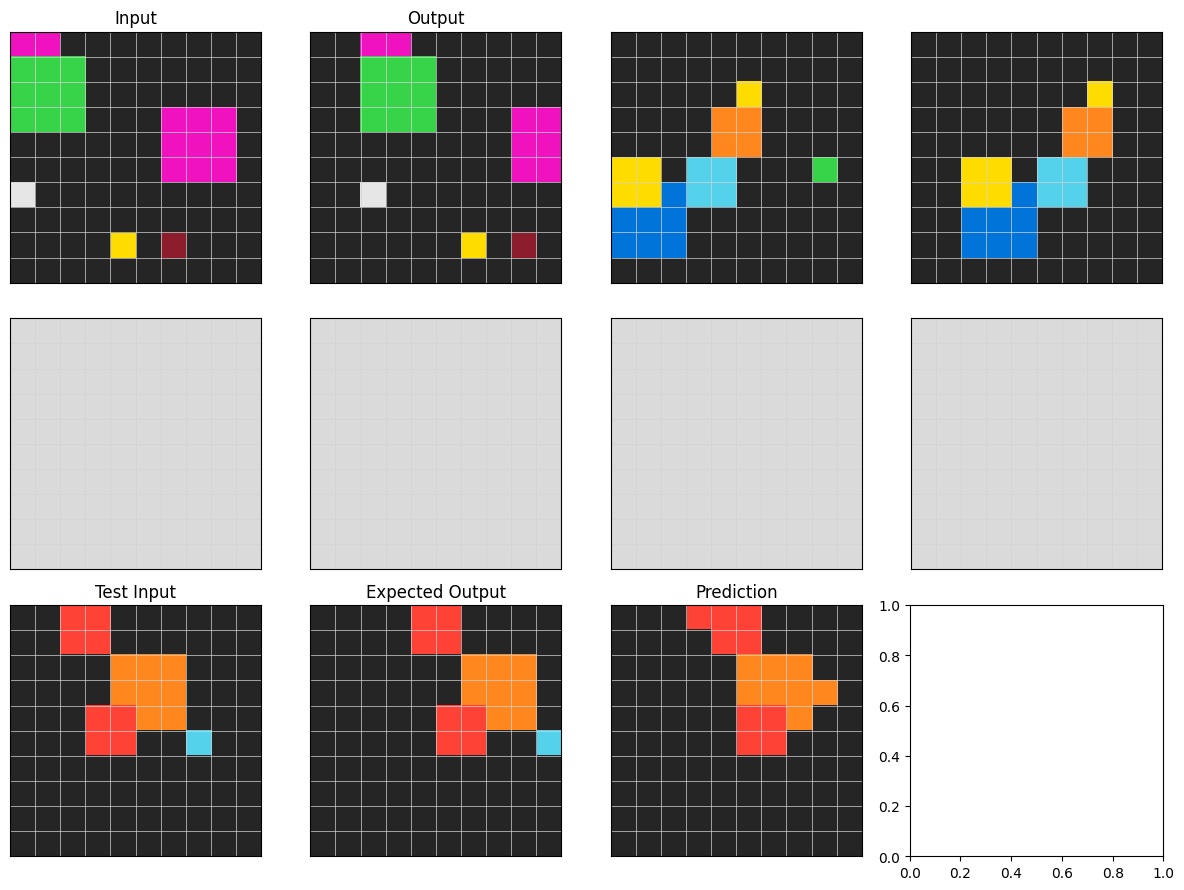

torch.Size([1, 10, 10])


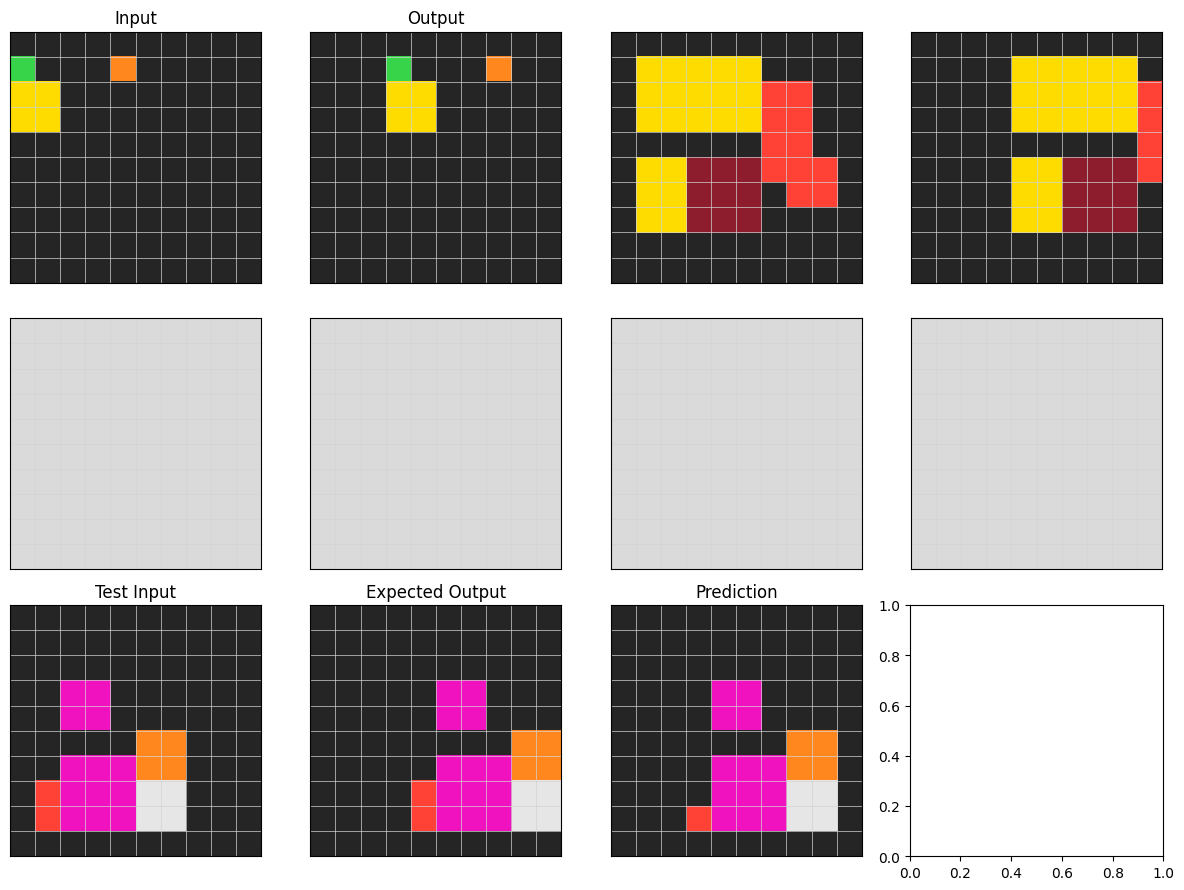

torch.Size([1, 10, 10])


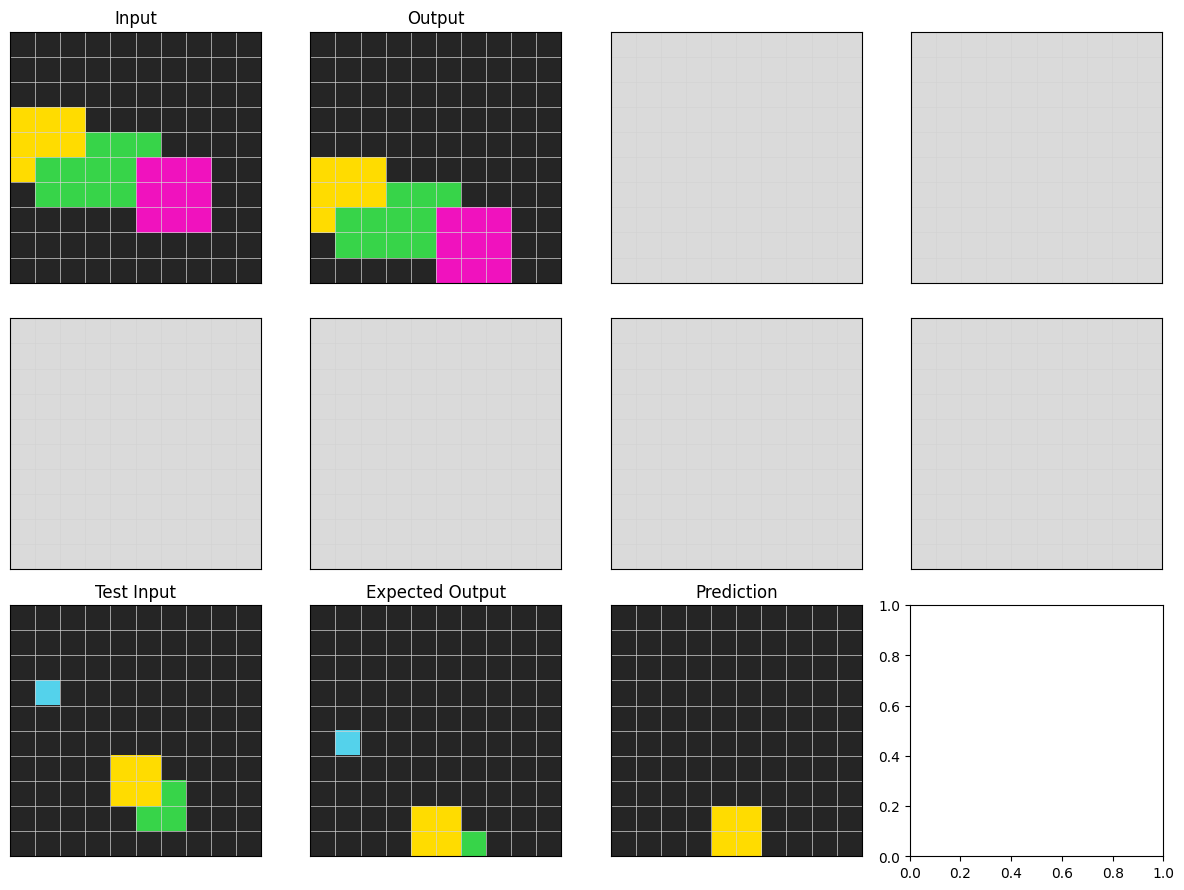

torch.Size([1, 10, 10])


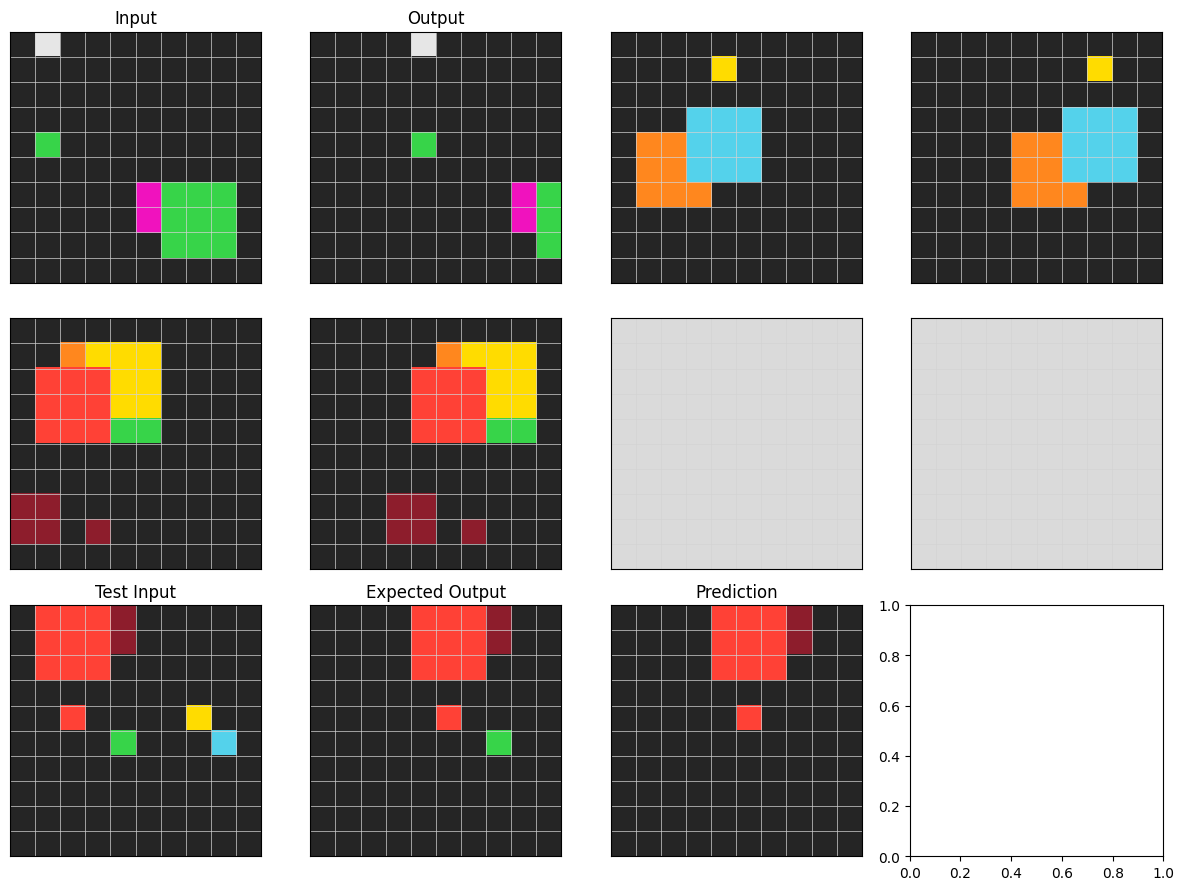

torch.Size([1, 10, 10])


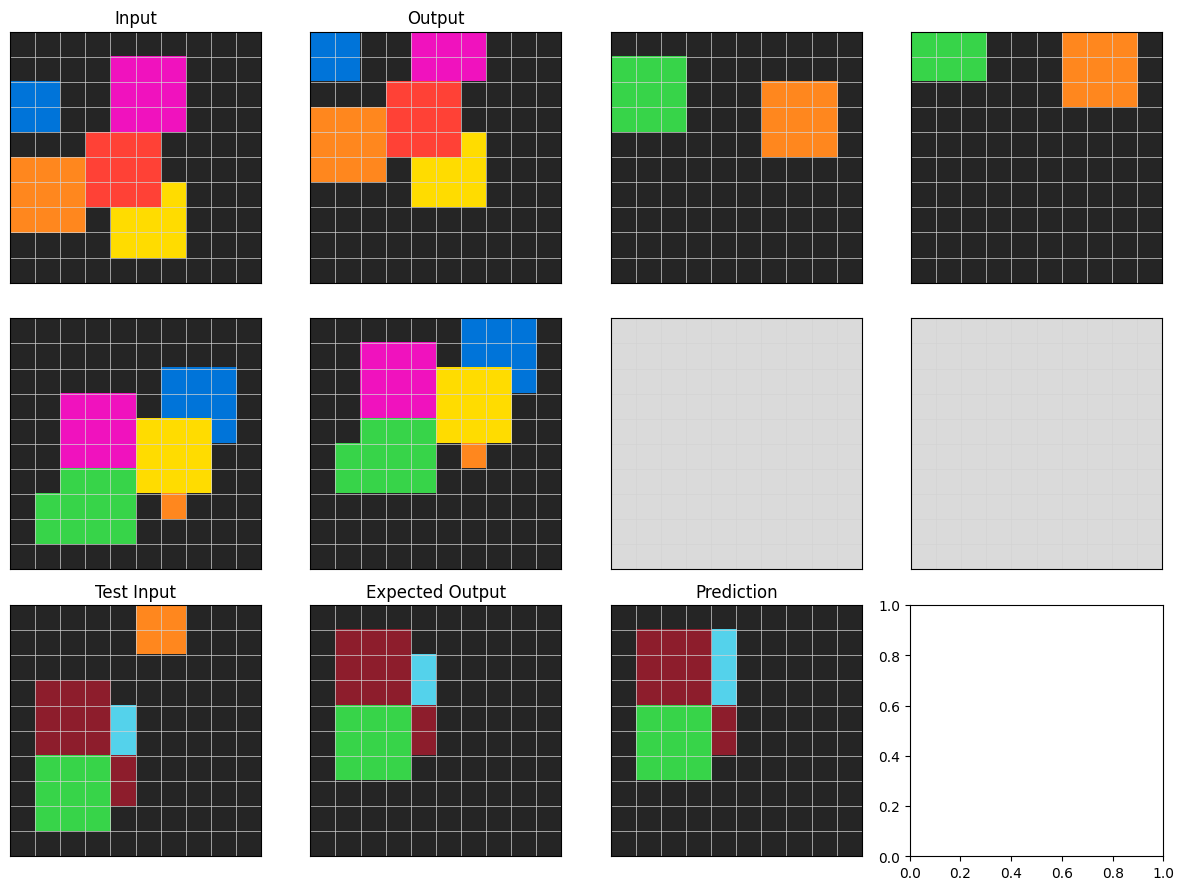

torch.Size([1, 10, 10])


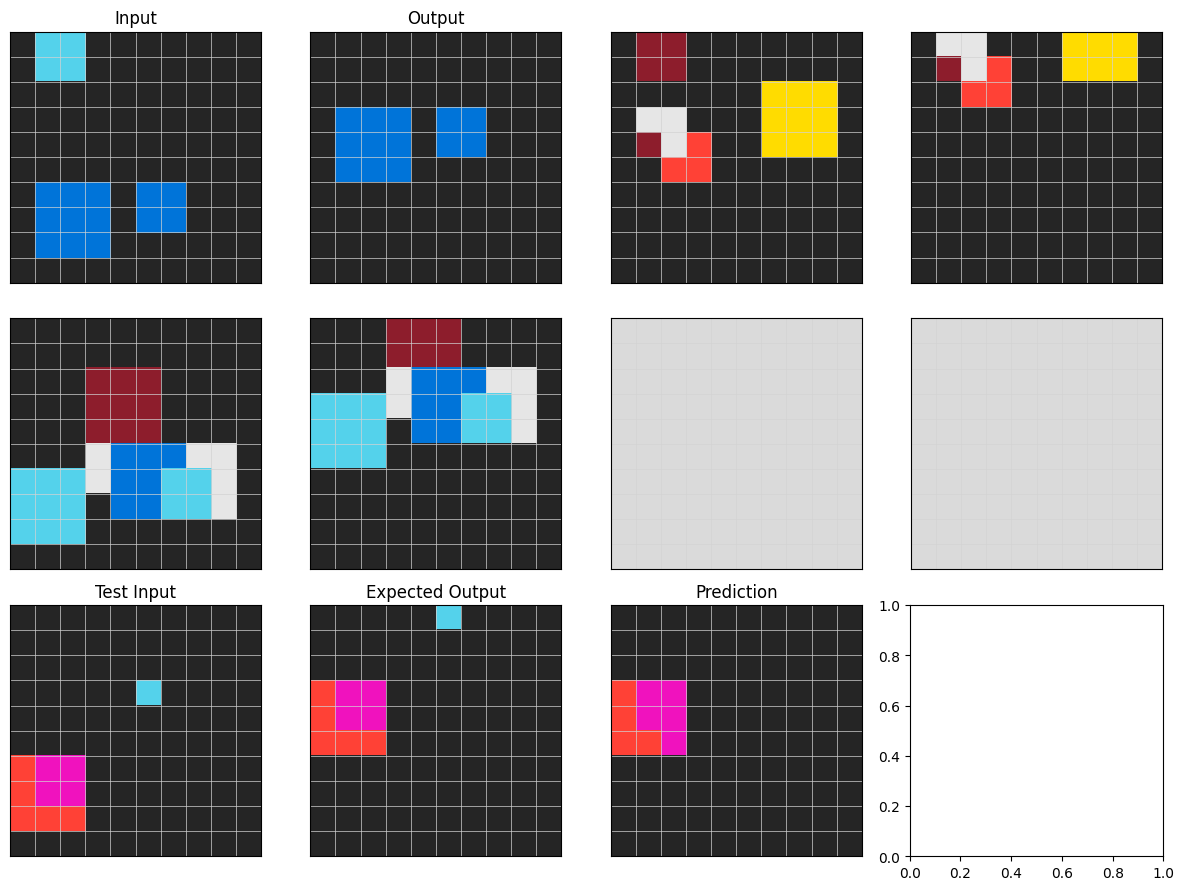

torch.Size([1, 10, 10])


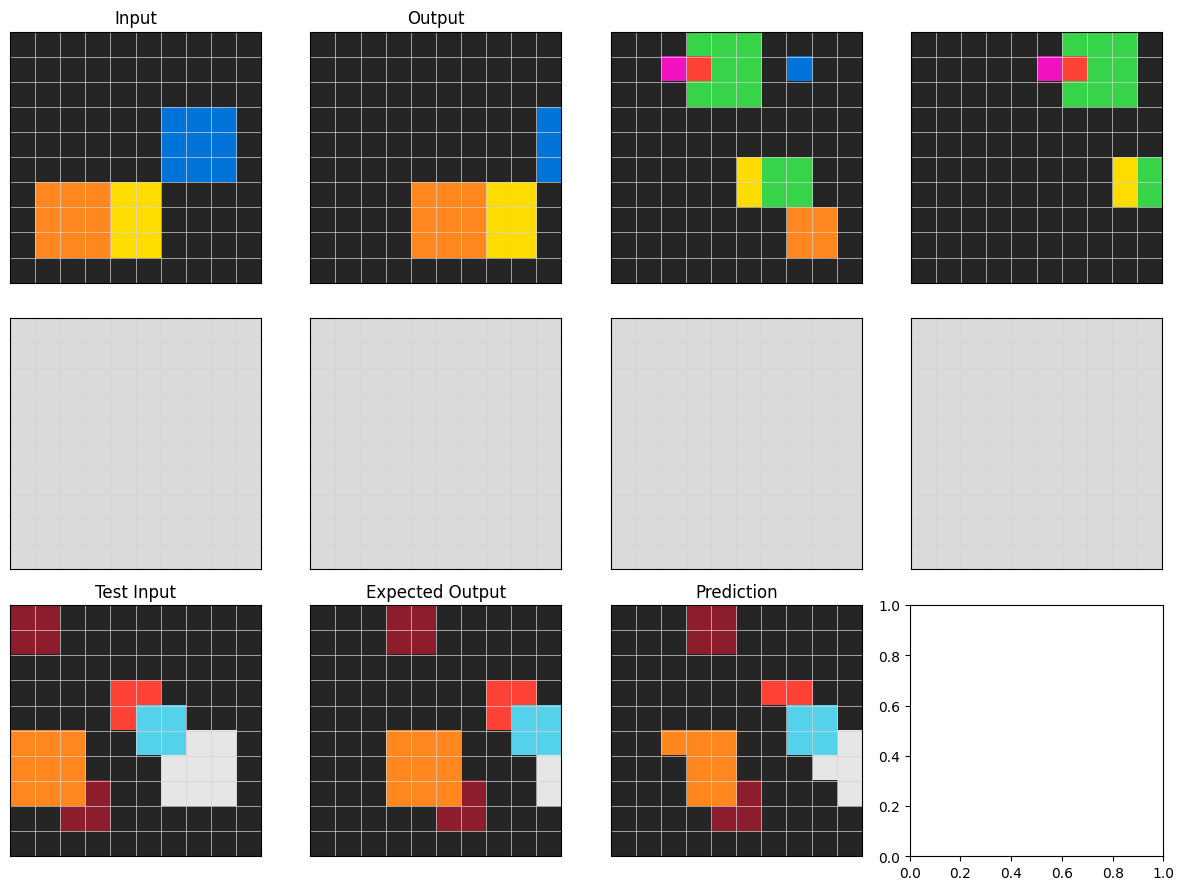

torch.Size([1, 10, 10])


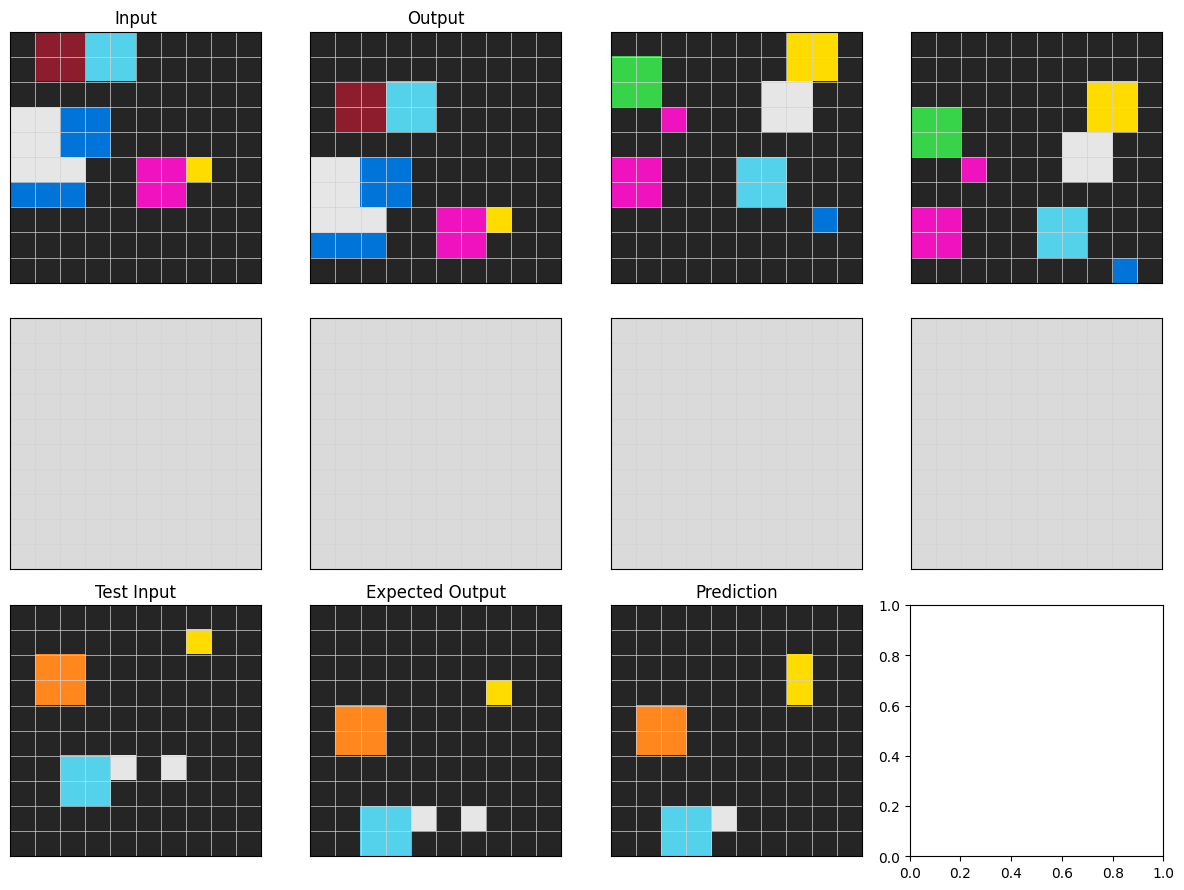

torch.Size([1, 10, 10])


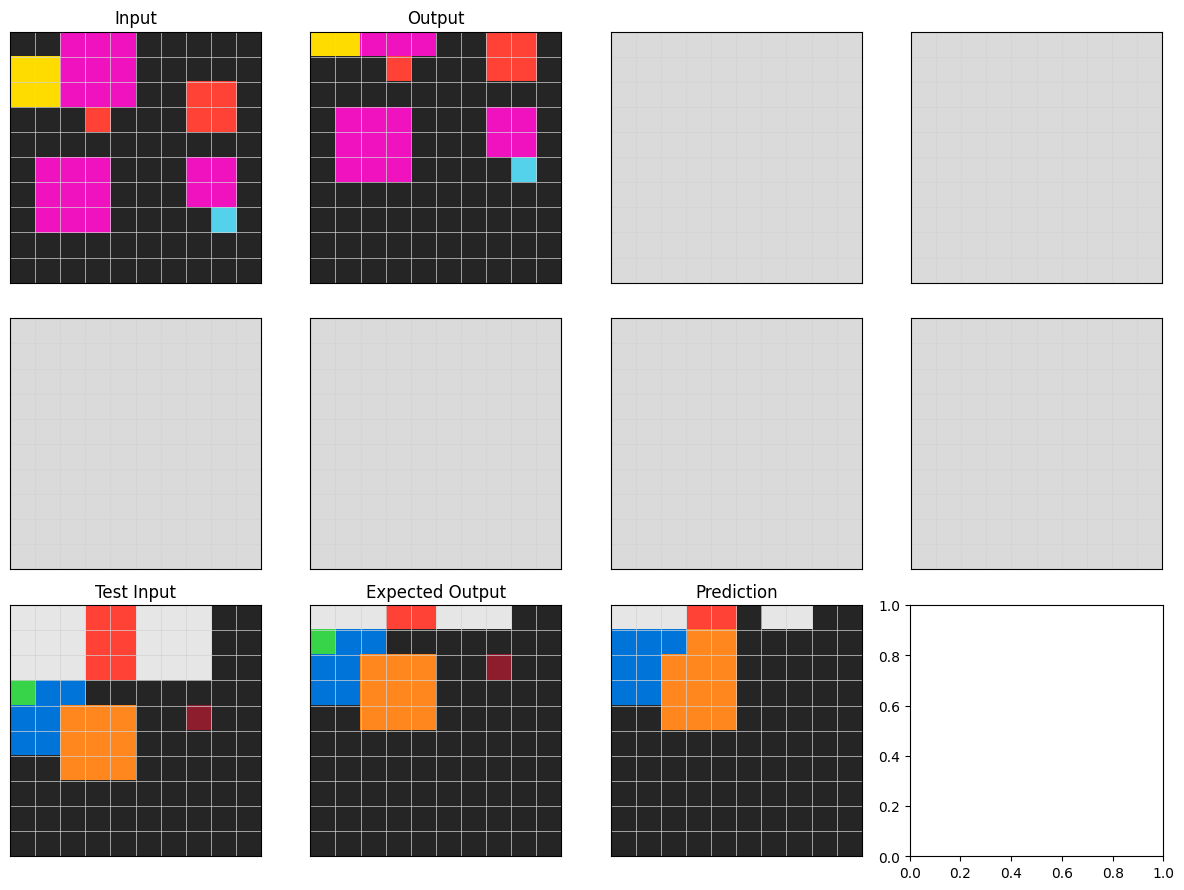

torch.Size([1, 10, 10])


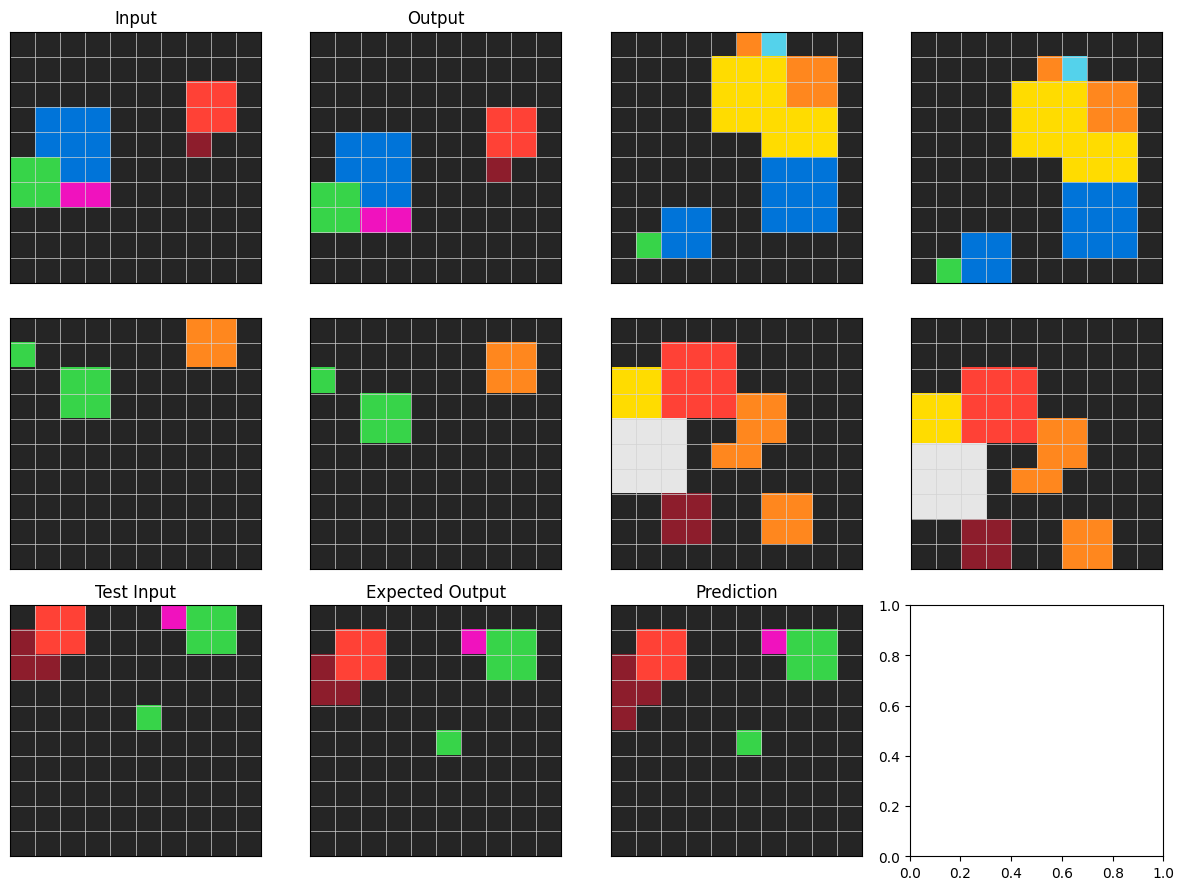

torch.Size([1, 10, 10])


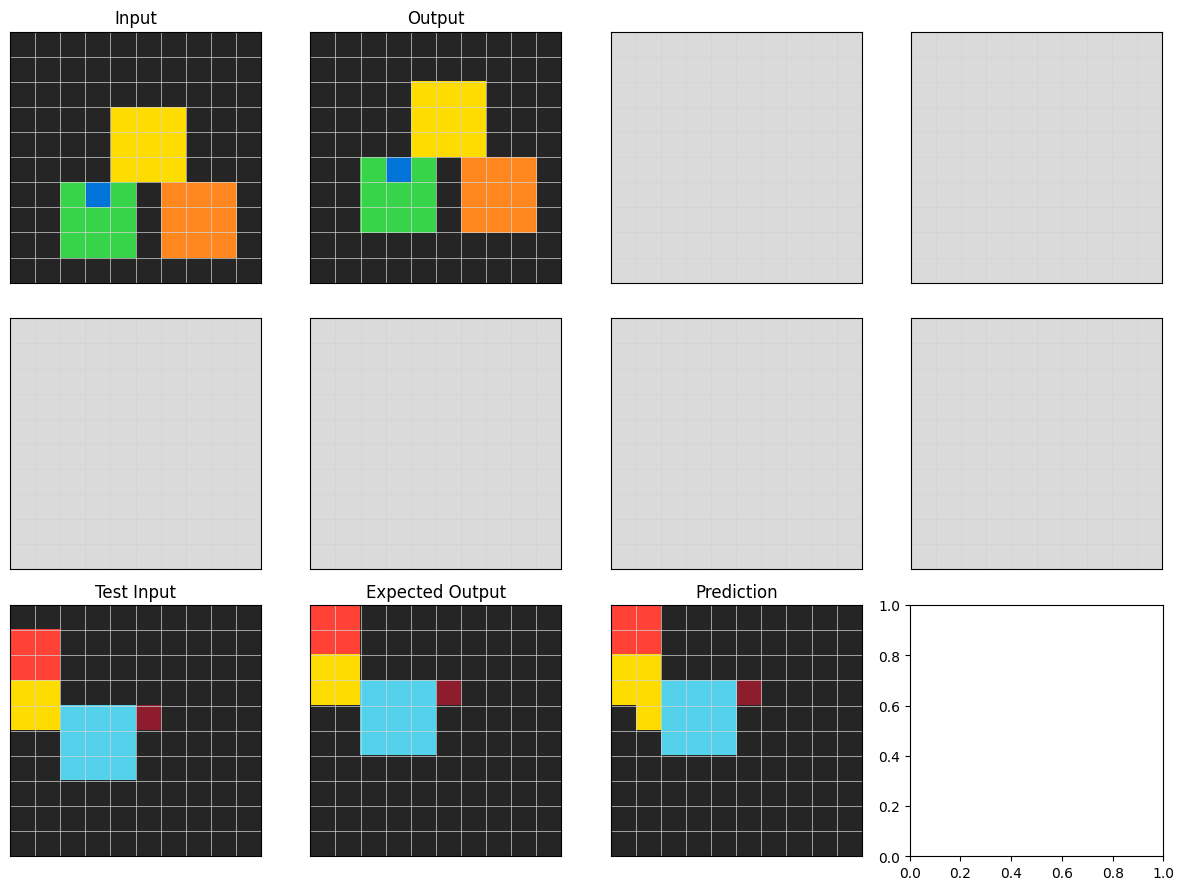

torch.Size([1, 10, 10])


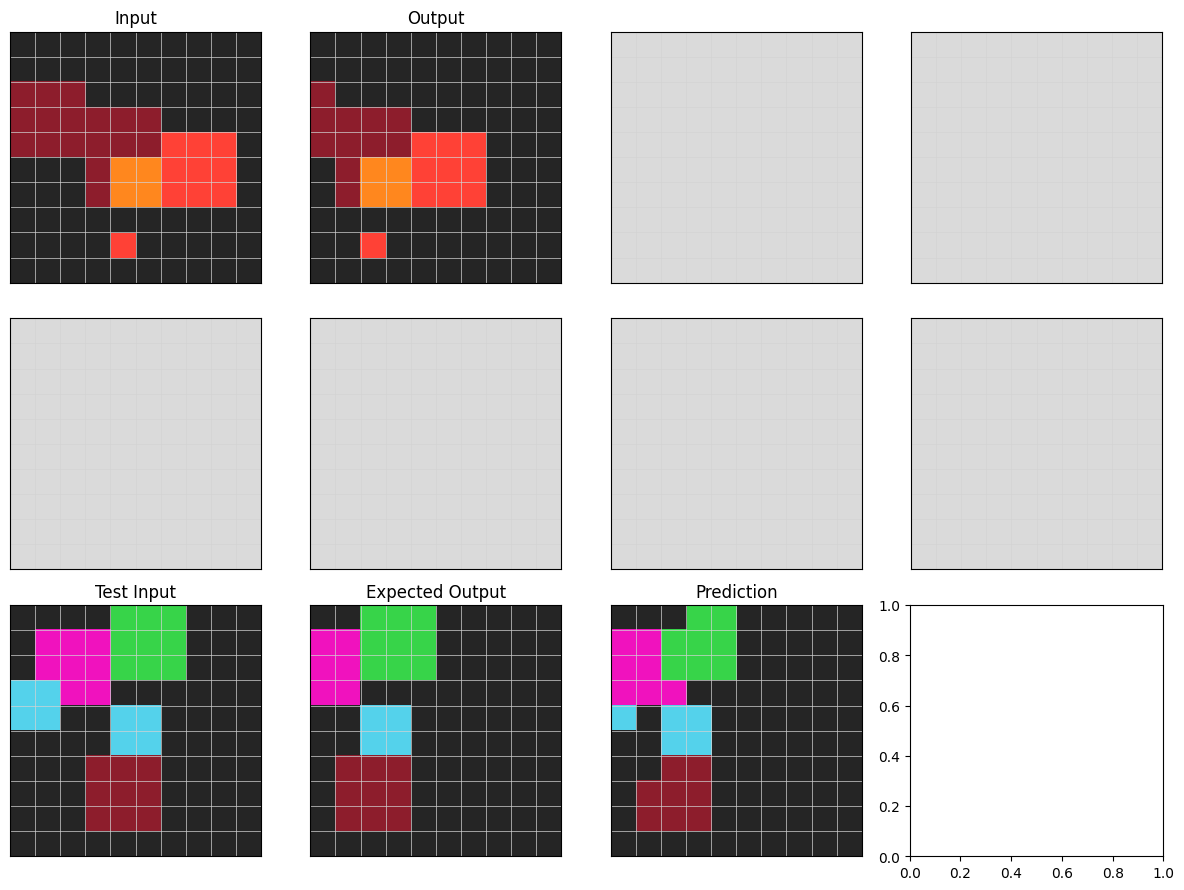

torch.Size([1, 10, 10])


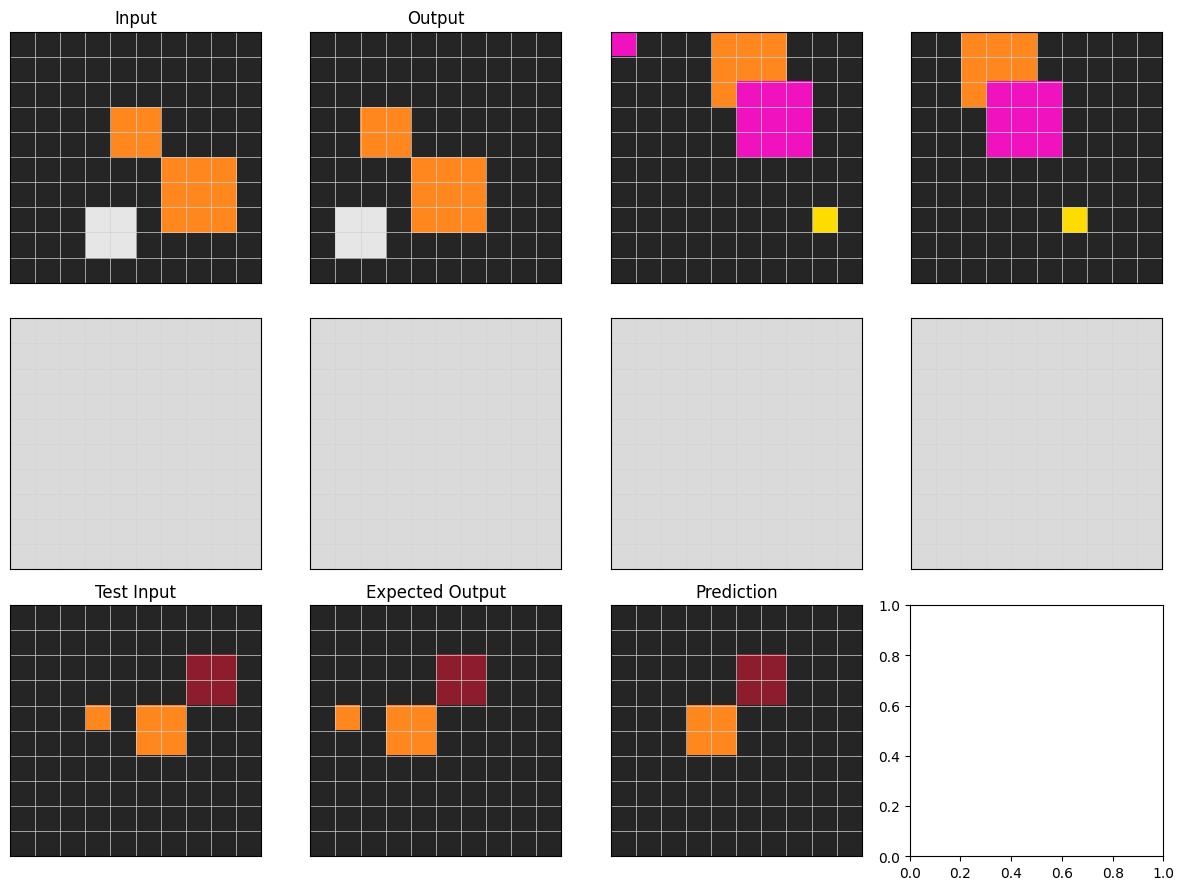

torch.Size([1, 10, 10])


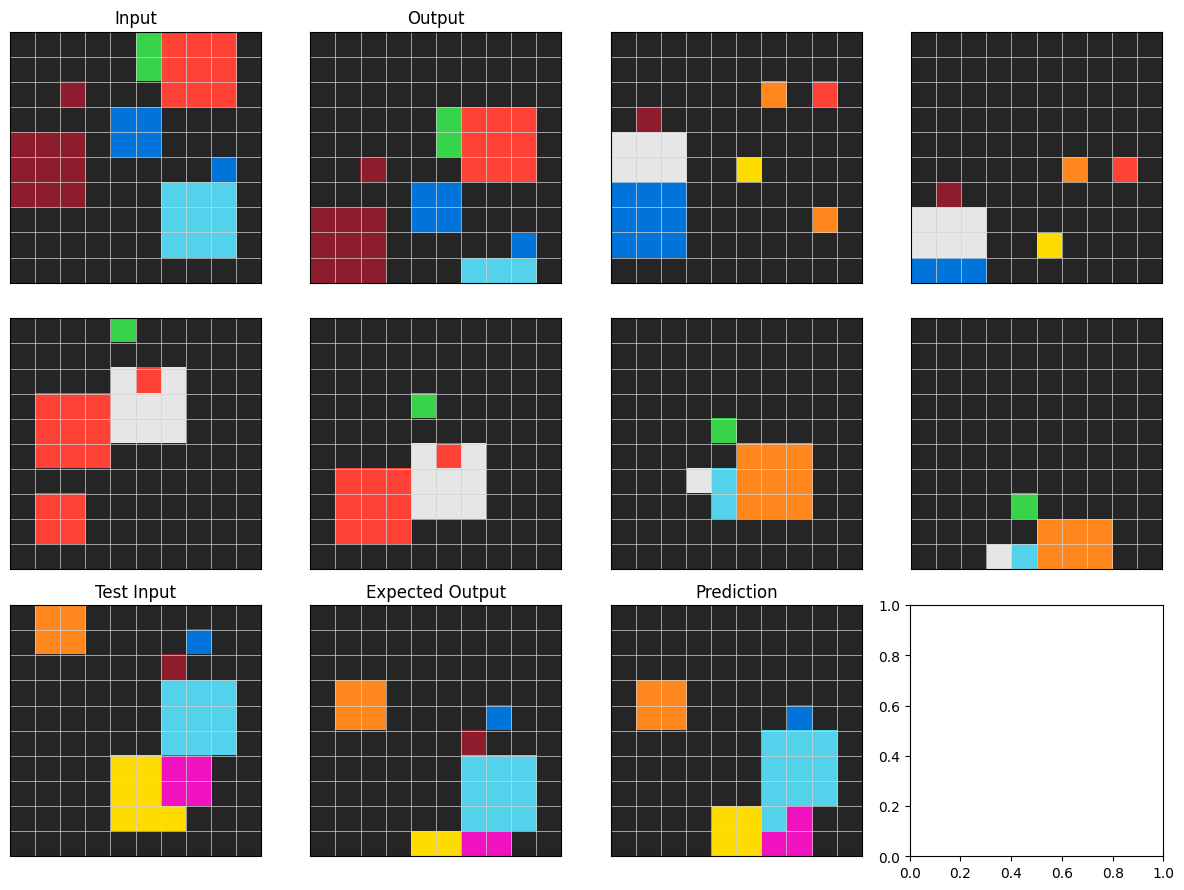

torch.Size([1, 10, 10])


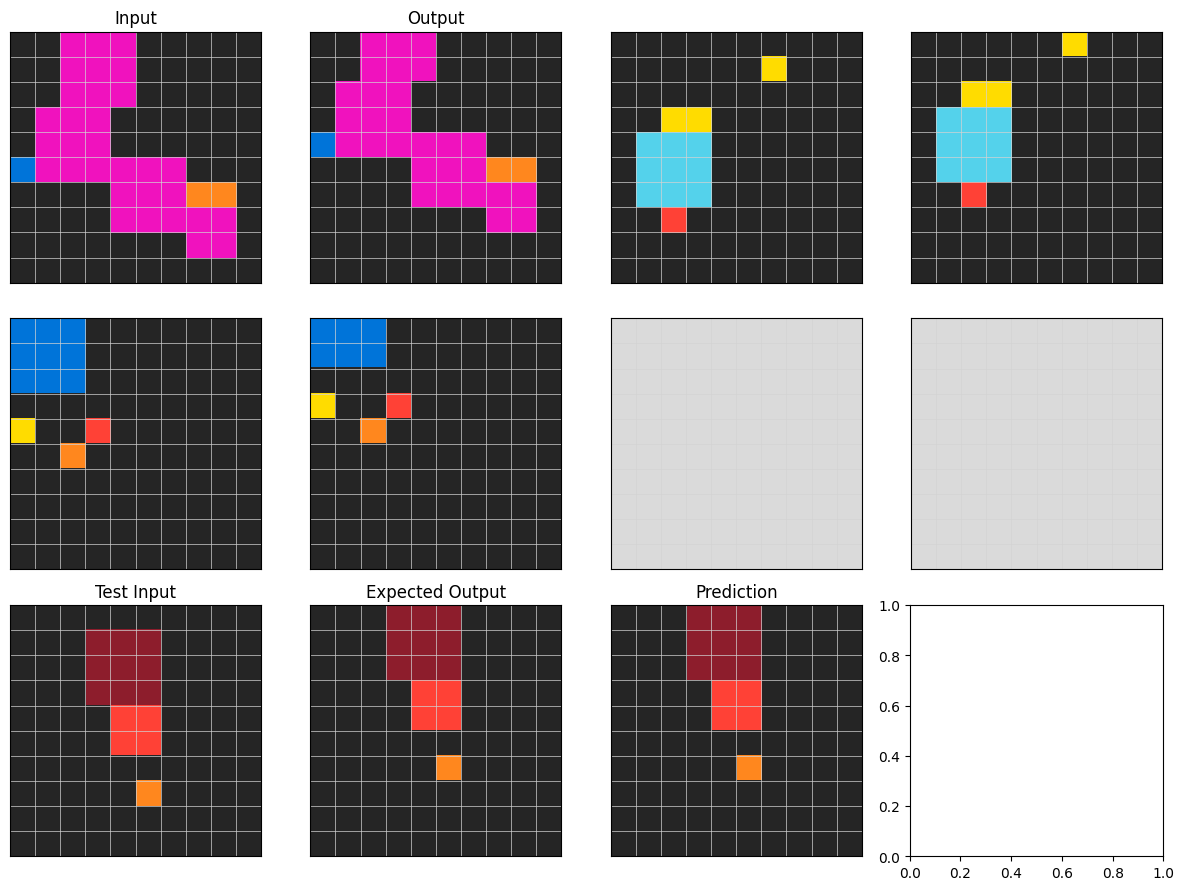

torch.Size([1, 10, 10])


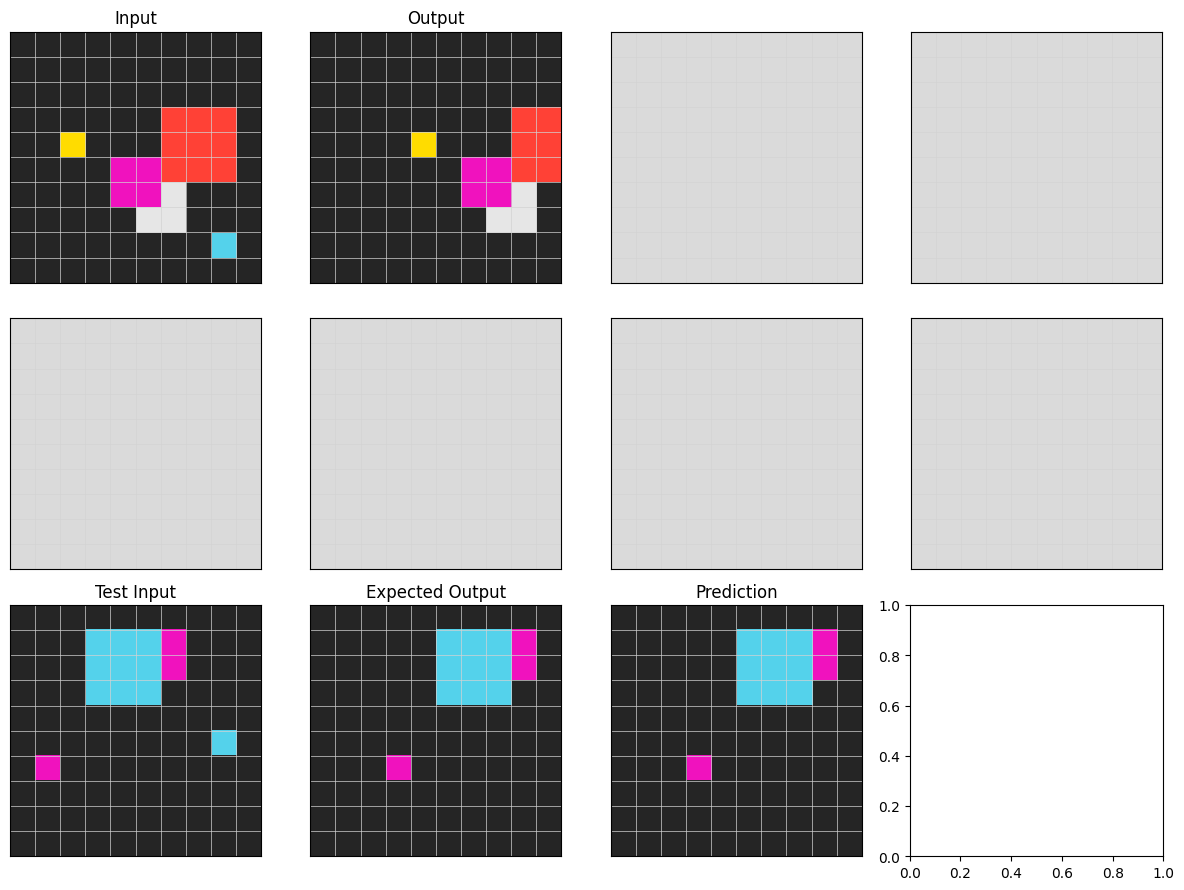

torch.Size([1, 10, 10])


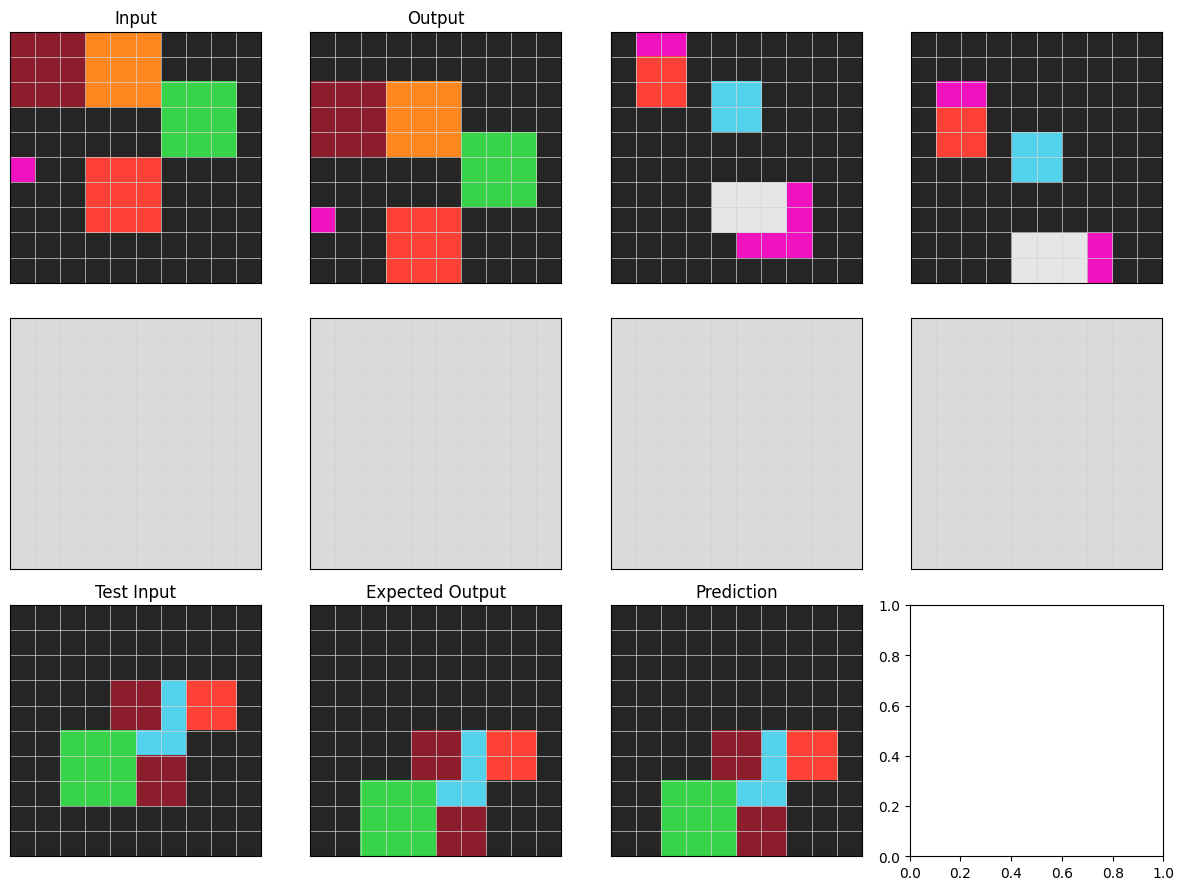

torch.Size([1, 10, 10])


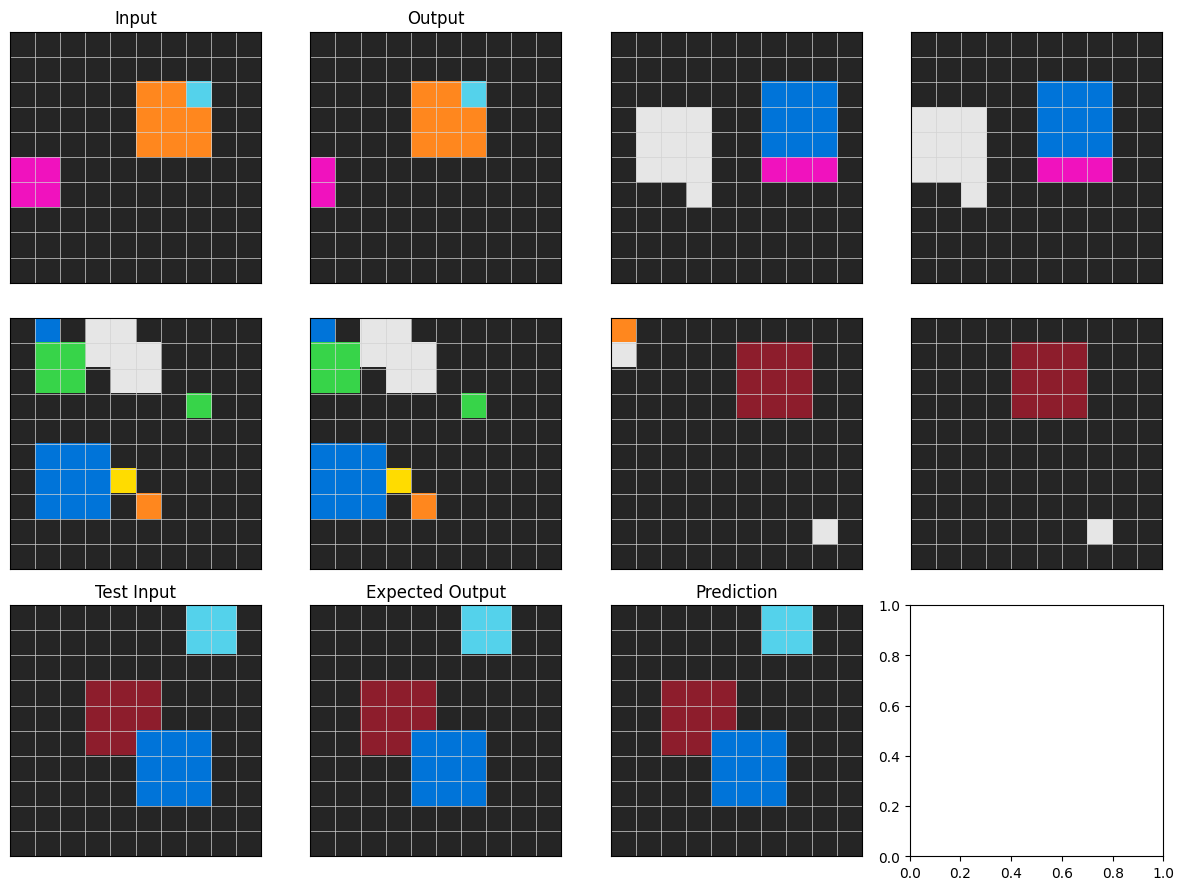

torch.Size([1, 10, 10])


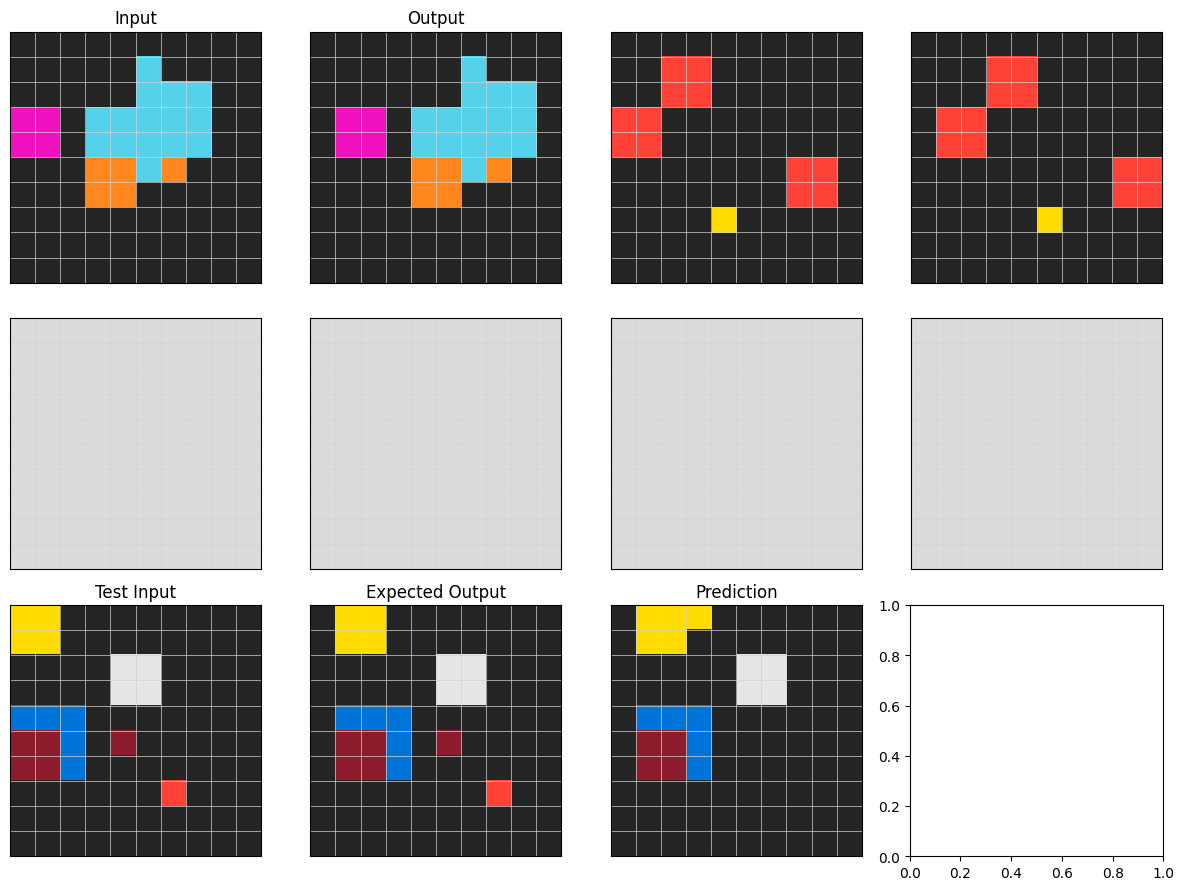

torch.Size([1, 10, 10])


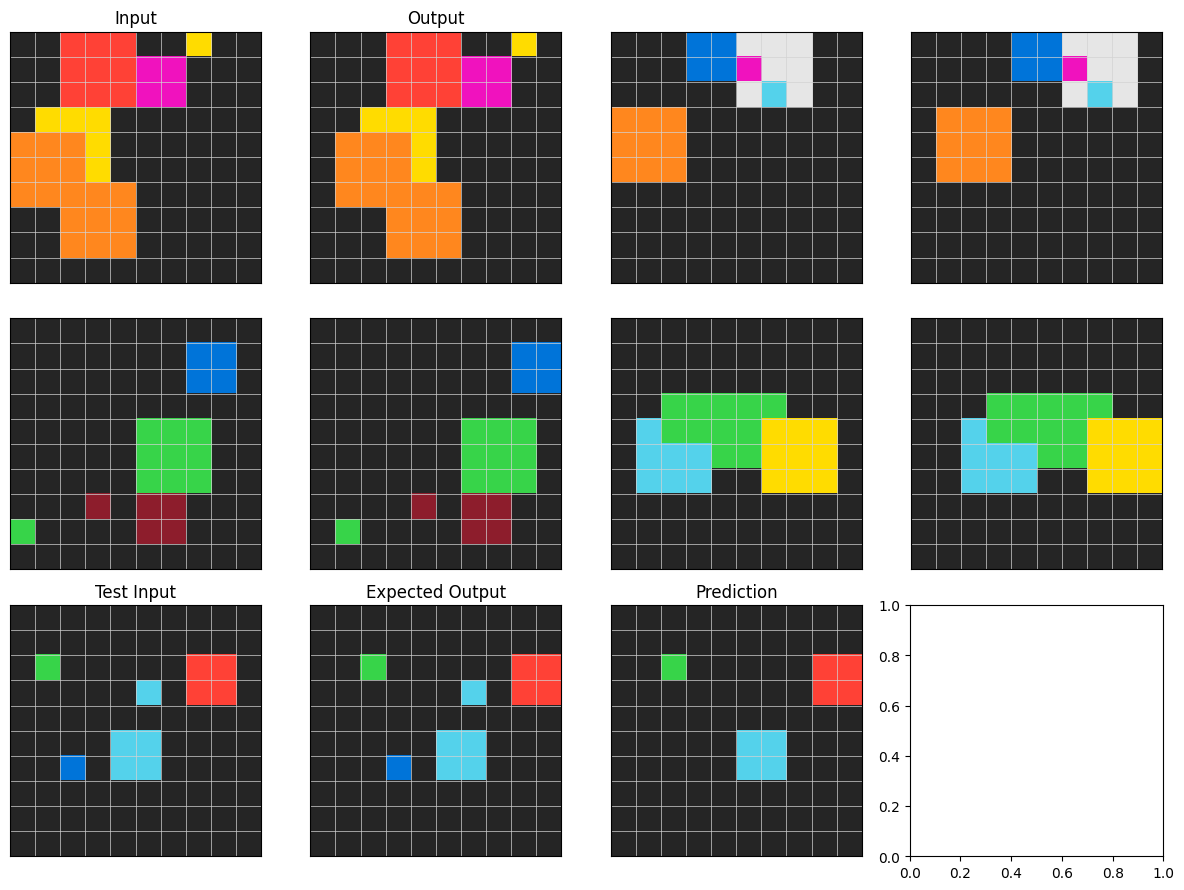

torch.Size([1, 10, 10])


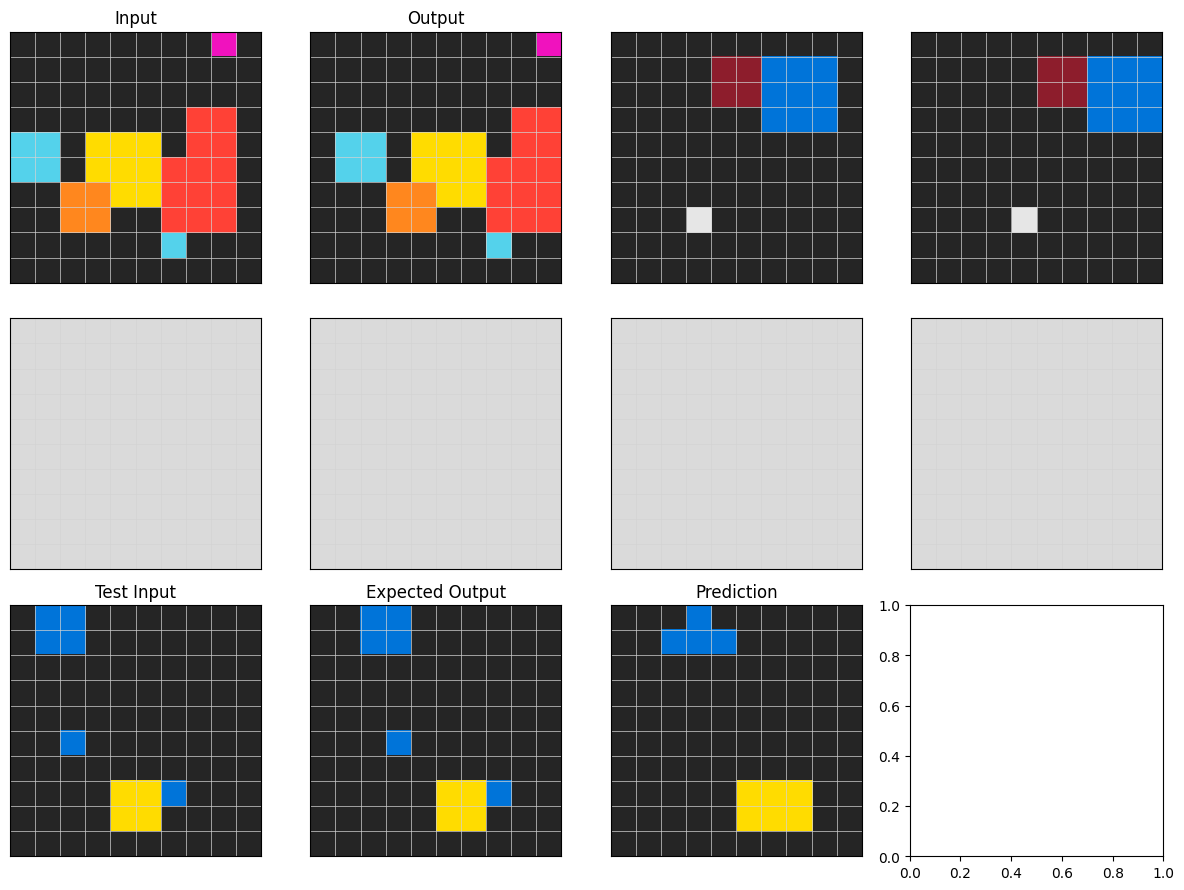

torch.Size([1, 10, 10])


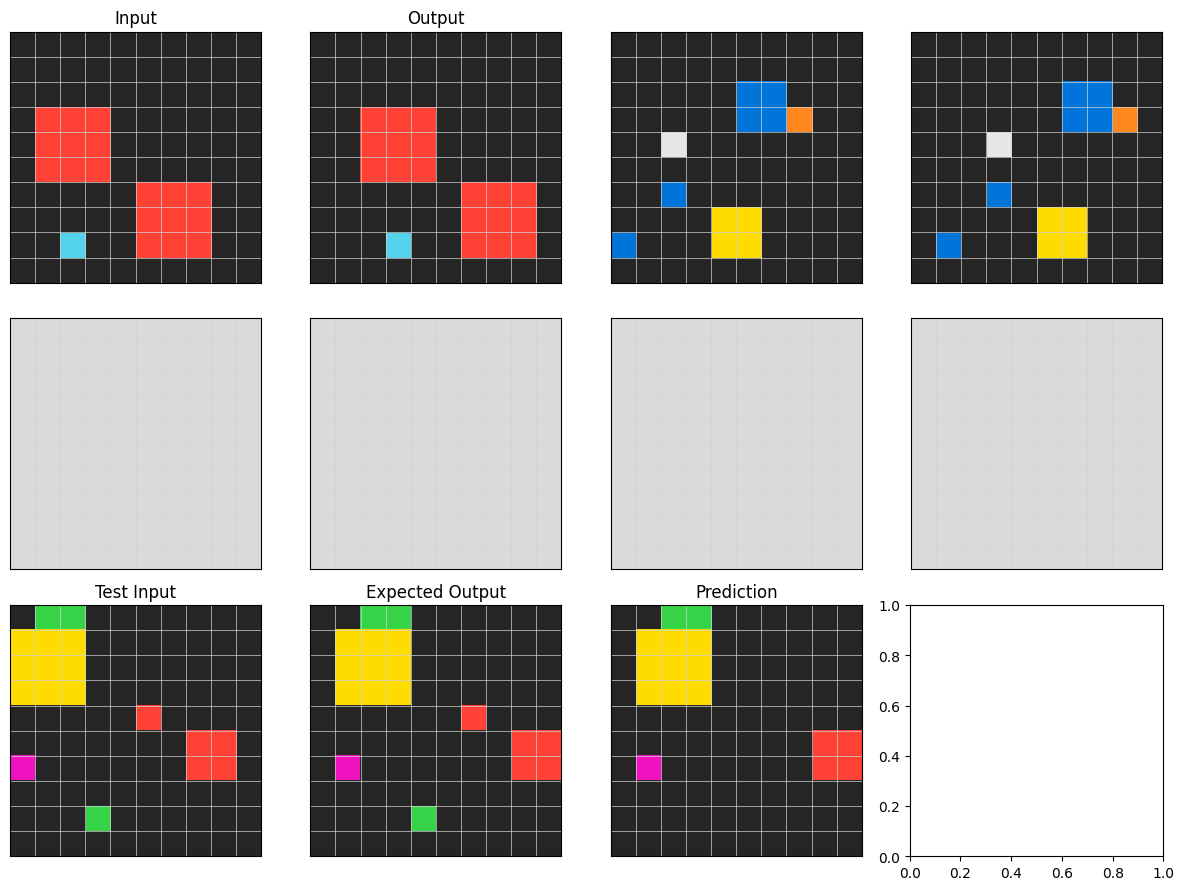

torch.Size([1, 10, 10])


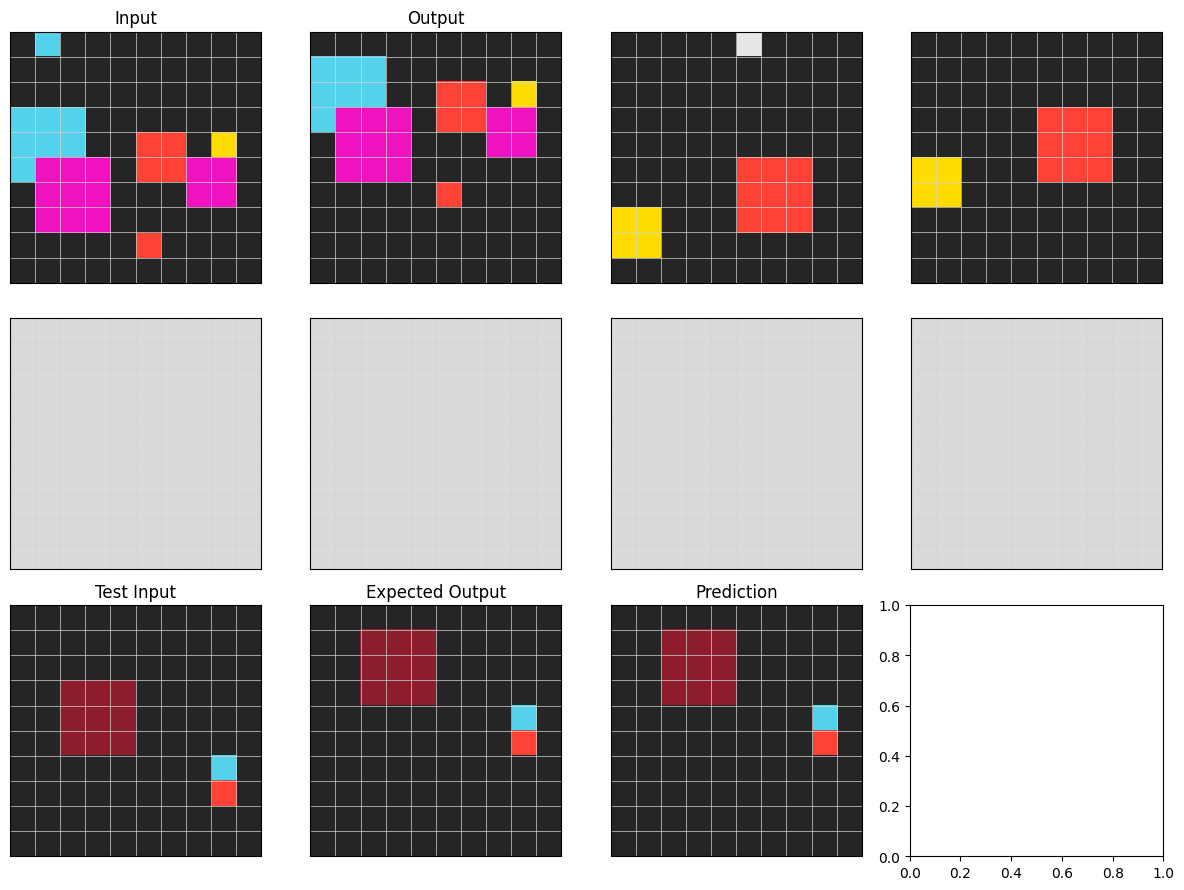

torch.Size([1, 10, 10])


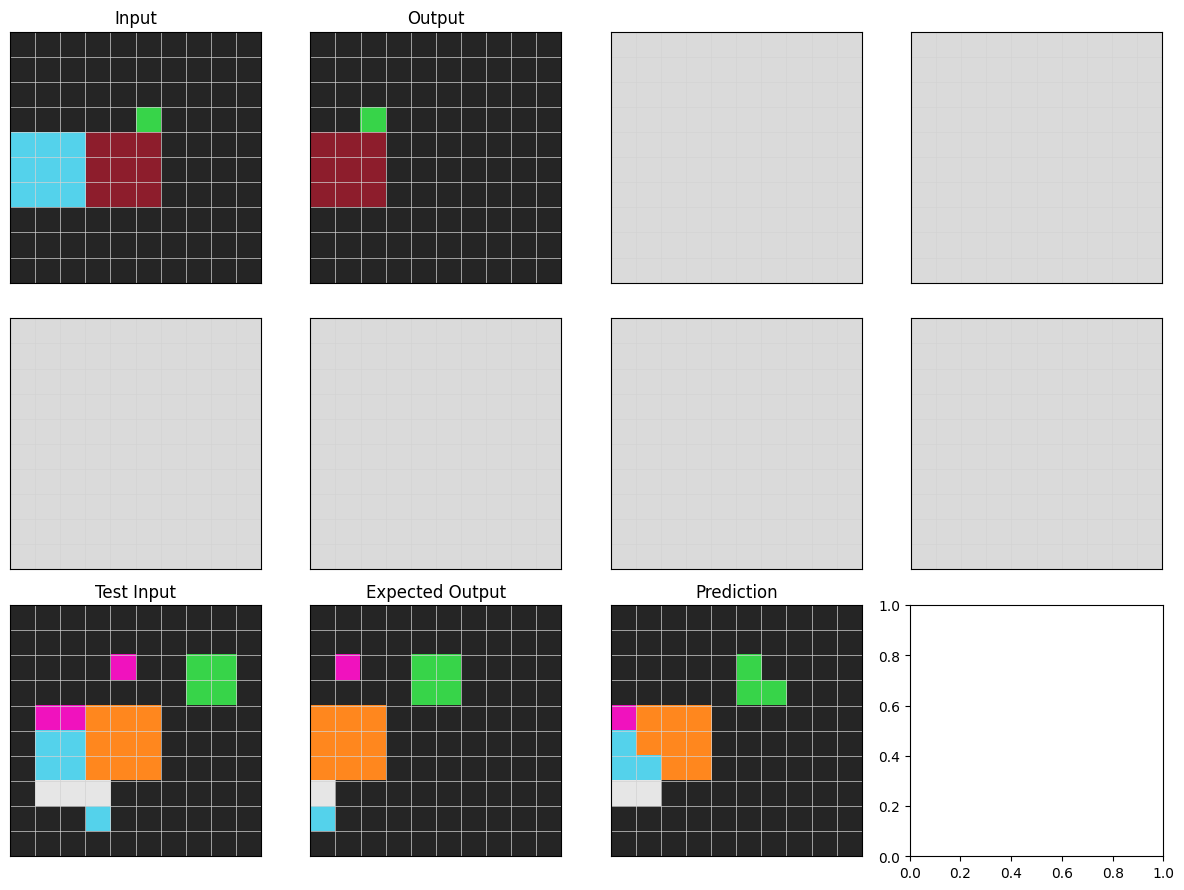

torch.Size([1, 10, 10])


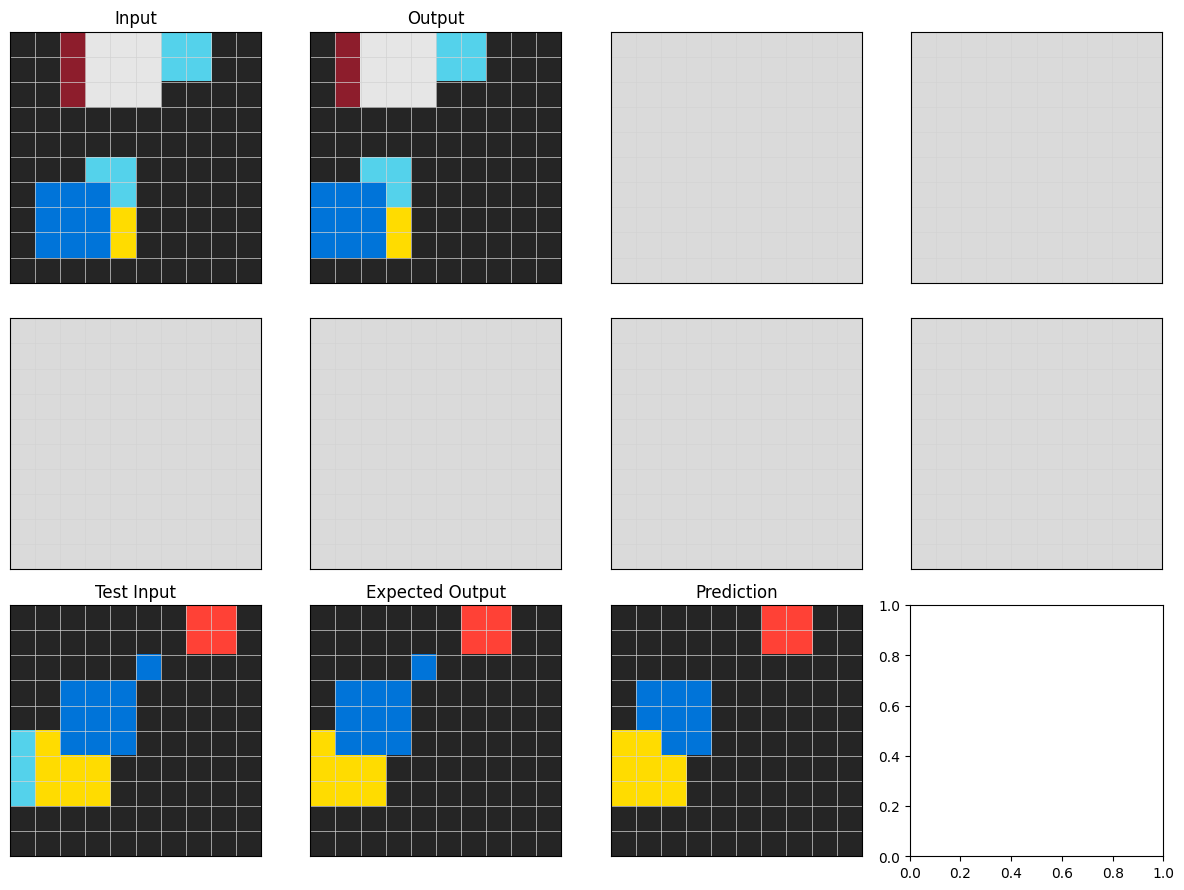

torch.Size([1, 10, 10])


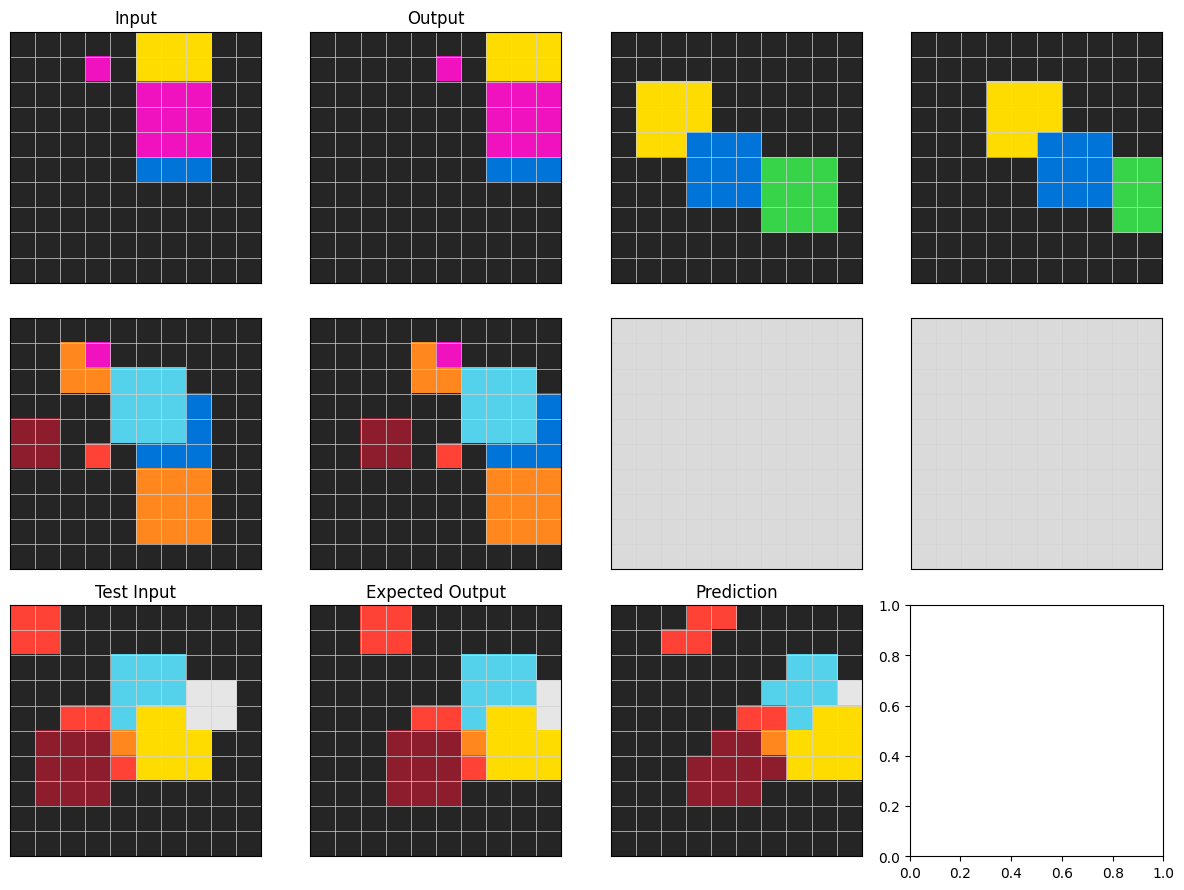

torch.Size([1, 10, 10])


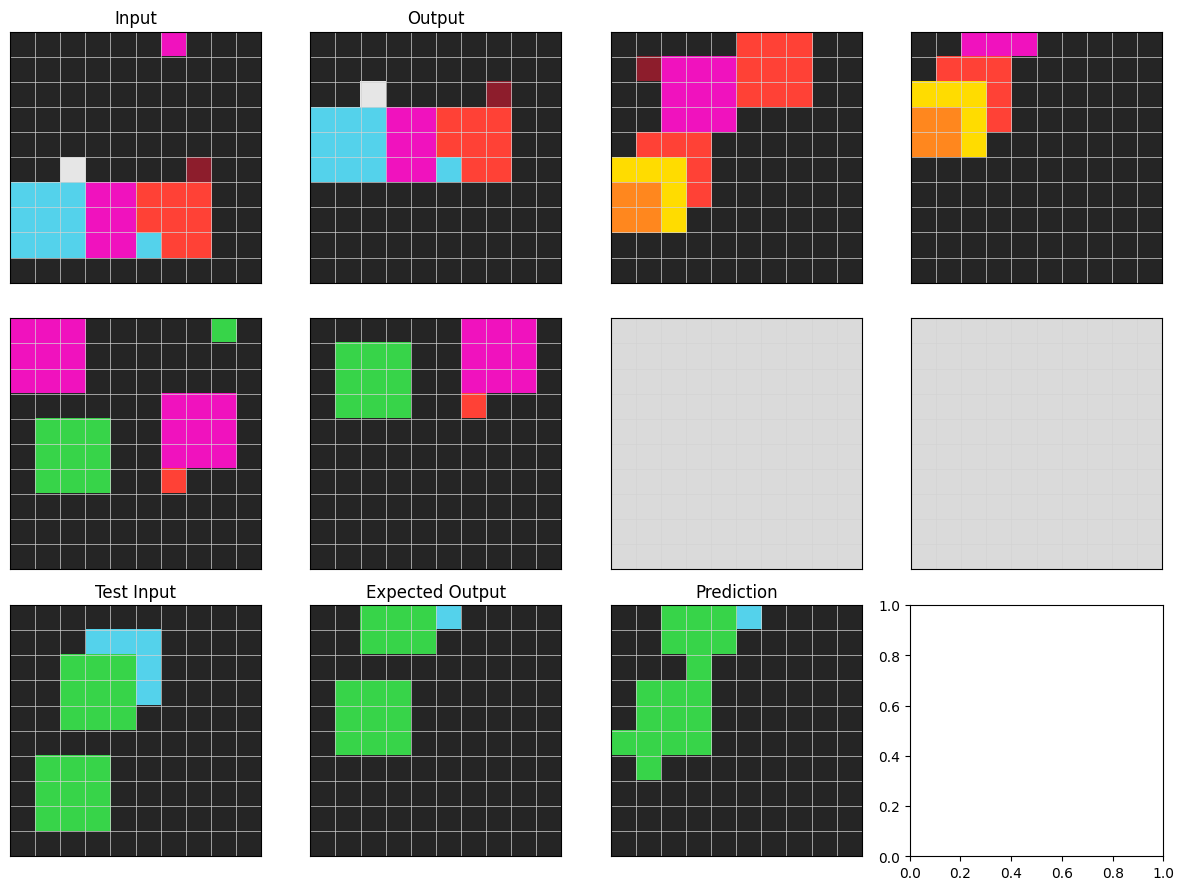

torch.Size([1, 10, 10])


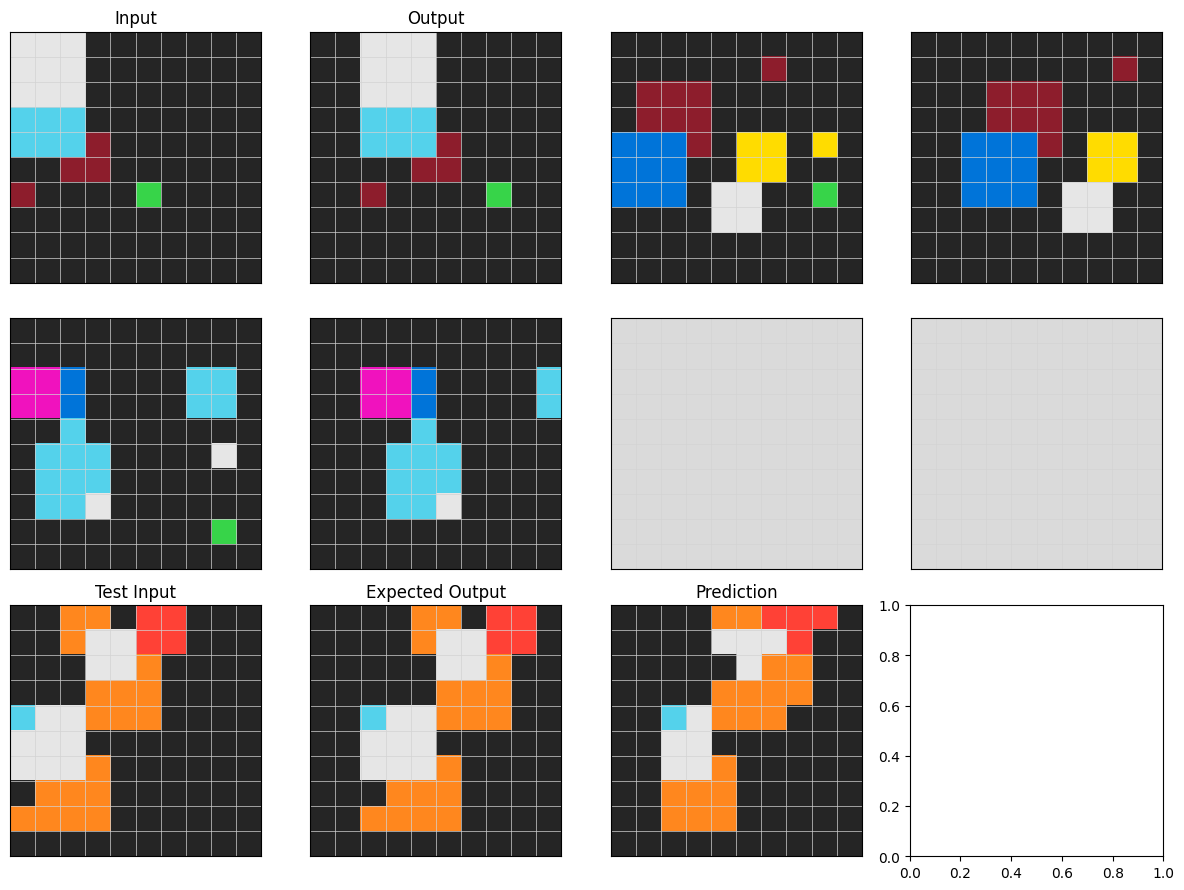

torch.Size([1, 10, 10])


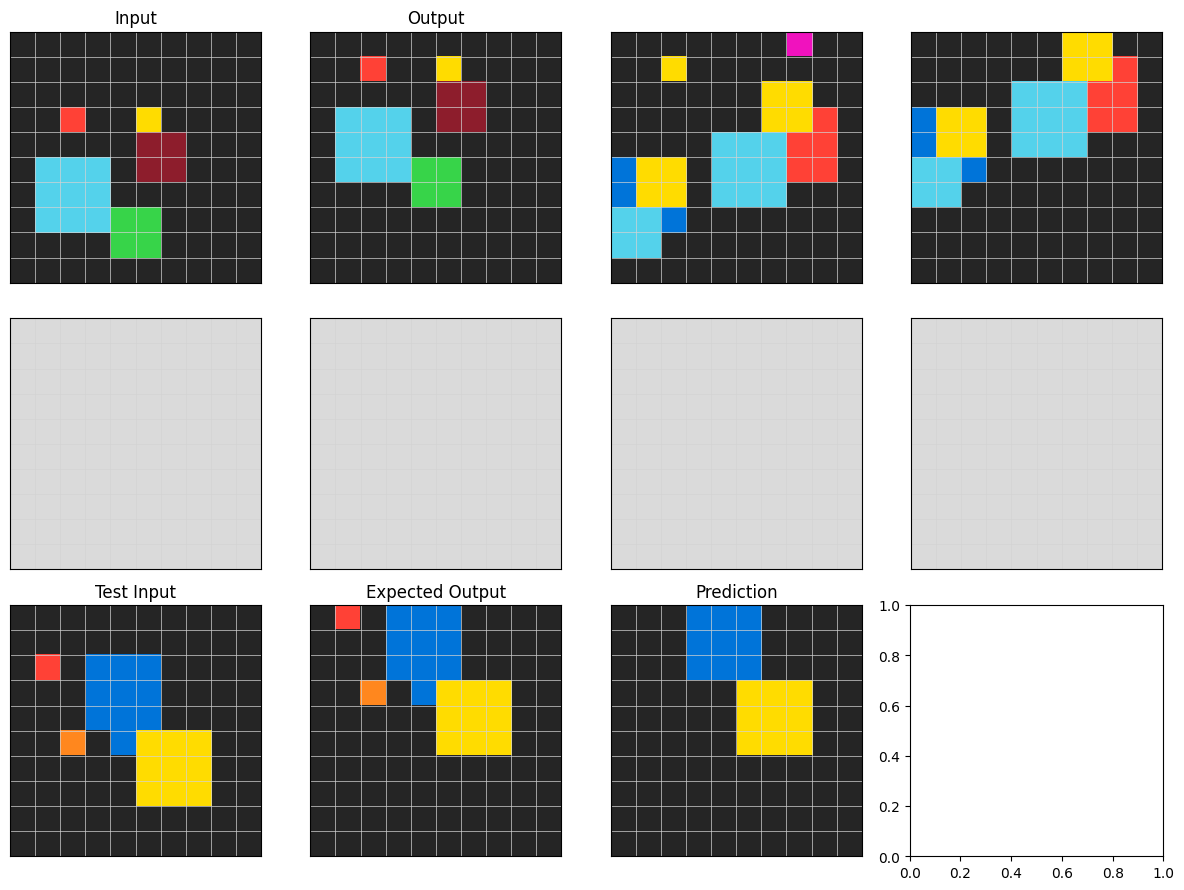

torch.Size([1, 10, 10])


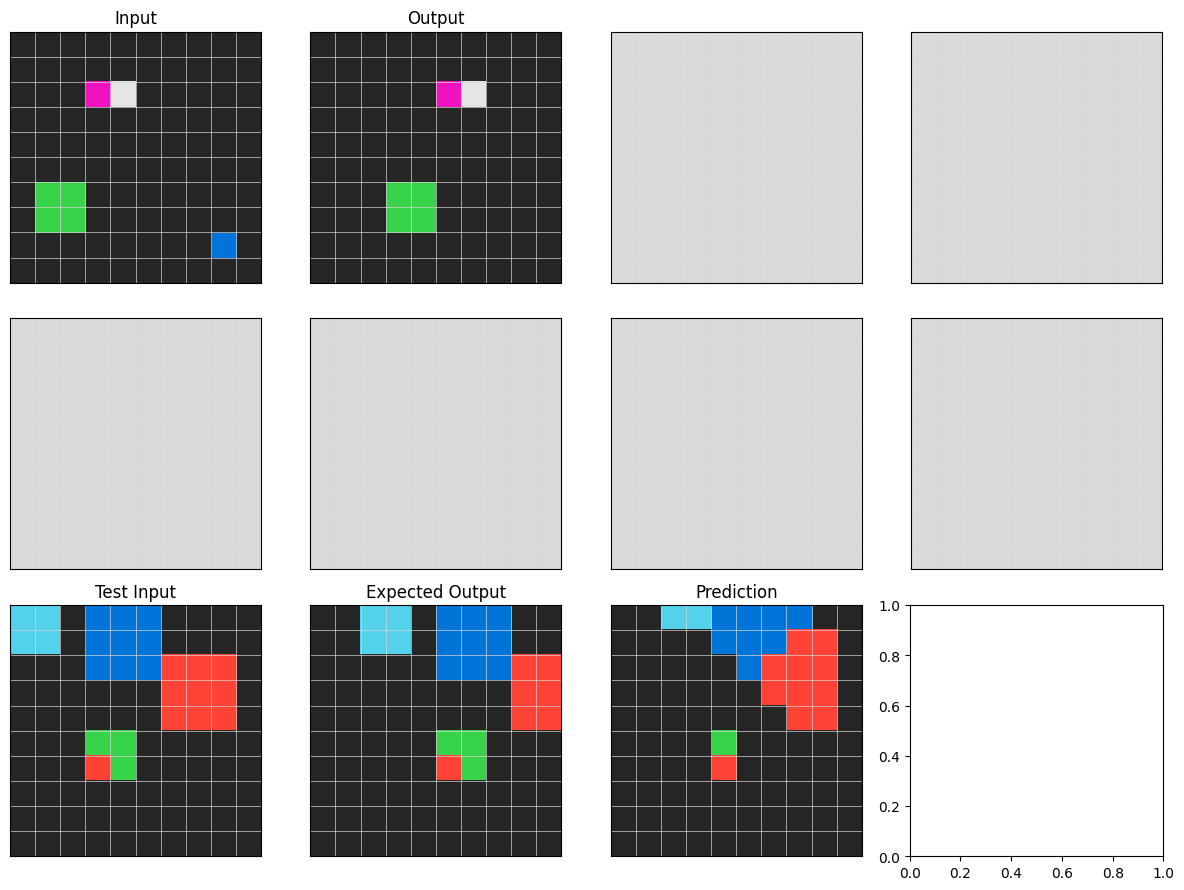

torch.Size([1, 10, 10])


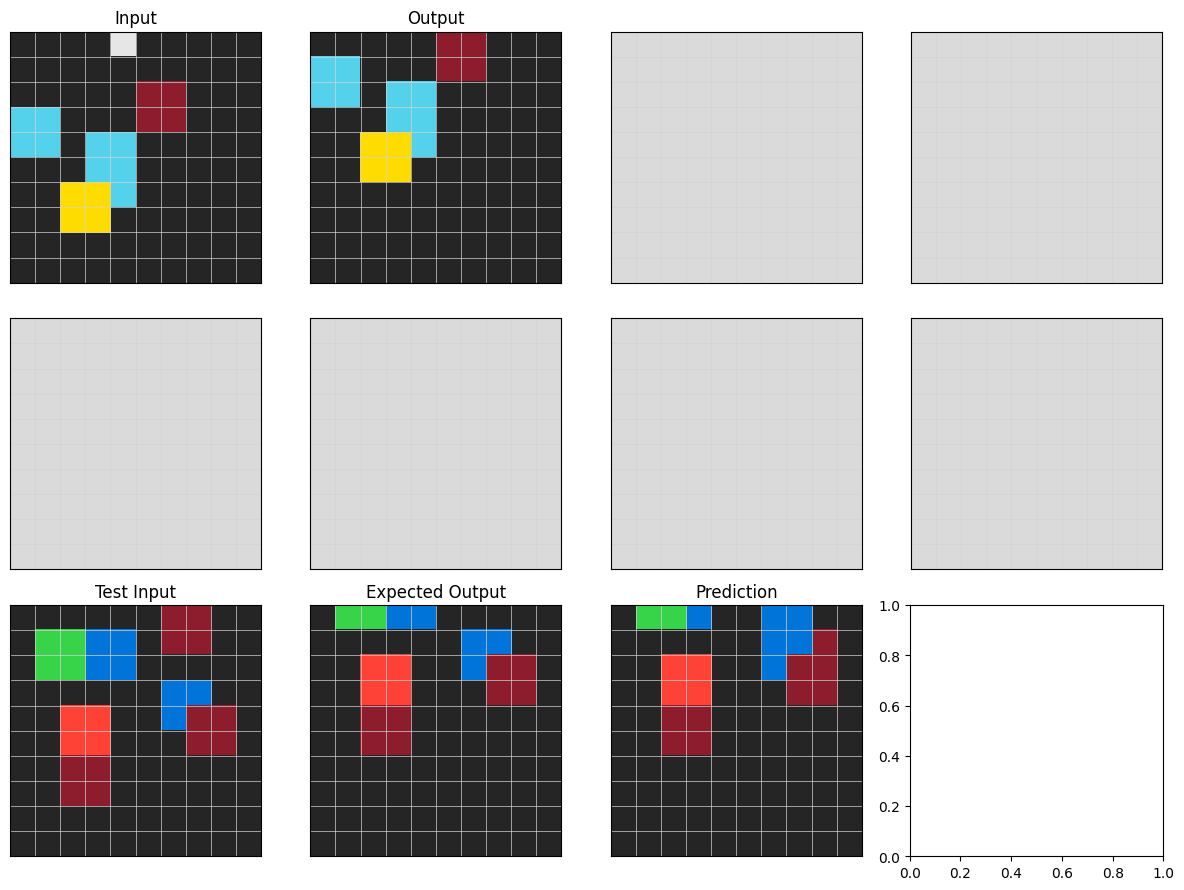

torch.Size([1, 10, 10])


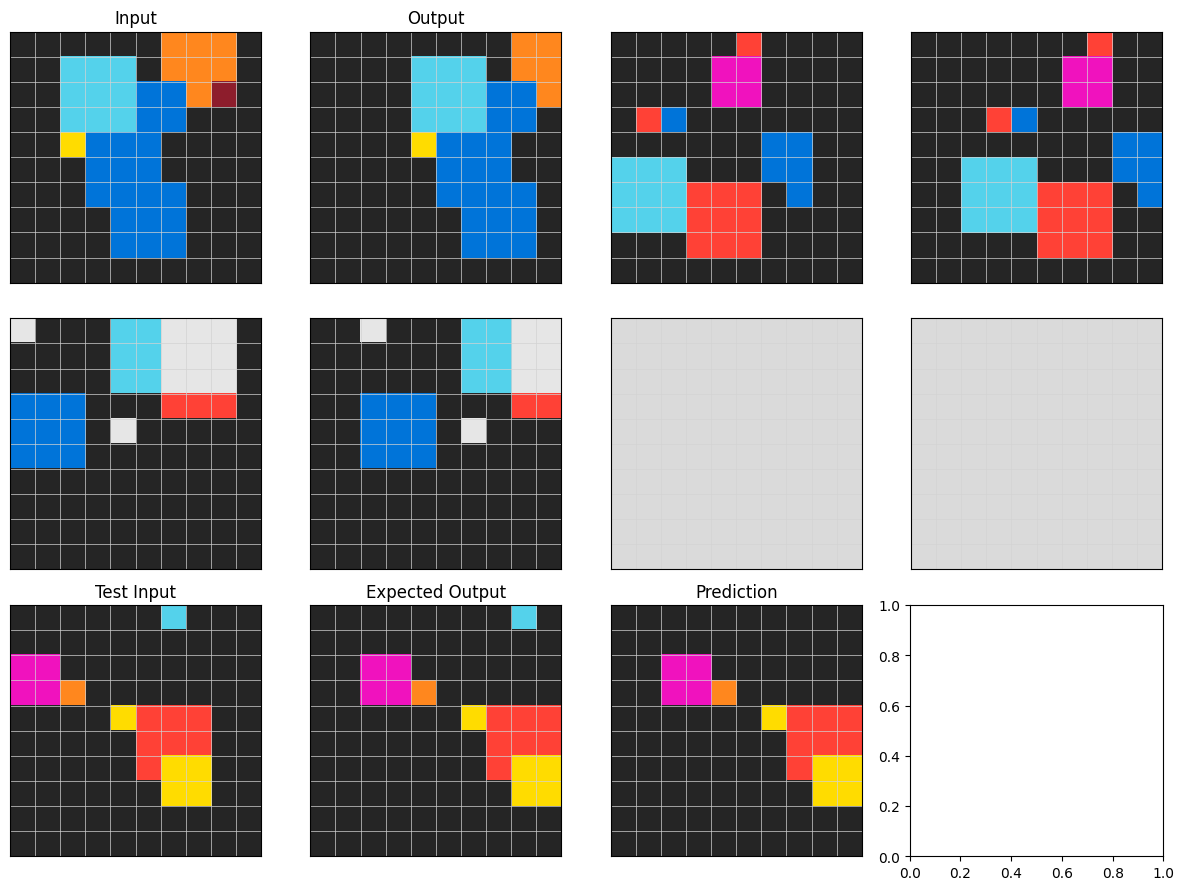

torch.Size([1, 10, 10])


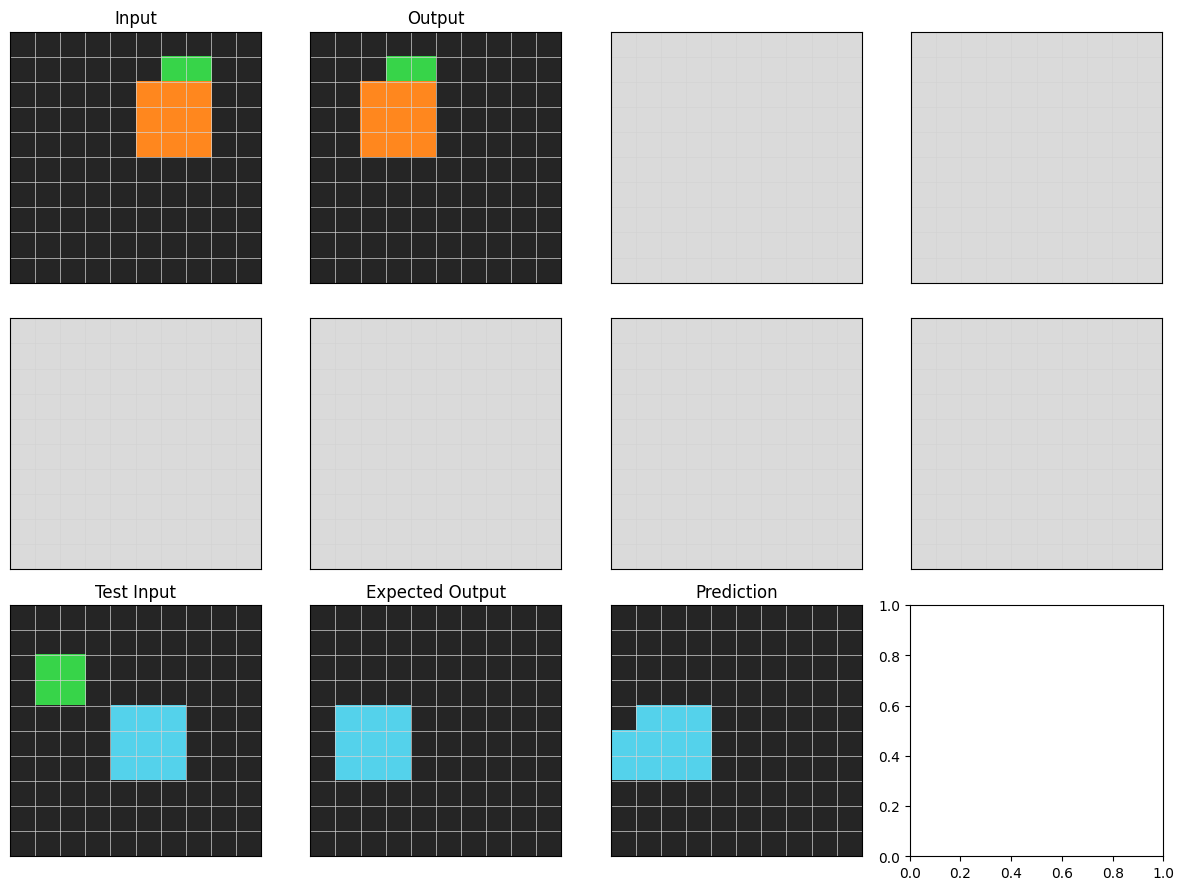

torch.Size([1, 10, 10])


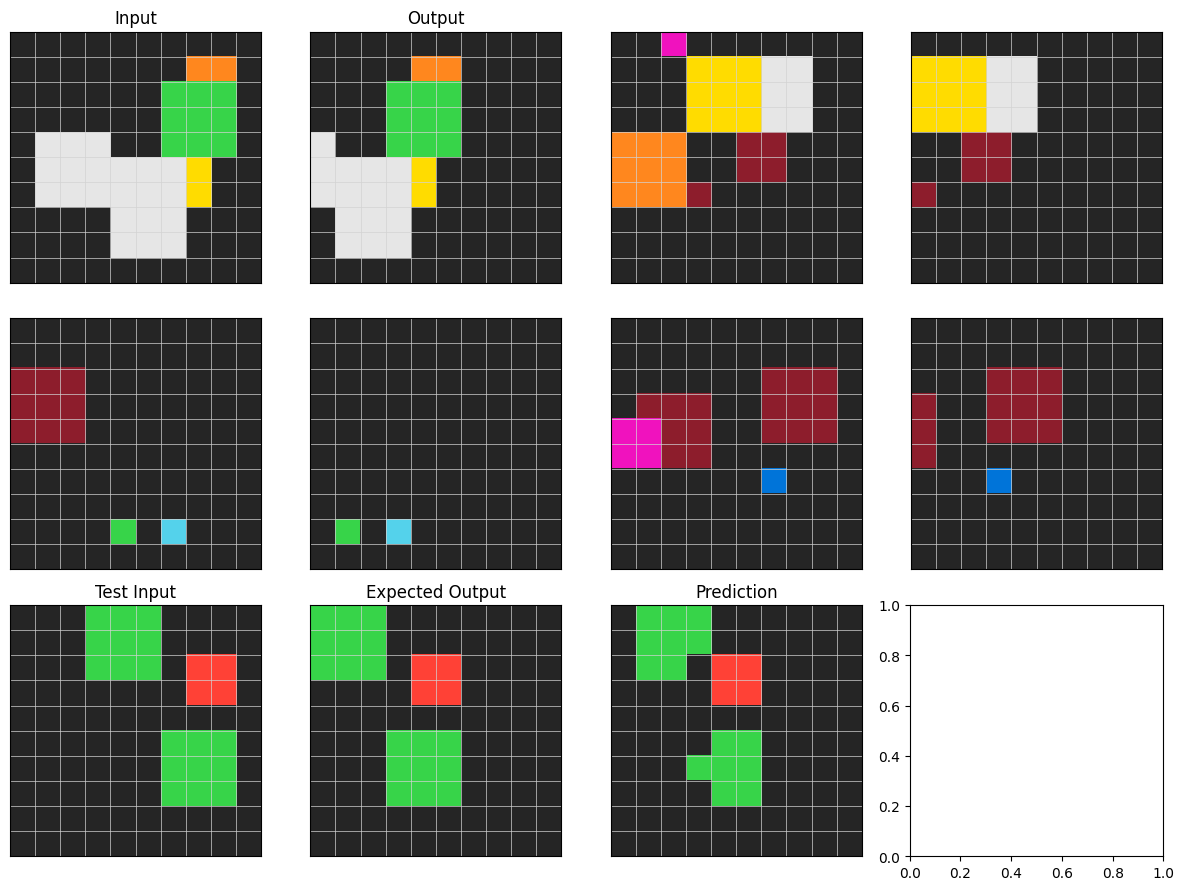

torch.Size([1, 10, 10])


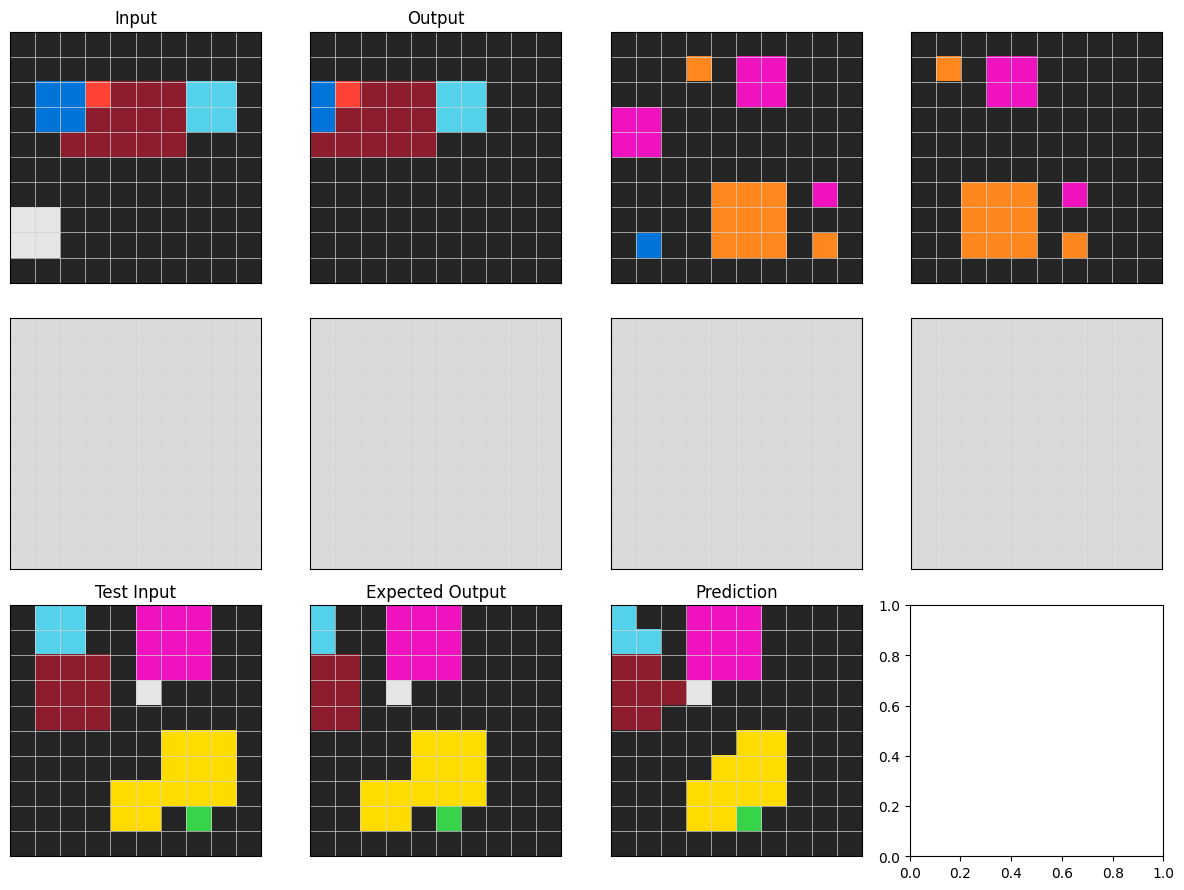

torch.Size([1, 10, 10])


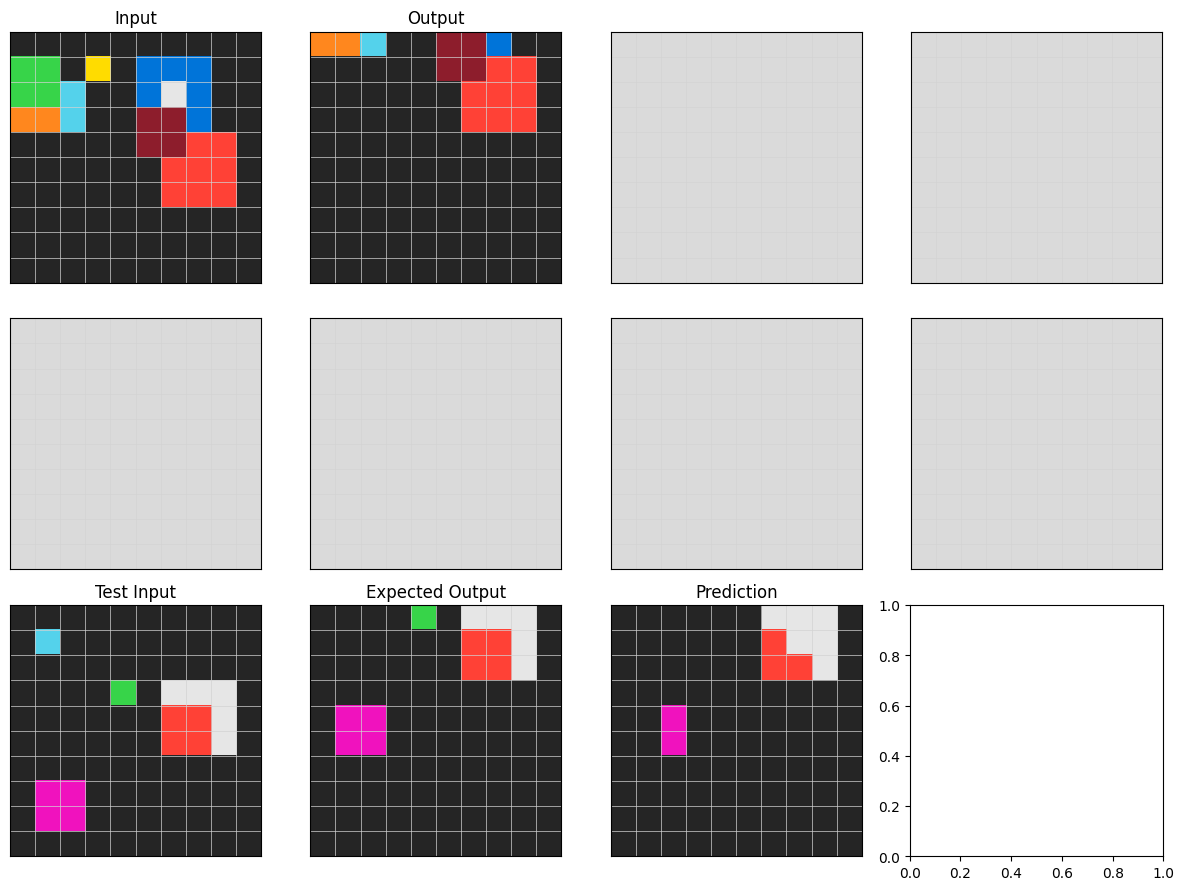

torch.Size([1, 10, 10])


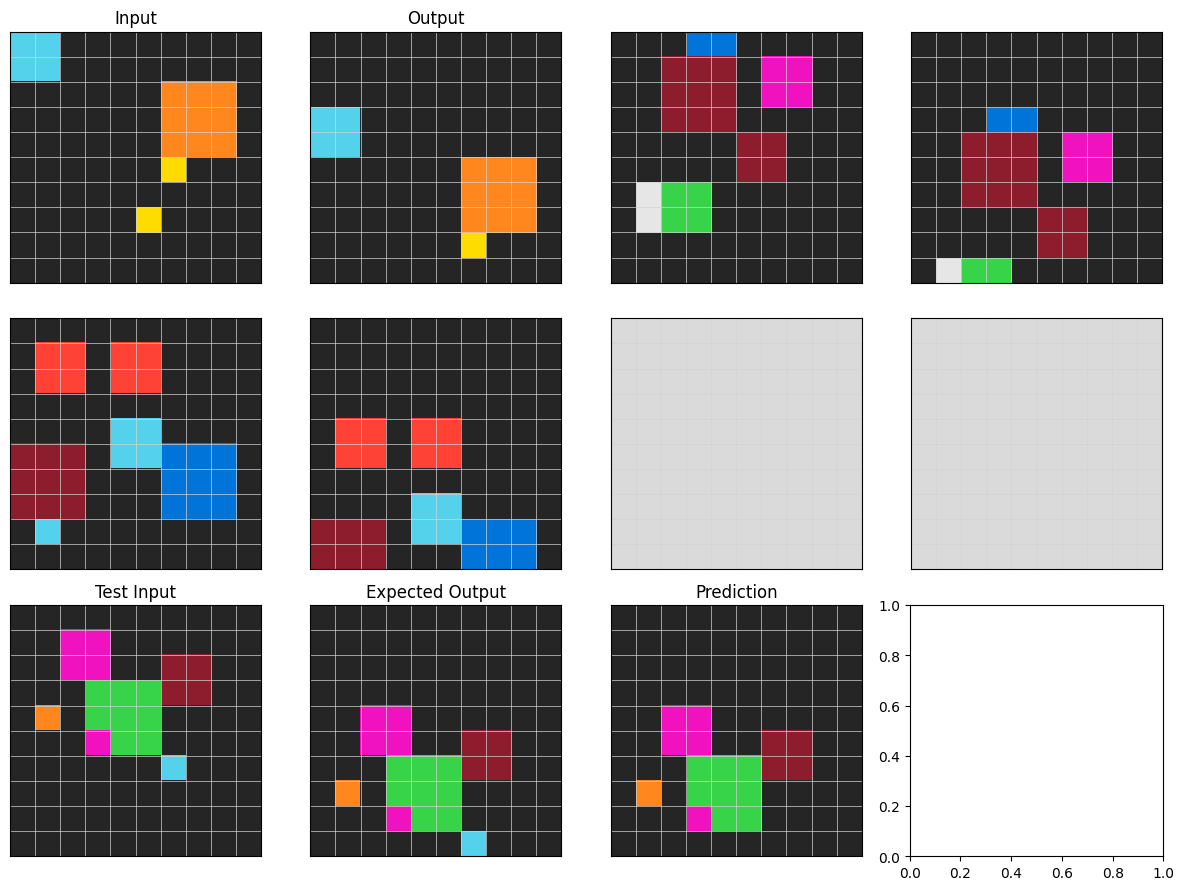

torch.Size([1, 10, 10])


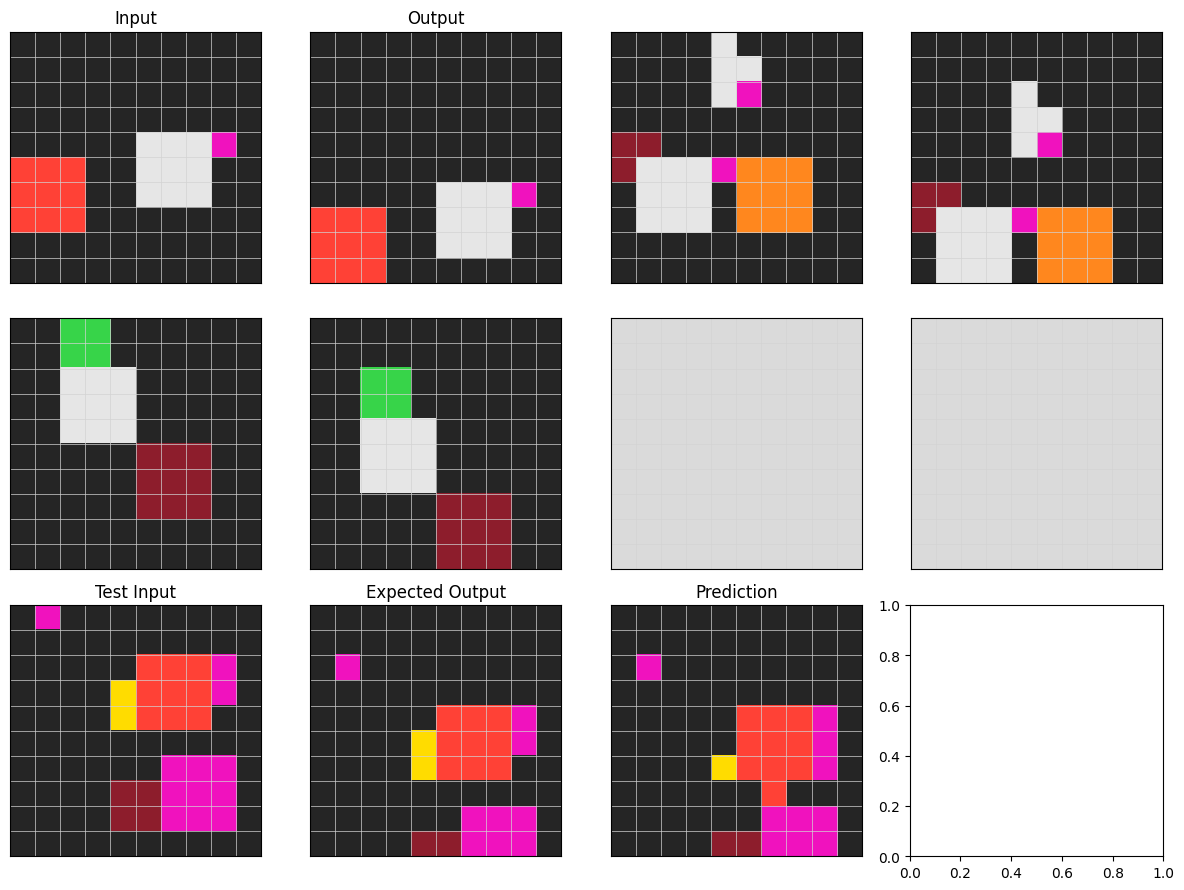

torch.Size([1, 10, 10])


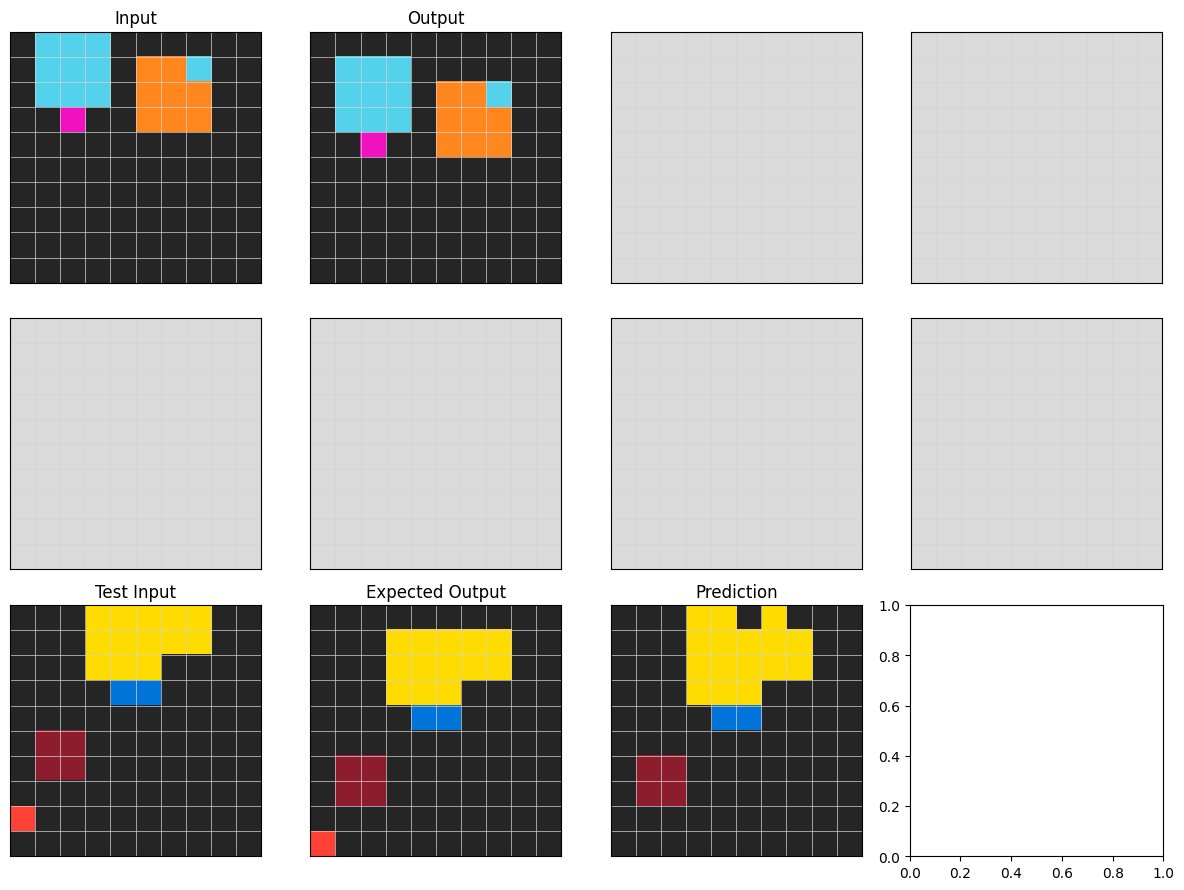

torch.Size([1, 10, 10])


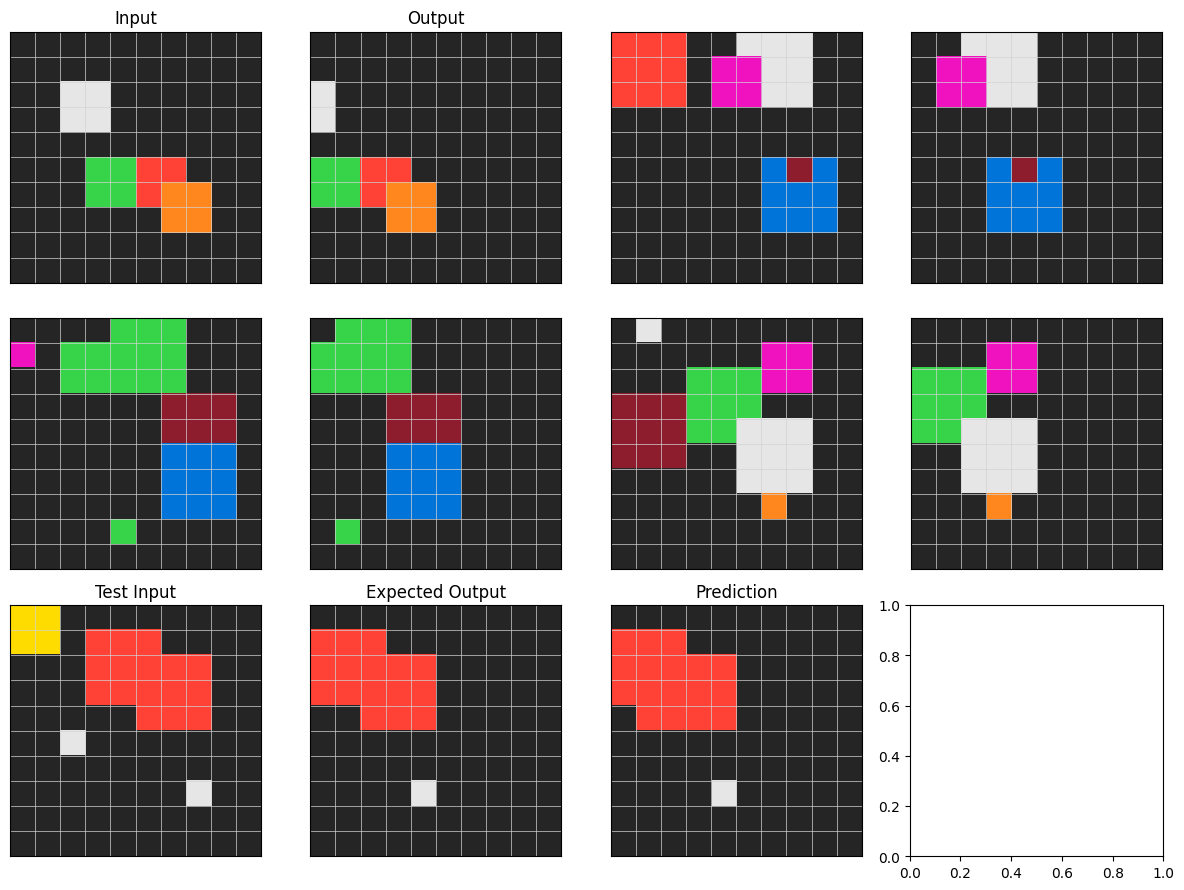

torch.Size([1, 10, 10])


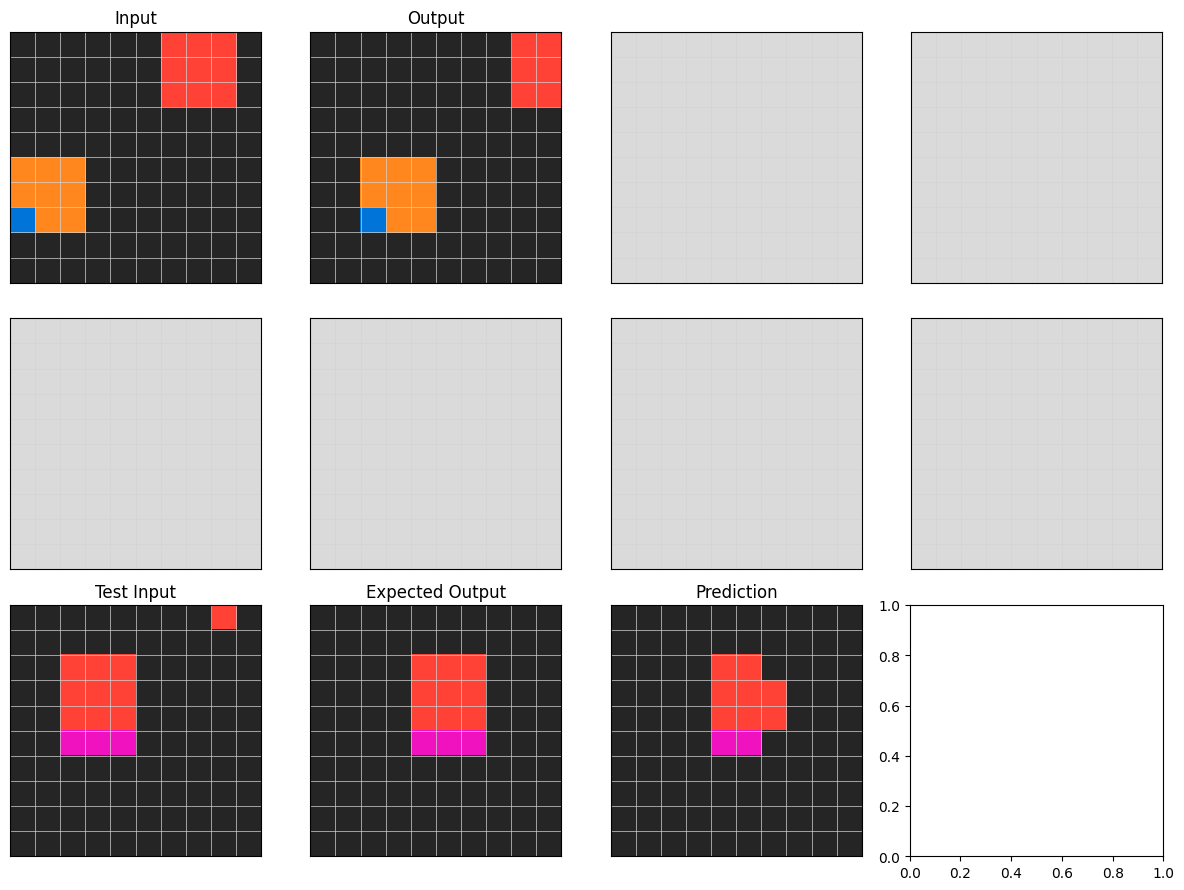

torch.Size([1, 10, 10])


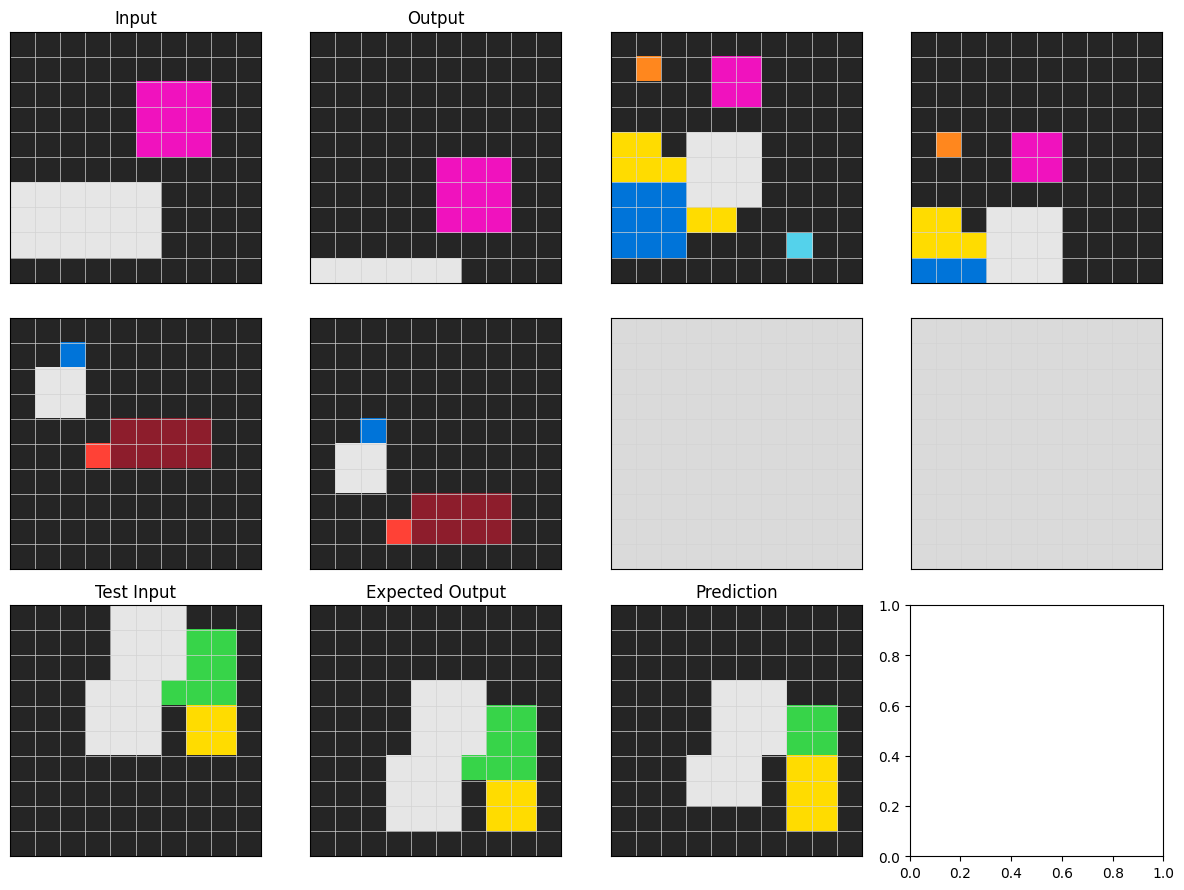

torch.Size([1, 10, 10])


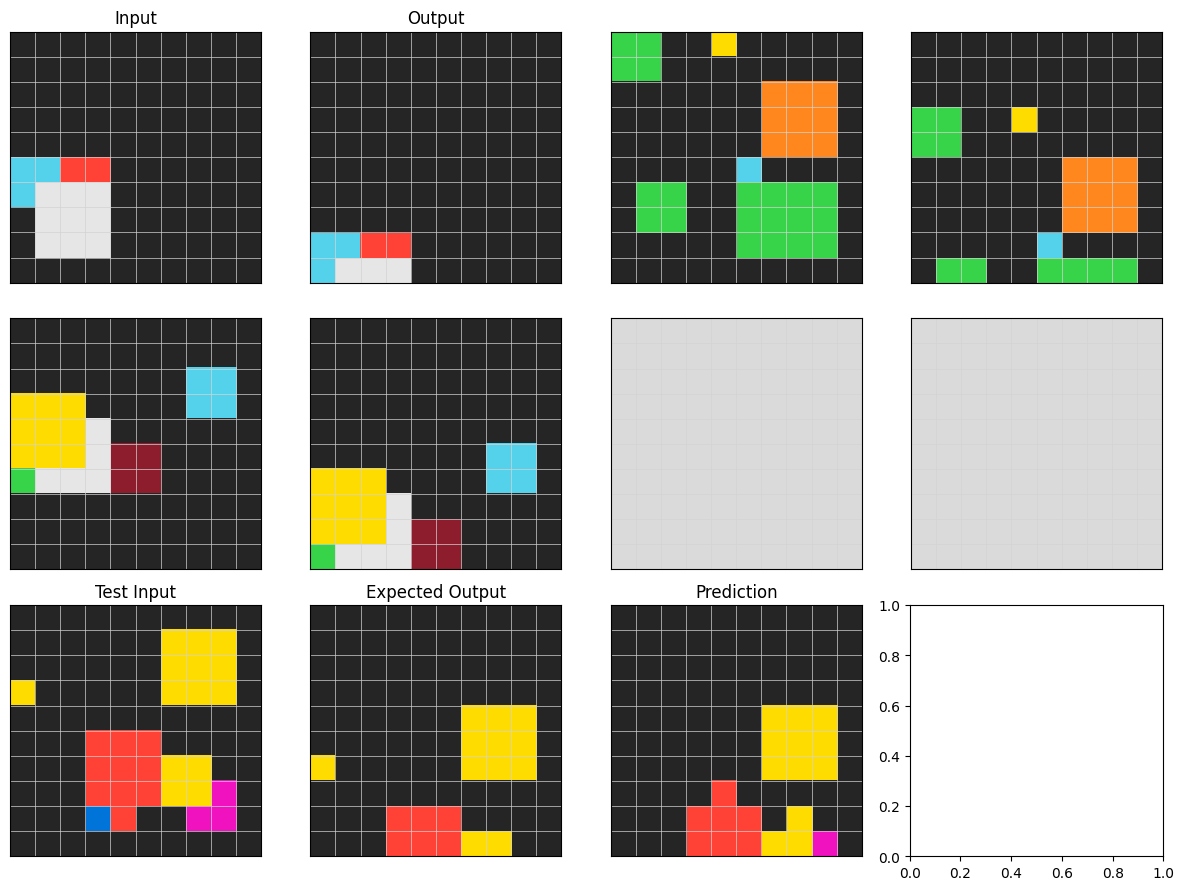

torch.Size([1, 10, 10])


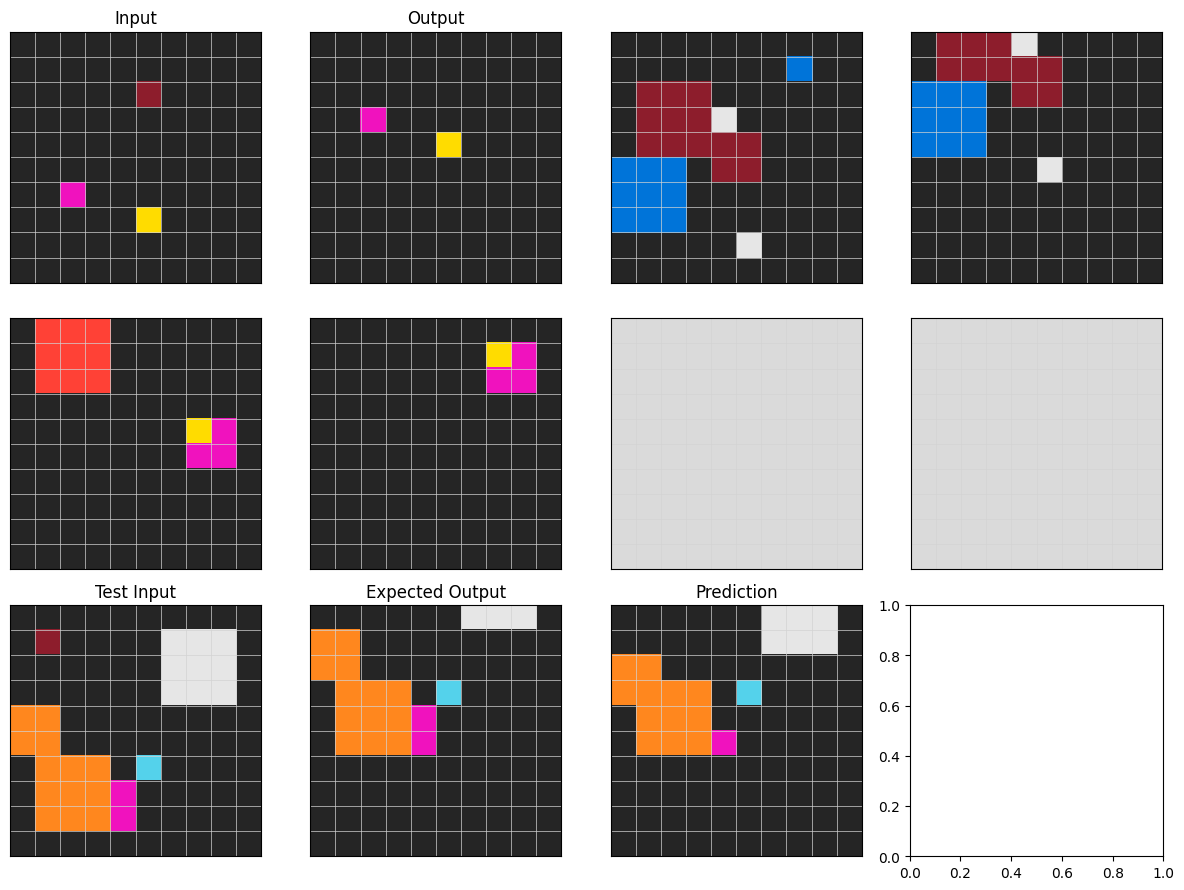

torch.Size([1, 10, 10])


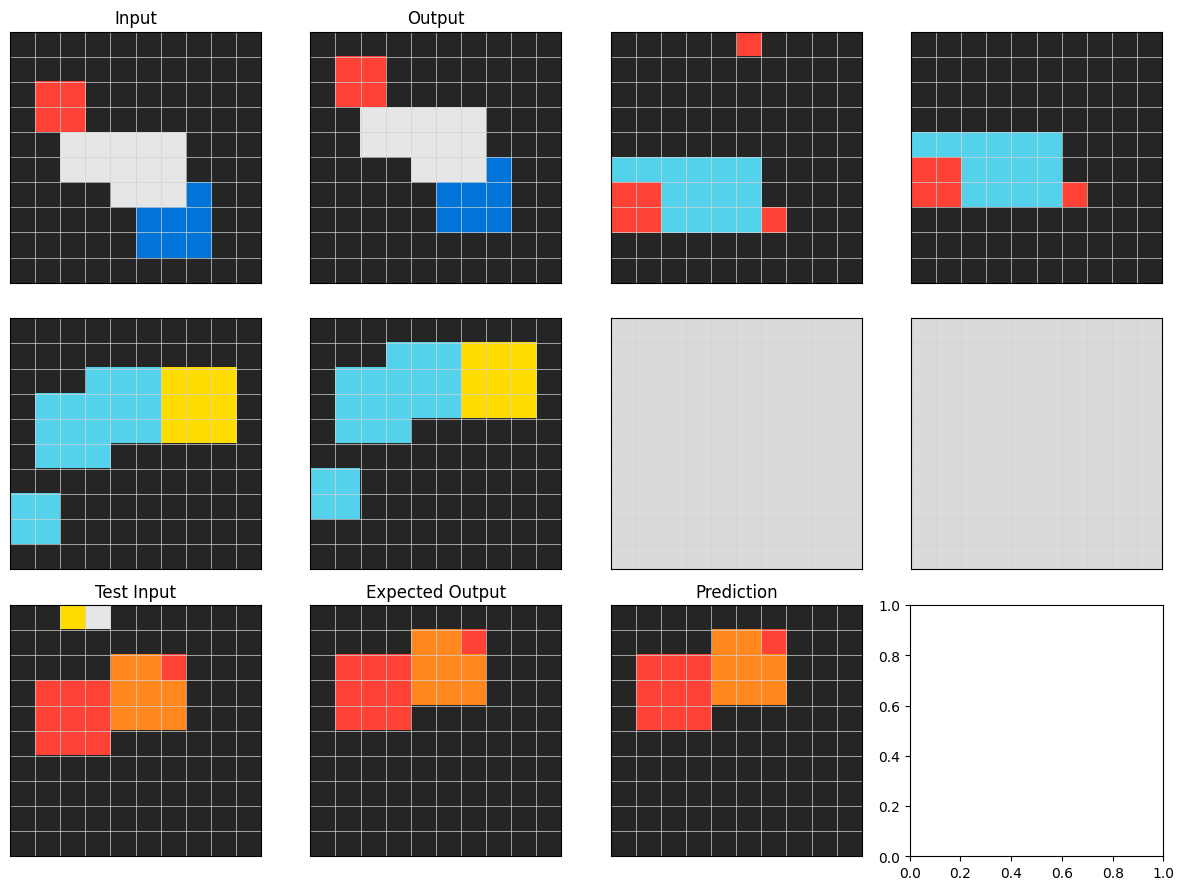

torch.Size([1, 10, 10])


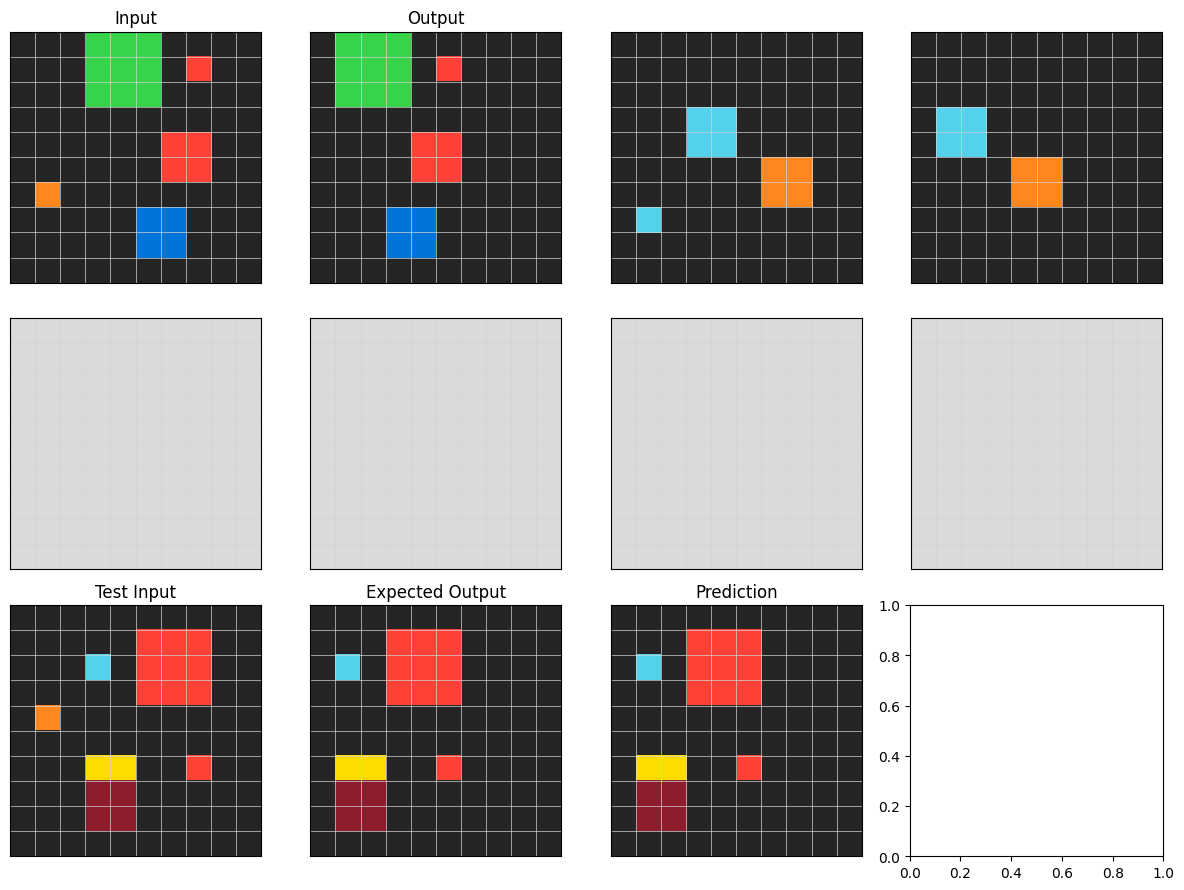

torch.Size([1, 10, 10])


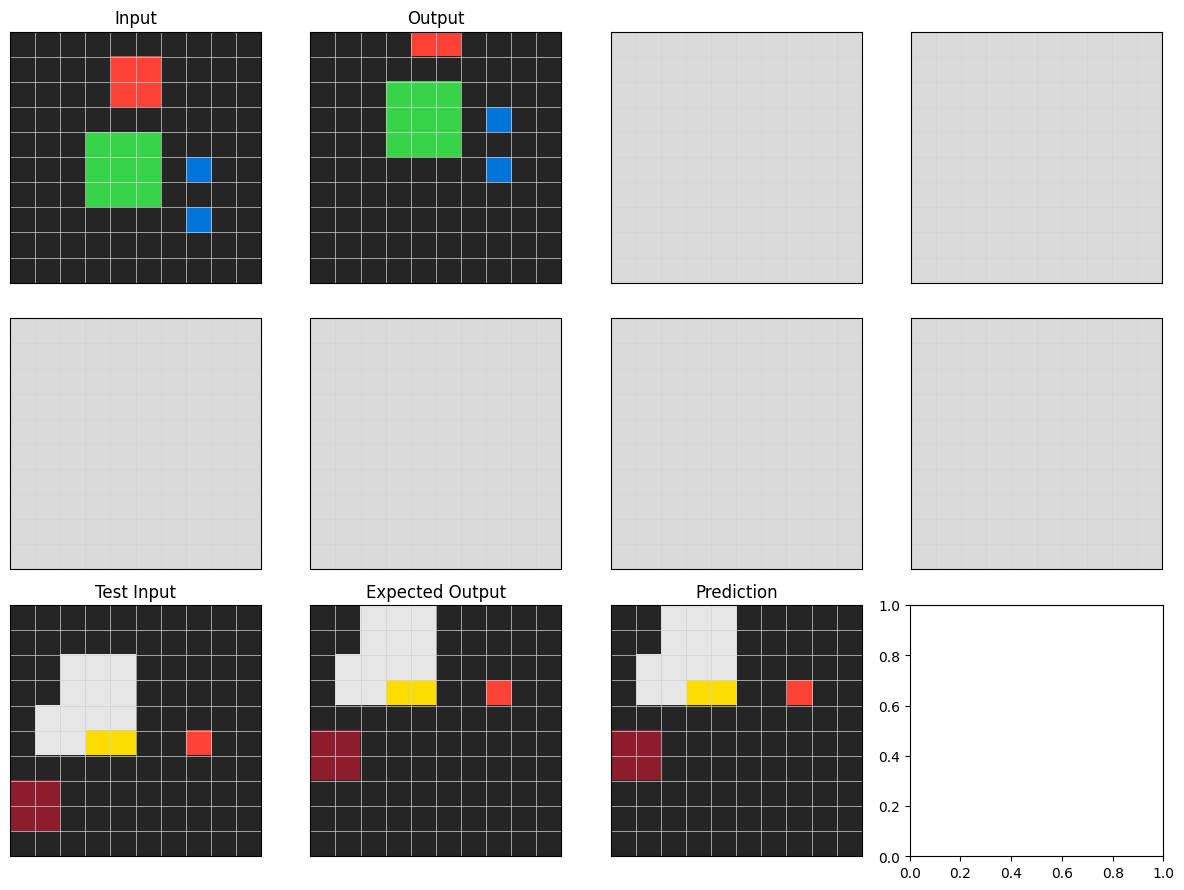

torch.Size([1, 10, 10])


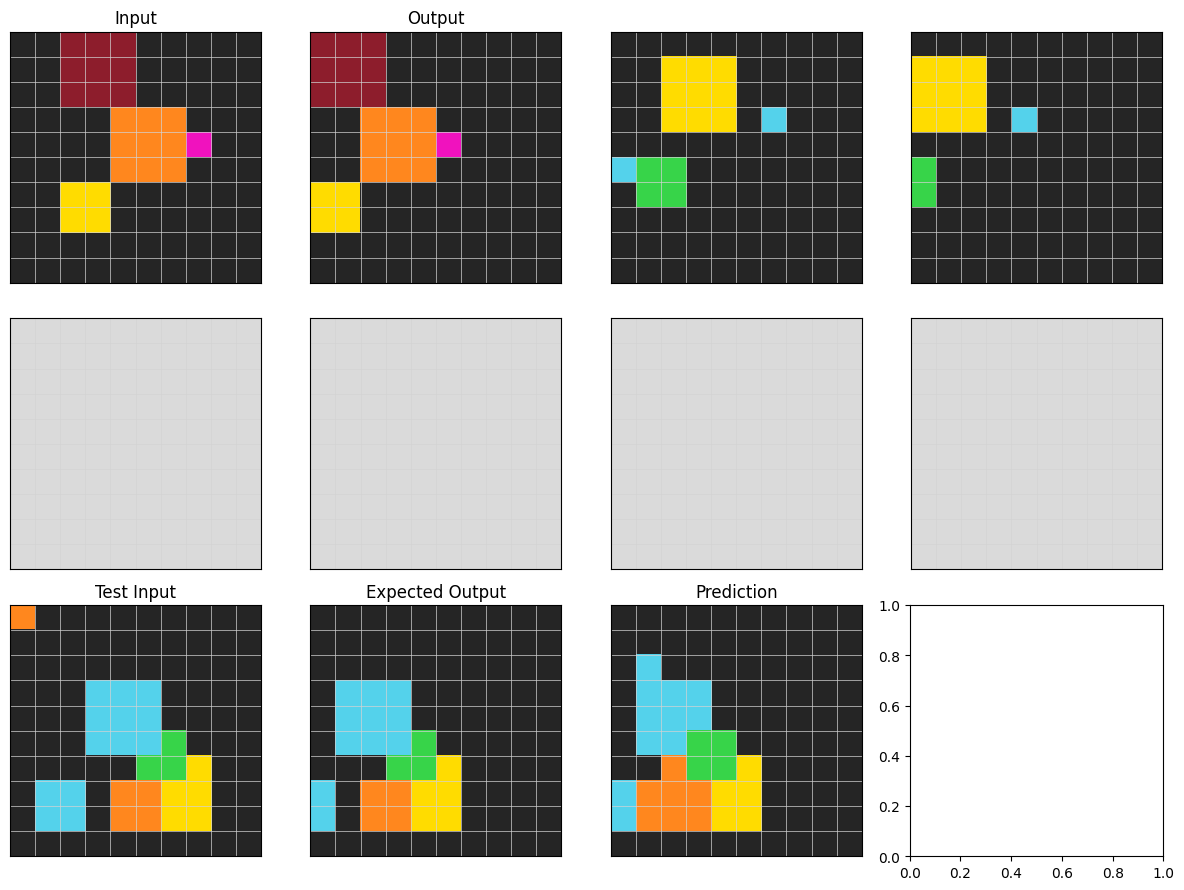

torch.Size([1, 10, 10])


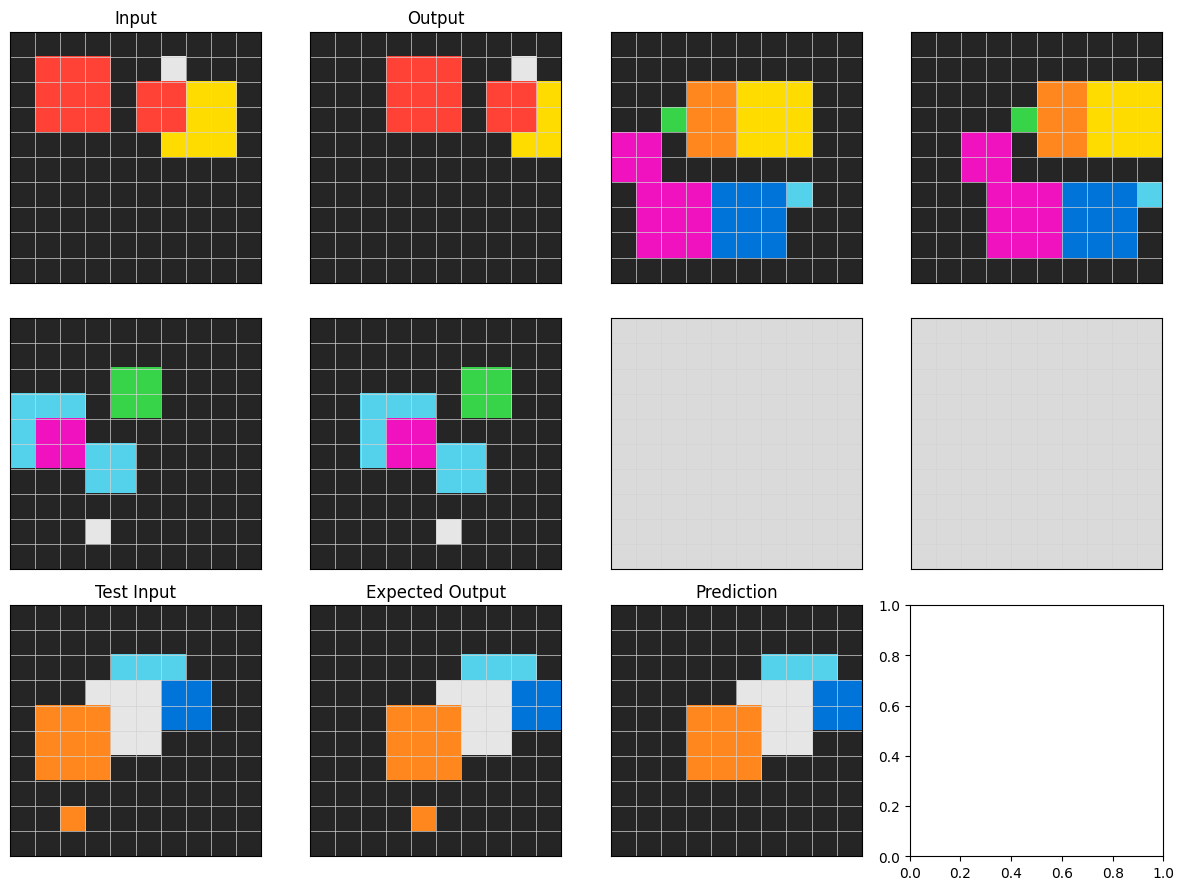

torch.Size([1, 10, 10])


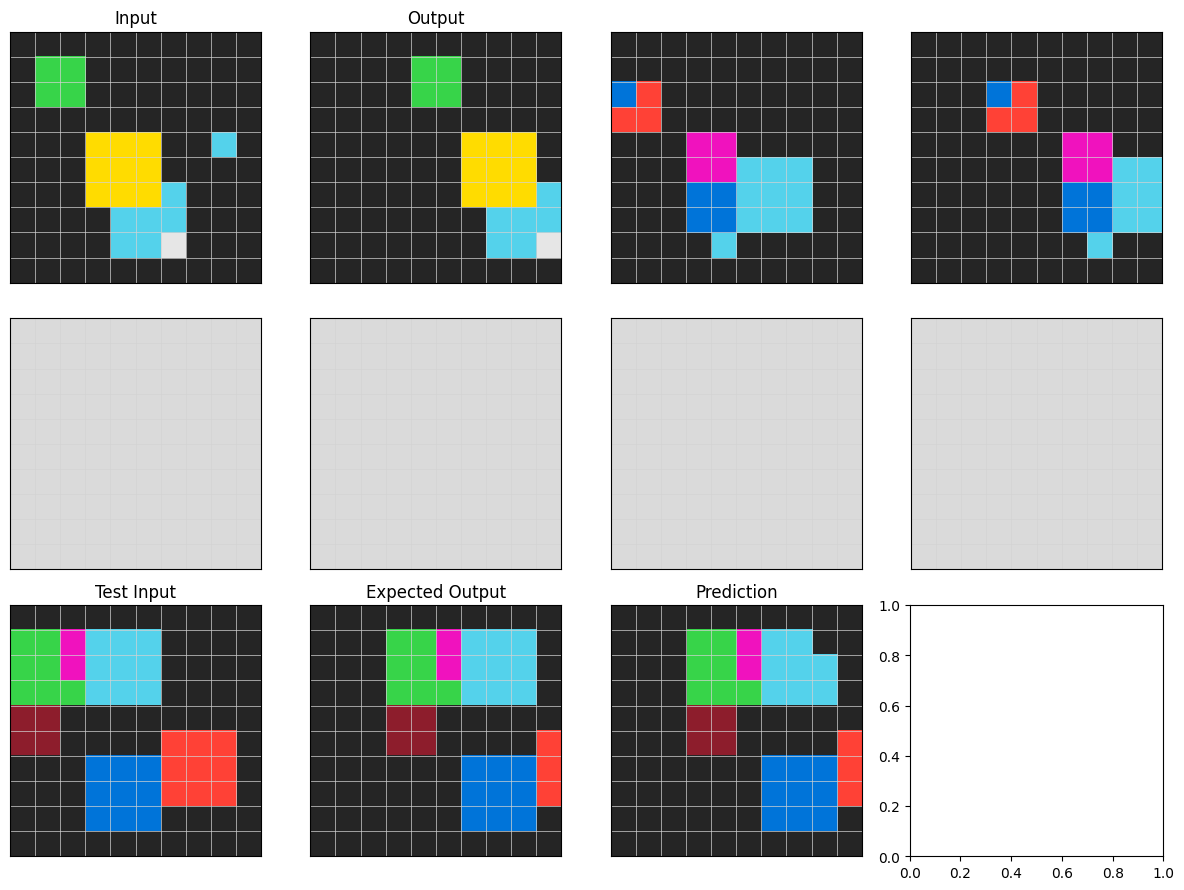

torch.Size([1, 10, 10])


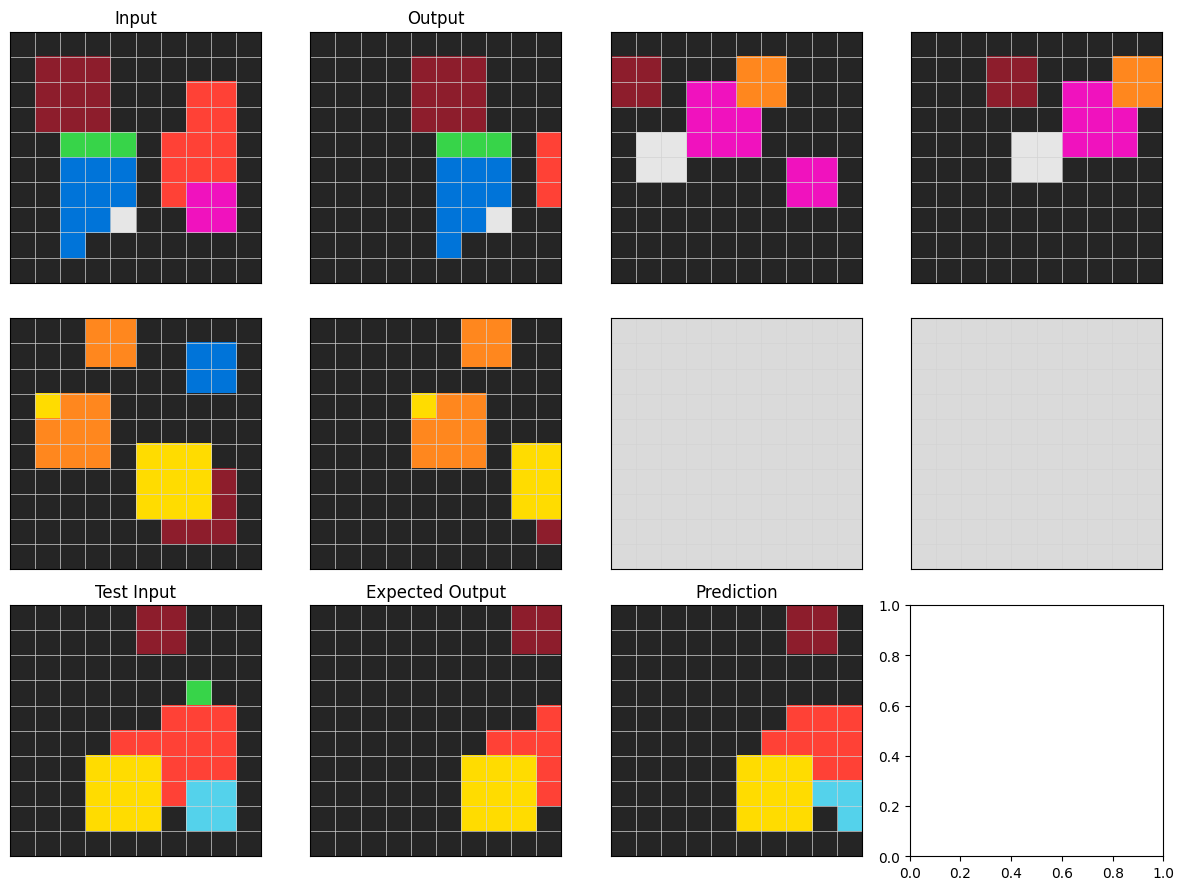

torch.Size([1, 10, 10])


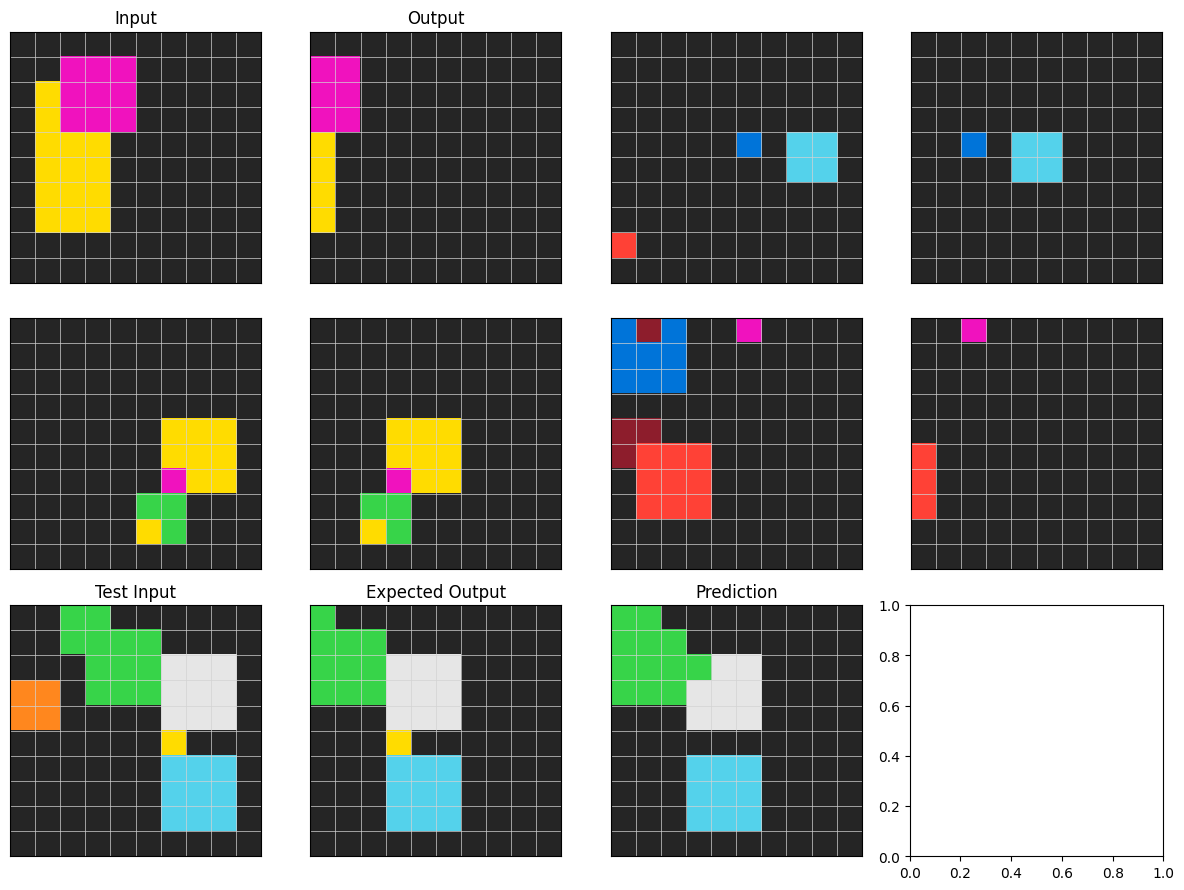

torch.Size([1, 10, 10])


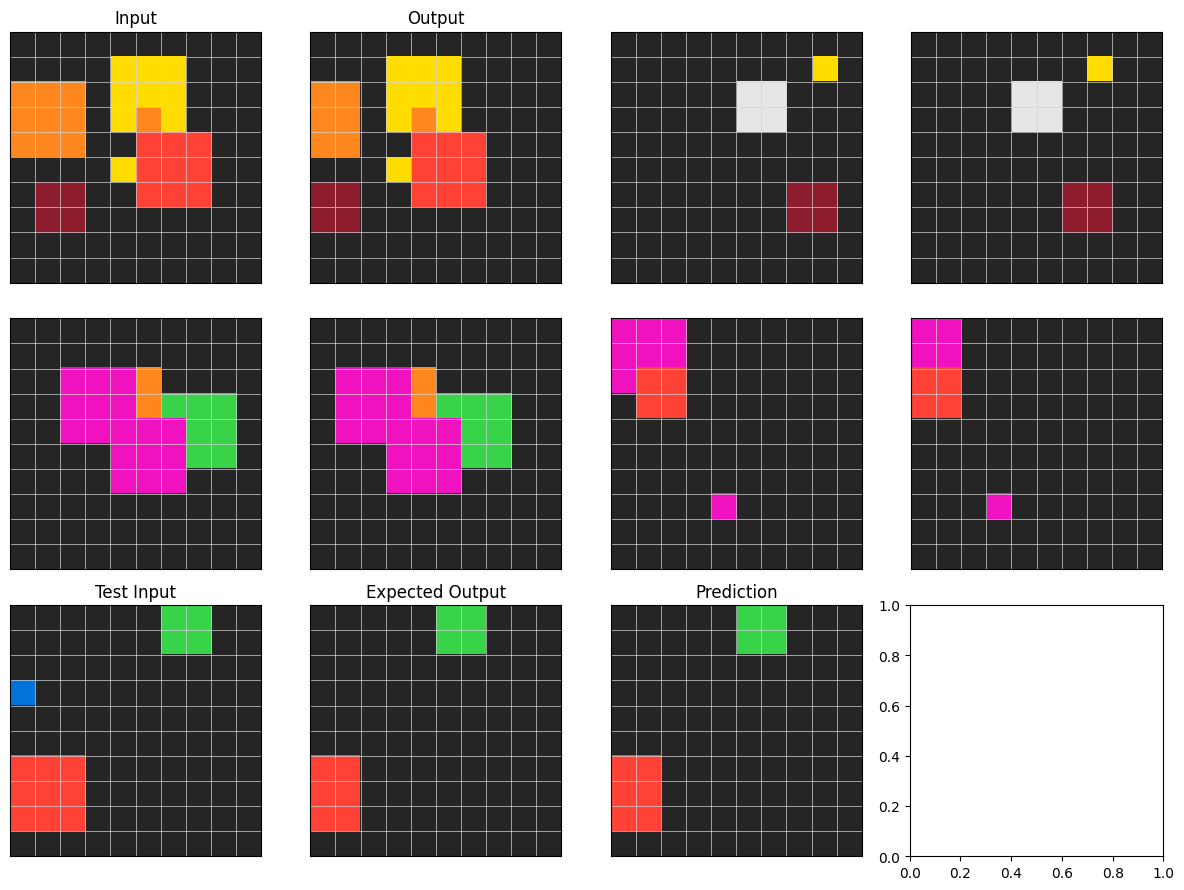

torch.Size([1, 10, 10])


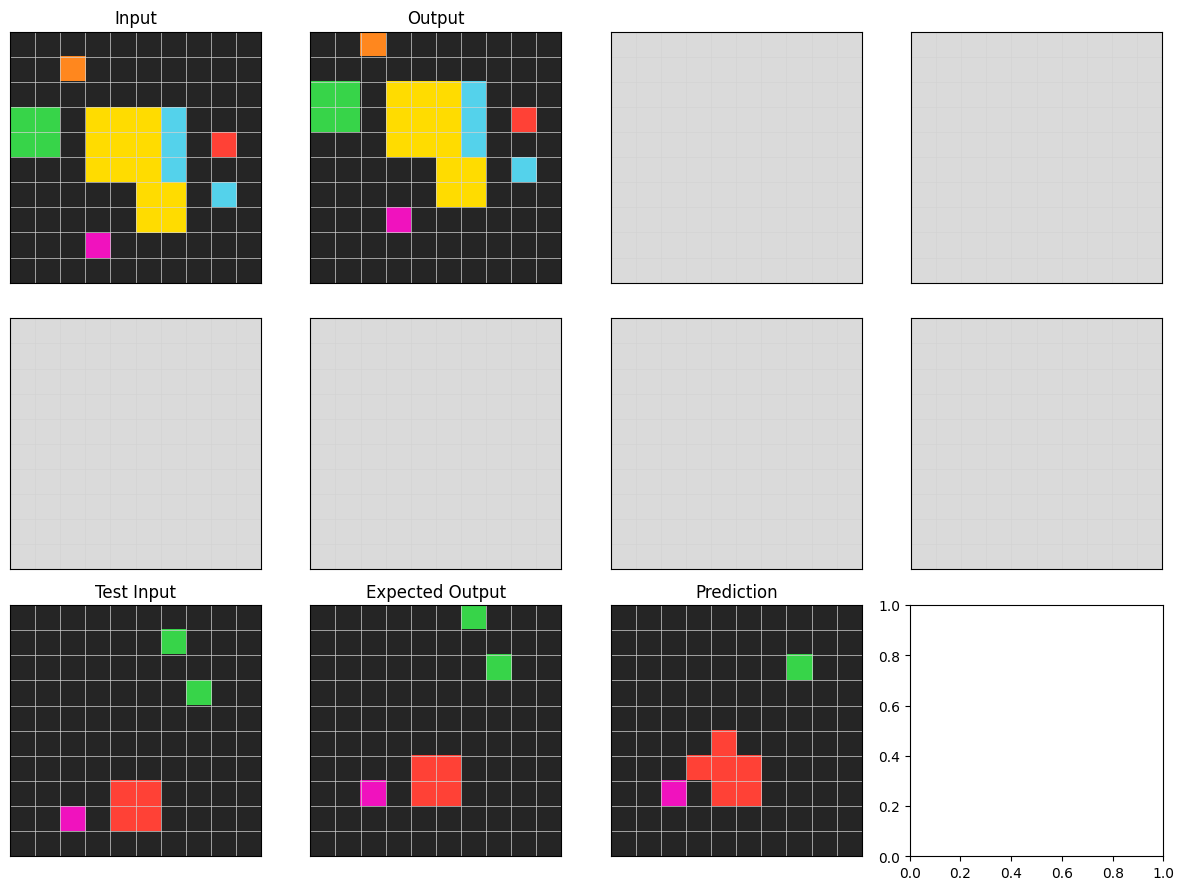

torch.Size([1, 10, 10])


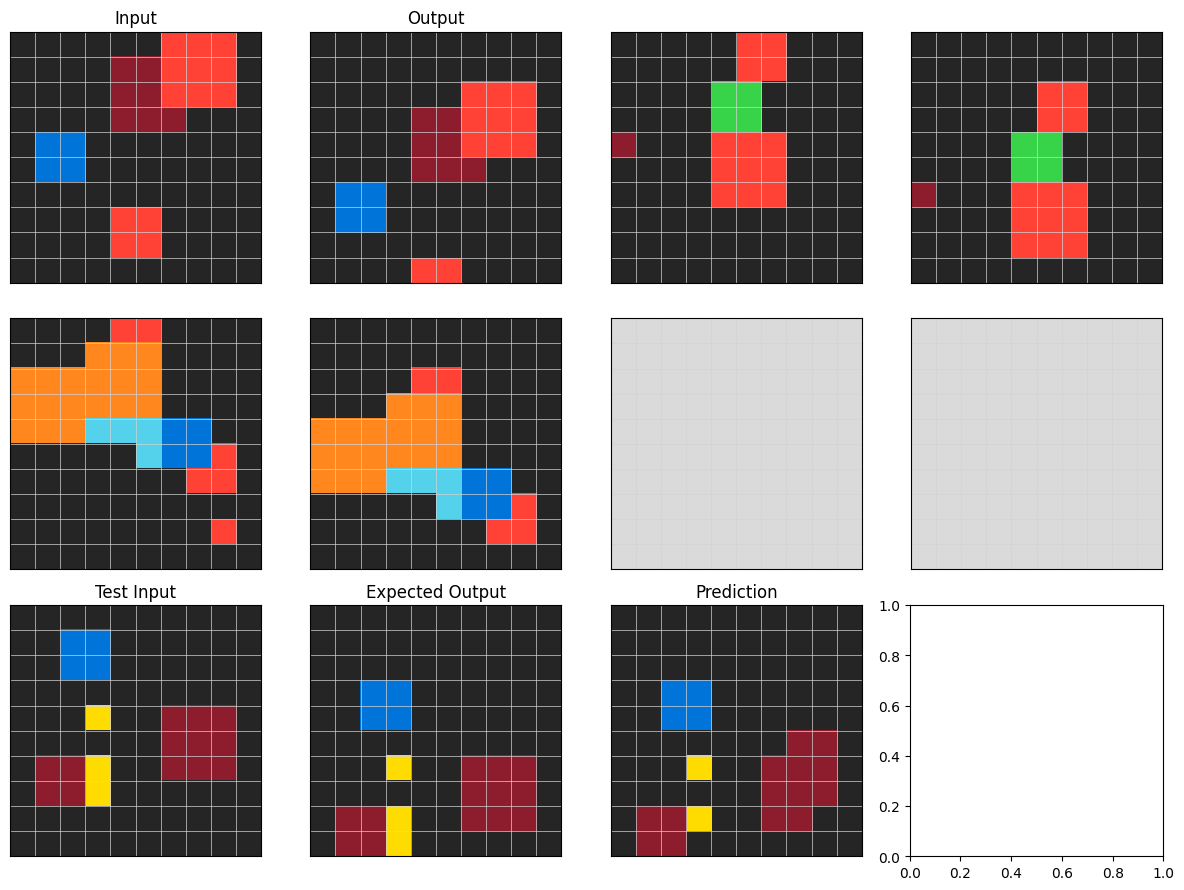

torch.Size([1, 10, 10])


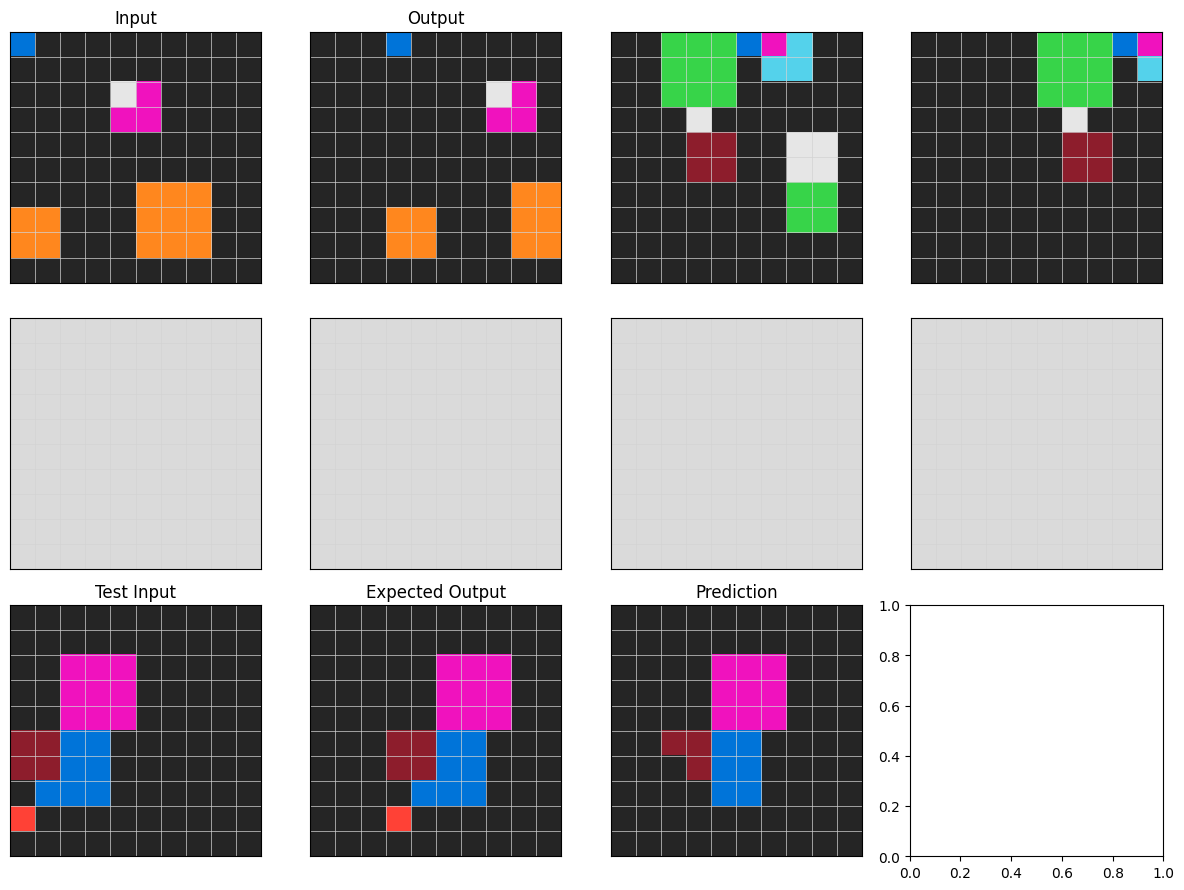

torch.Size([1, 10, 10])


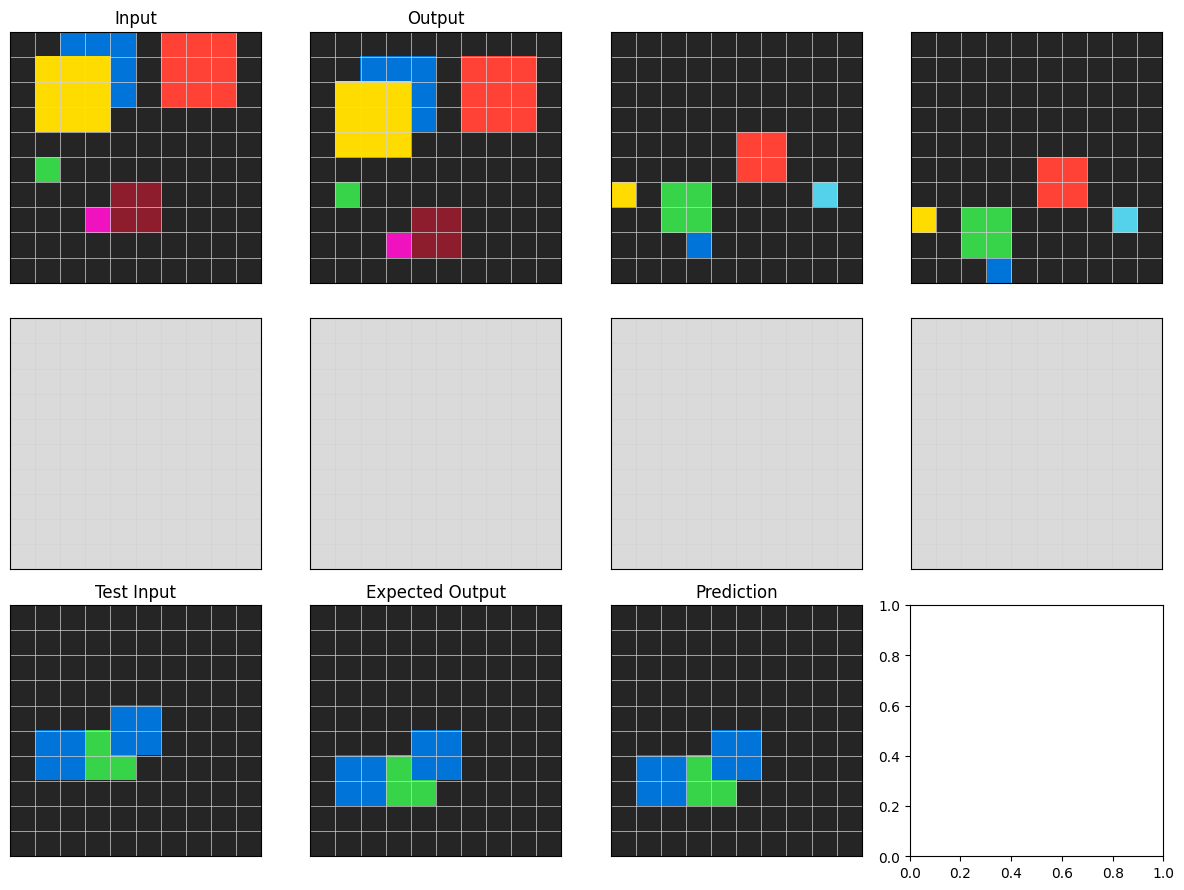

torch.Size([1, 10, 10])


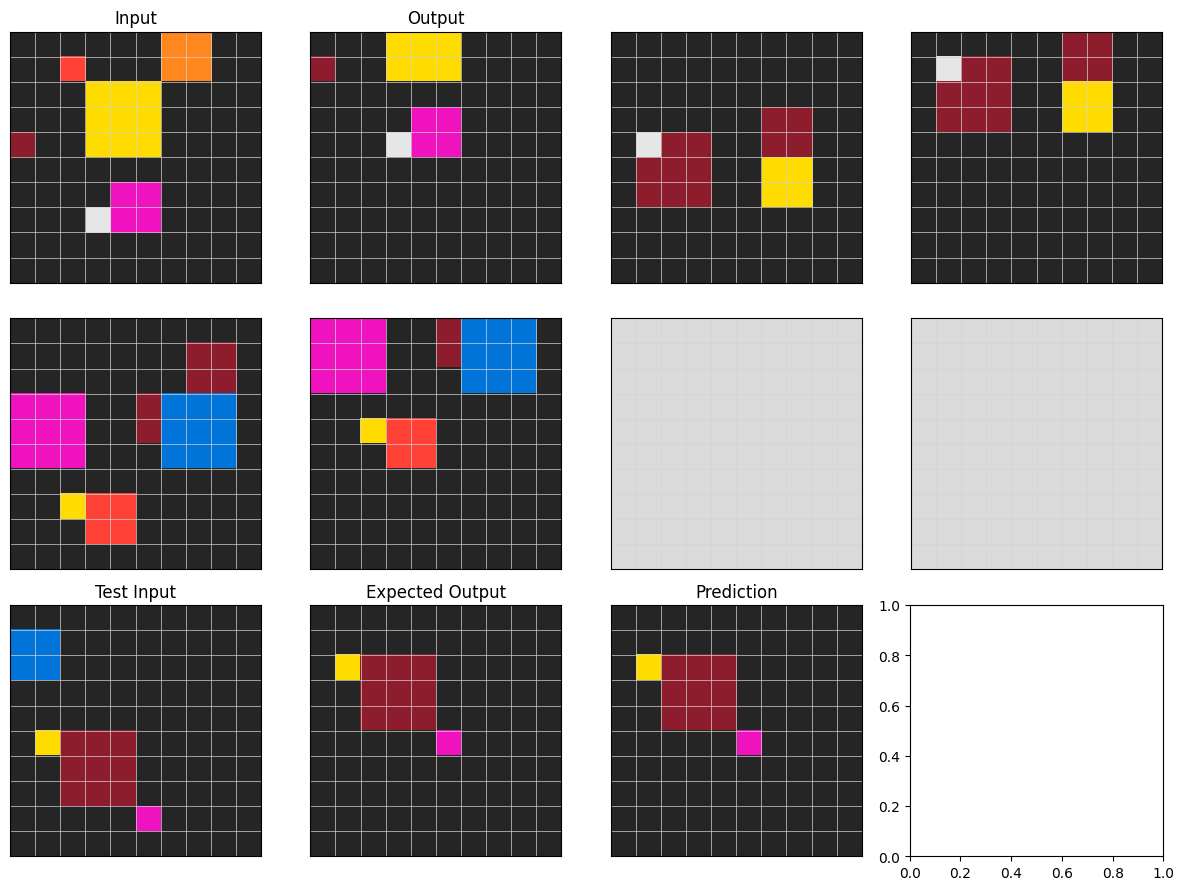

torch.Size([1, 10, 10])


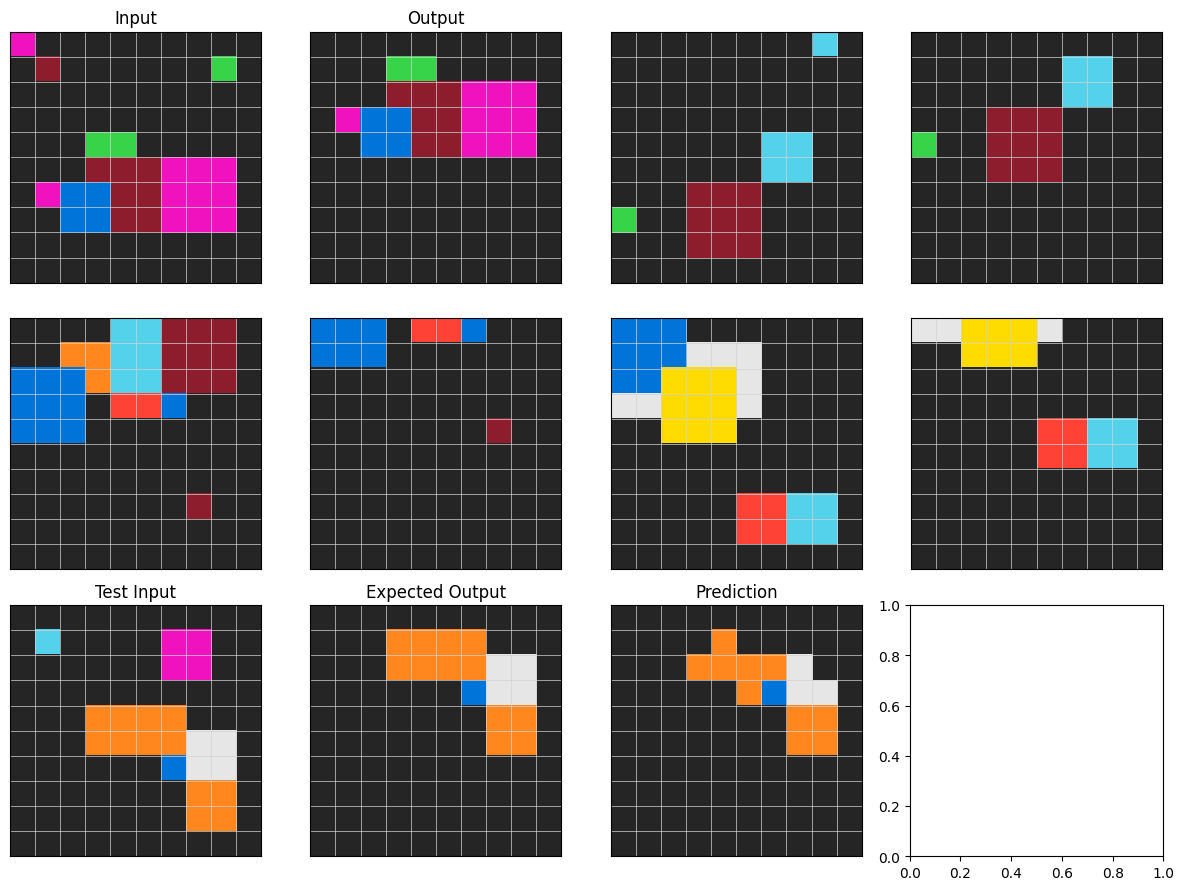

torch.Size([1, 10, 10])


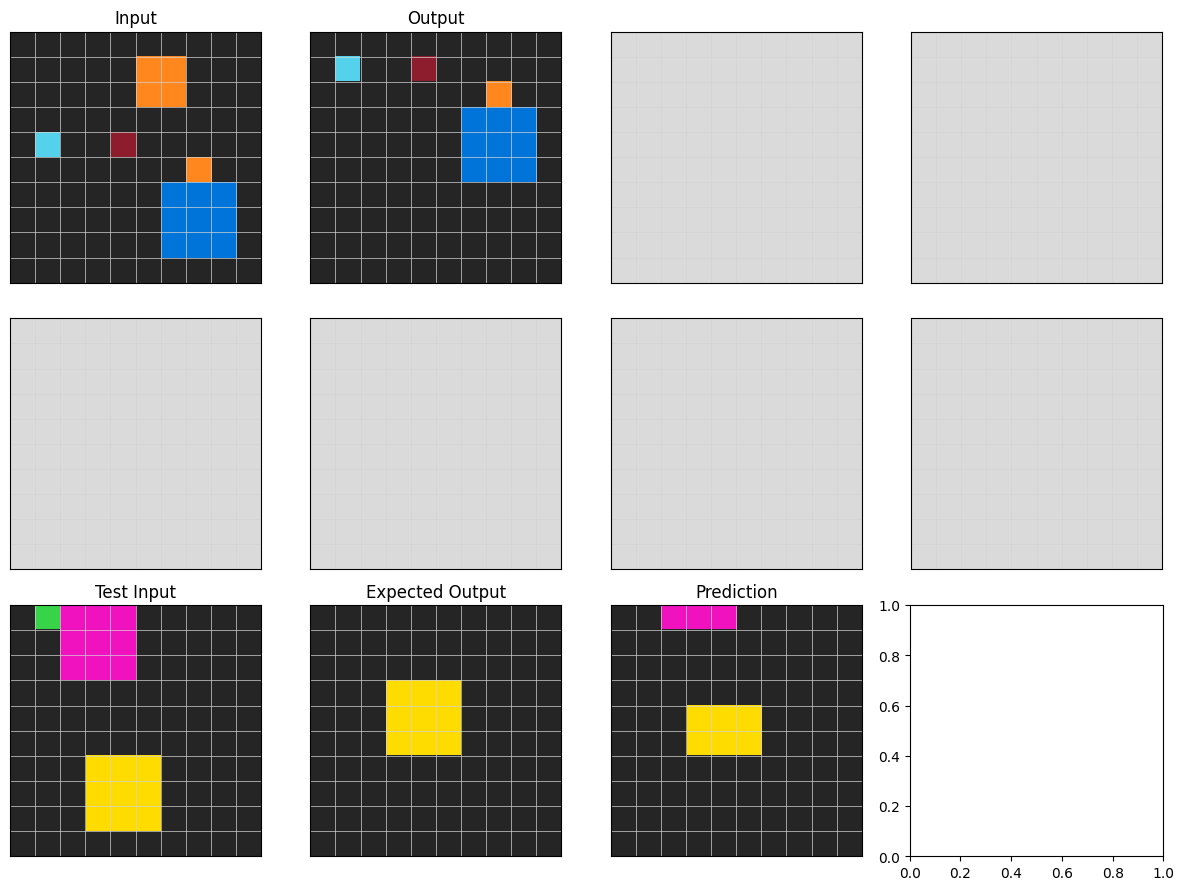

torch.Size([1, 10, 10])


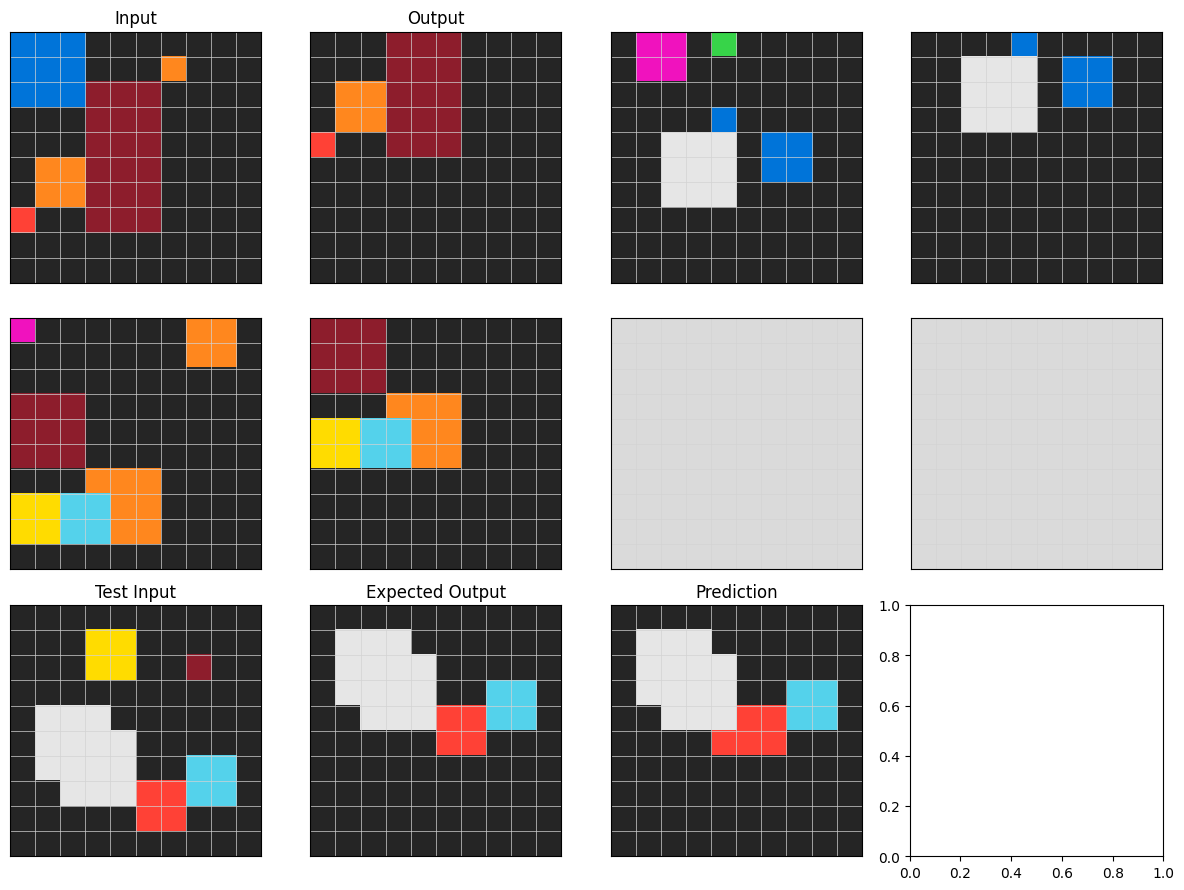

torch.Size([1, 10, 10])


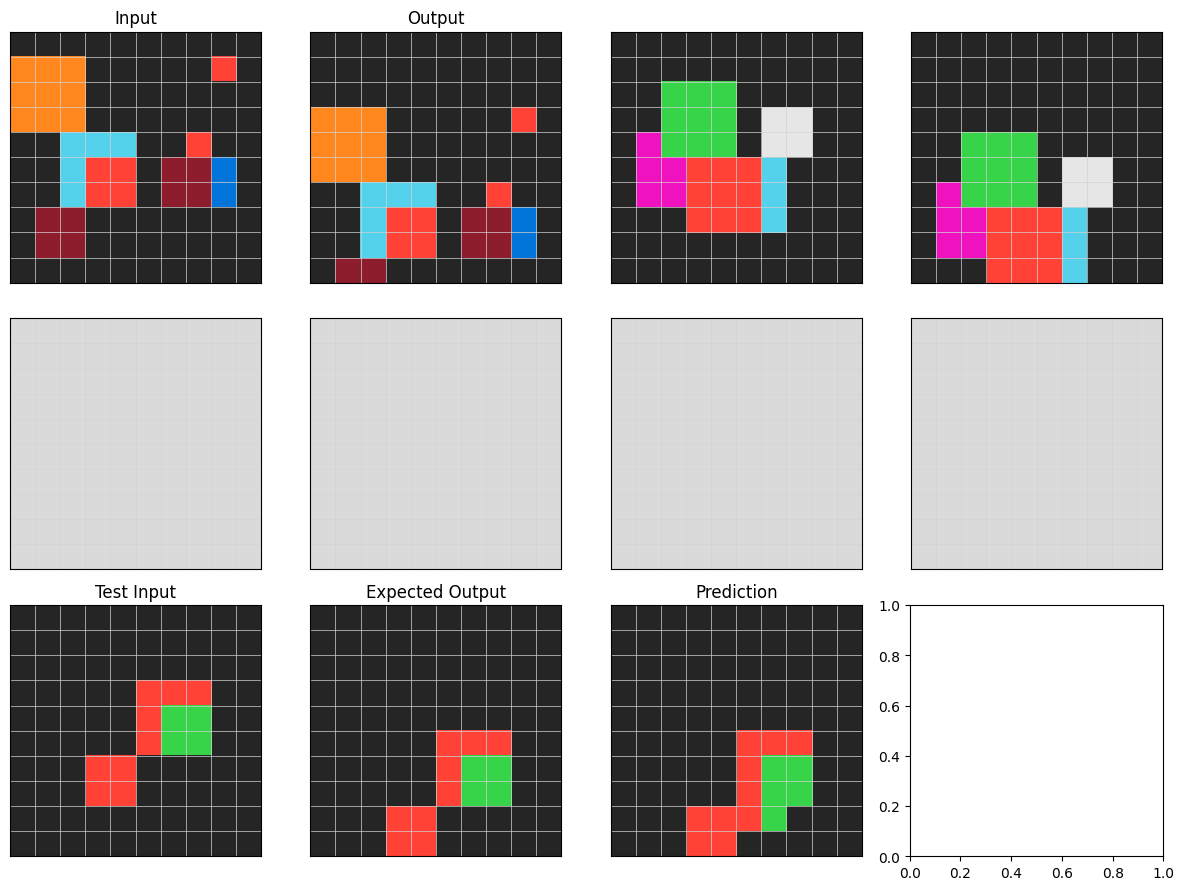

torch.Size([1, 10, 10])


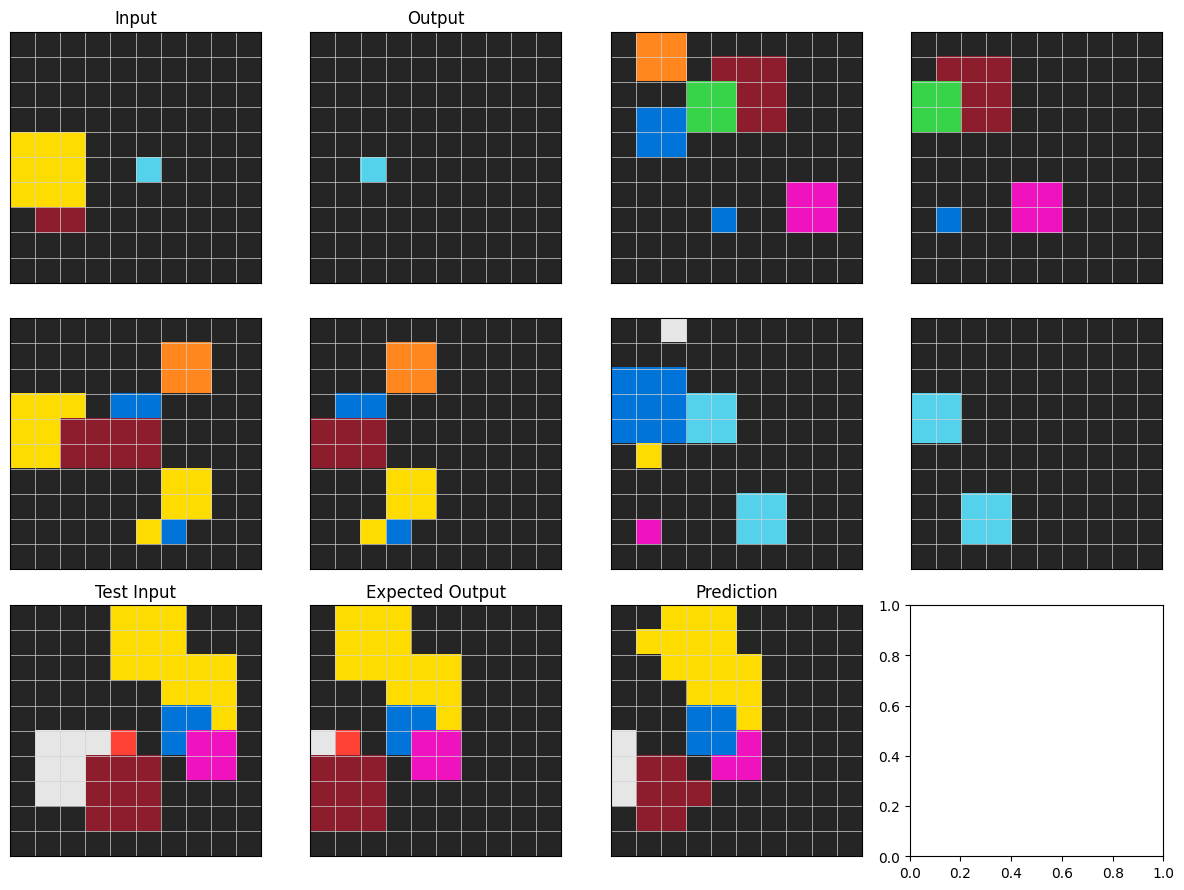

torch.Size([1, 10, 10])


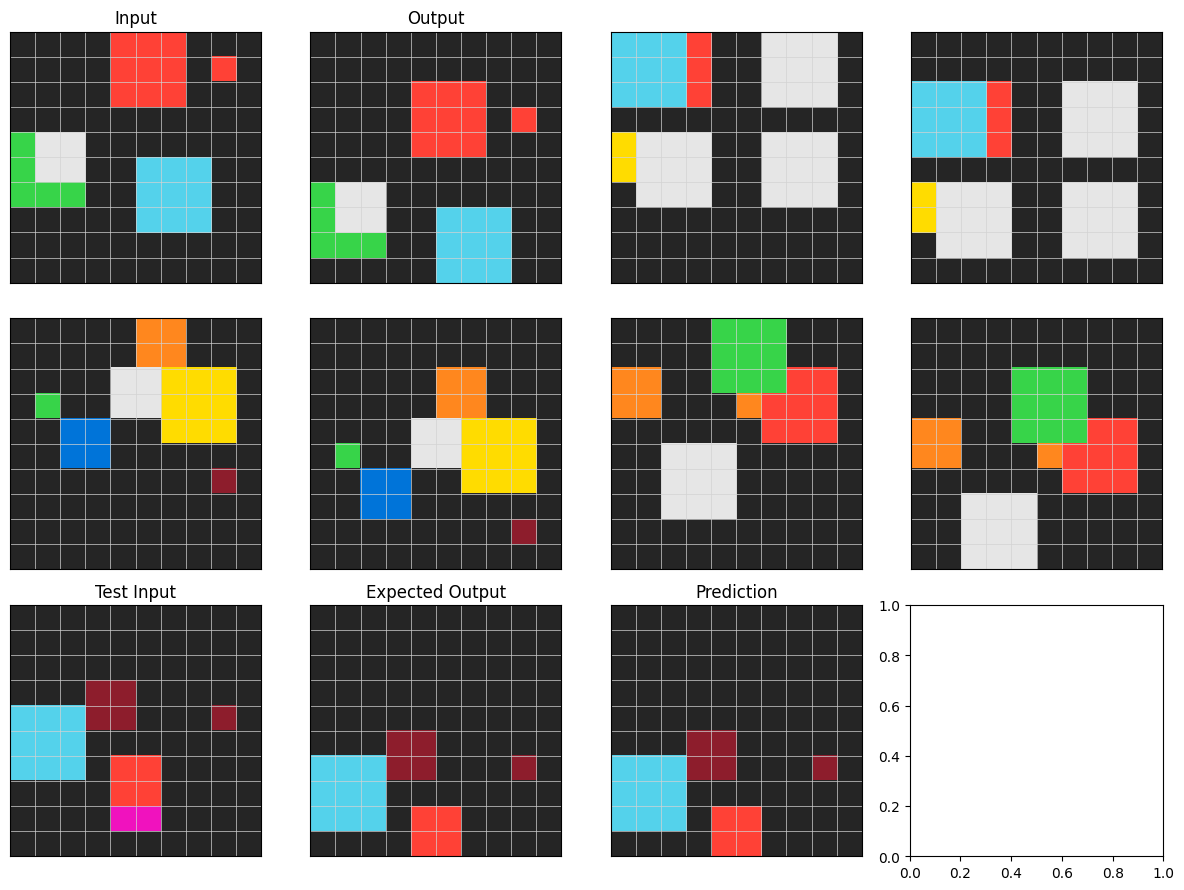

torch.Size([1, 10, 10])


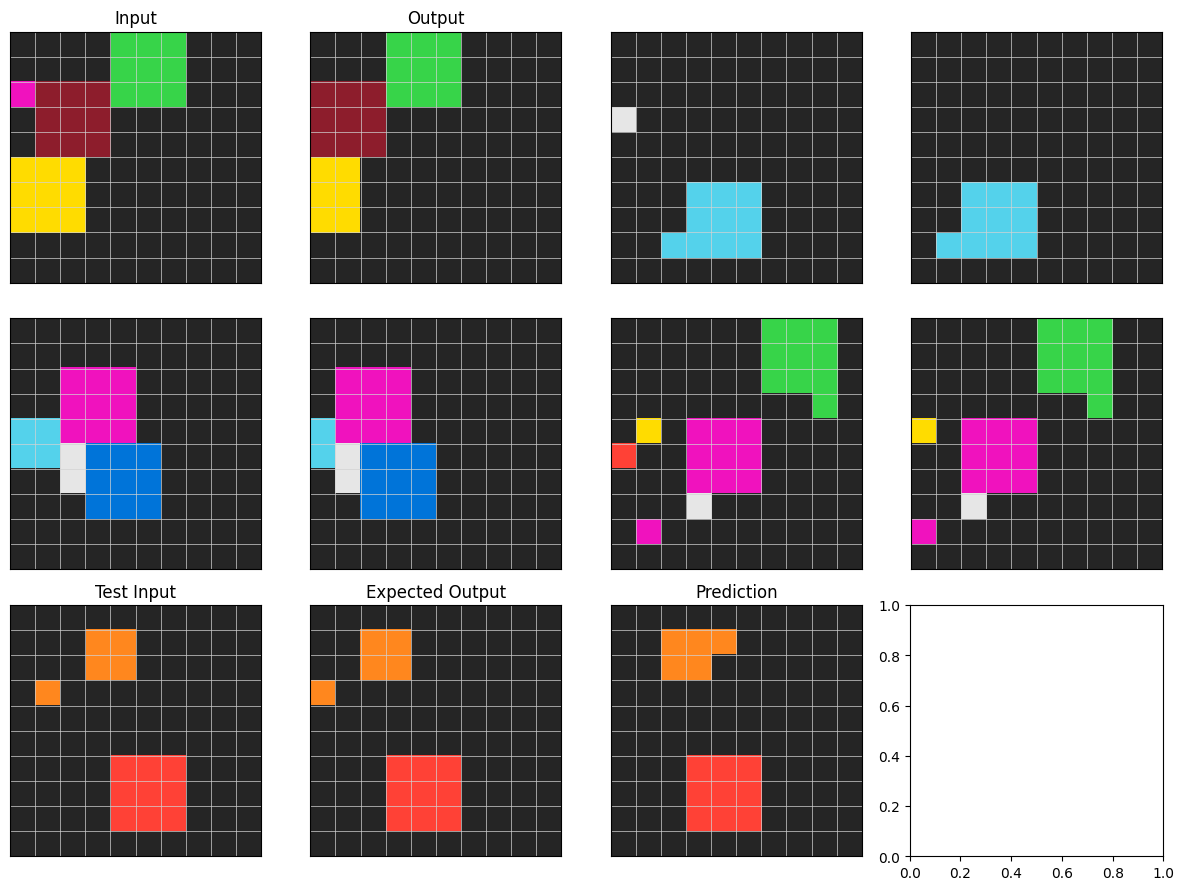

torch.Size([1, 10, 10])


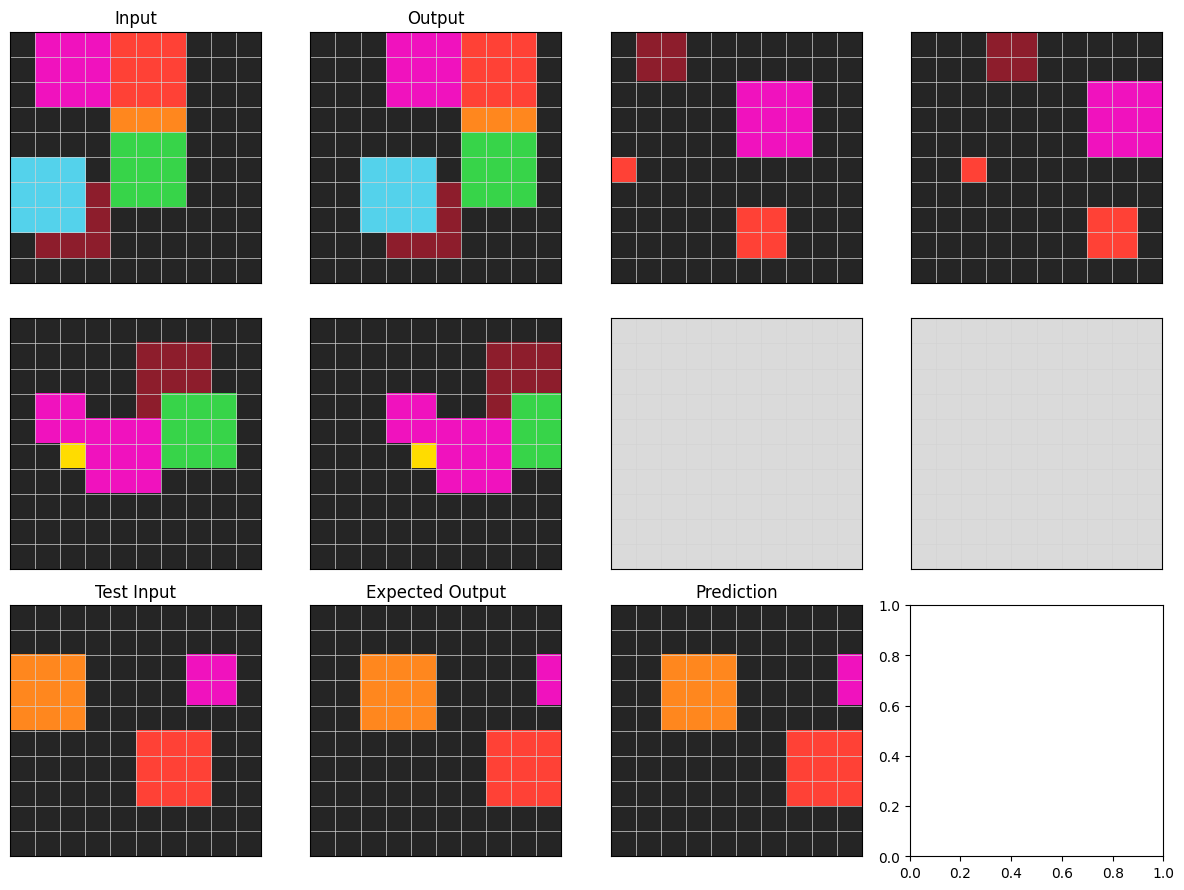

torch.Size([1, 10, 10])


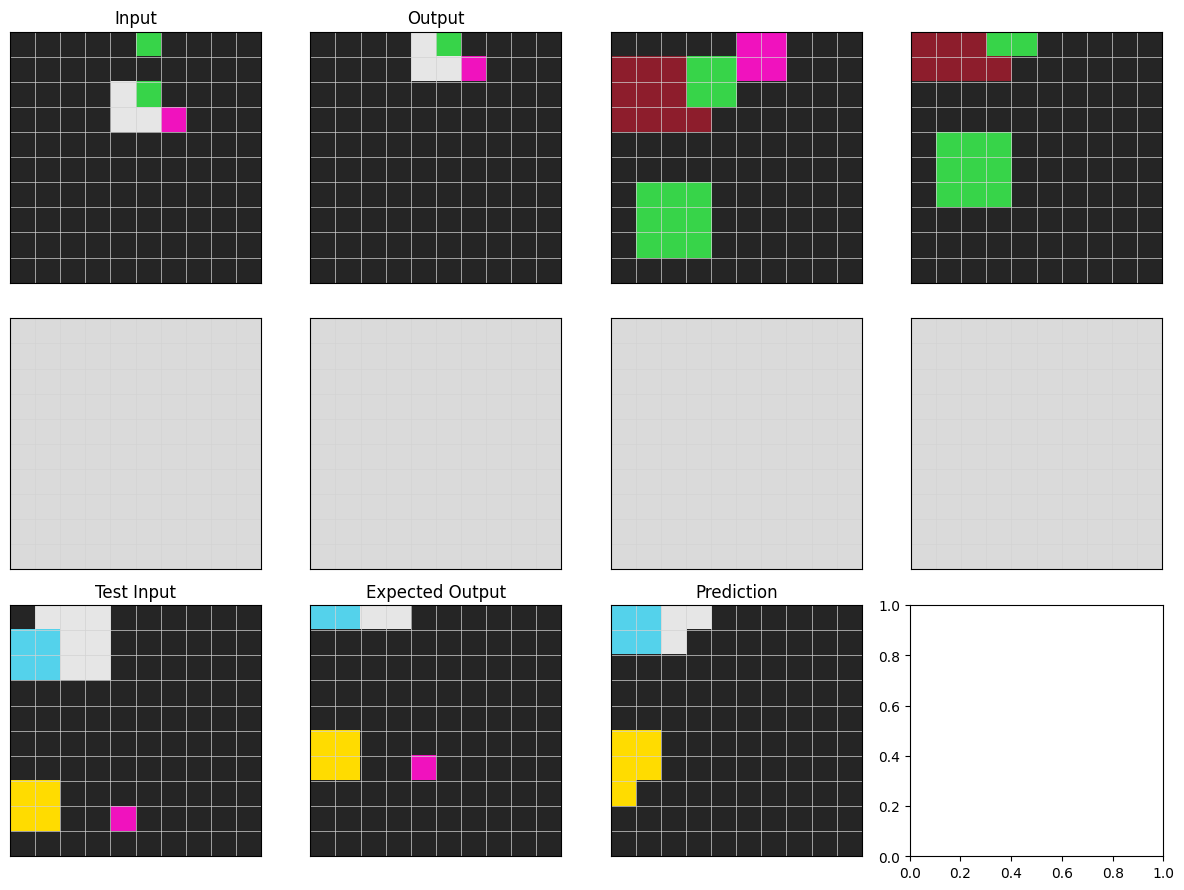

torch.Size([1, 10, 10])


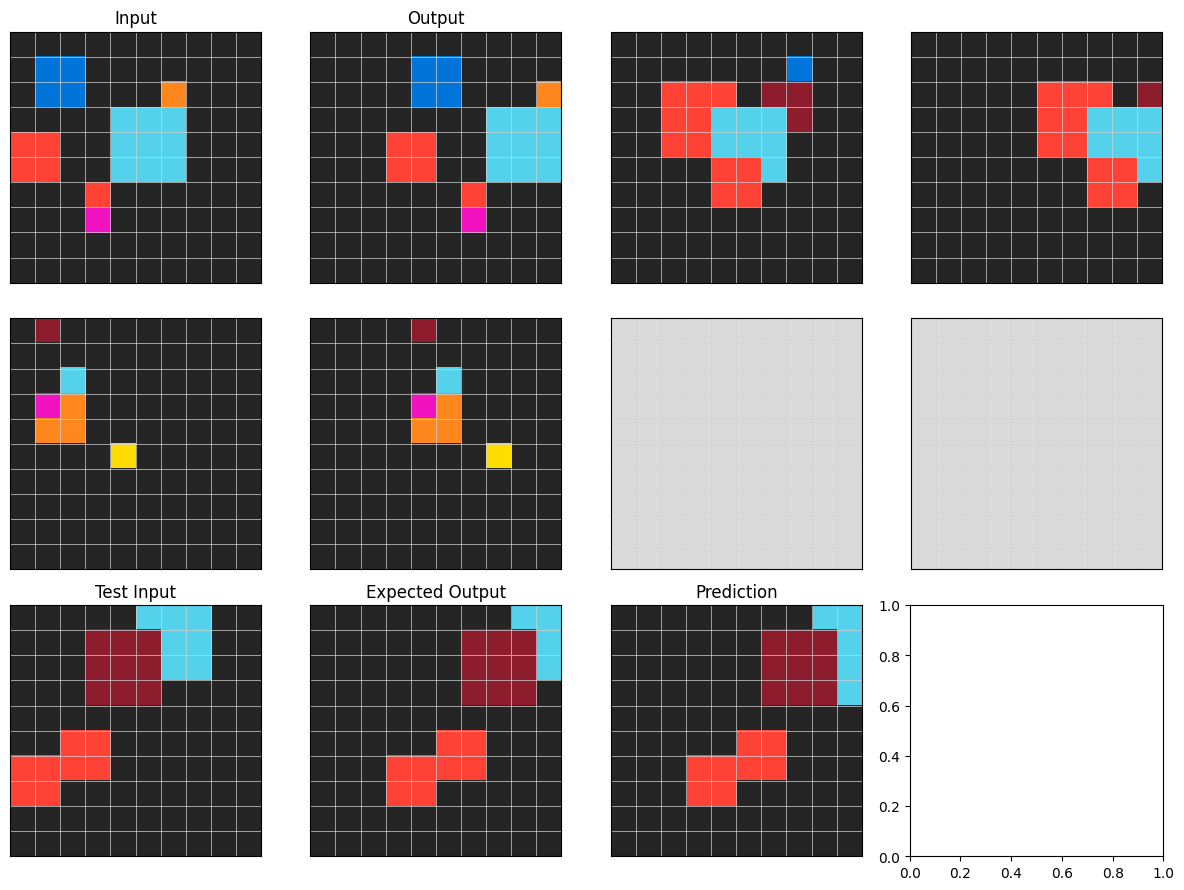

torch.Size([1, 10, 10])


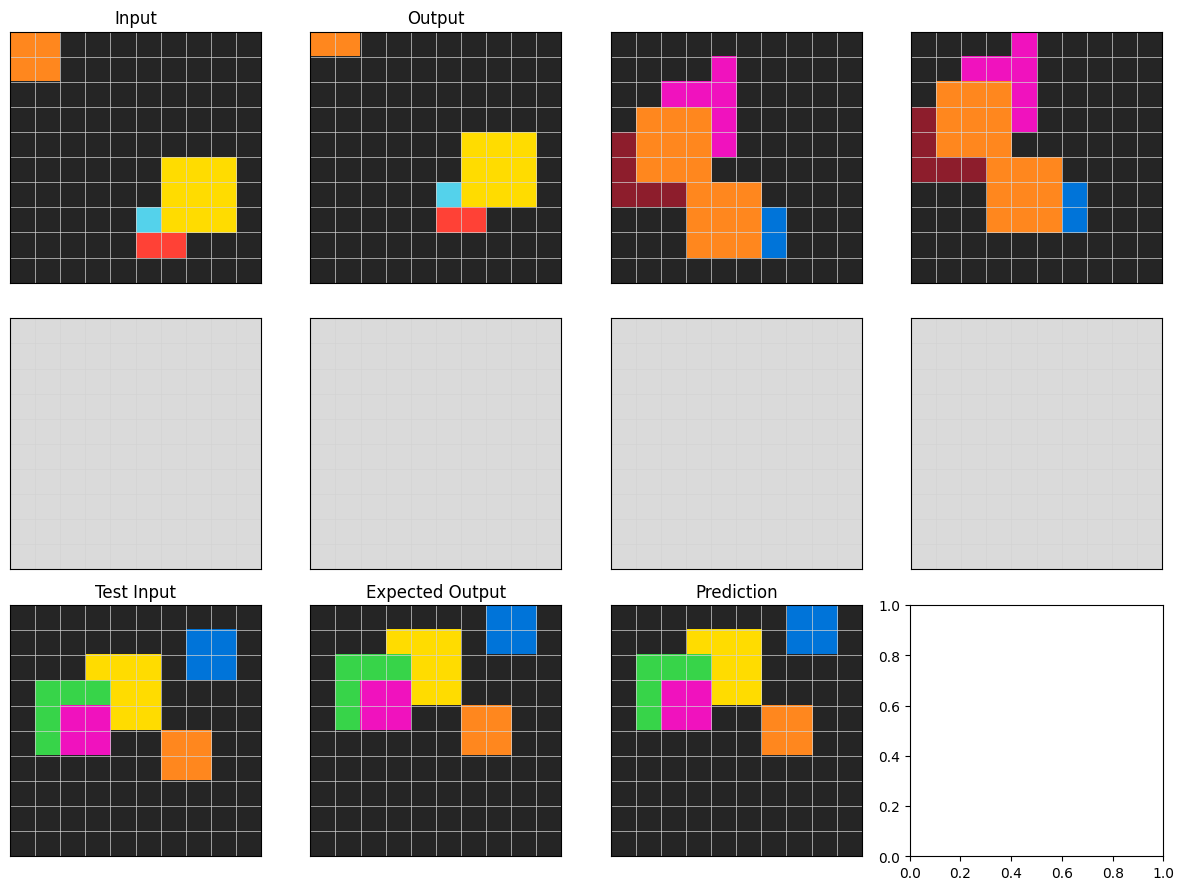

torch.Size([1, 10, 10])


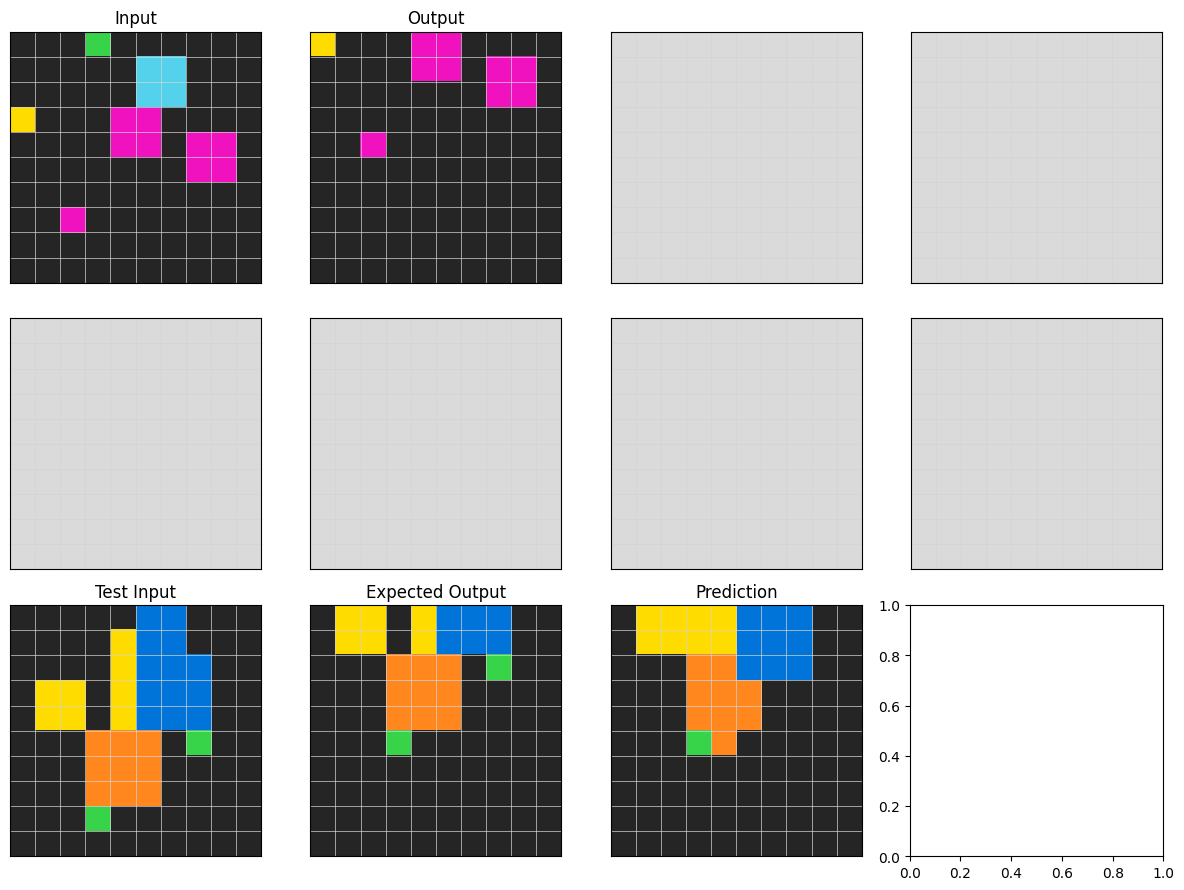

torch.Size([1, 10, 10])


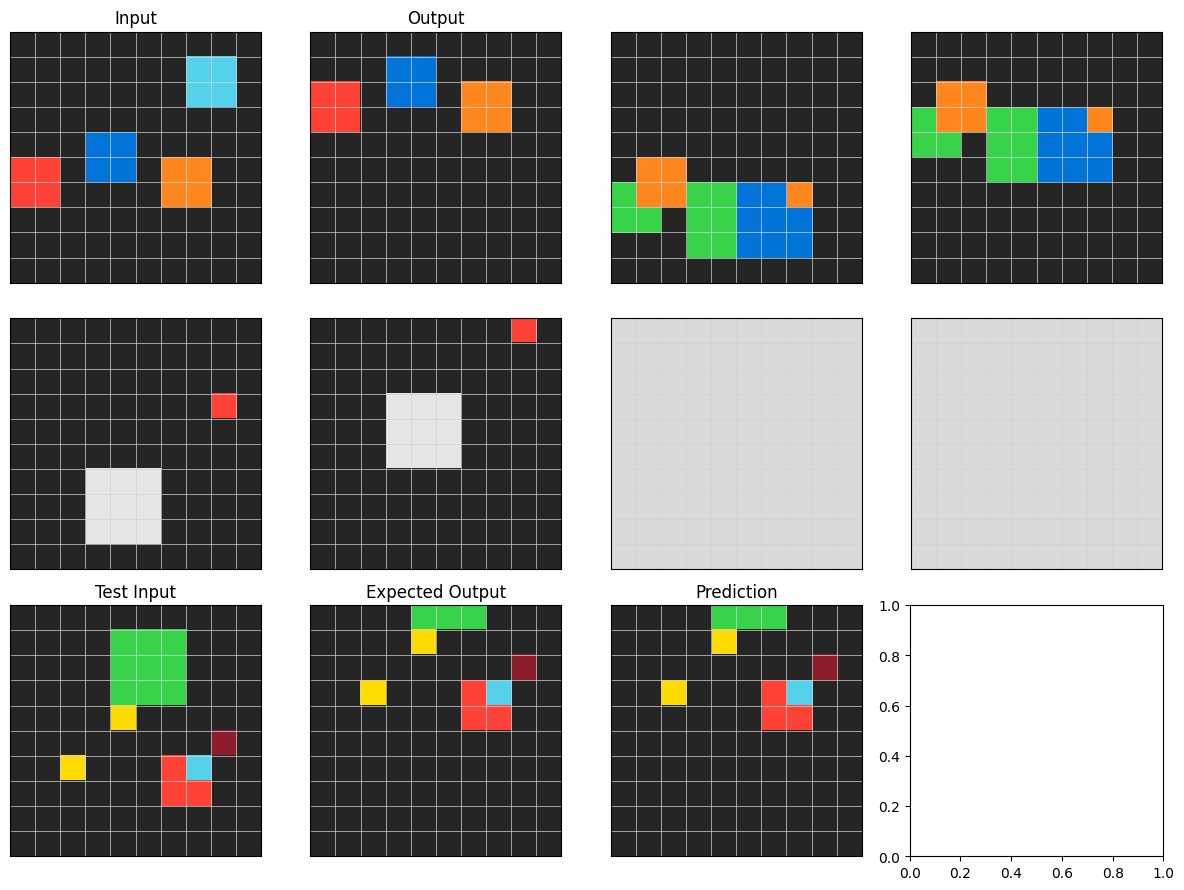

torch.Size([1, 10, 10])


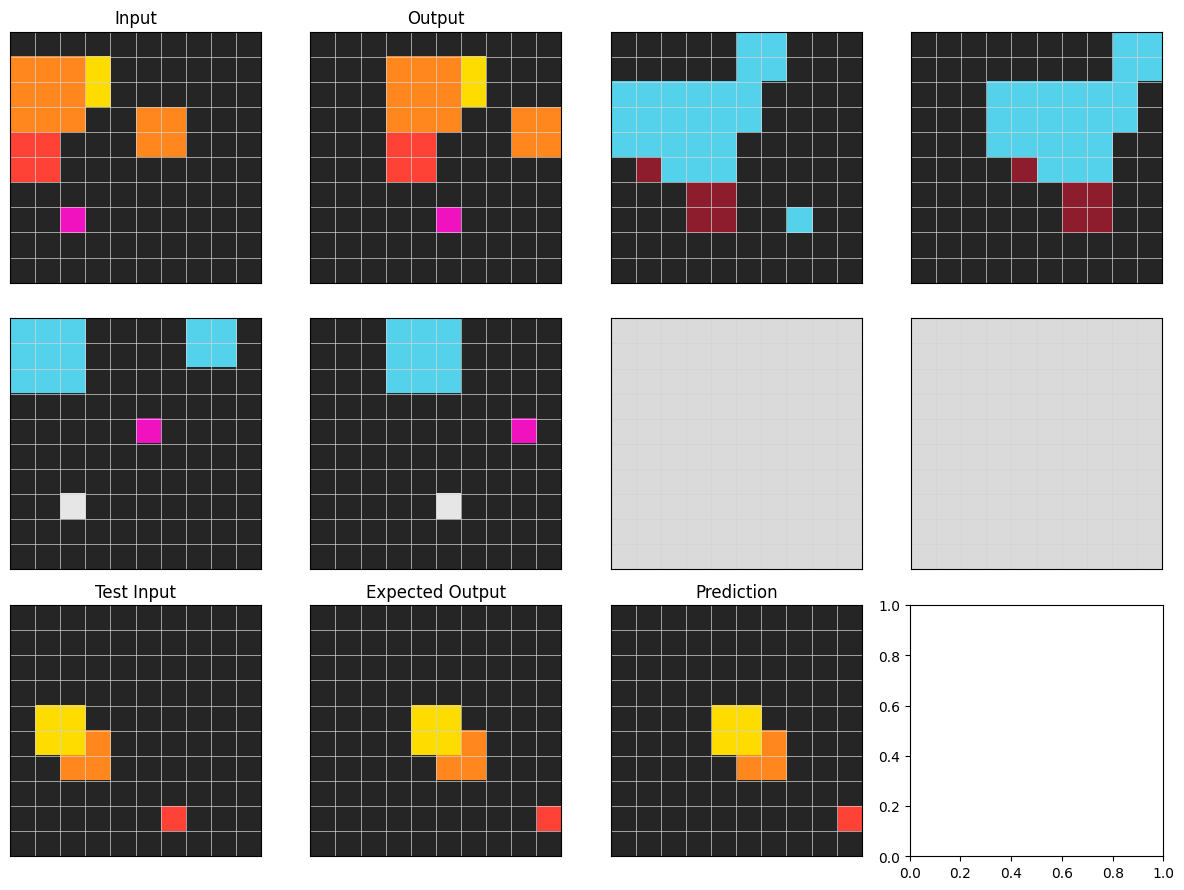

torch.Size([1, 10, 10])


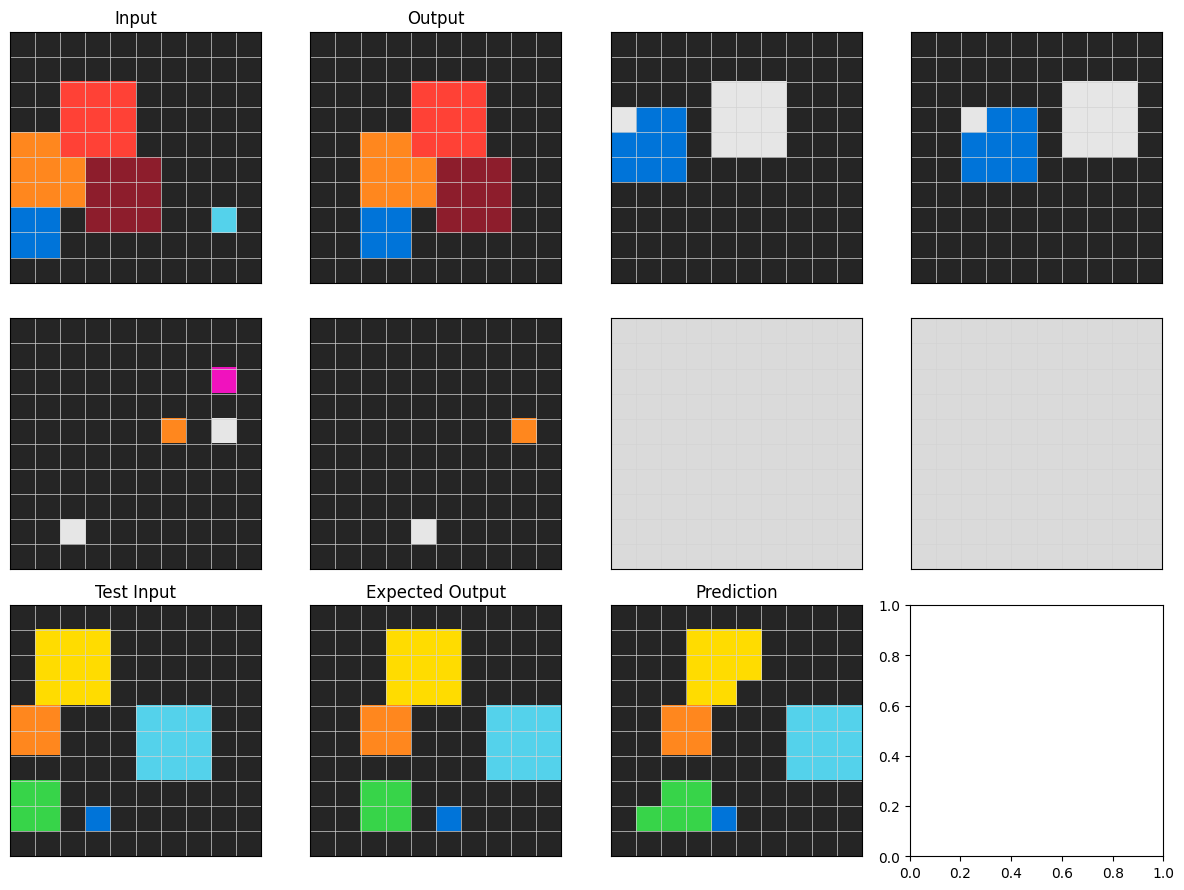

torch.Size([1, 10, 10])


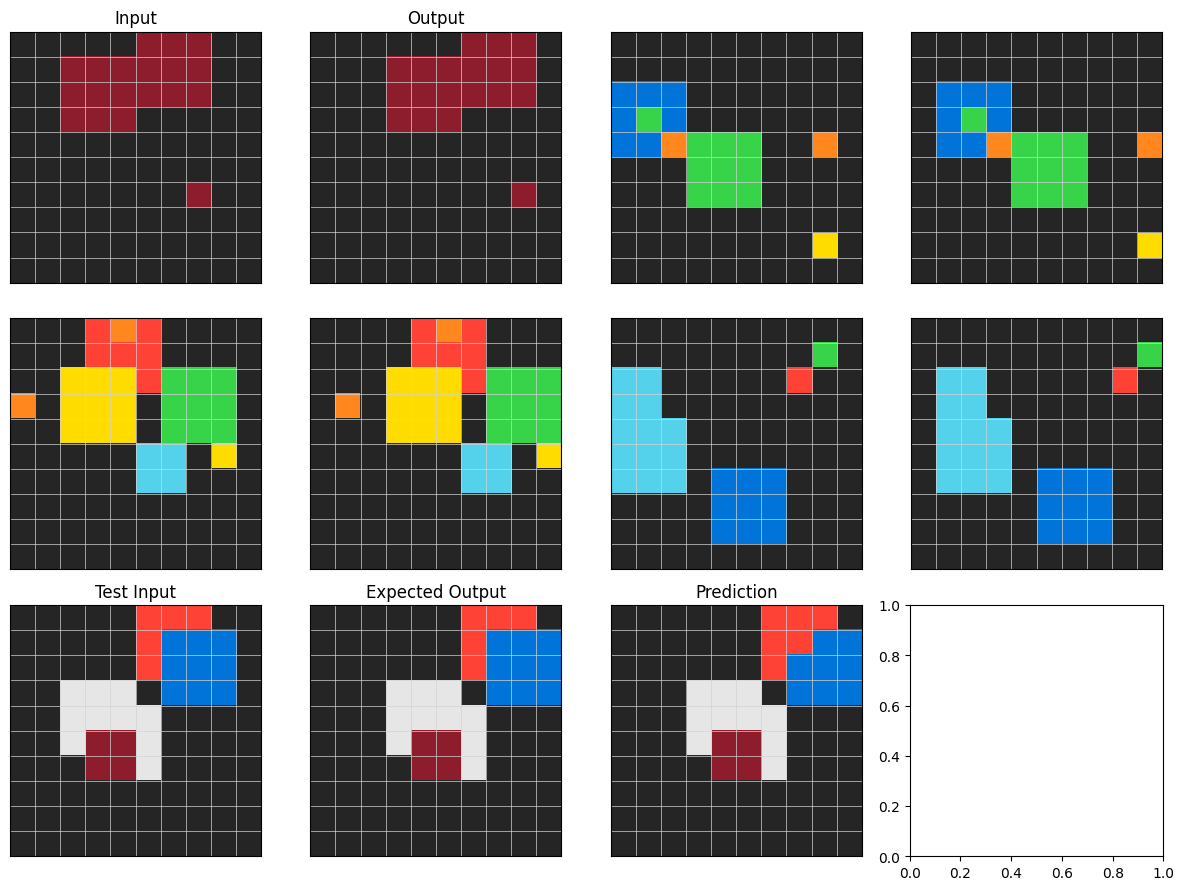

torch.Size([1, 10, 10])


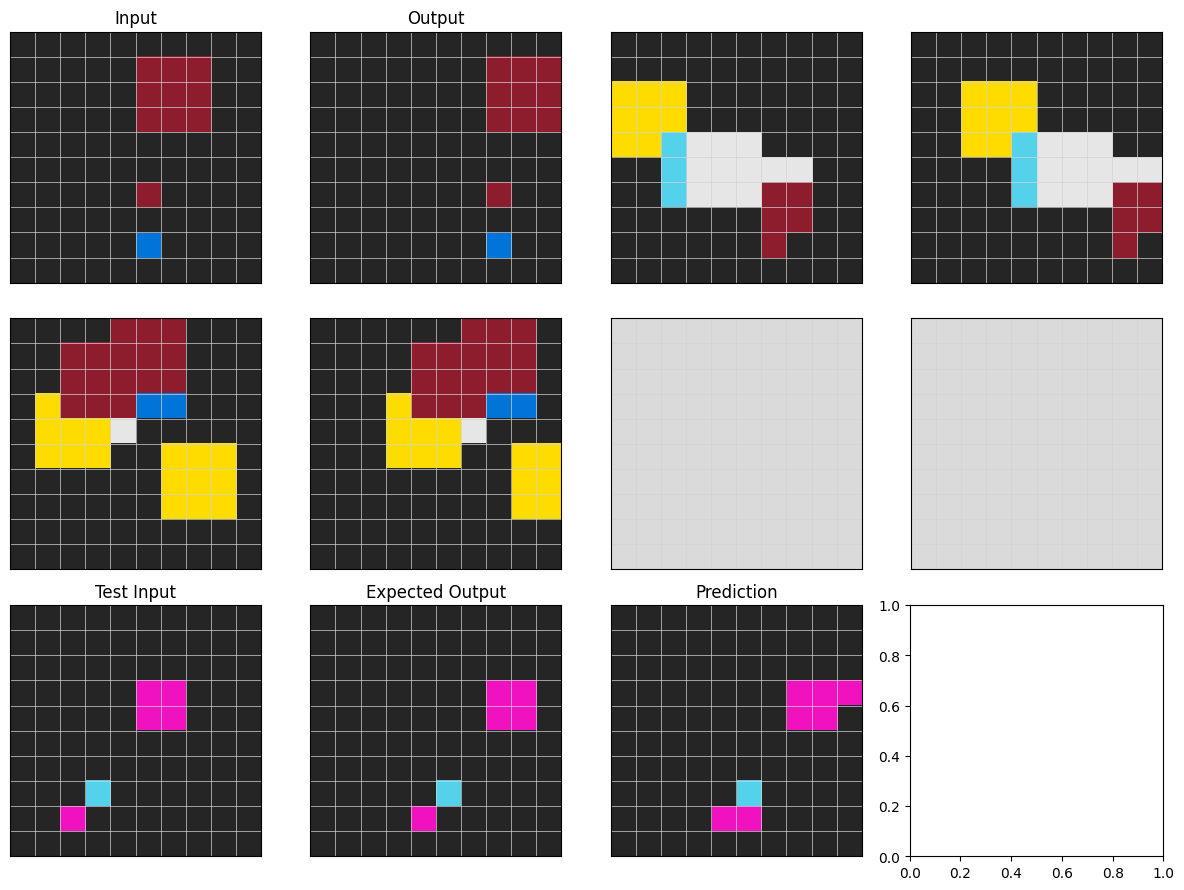

torch.Size([1, 10, 10])


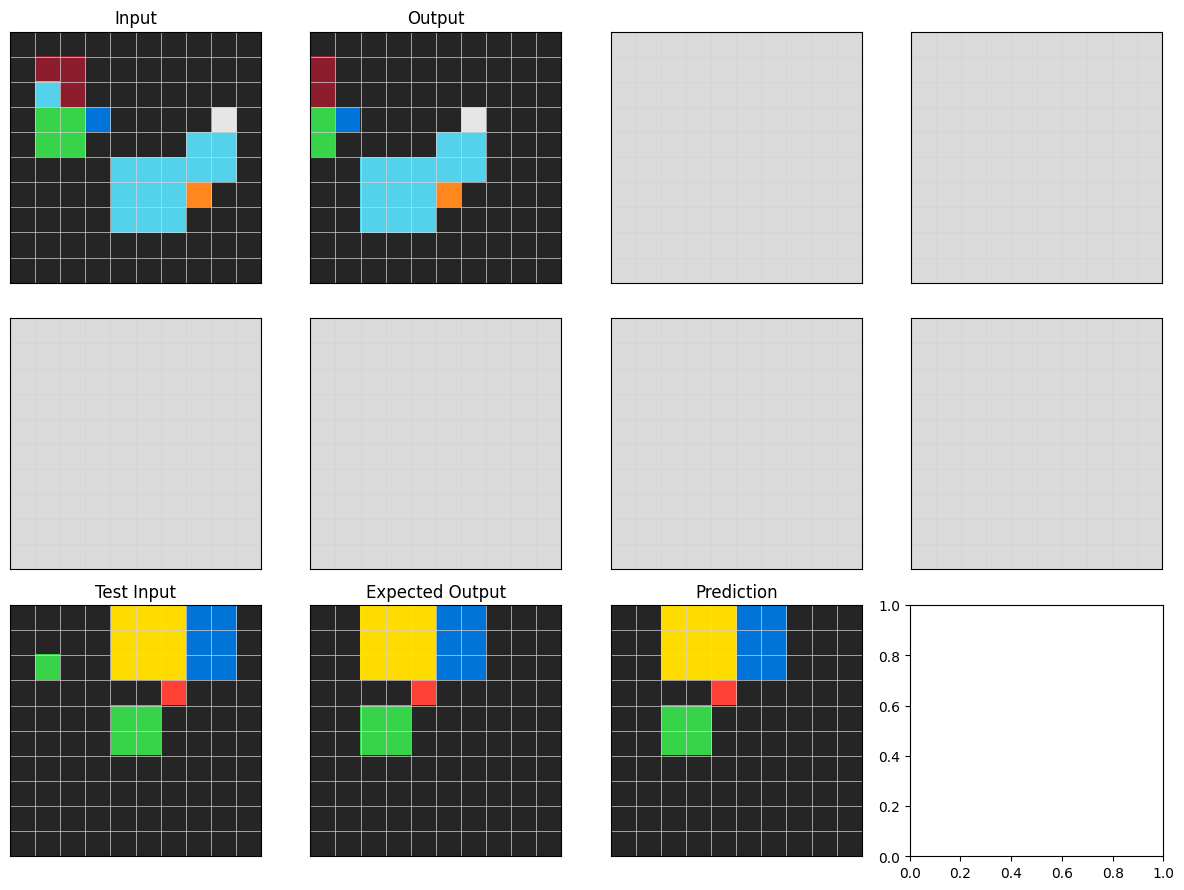

torch.Size([1, 10, 10])


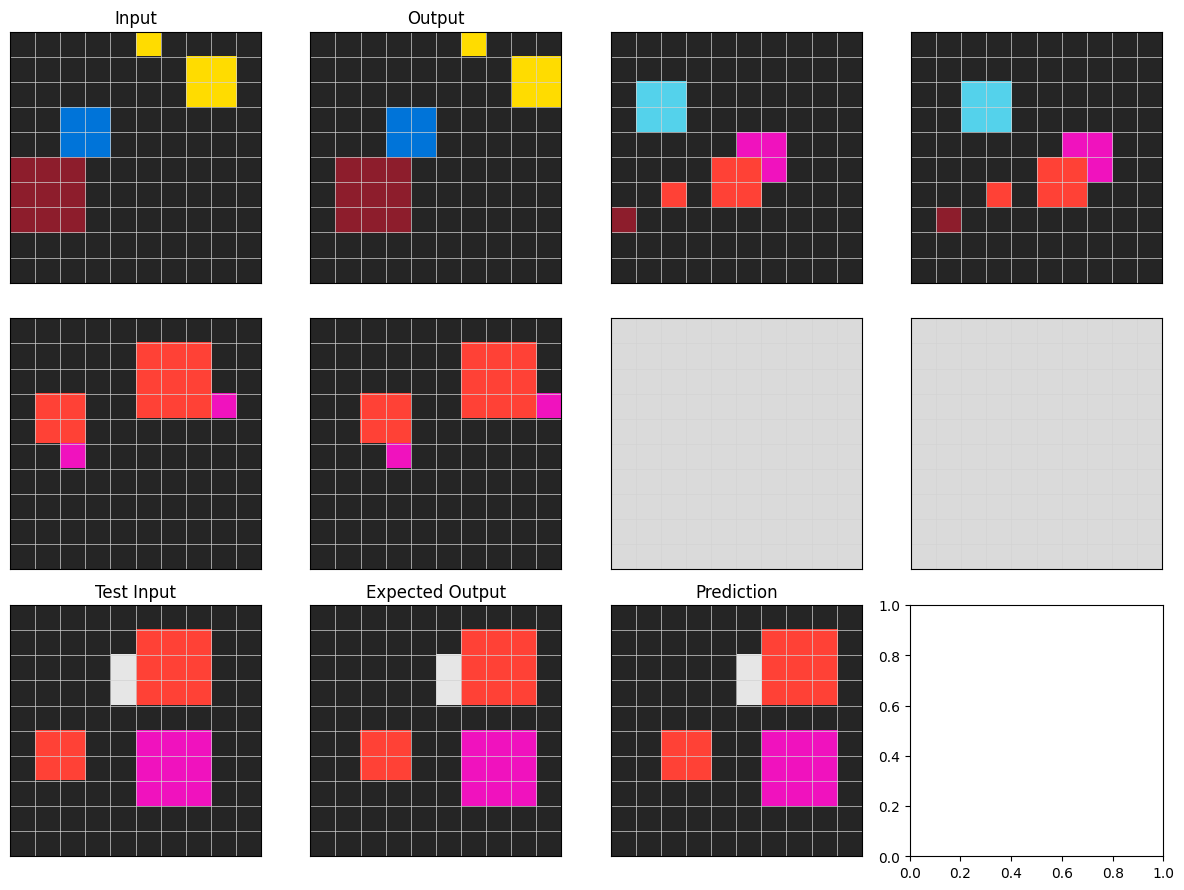

torch.Size([1, 10, 10])


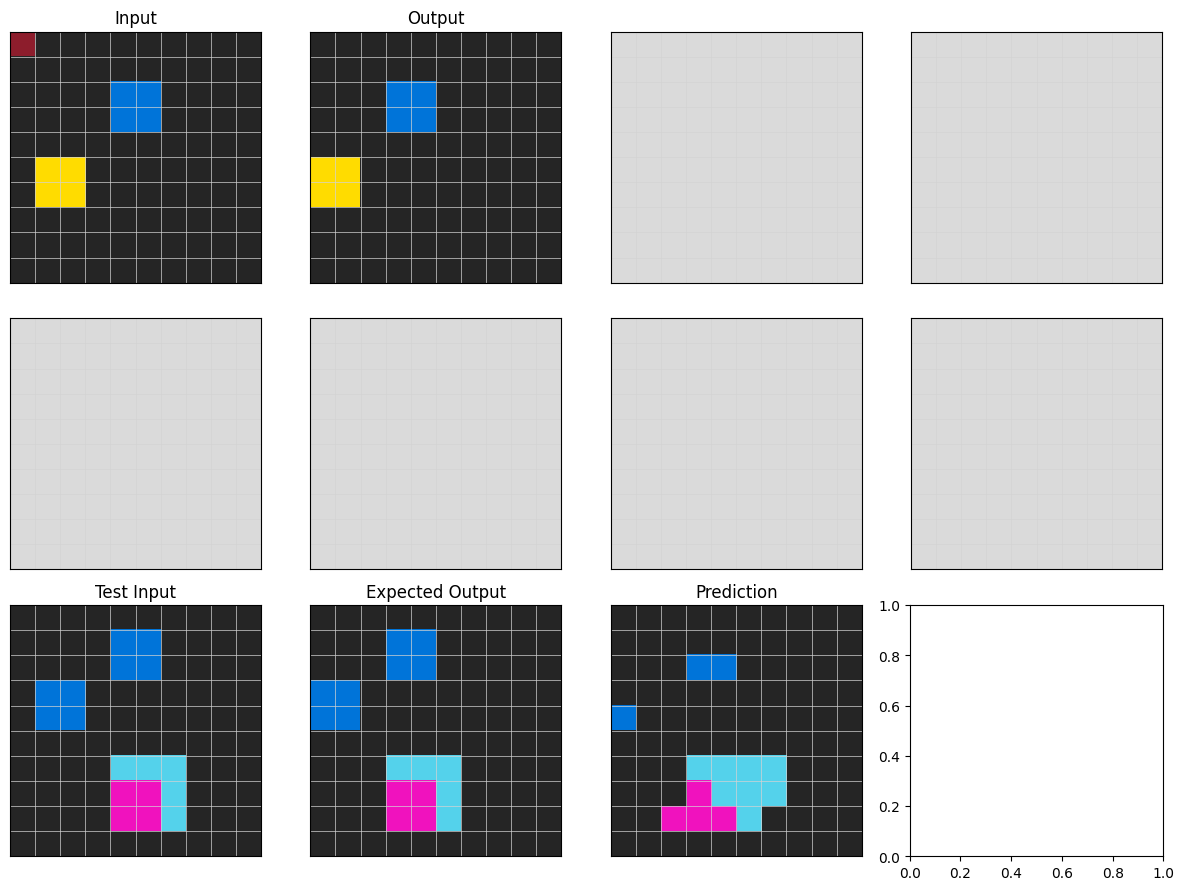

torch.Size([1, 10, 10])


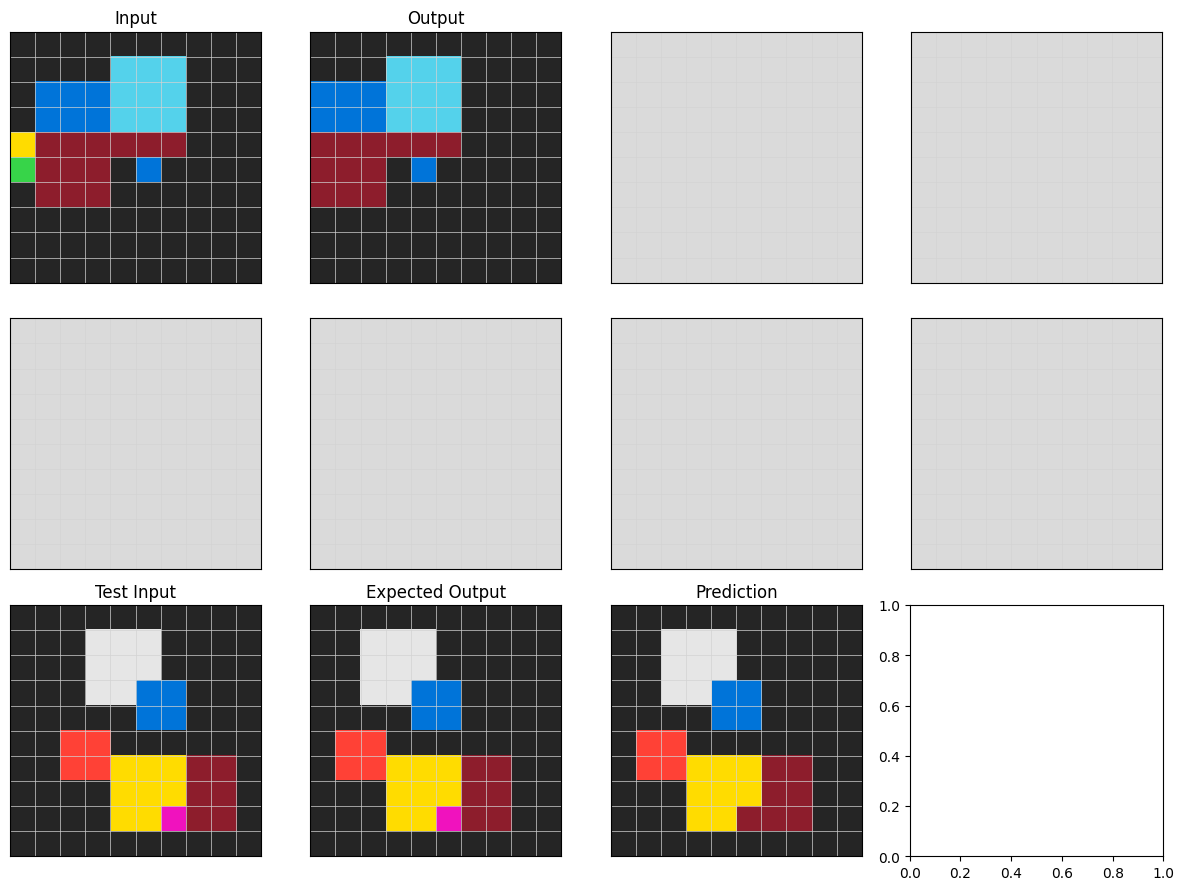

torch.Size([1, 10, 10])


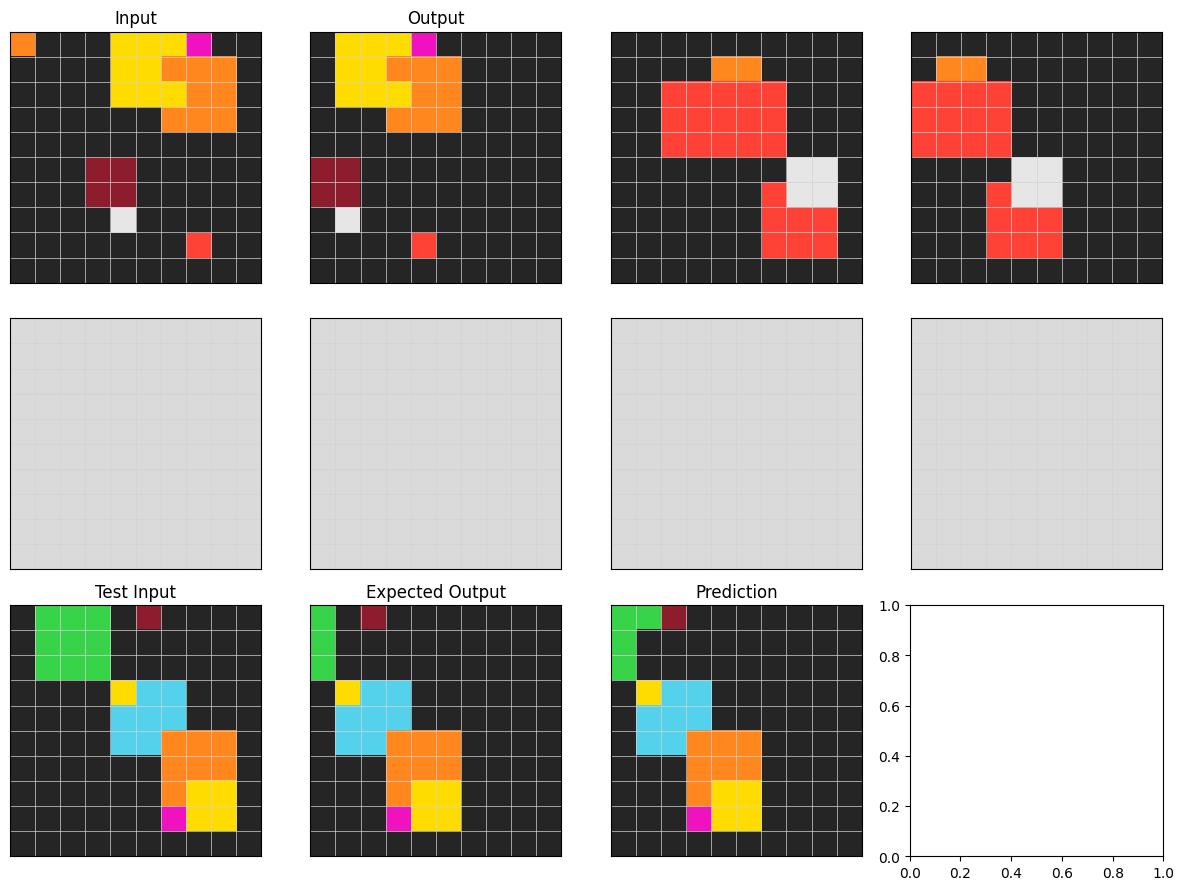

torch.Size([1, 10, 10])


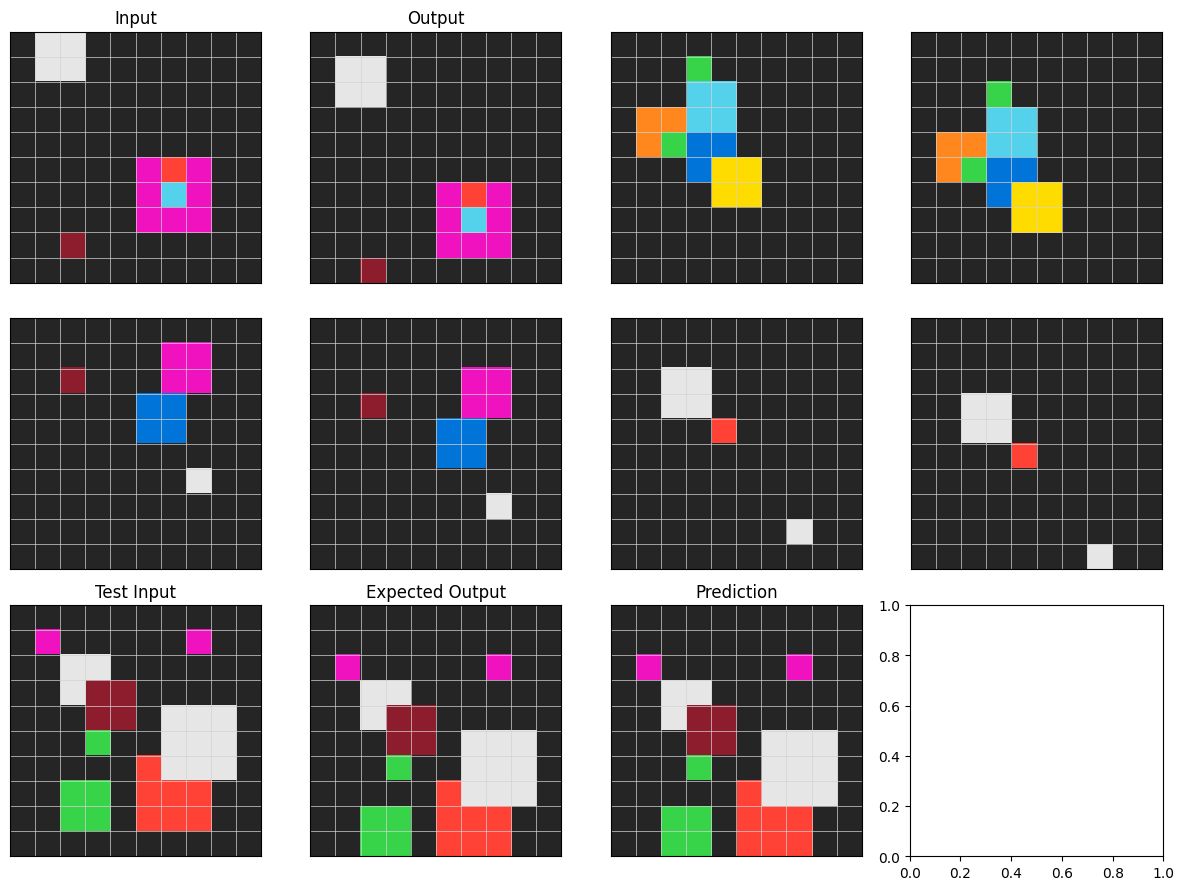

torch.Size([1, 10, 10])


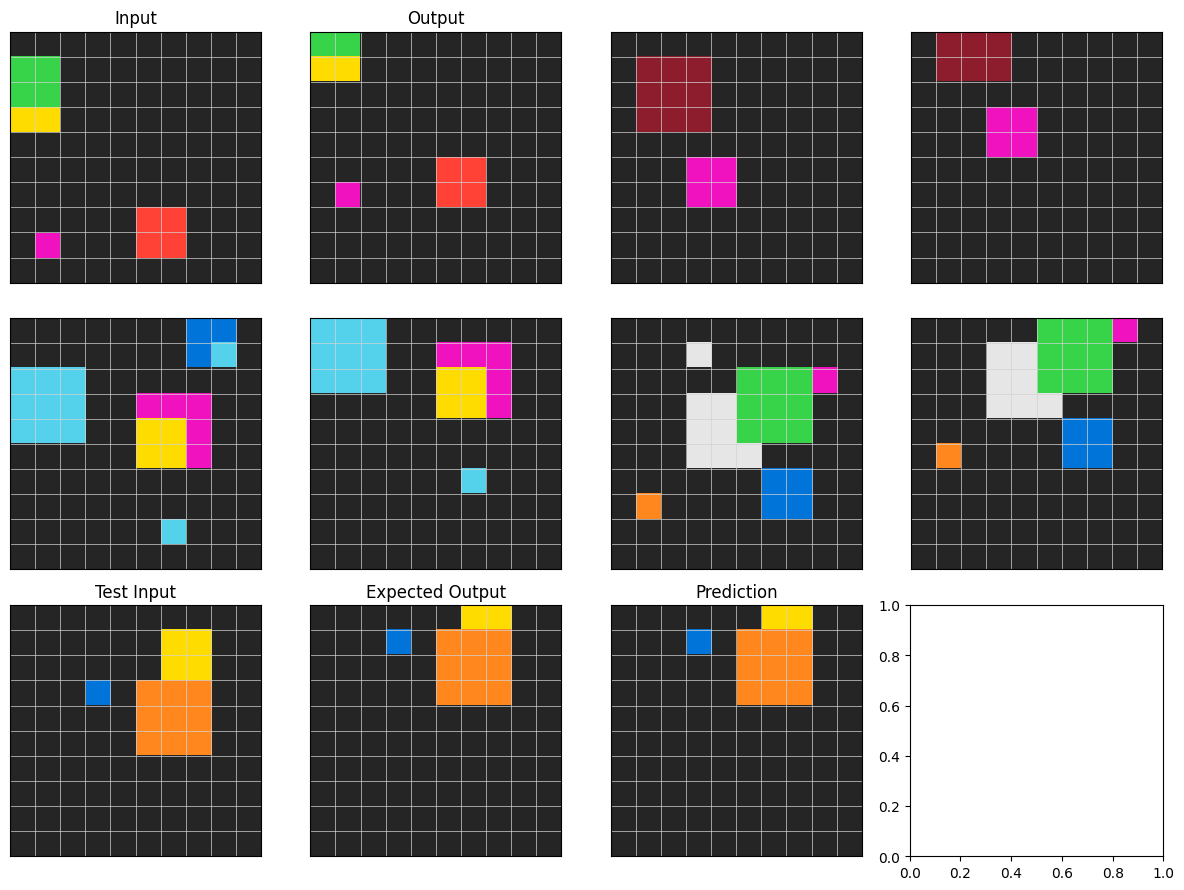

torch.Size([1, 10, 10])


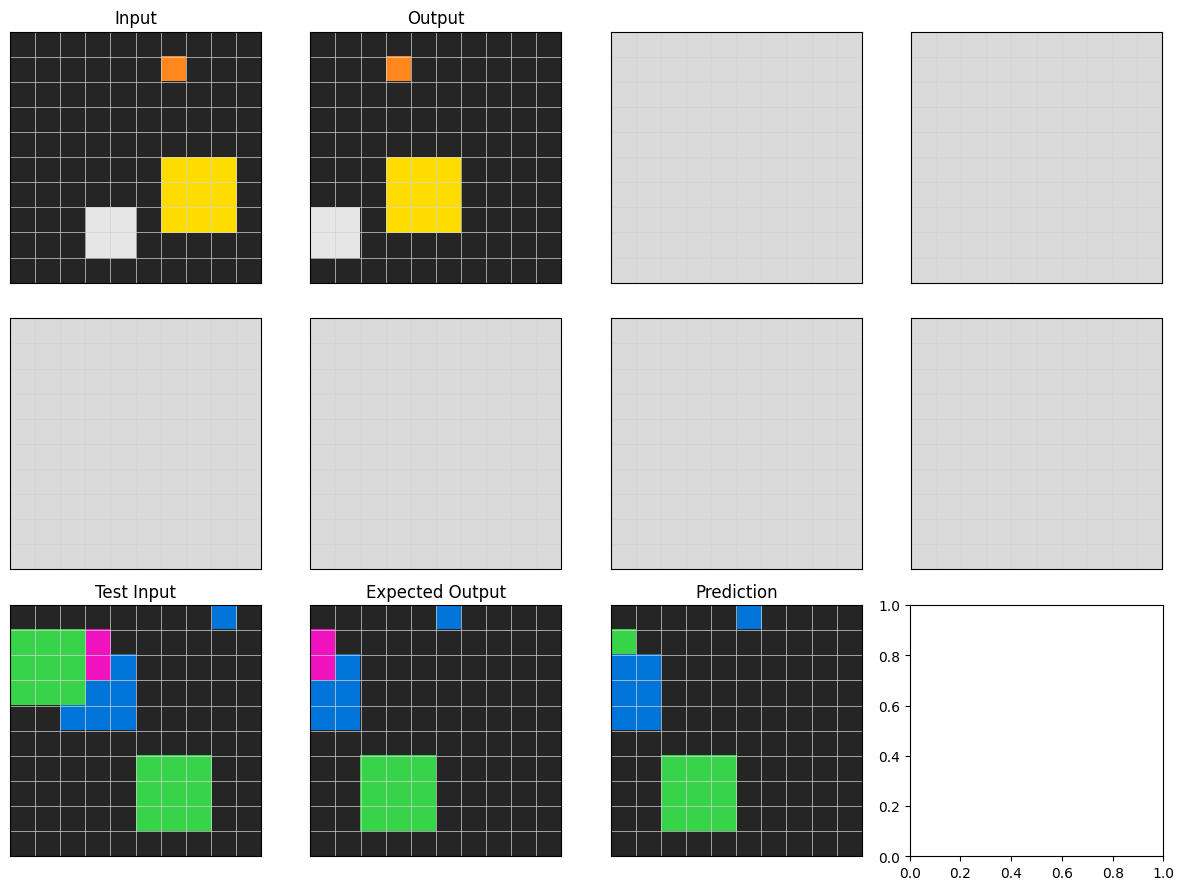

torch.Size([1, 10, 10])


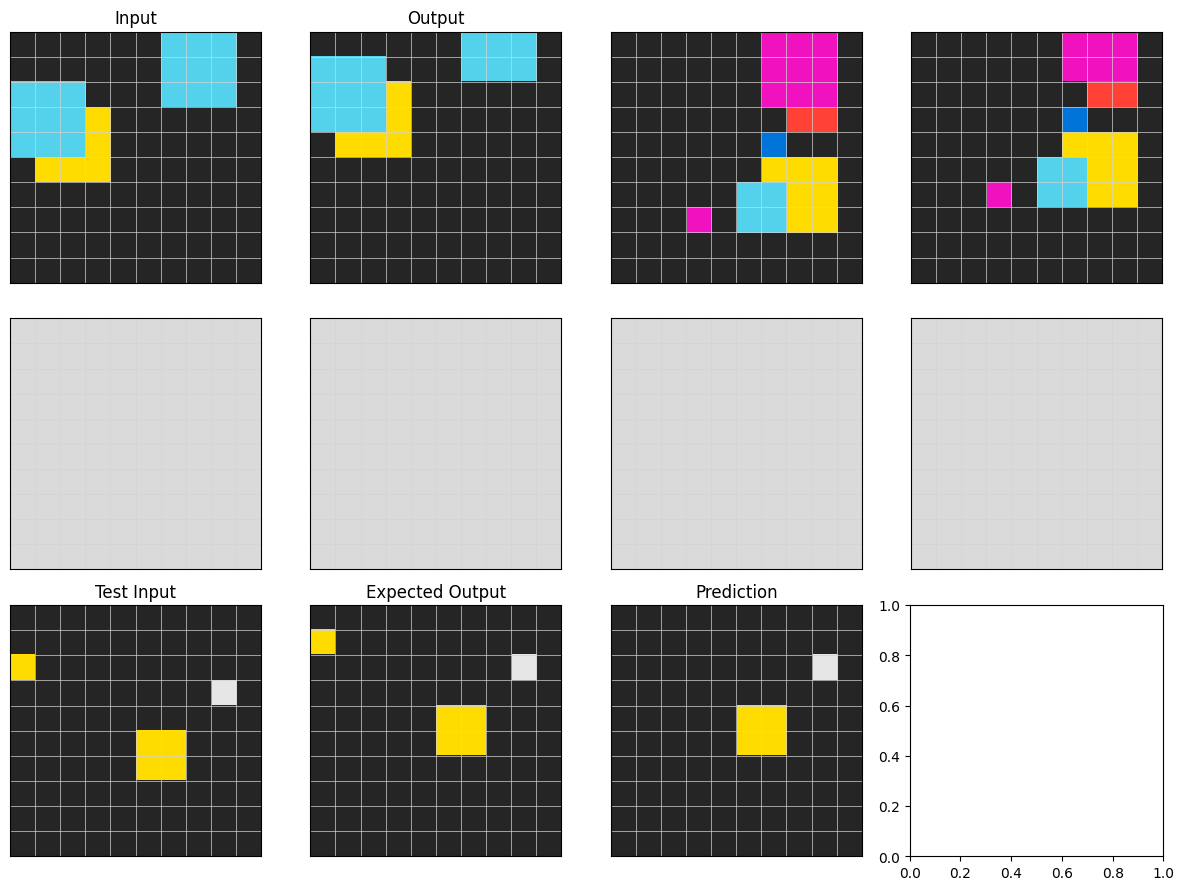

torch.Size([1, 10, 10])


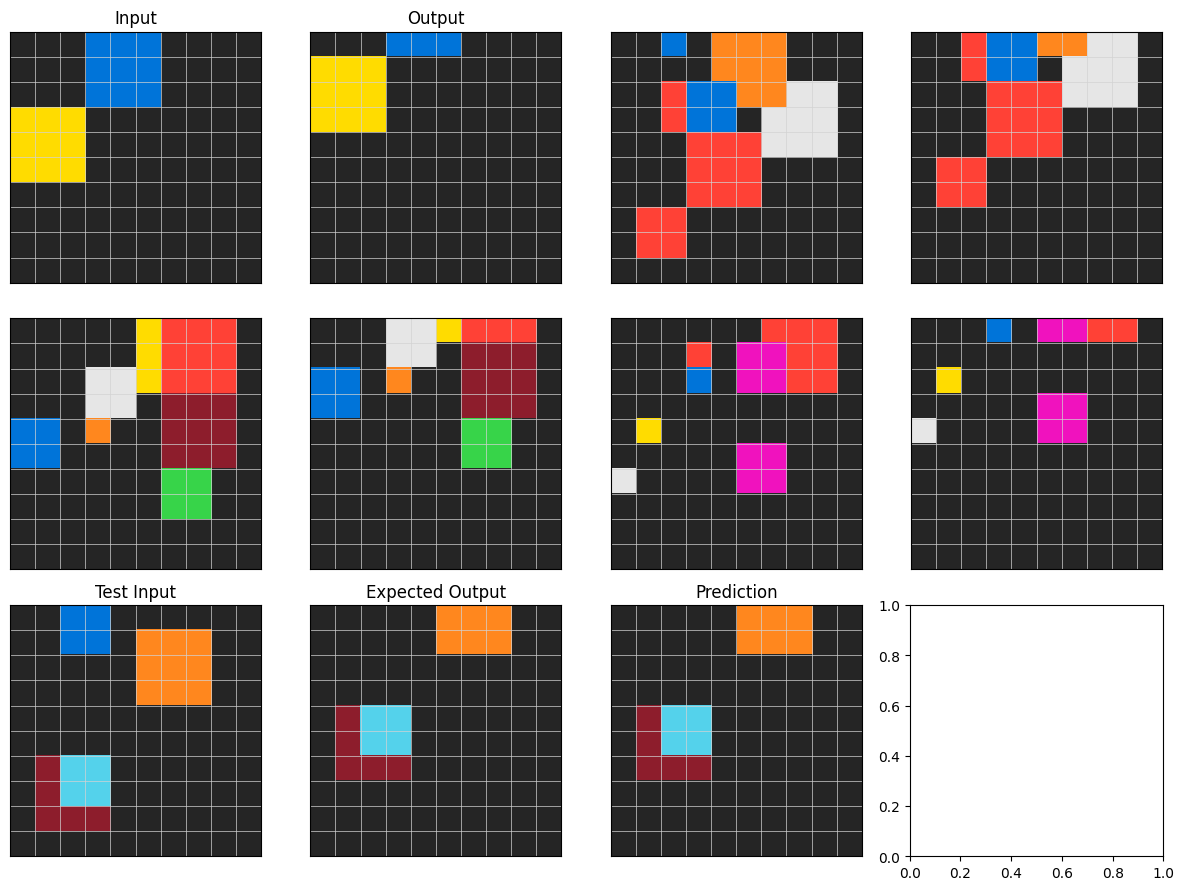

torch.Size([1, 10, 10])


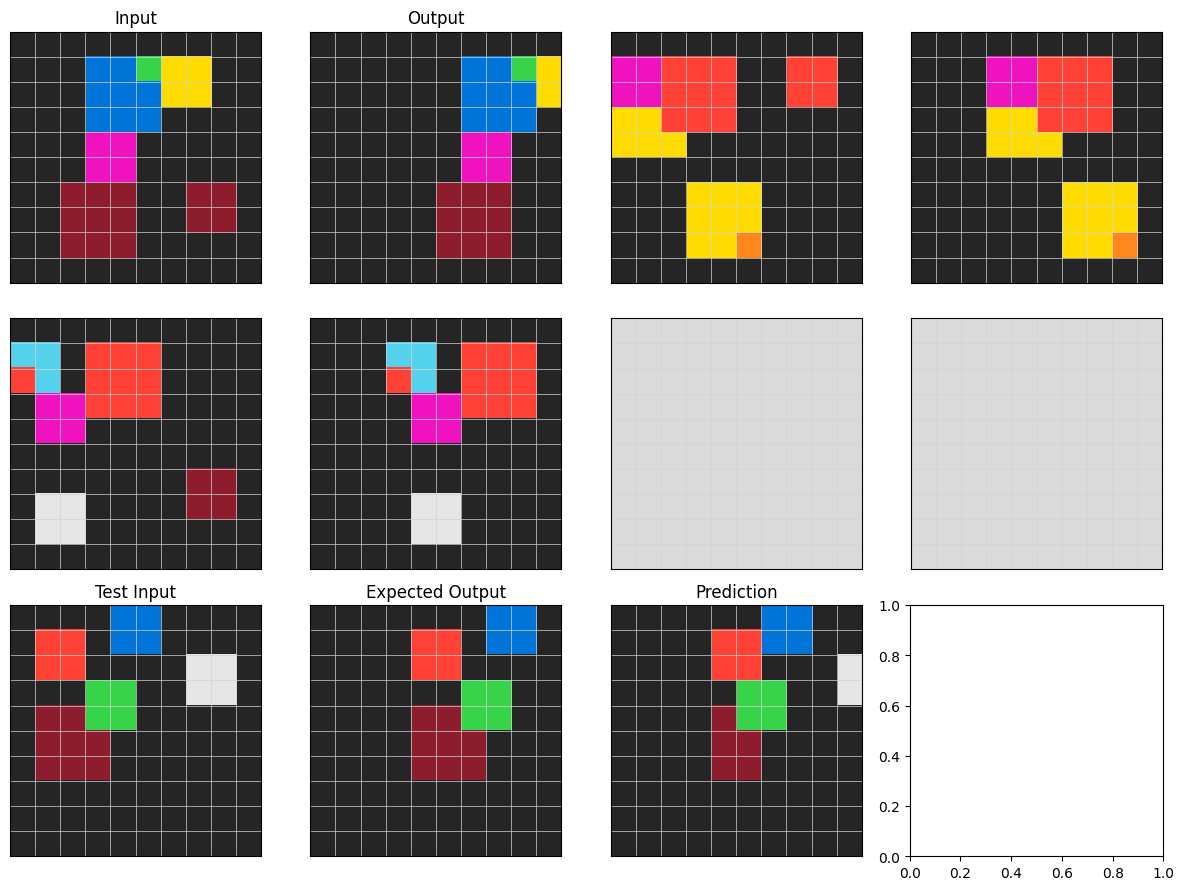

torch.Size([1, 10, 10])


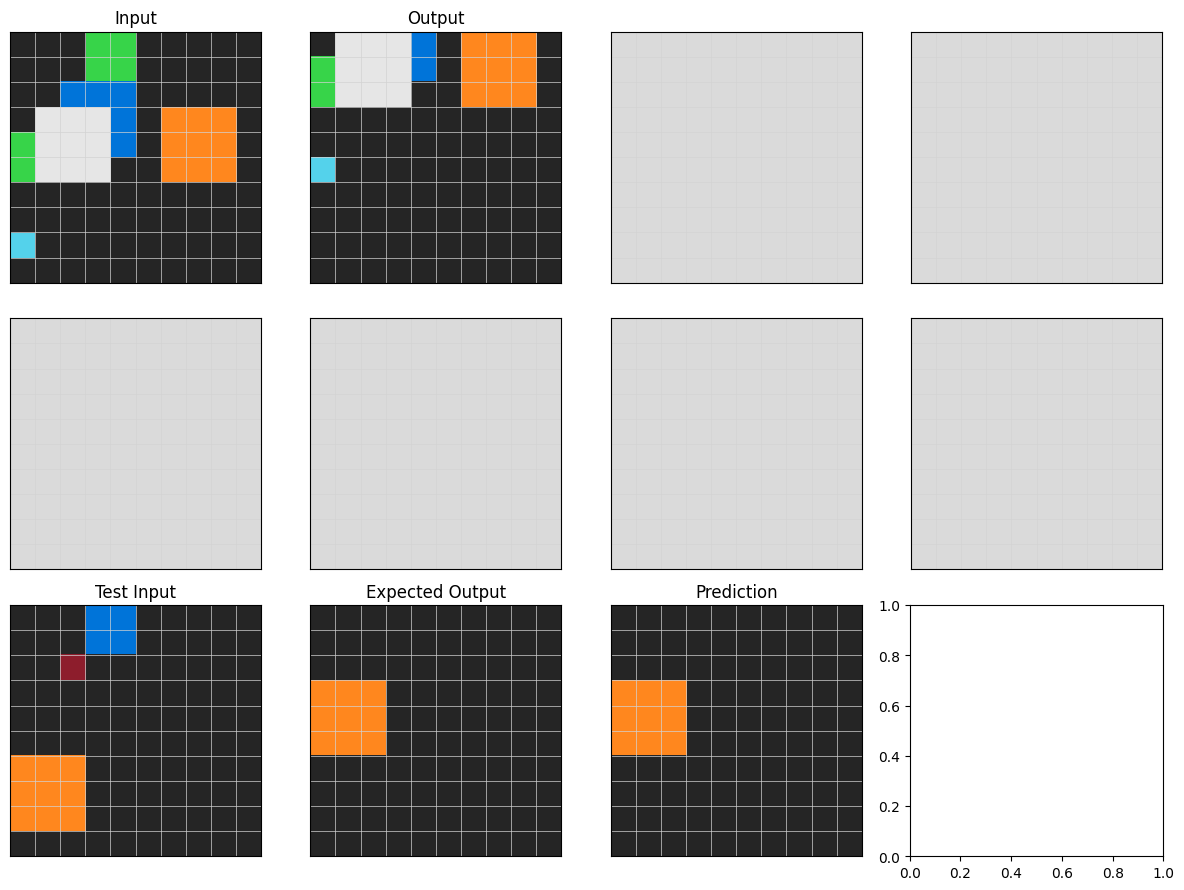

torch.Size([1, 10, 10])


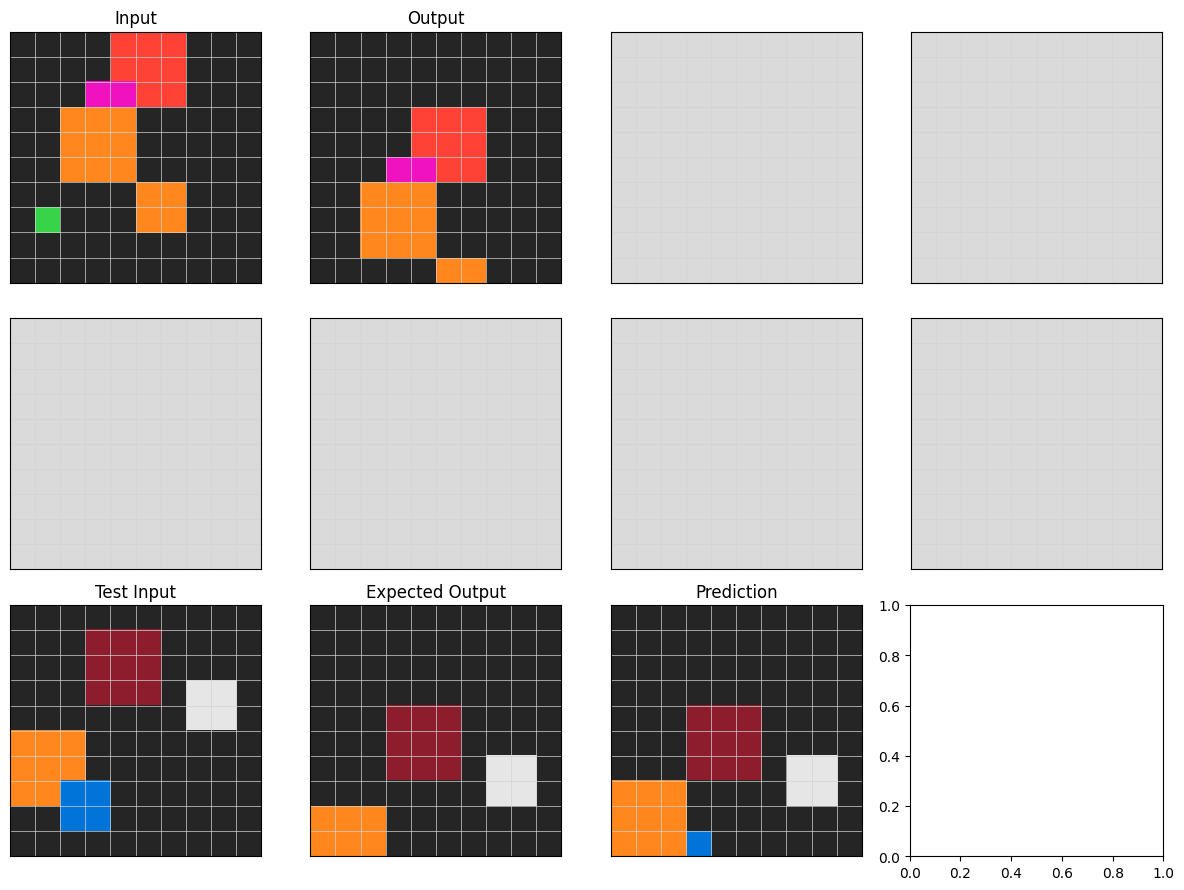

torch.Size([1, 10, 10])


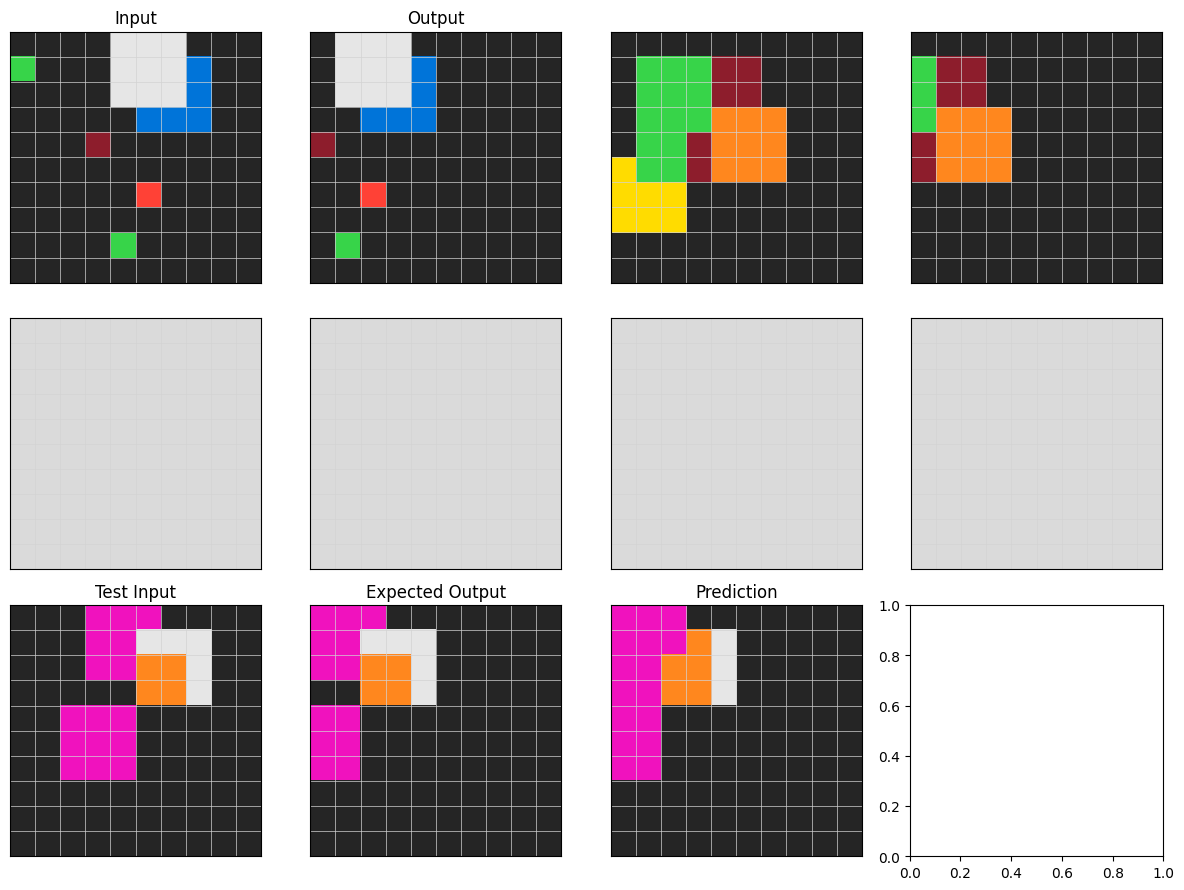

torch.Size([1, 10, 10])


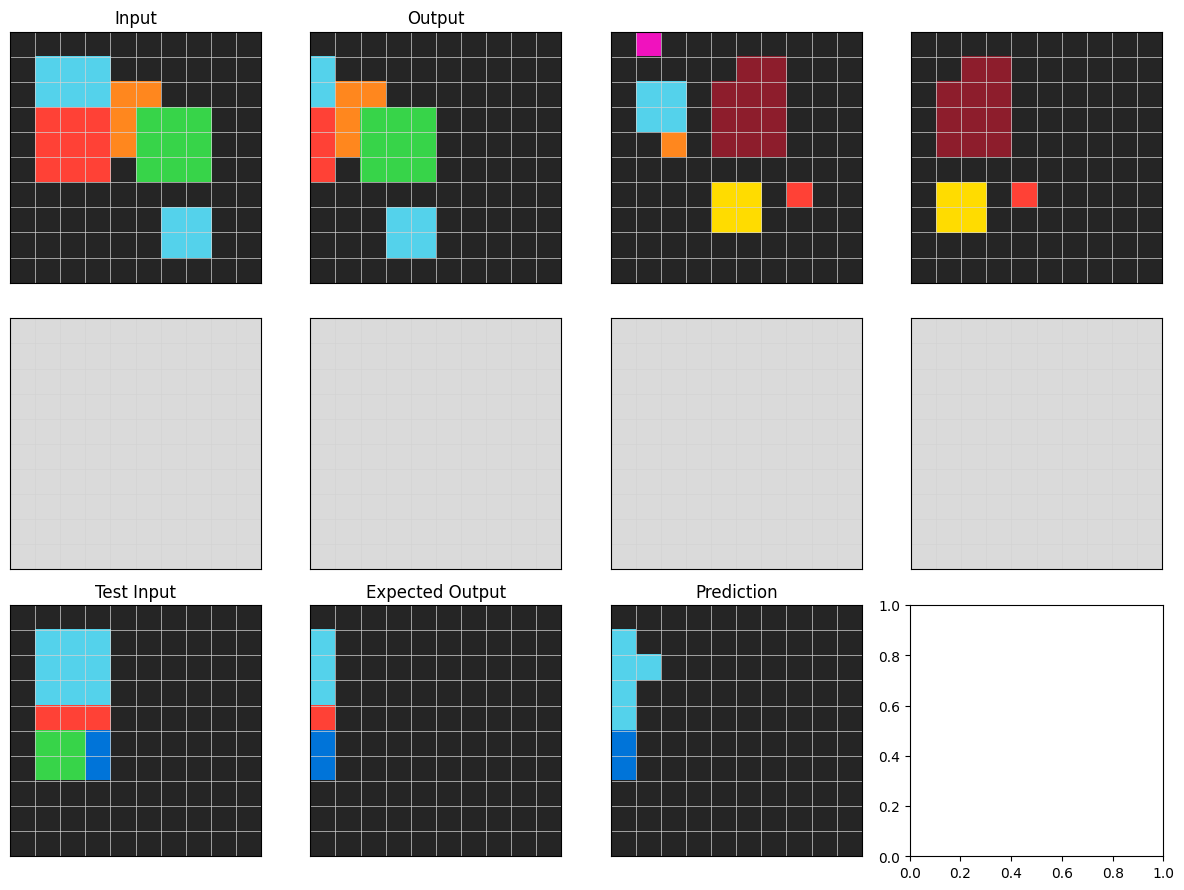

torch.Size([1, 10, 10])


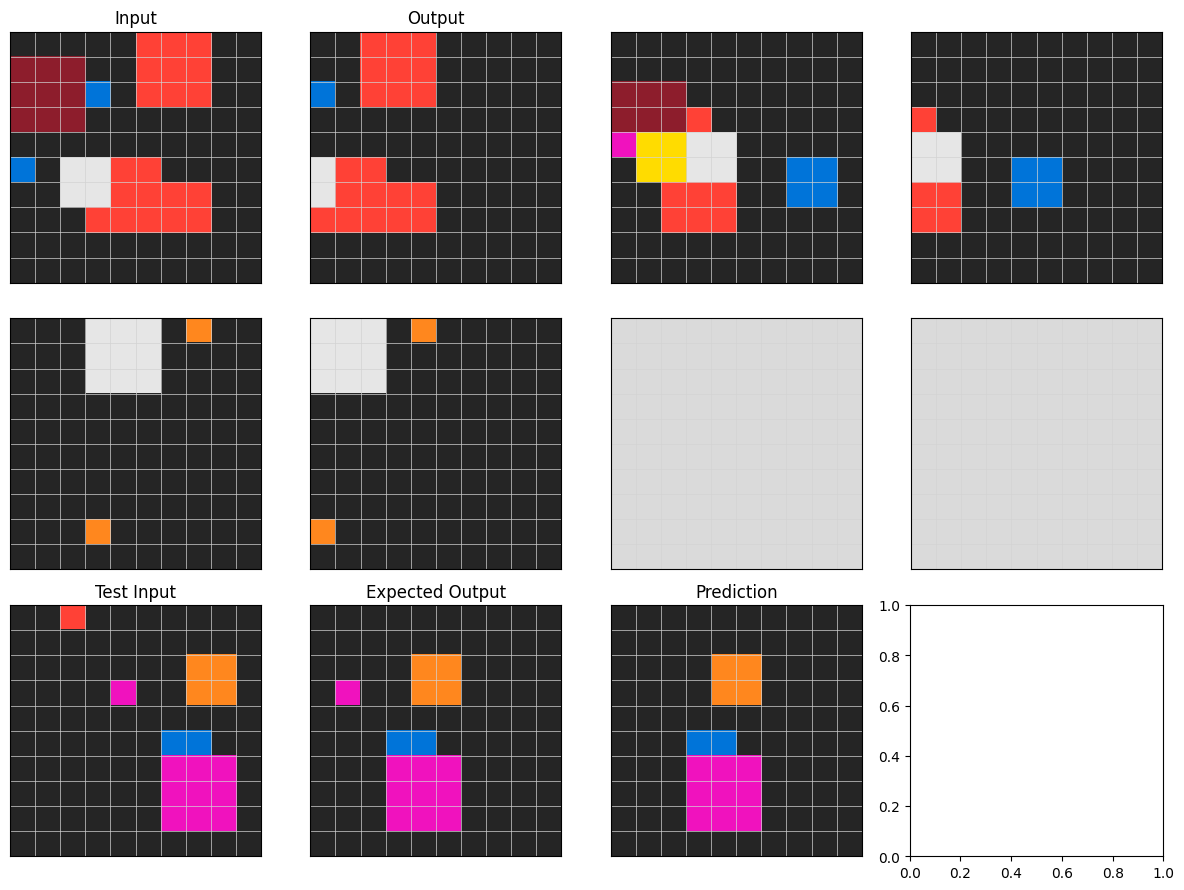

torch.Size([1, 10, 10])


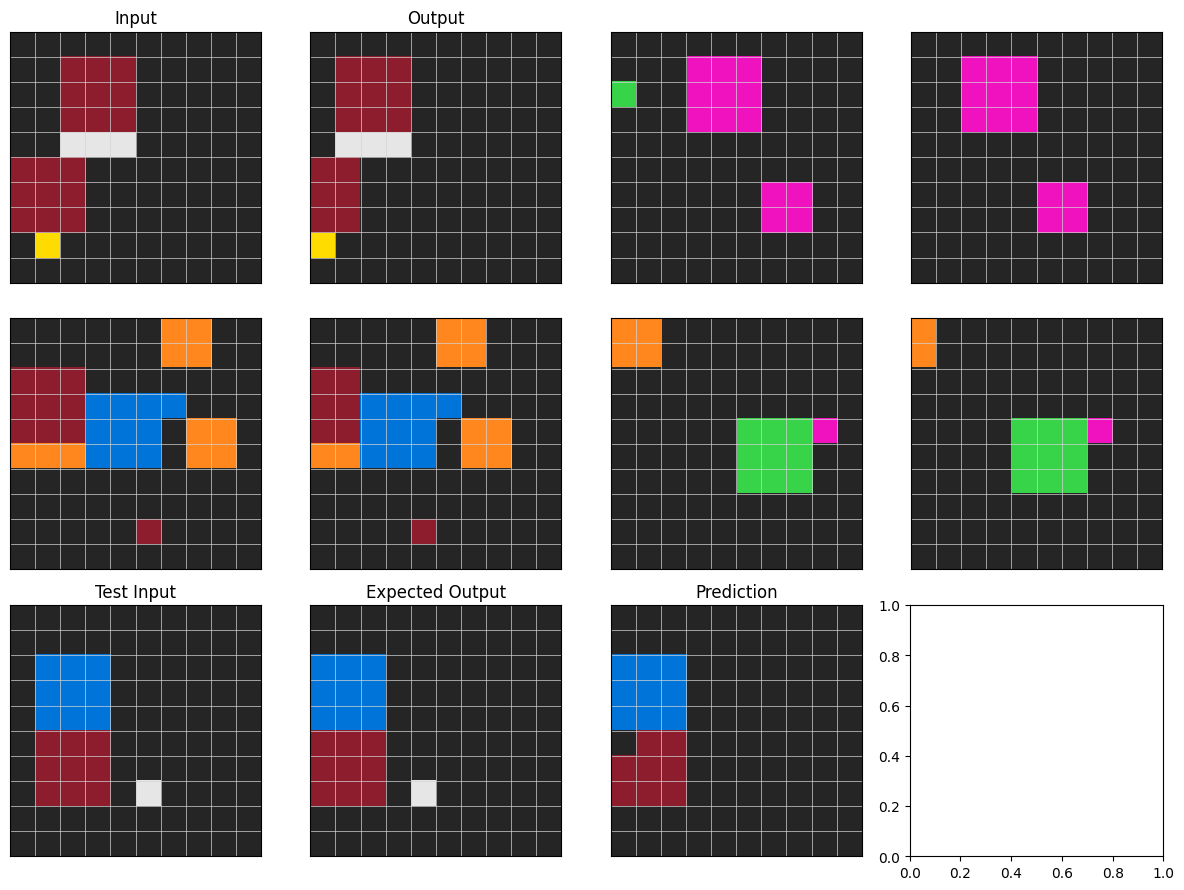

torch.Size([1, 10, 10])


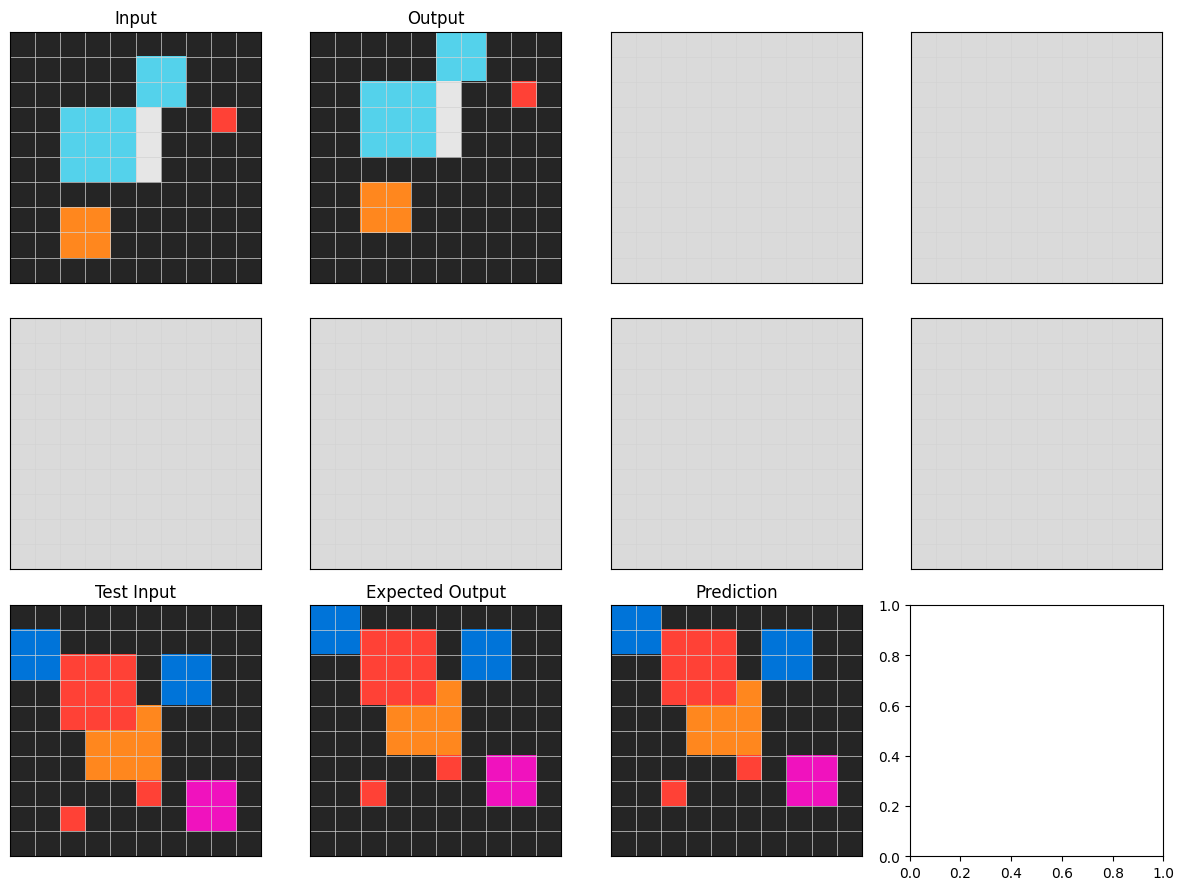

torch.Size([1, 10, 10])


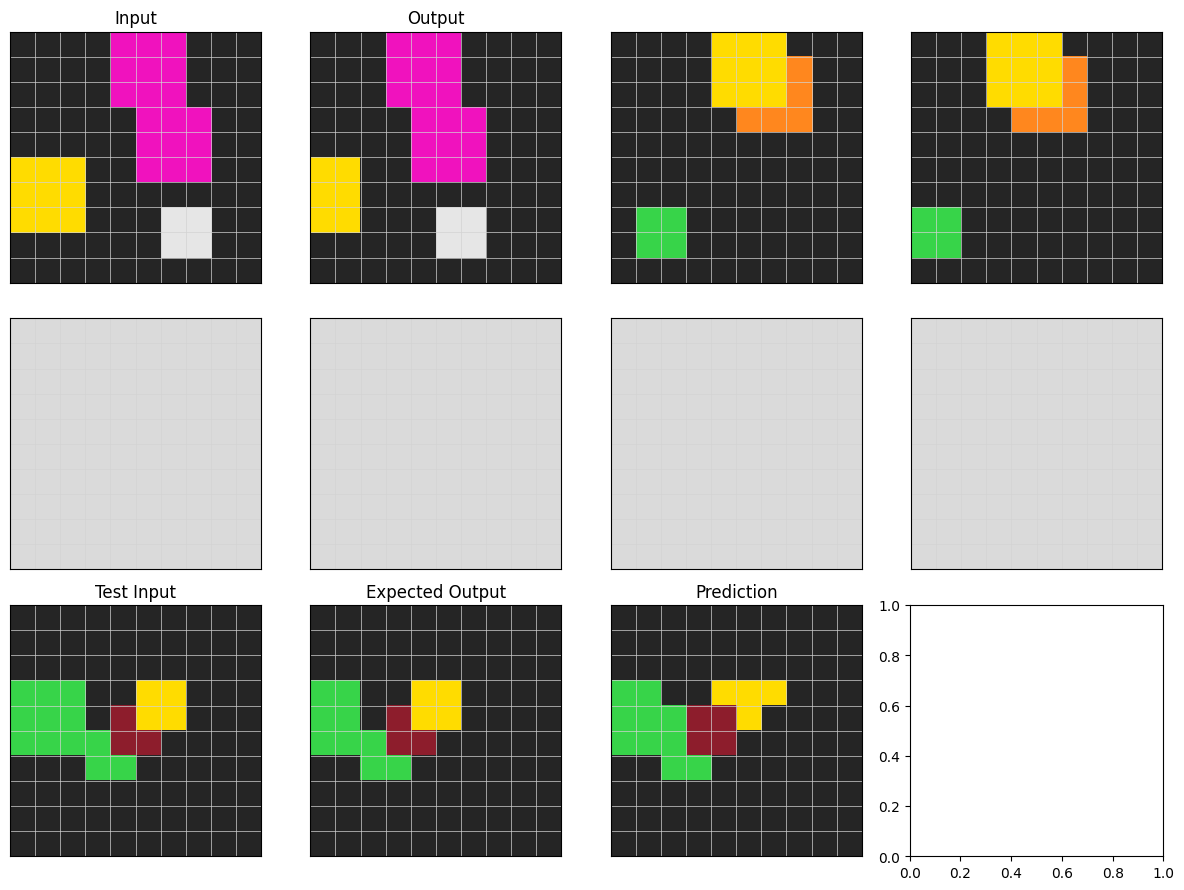

torch.Size([1, 10, 10])


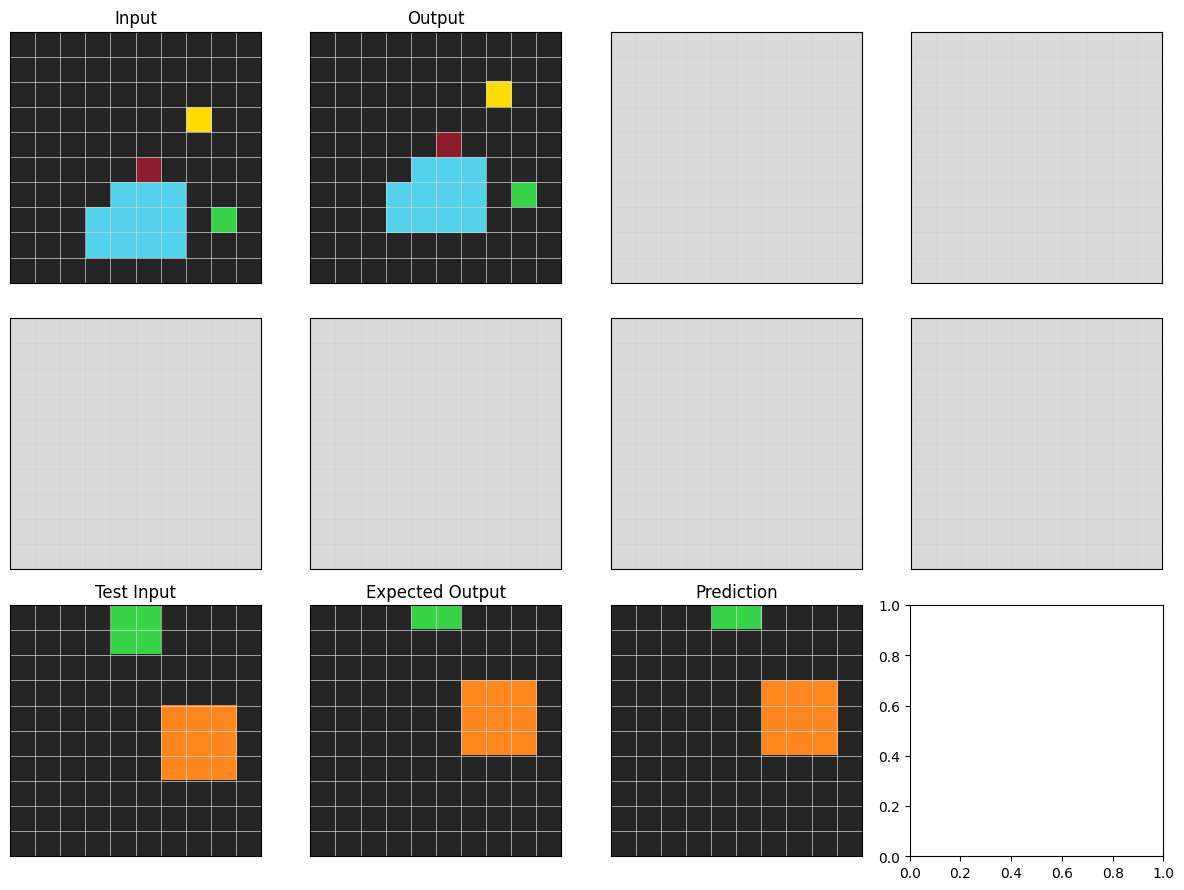

torch.Size([1, 10, 10])


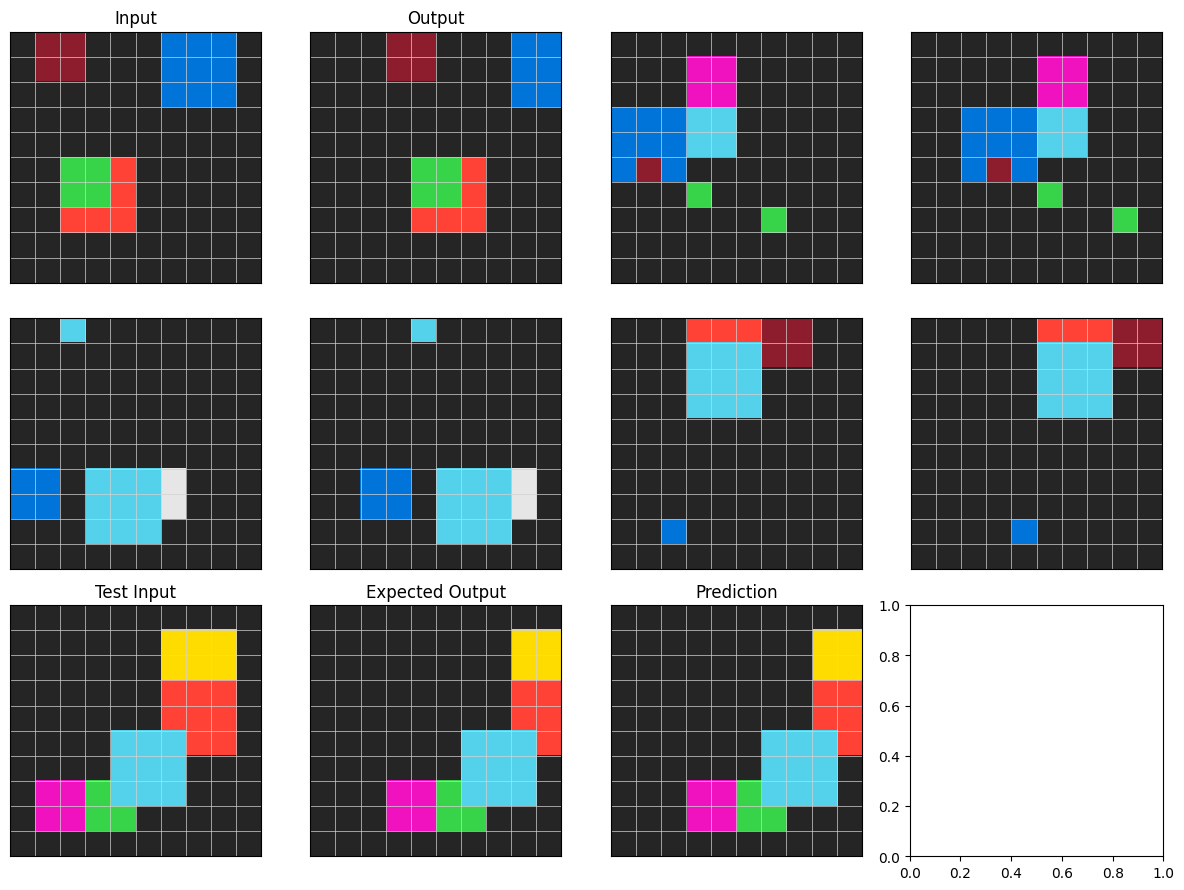

torch.Size([1, 10, 10])


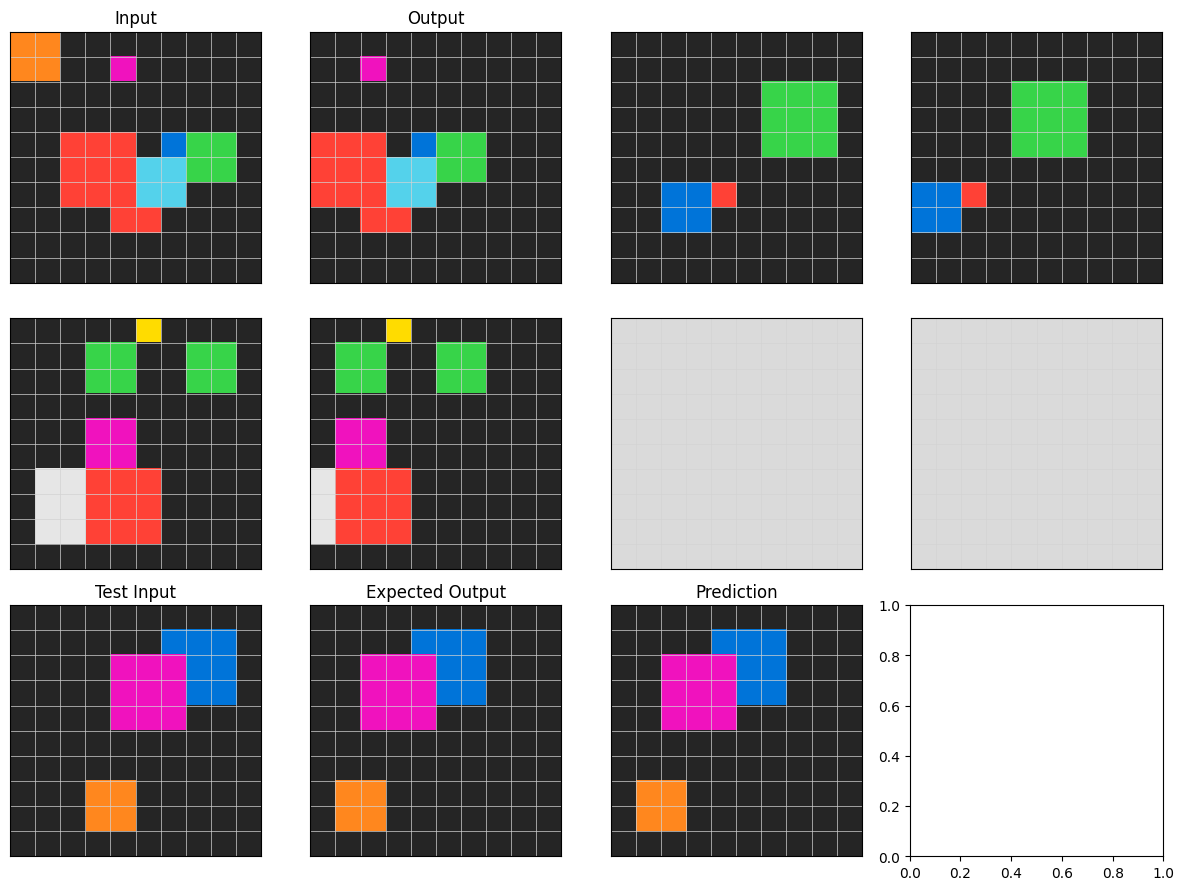

torch.Size([1, 10, 10])


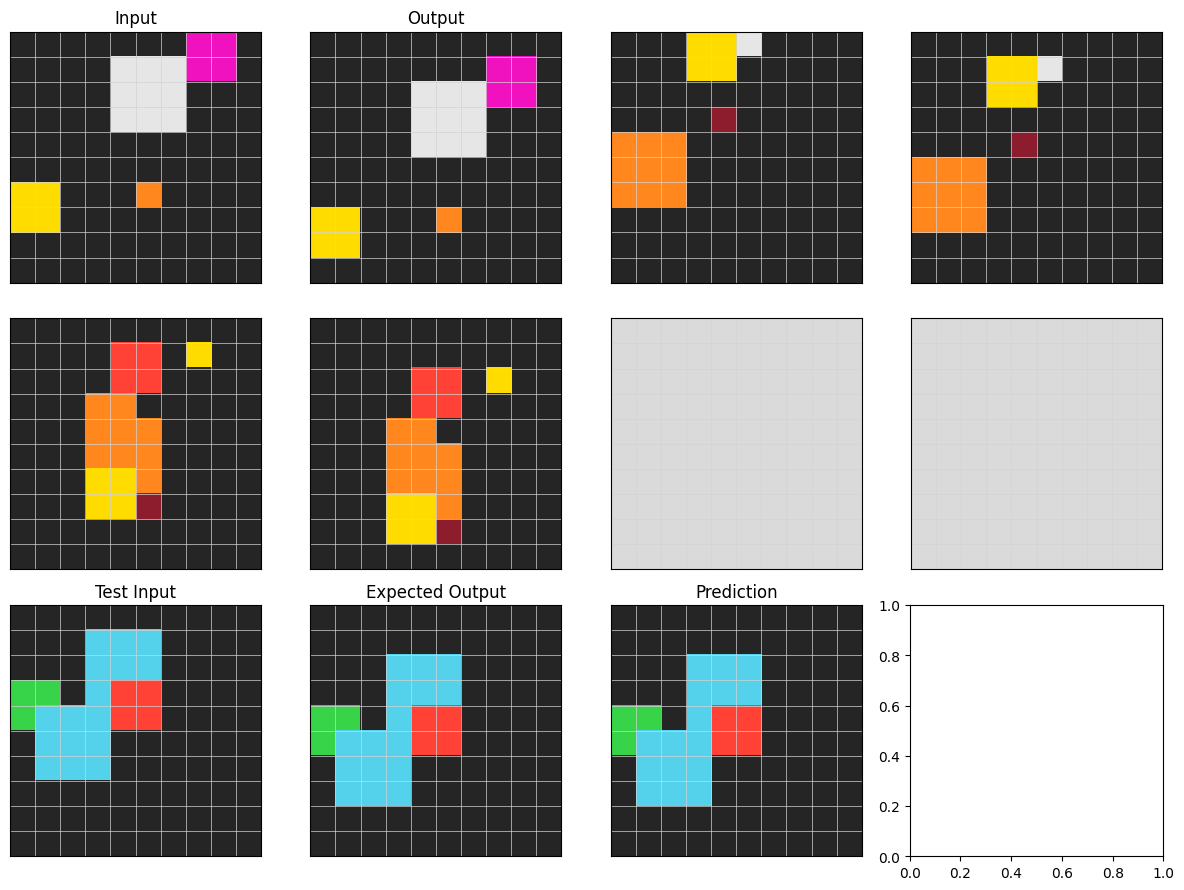

torch.Size([1, 10, 10])


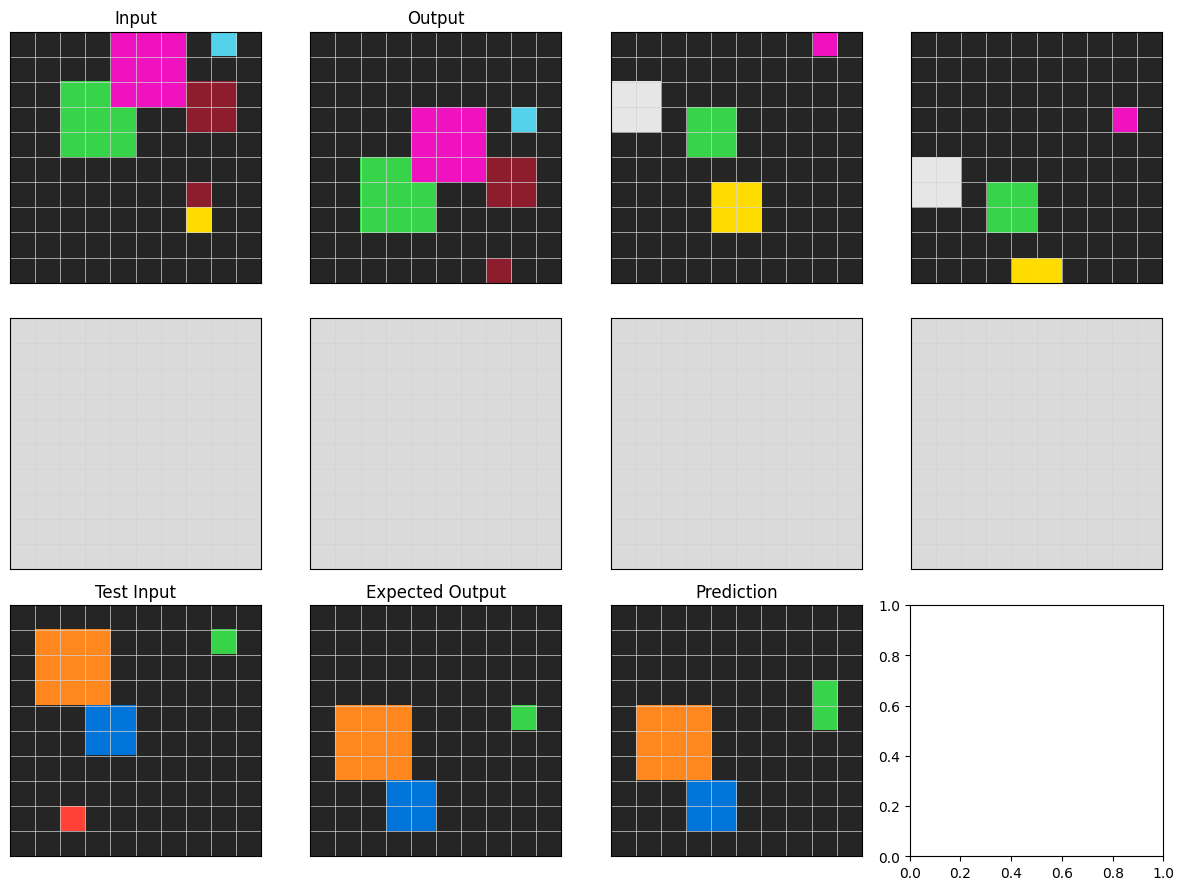

torch.Size([1, 10, 10])


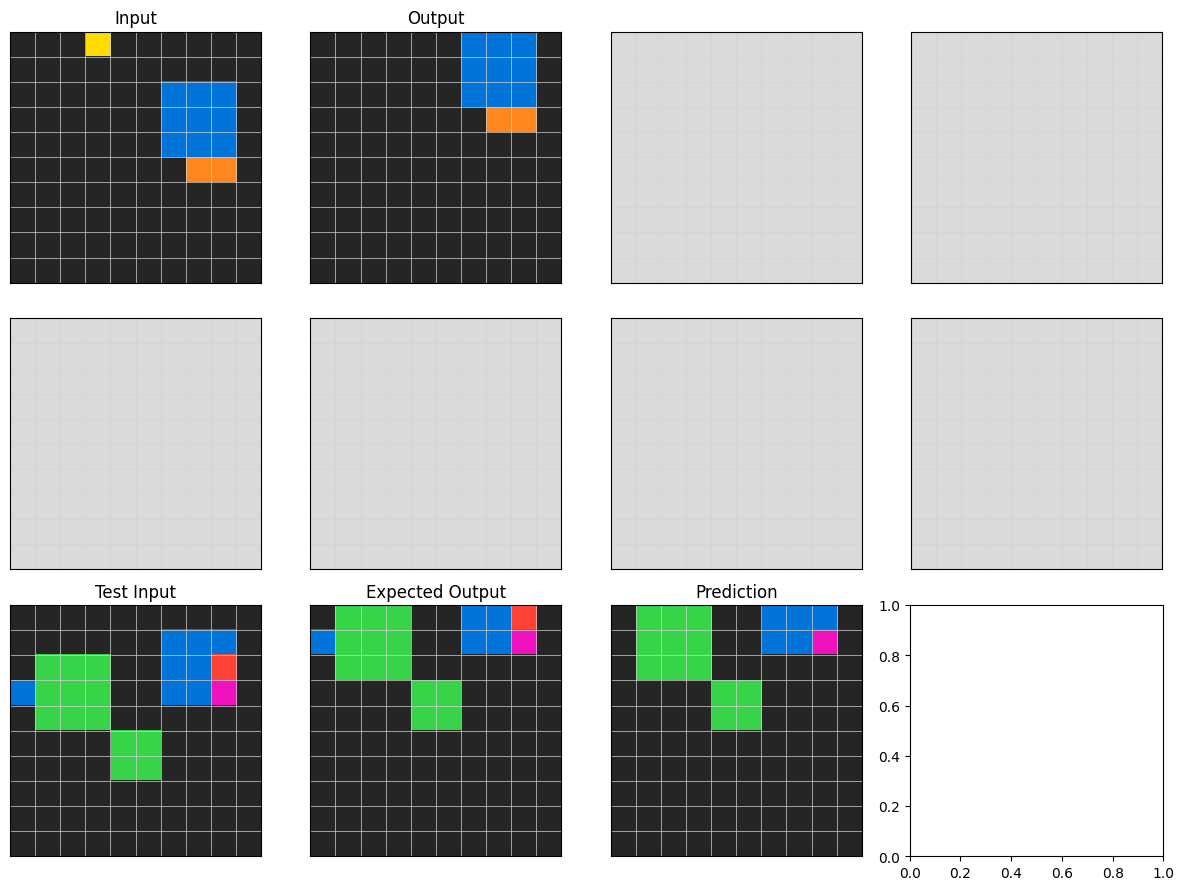

torch.Size([1, 10, 10])


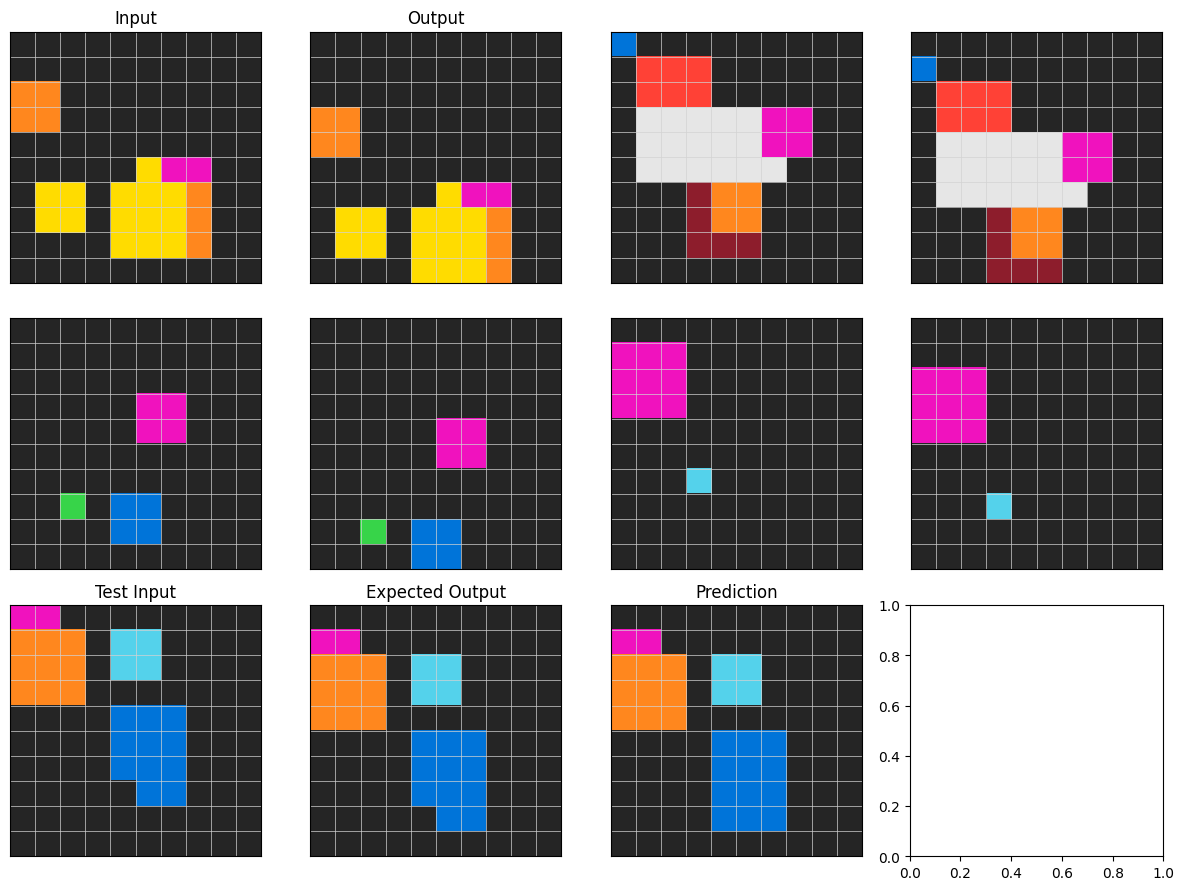

torch.Size([1, 10, 10])


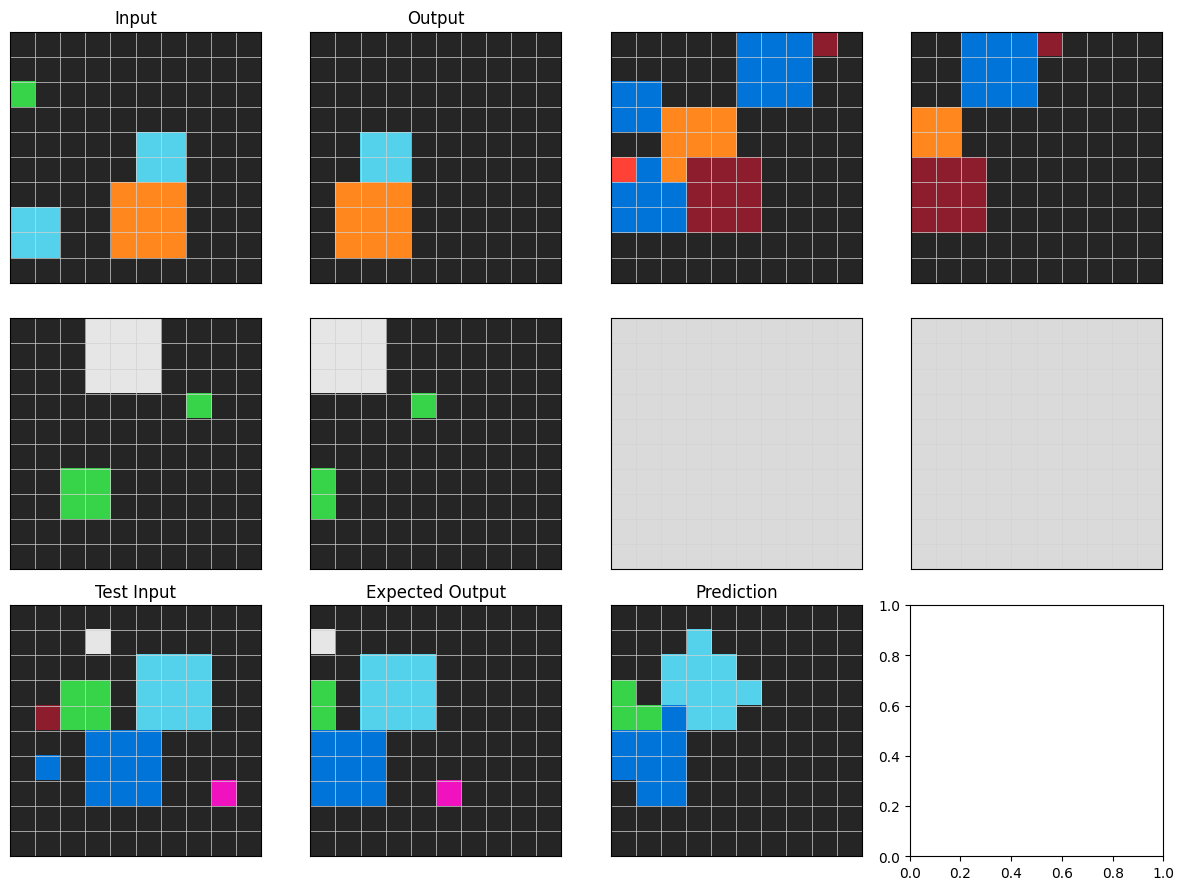

torch.Size([1, 10, 10])


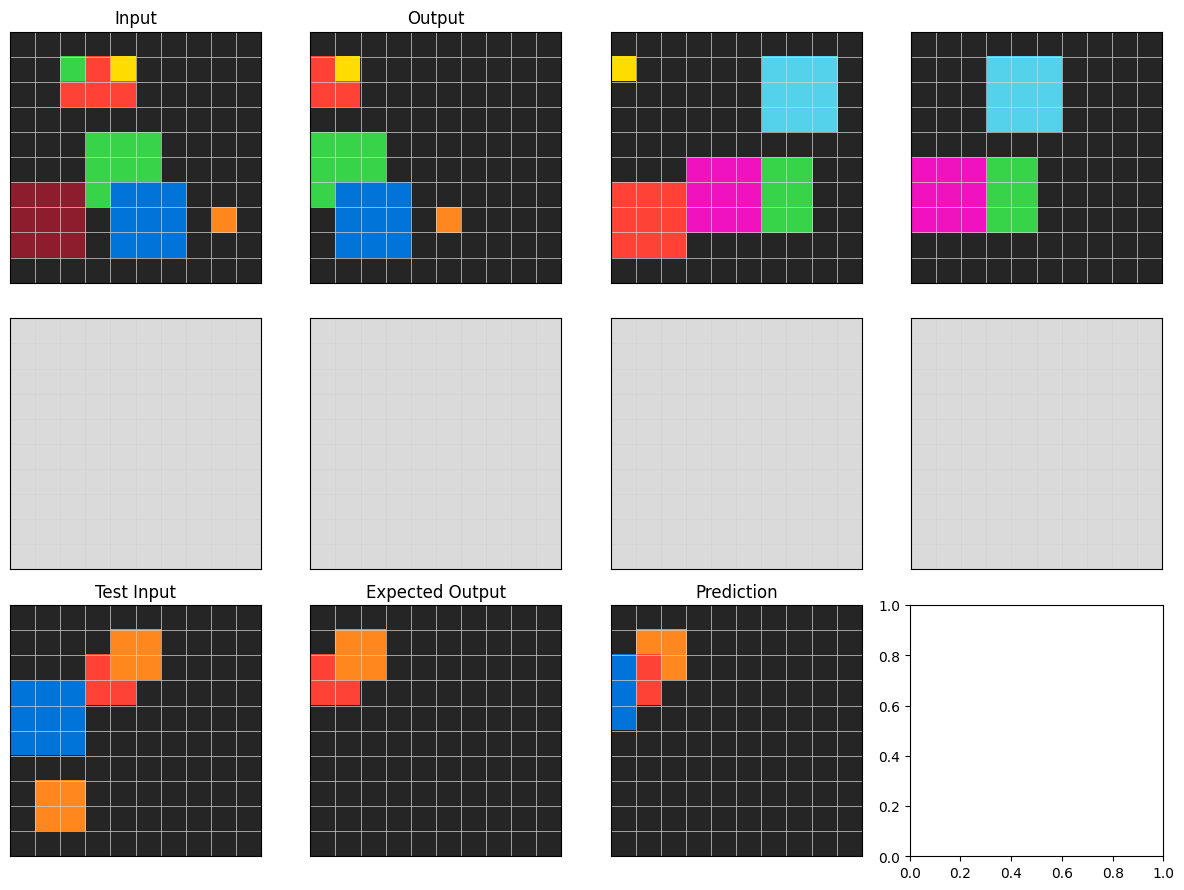

torch.Size([1, 10, 10])


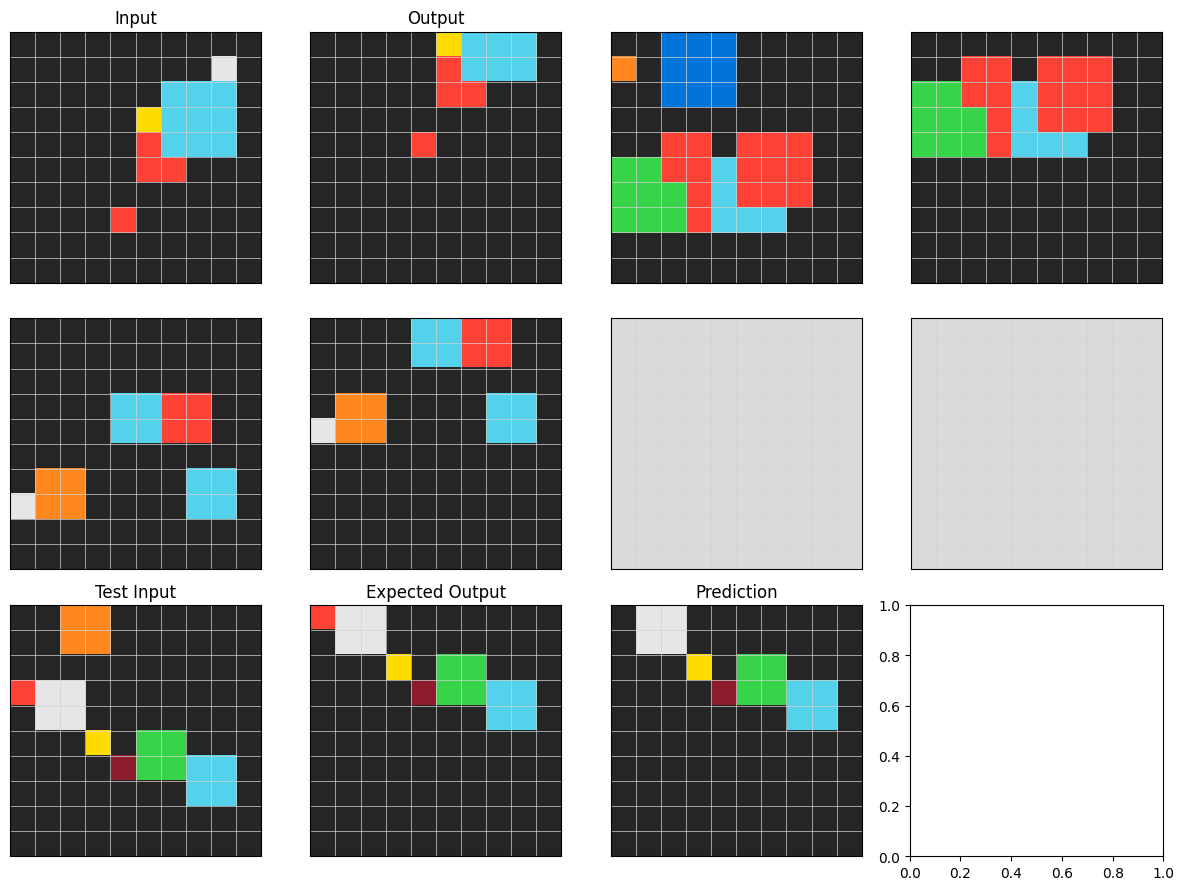

torch.Size([1, 10, 10])


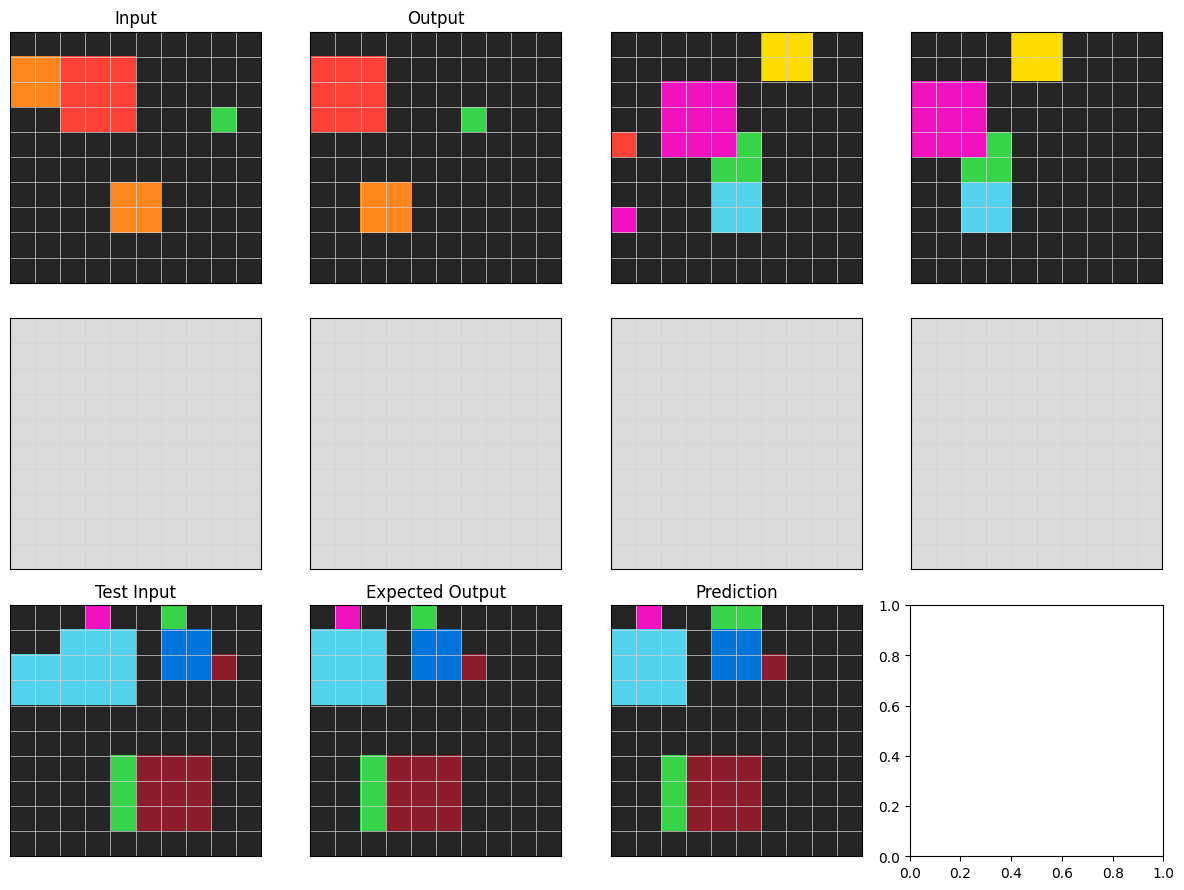

torch.Size([1, 10, 10])


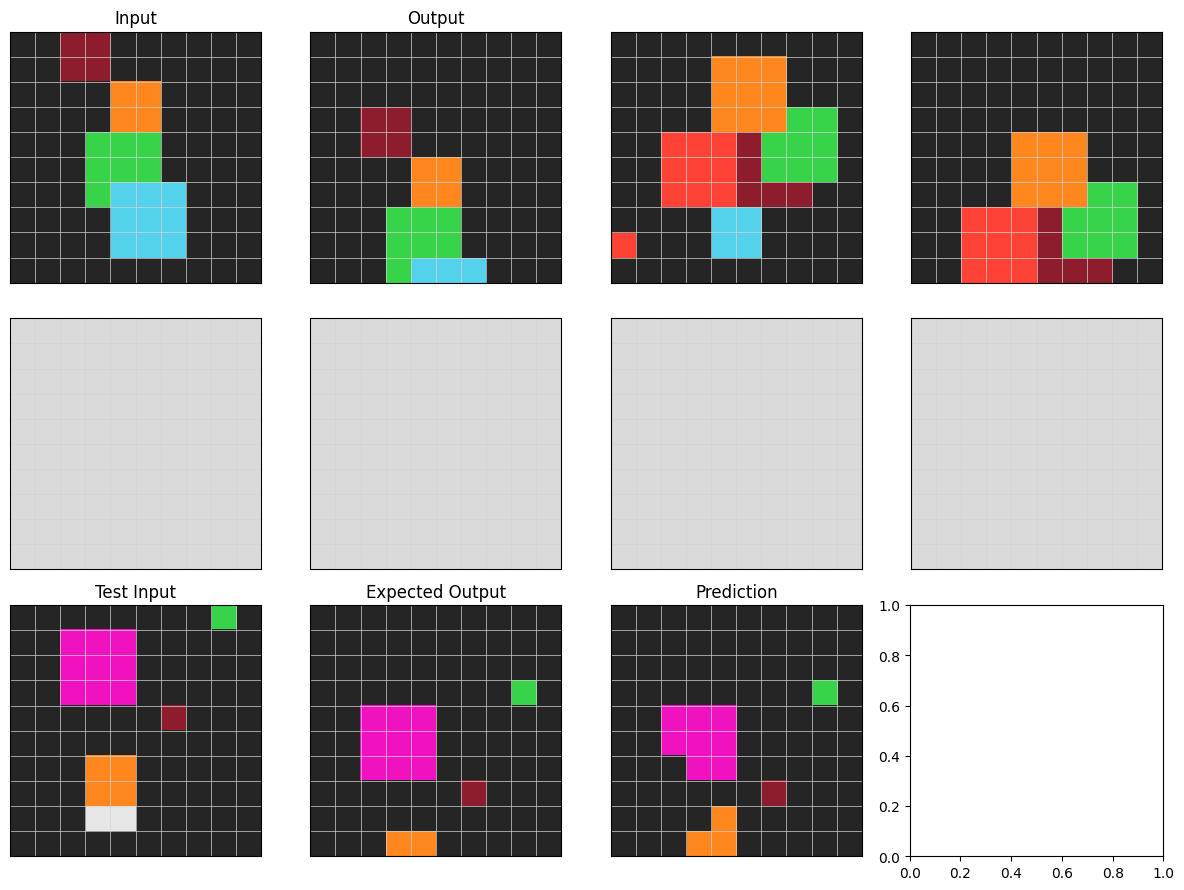

torch.Size([1, 10, 10])


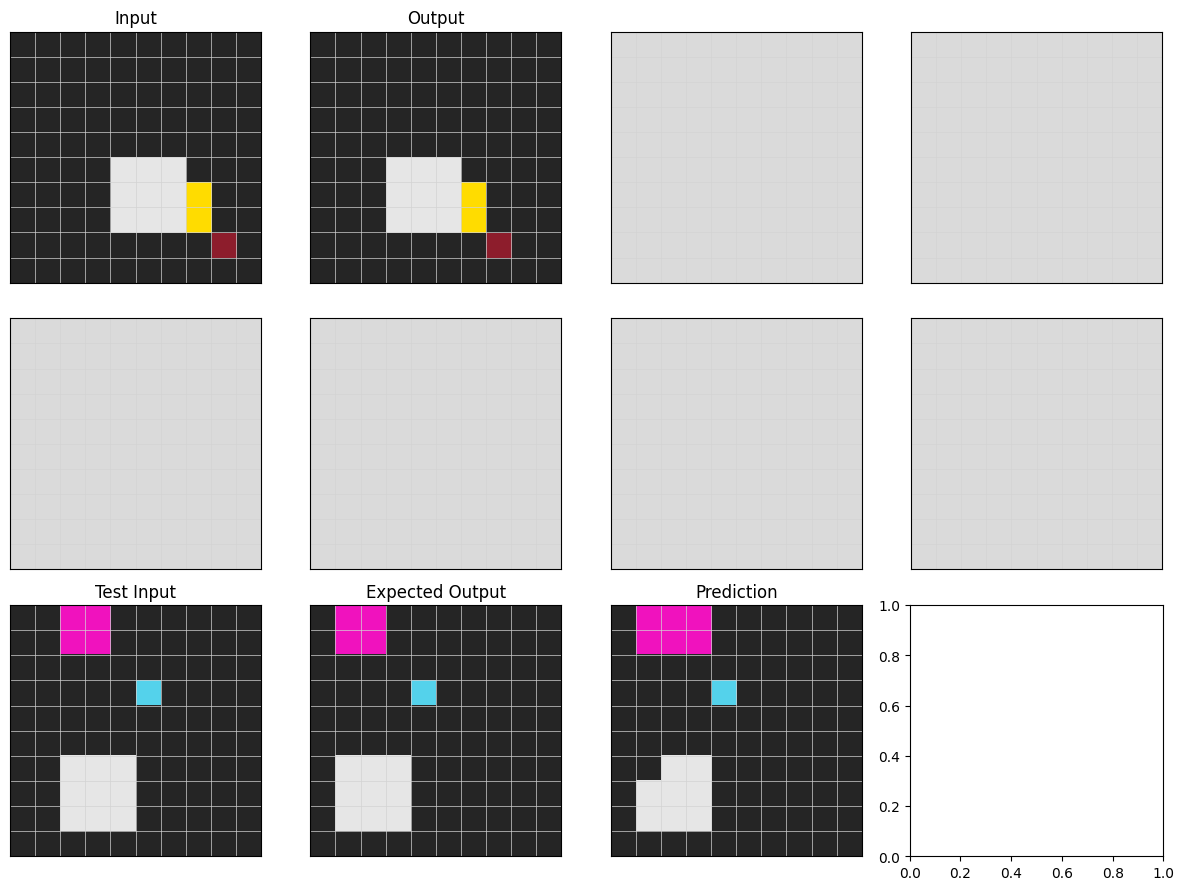

torch.Size([1, 10, 10])


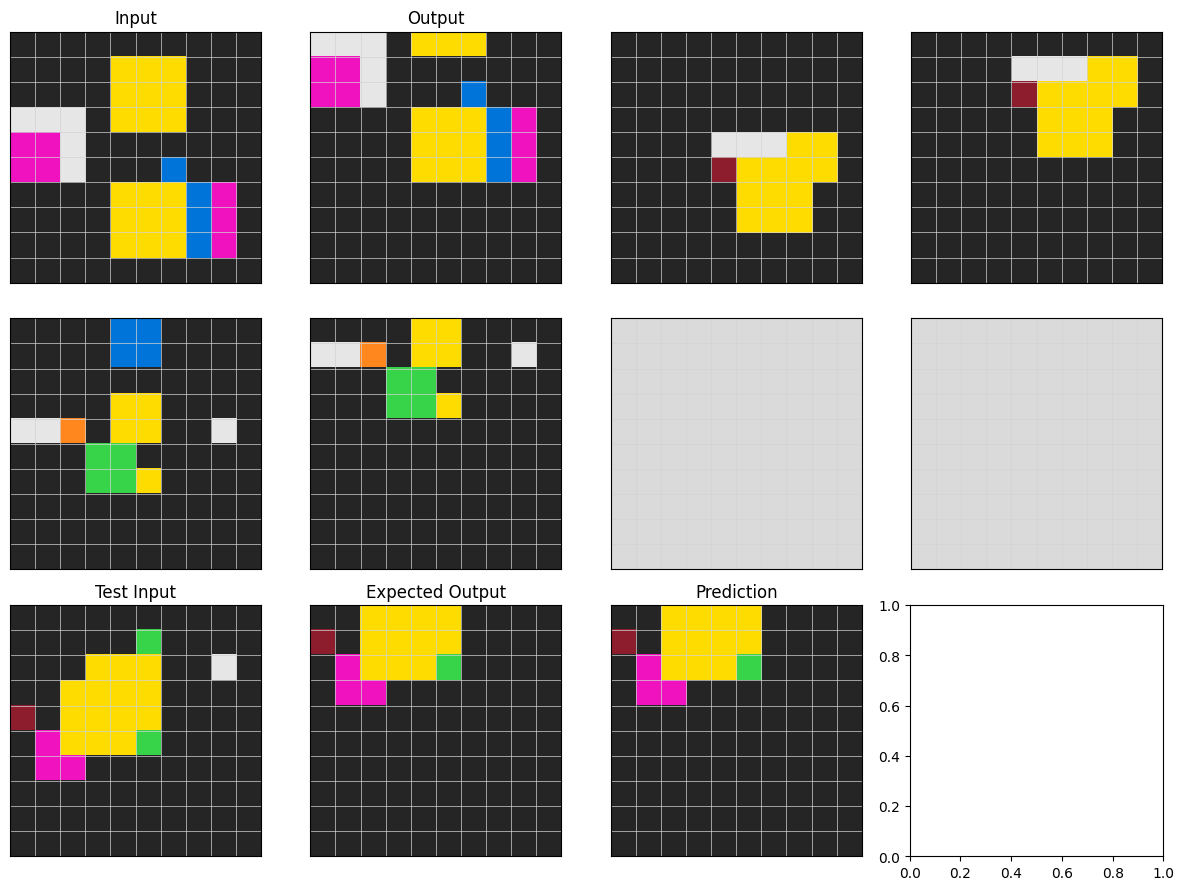

torch.Size([1, 10, 10])


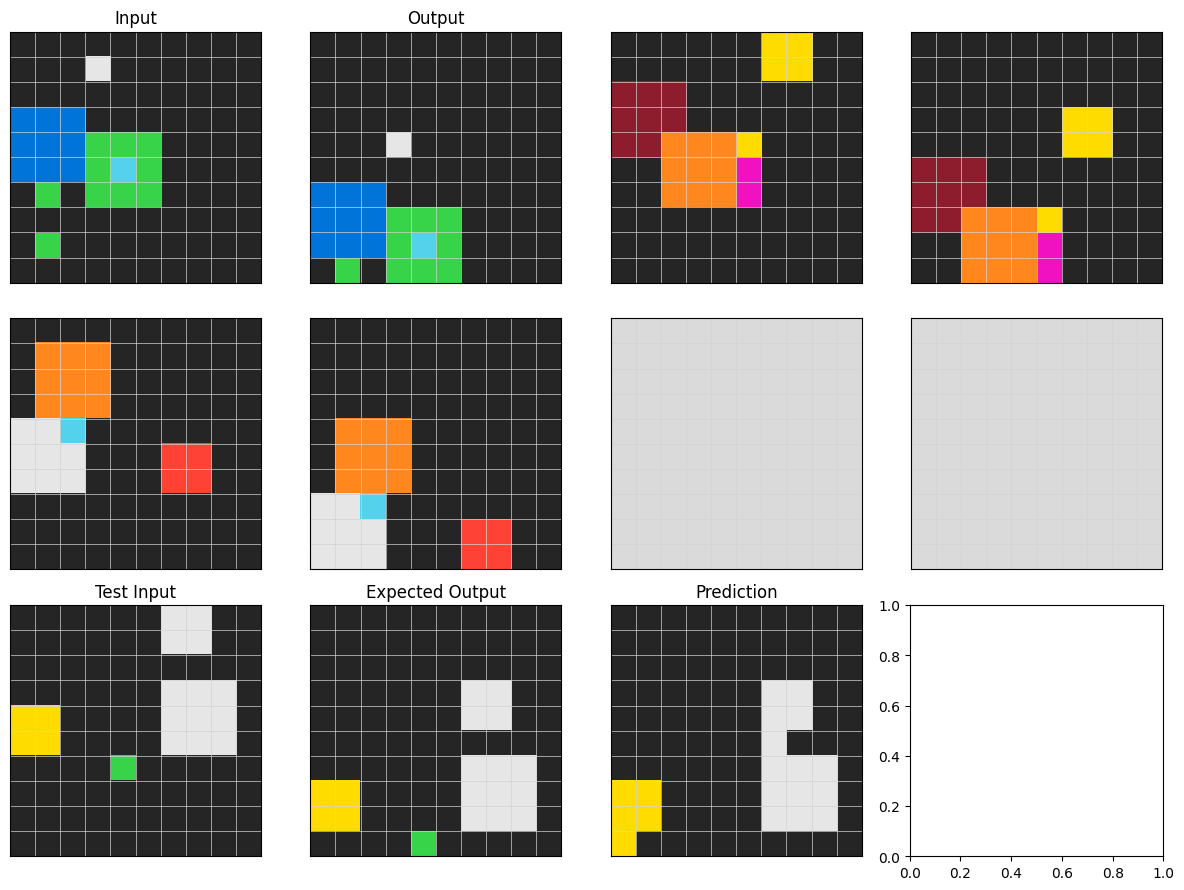

torch.Size([1, 10, 10])


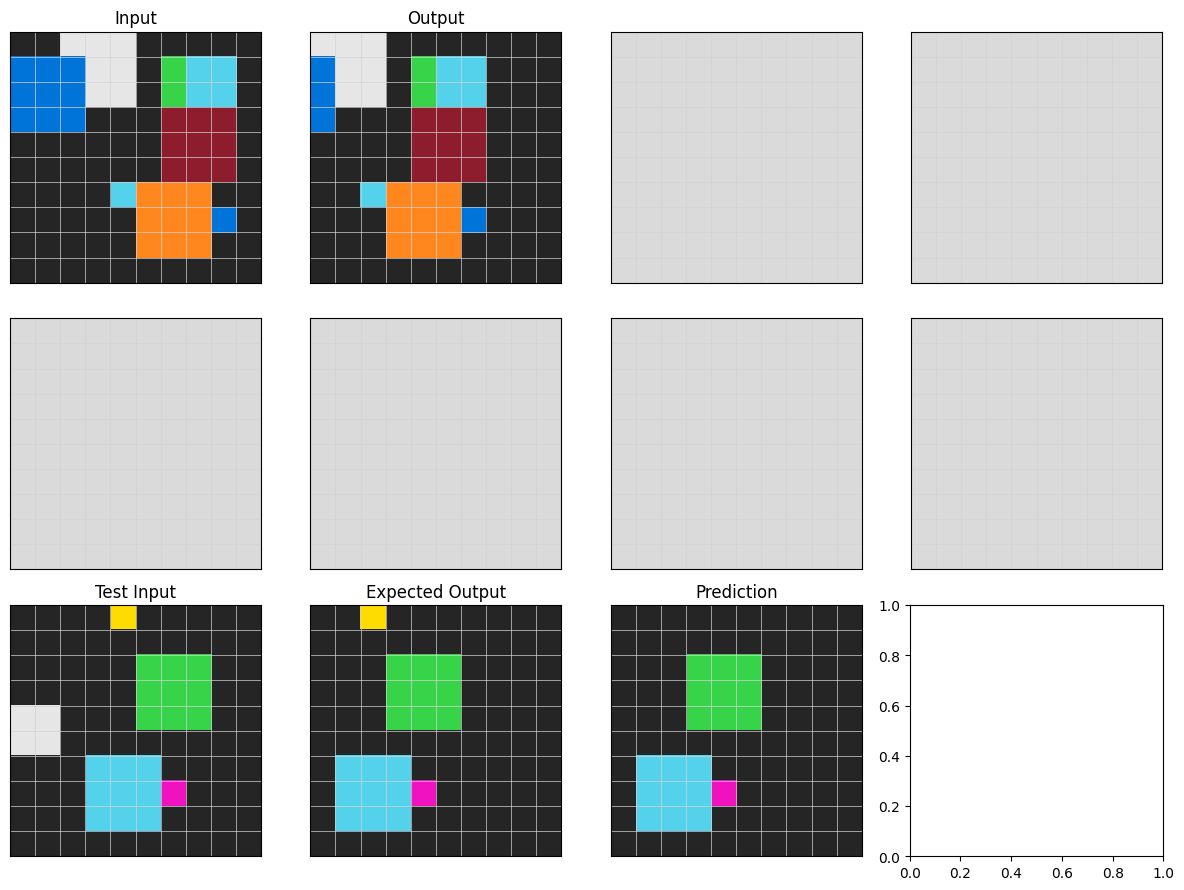

torch.Size([1, 10, 10])


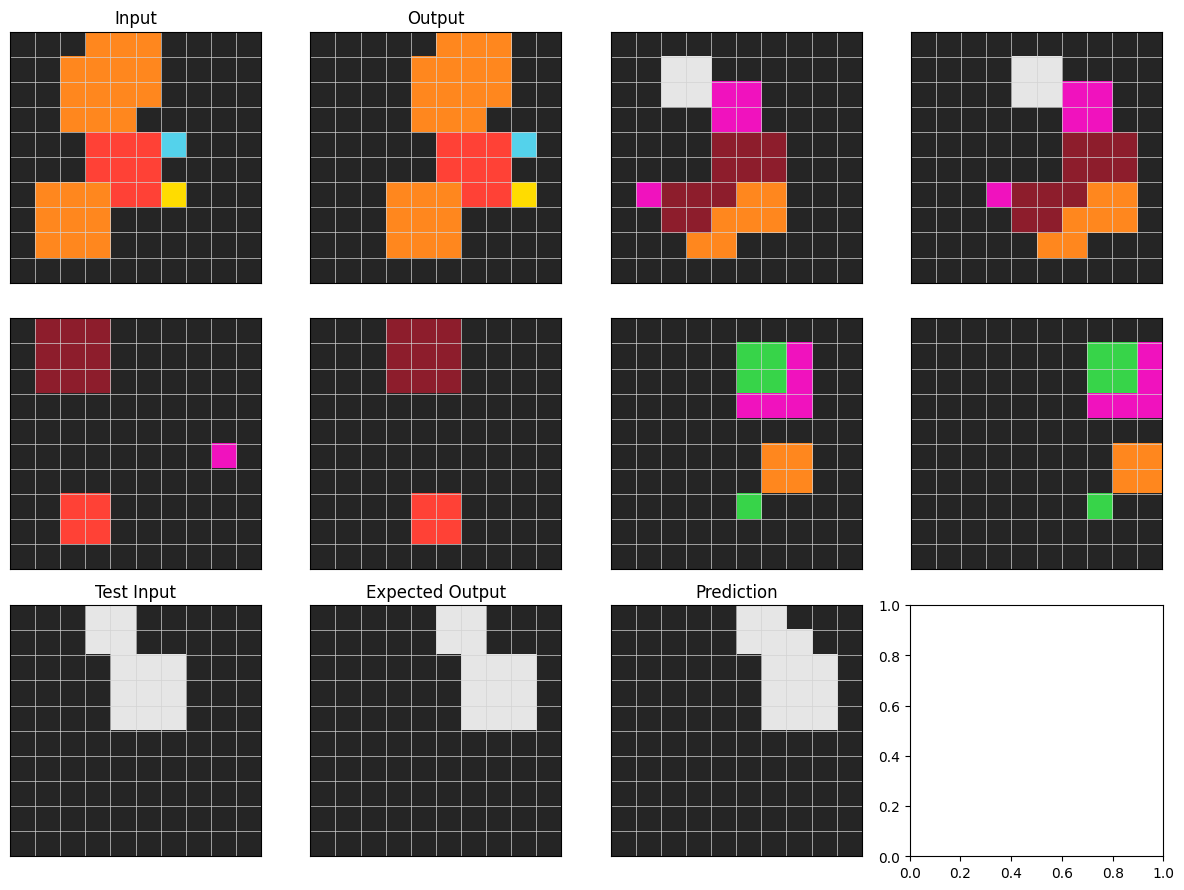

torch.Size([1, 10, 10])


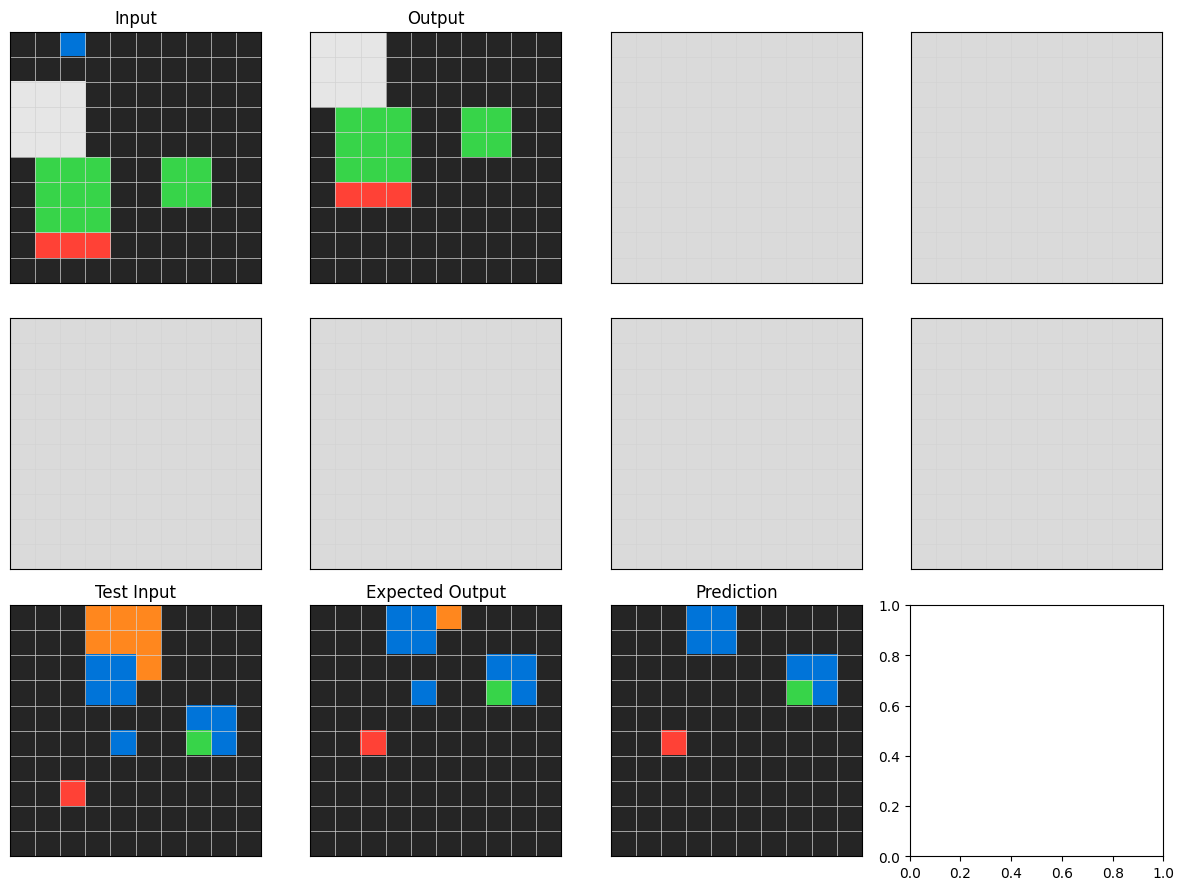

torch.Size([1, 10, 10])


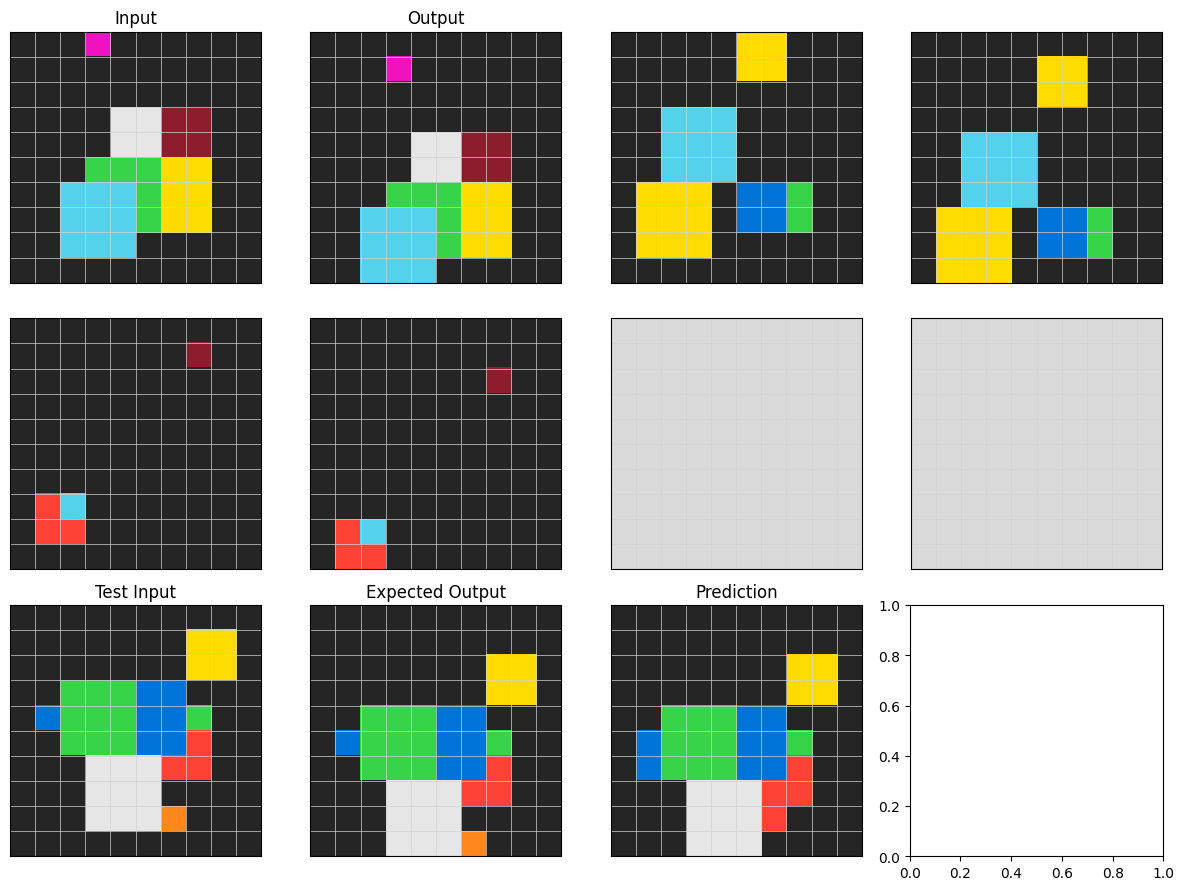

torch.Size([1, 10, 10])


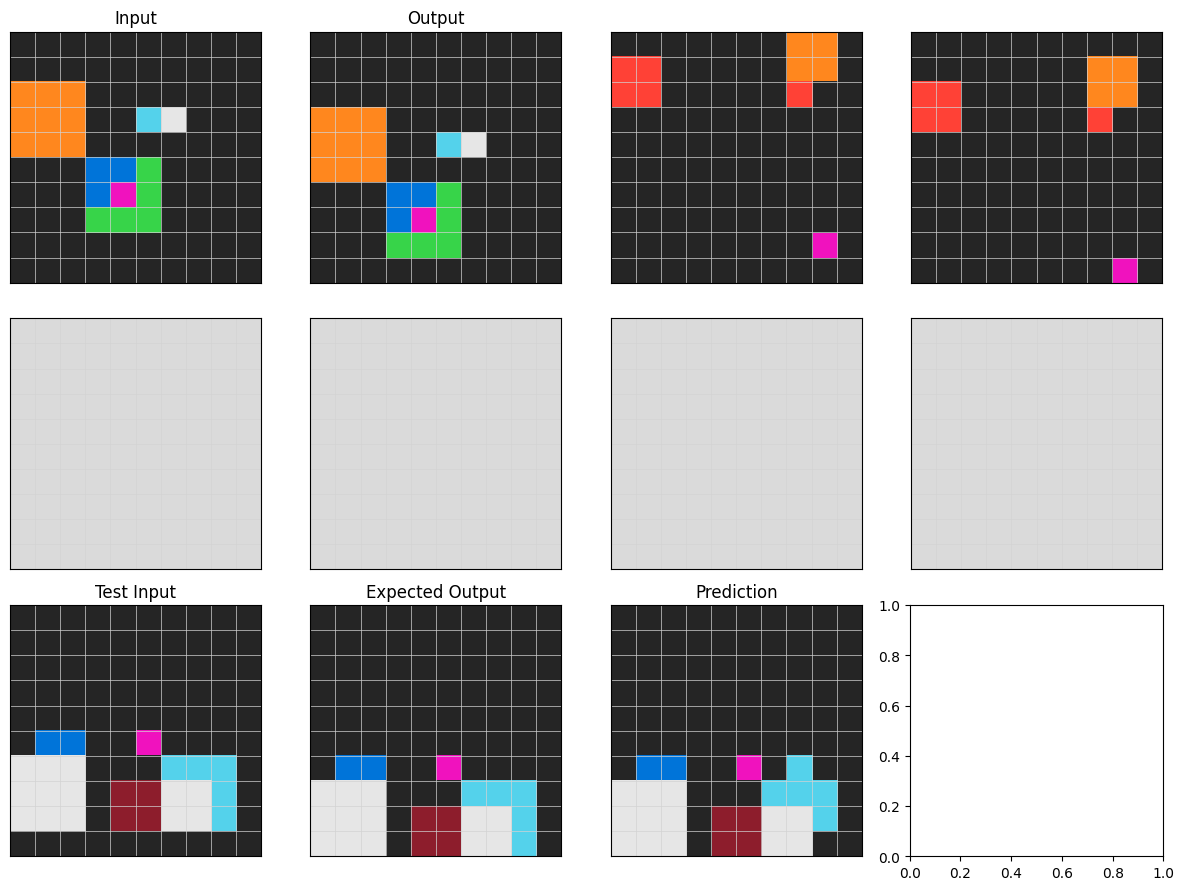

torch.Size([1, 10, 10])


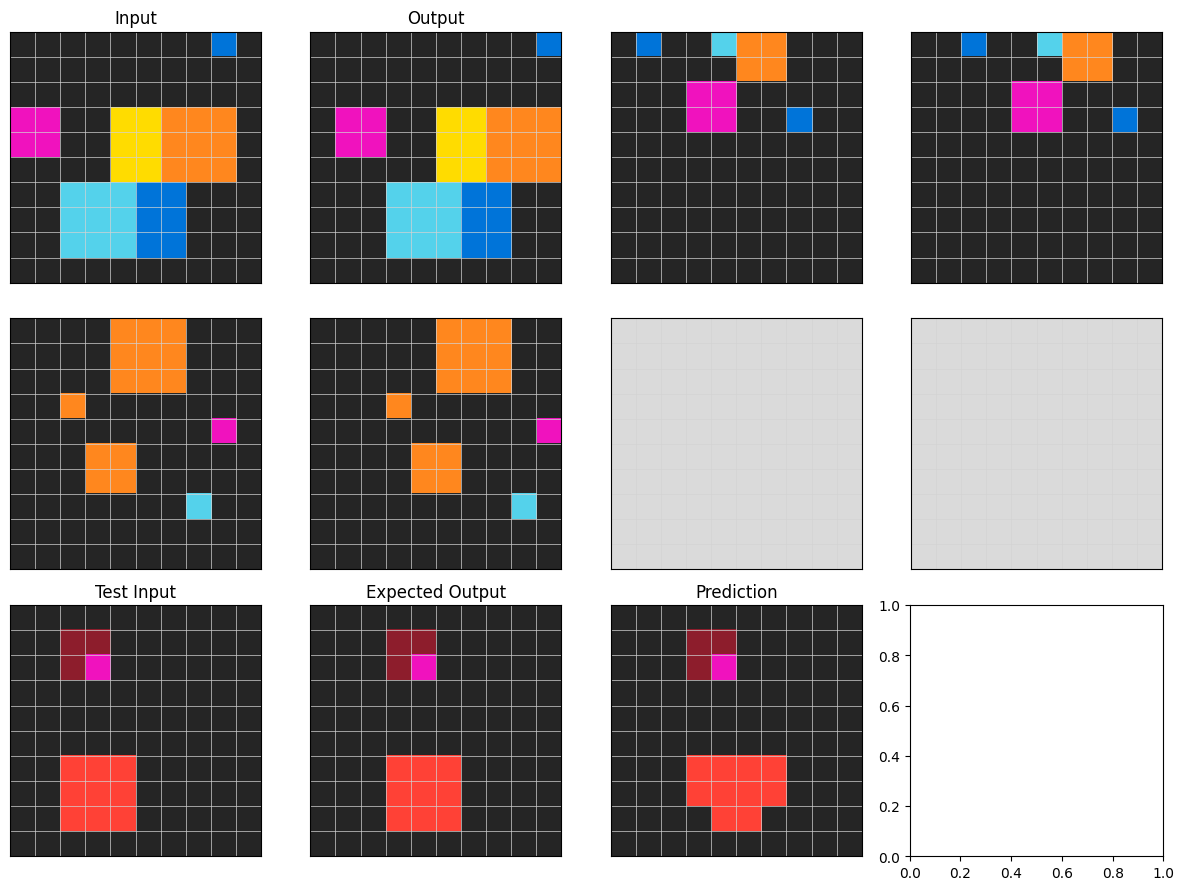

torch.Size([1, 10, 10])


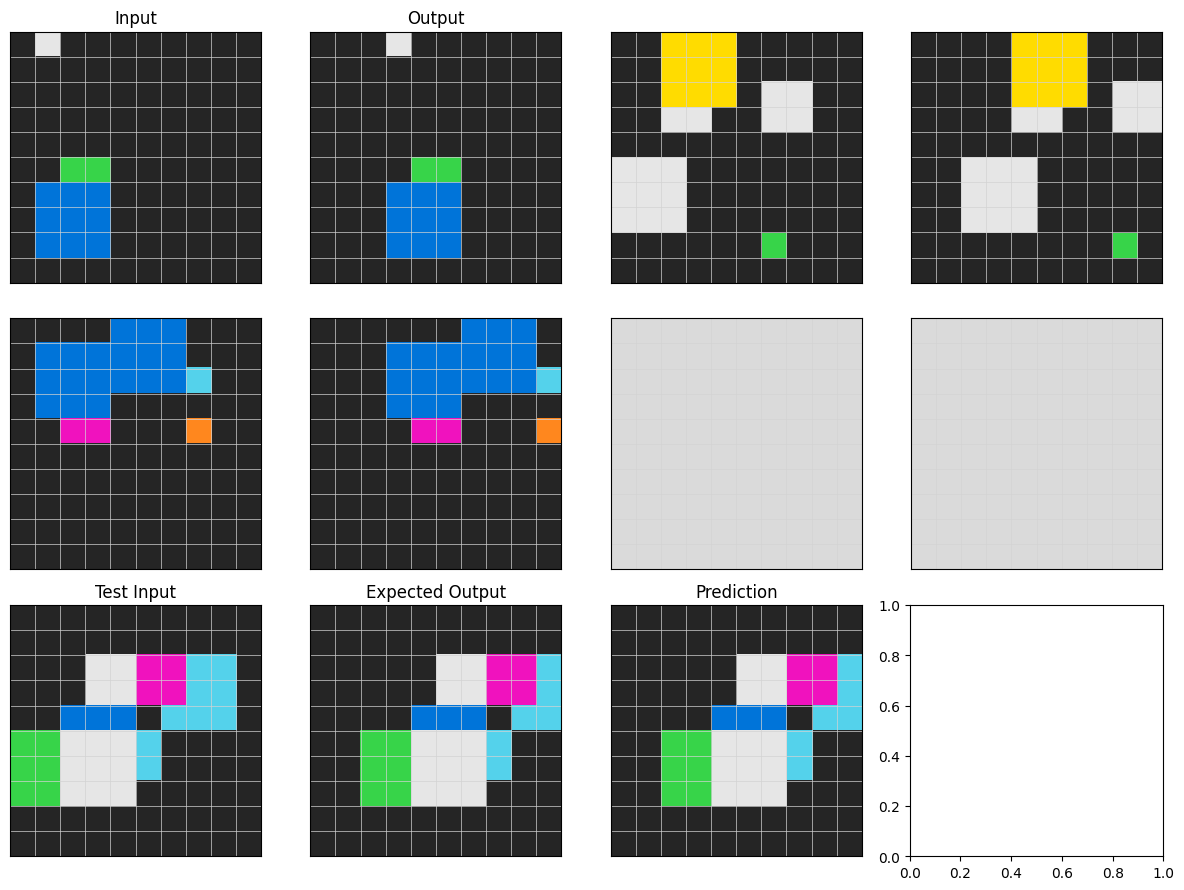

torch.Size([1, 10, 10])


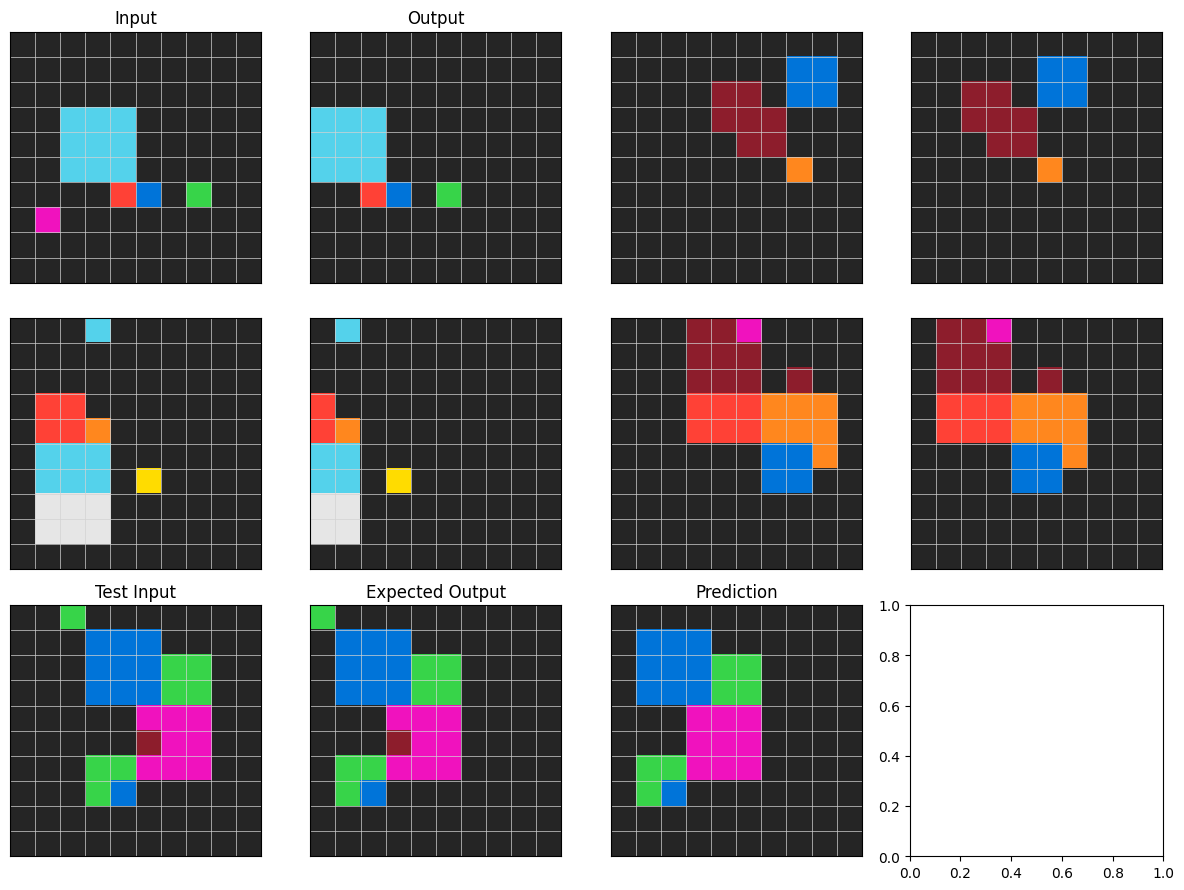

torch.Size([1, 10, 10])


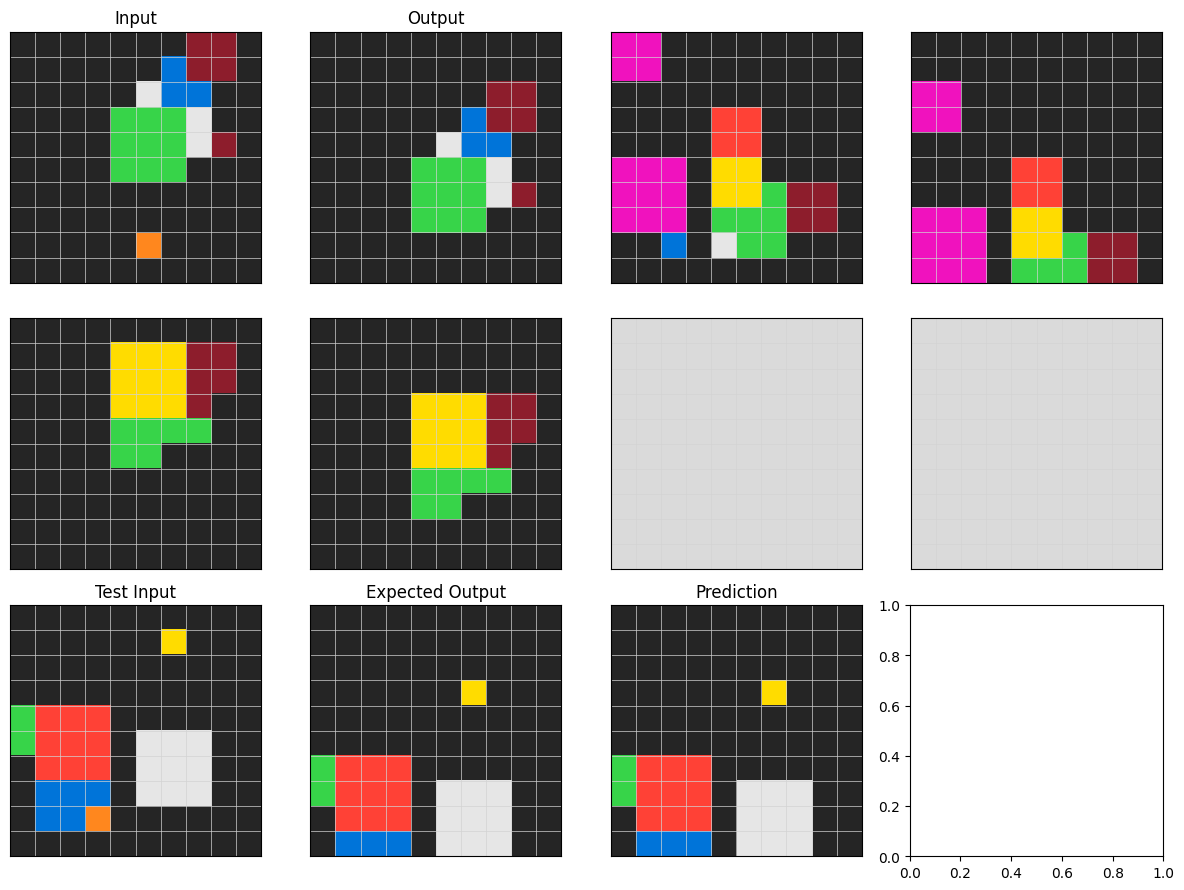

torch.Size([1, 10, 10])


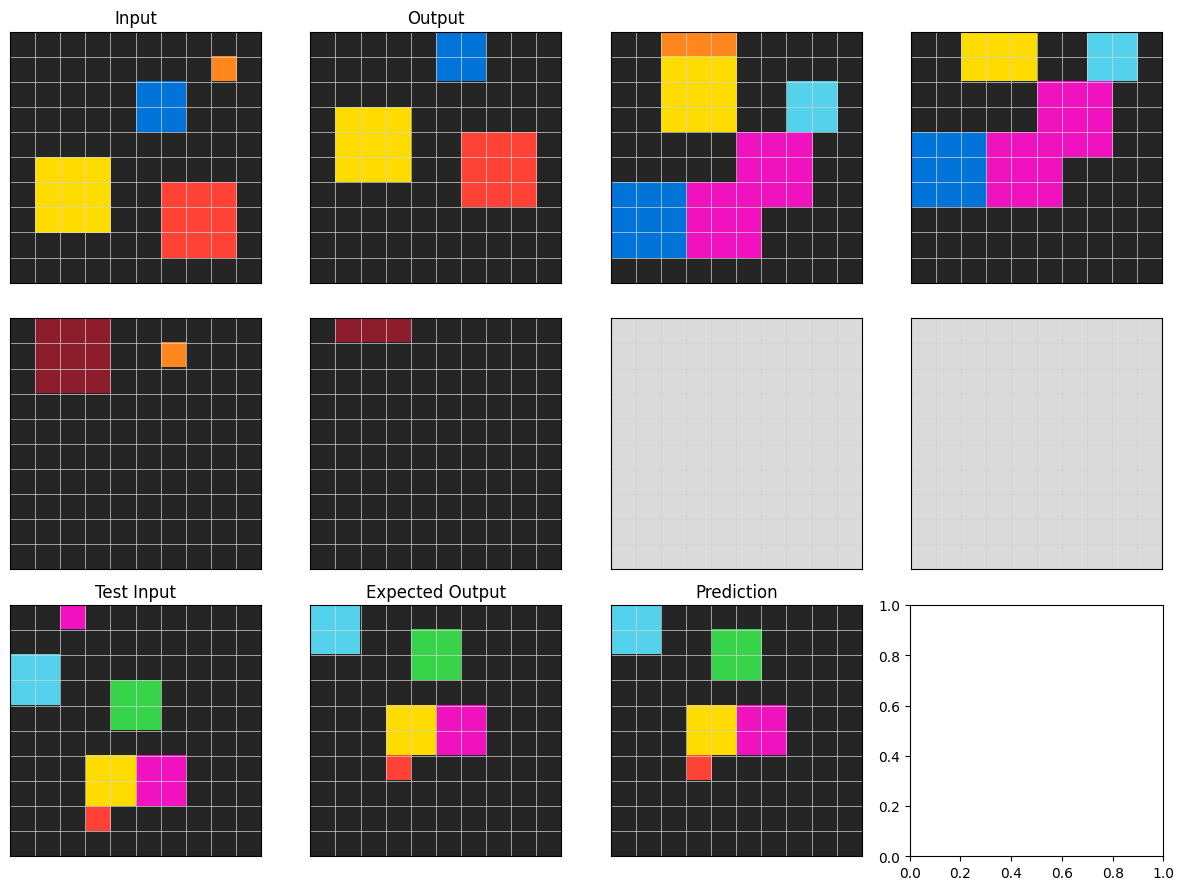

torch.Size([1, 10, 10])


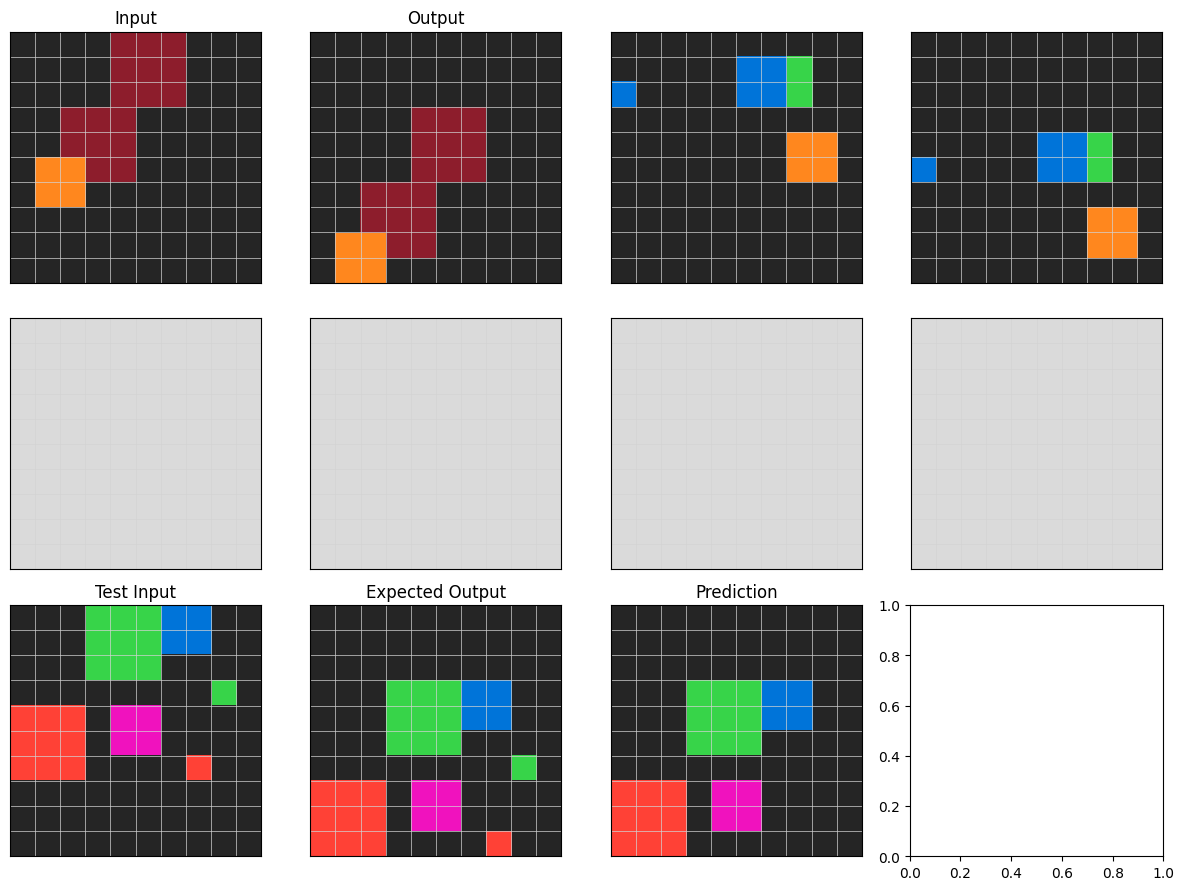

torch.Size([1, 10, 10])


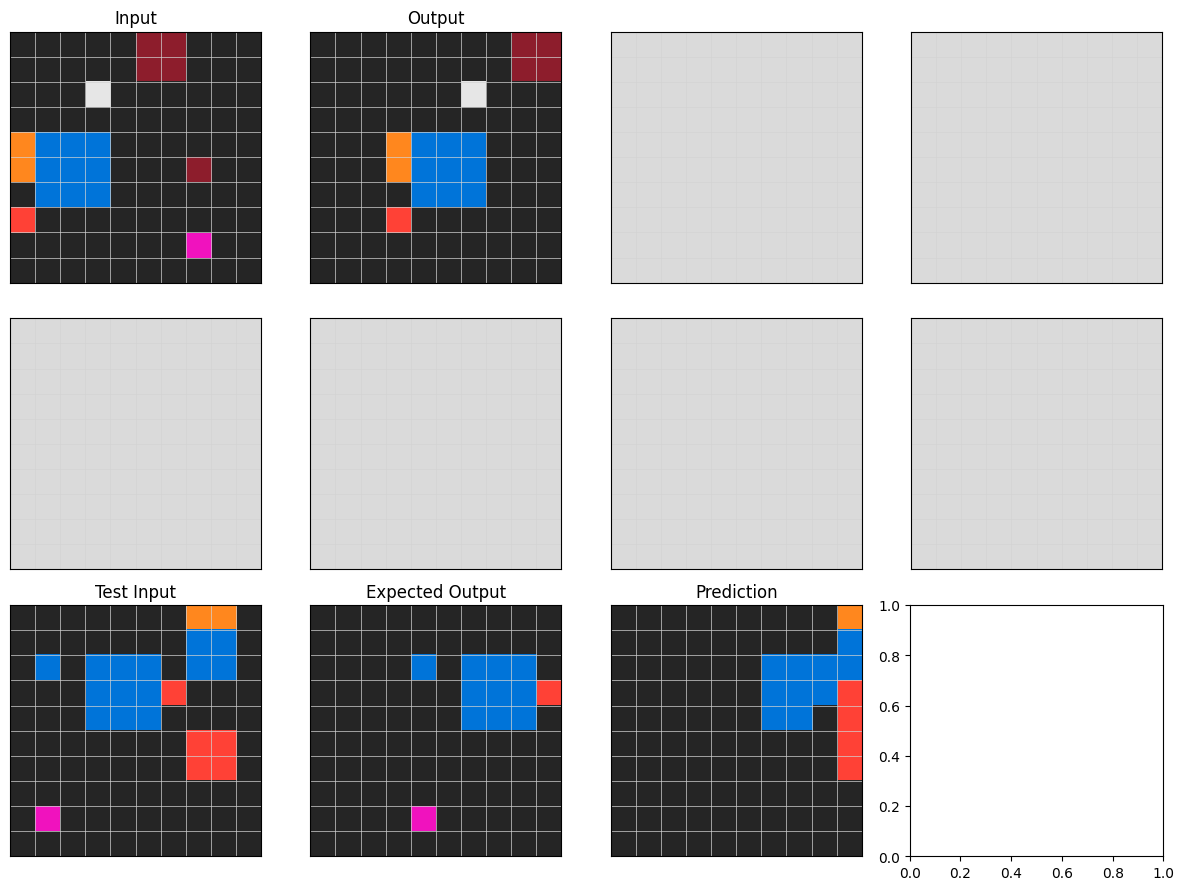

torch.Size([1, 10, 10])


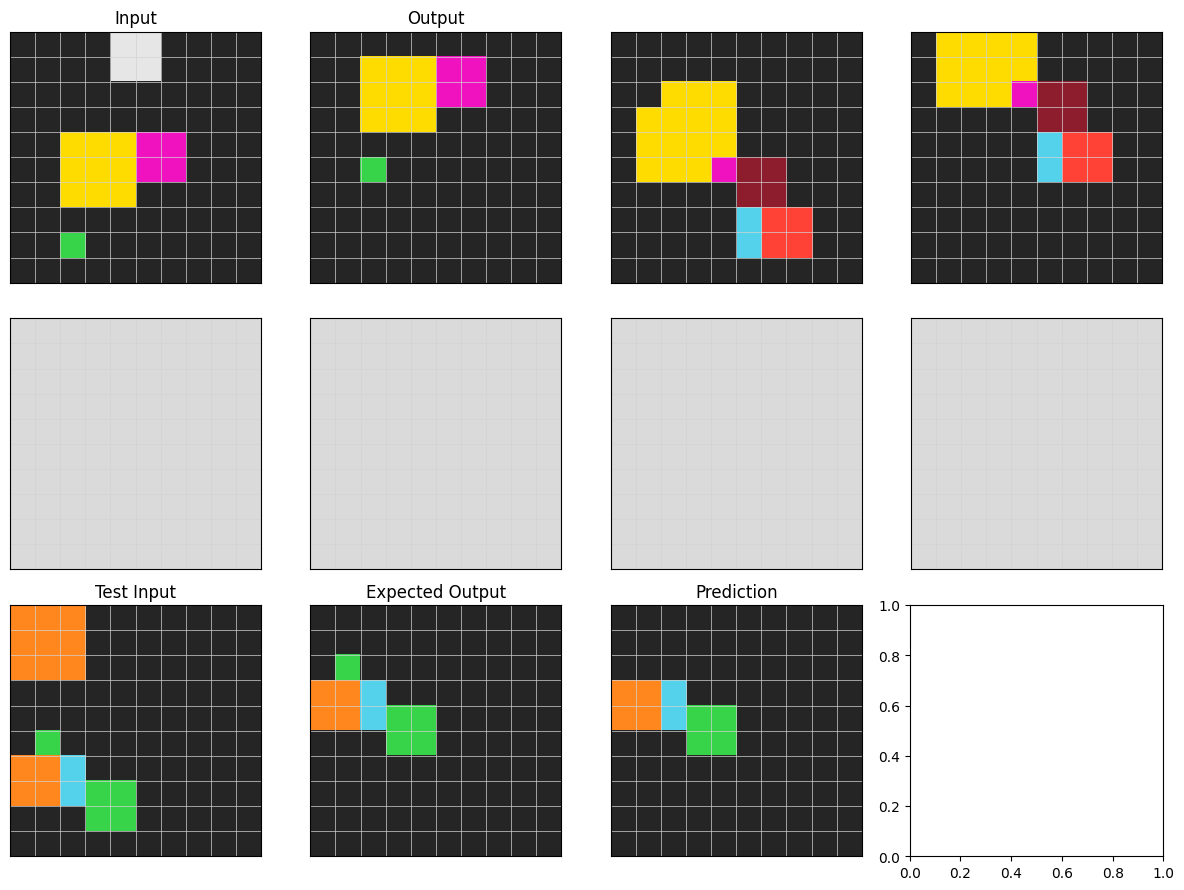

torch.Size([1, 10, 10])


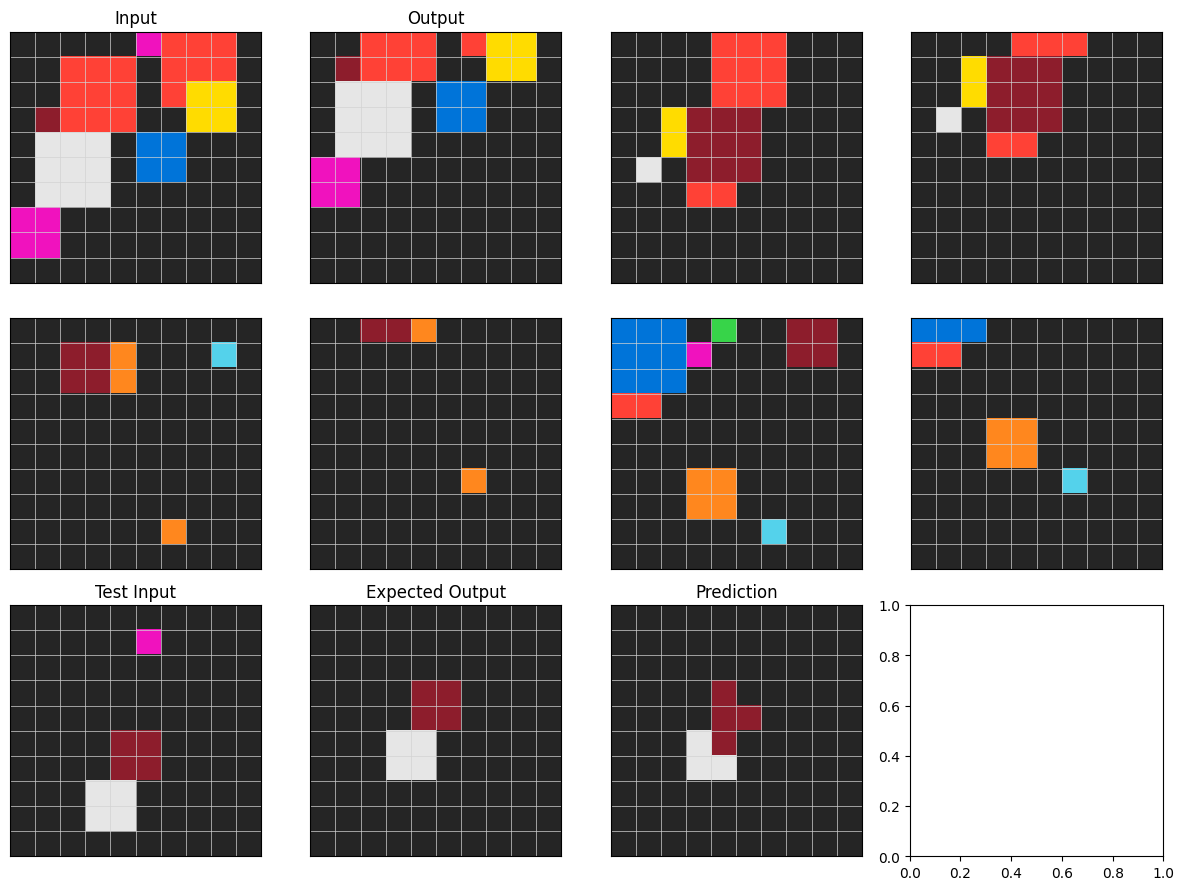

torch.Size([1, 10, 10])


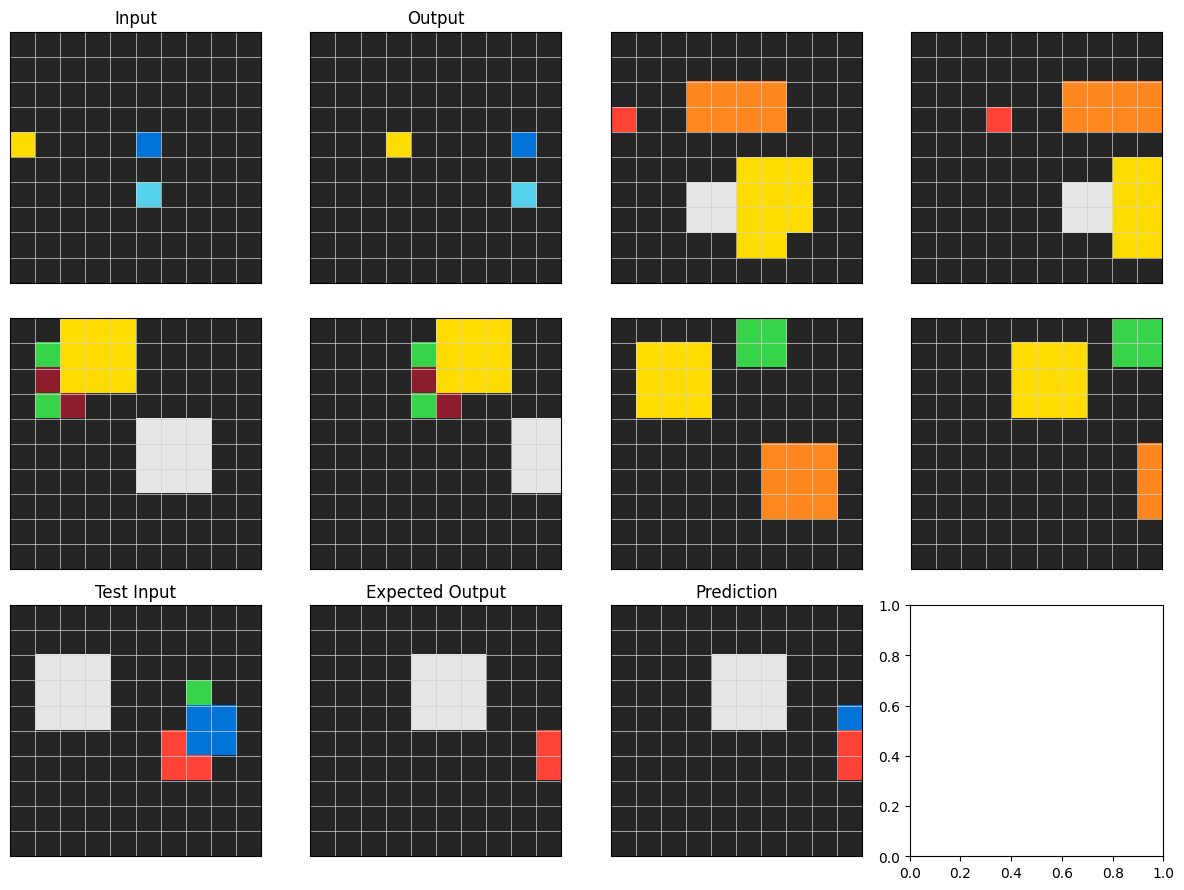

torch.Size([1, 10, 10])


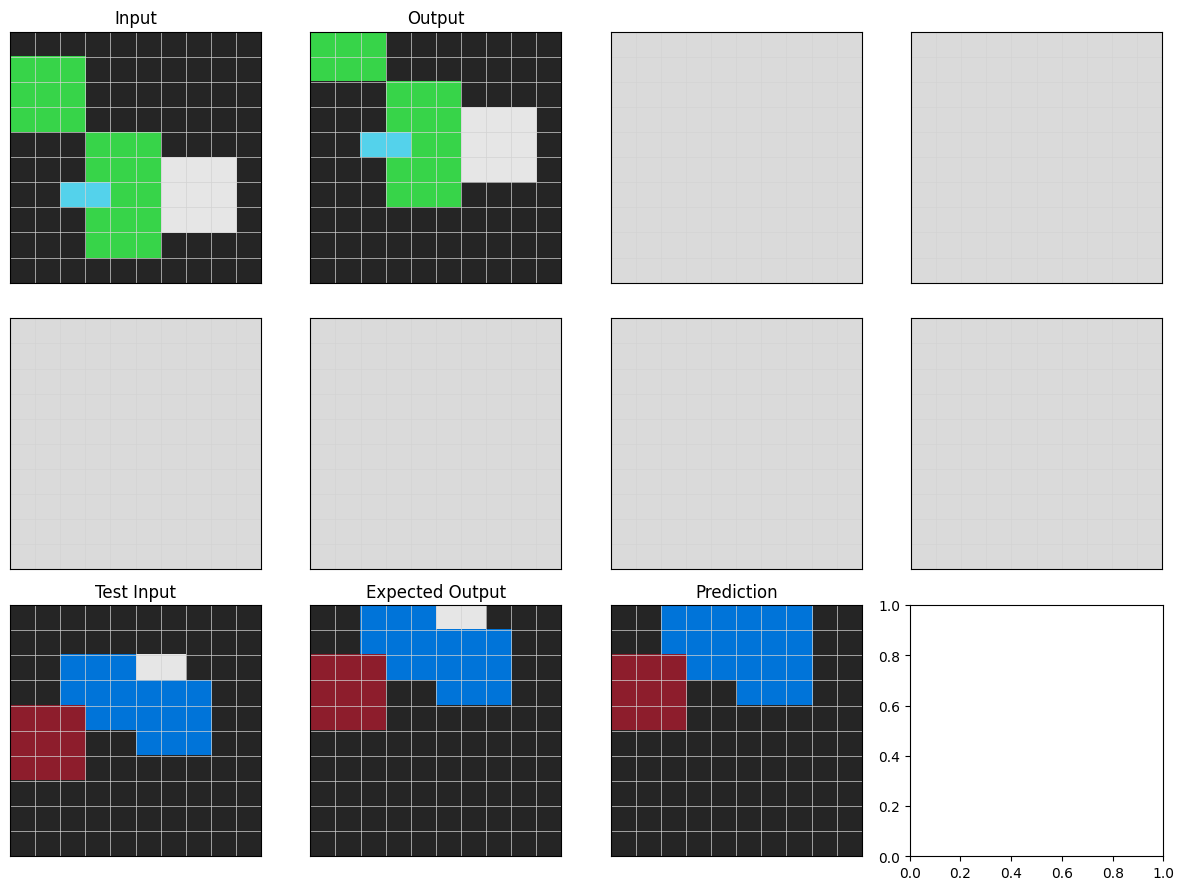

torch.Size([1, 10, 10])


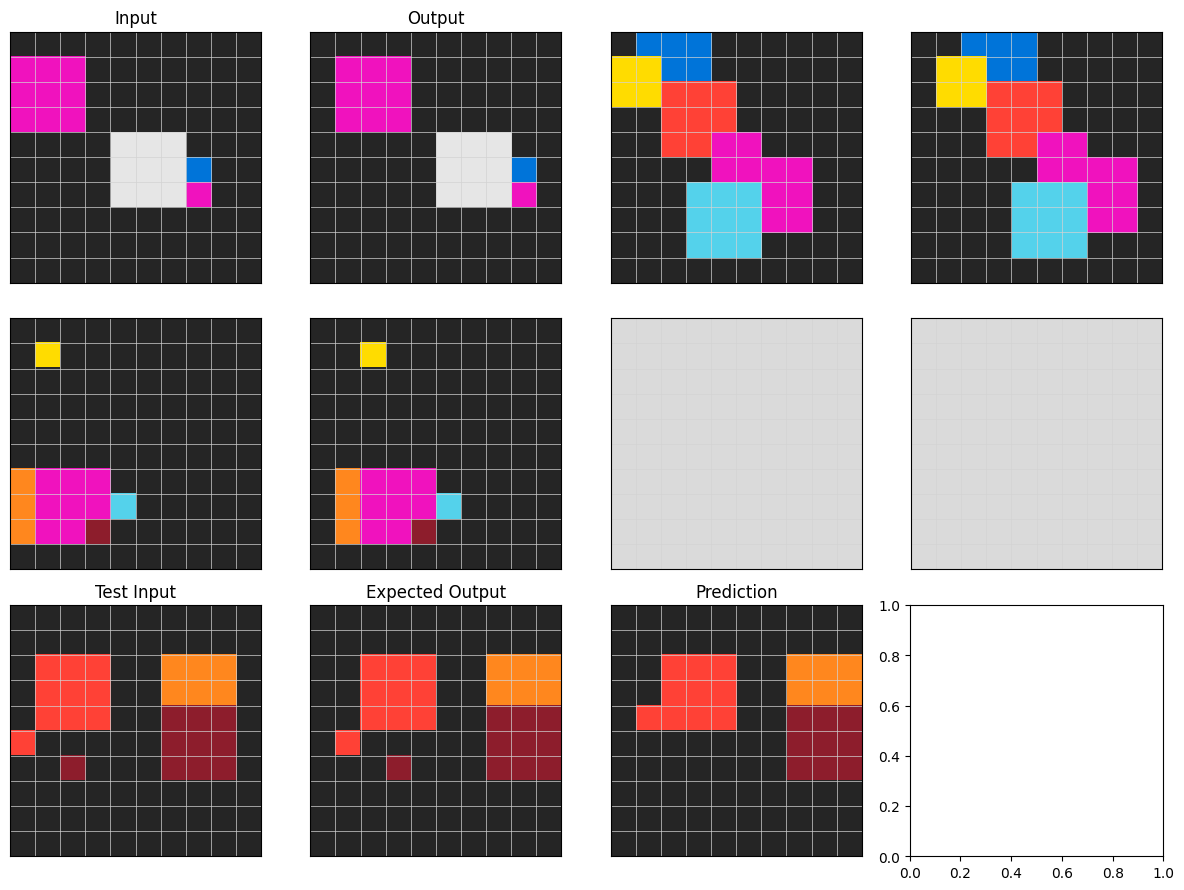

torch.Size([1, 10, 10])


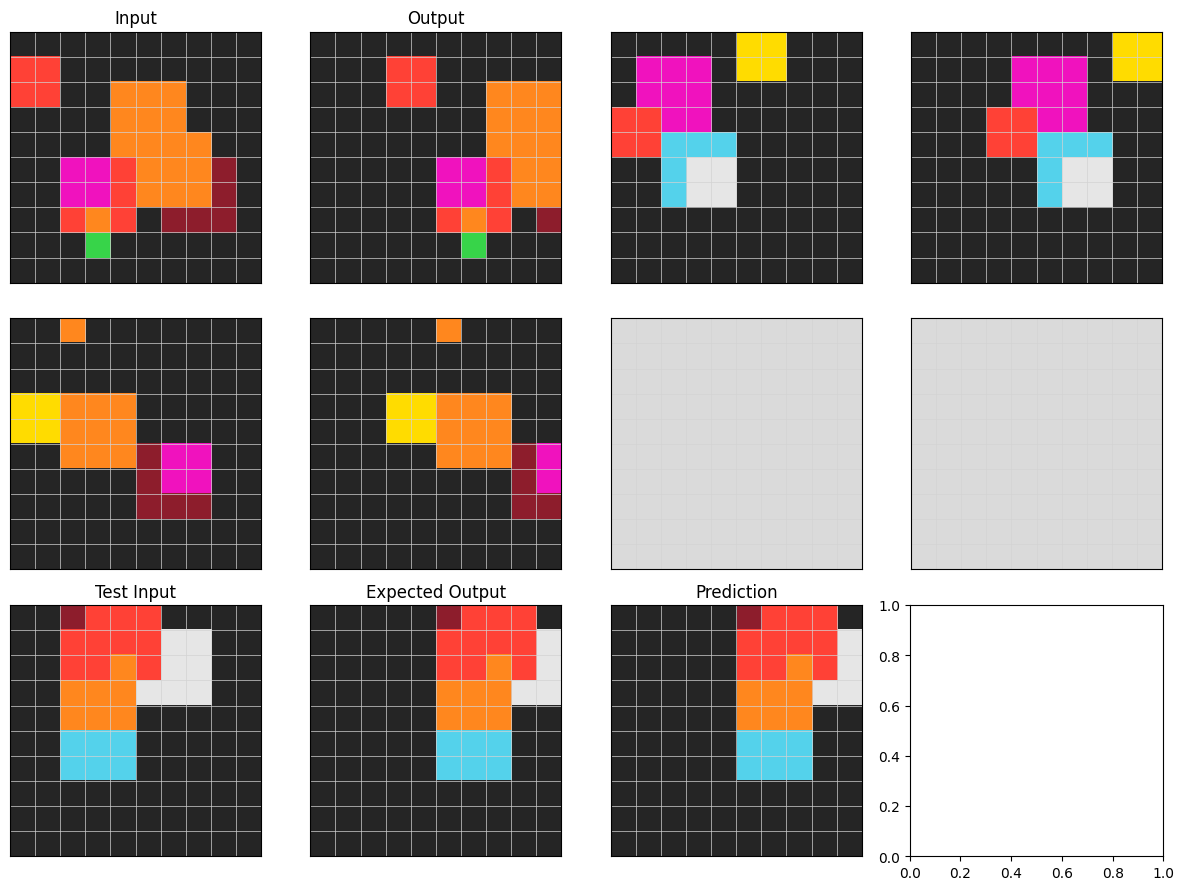

torch.Size([1, 10, 10])


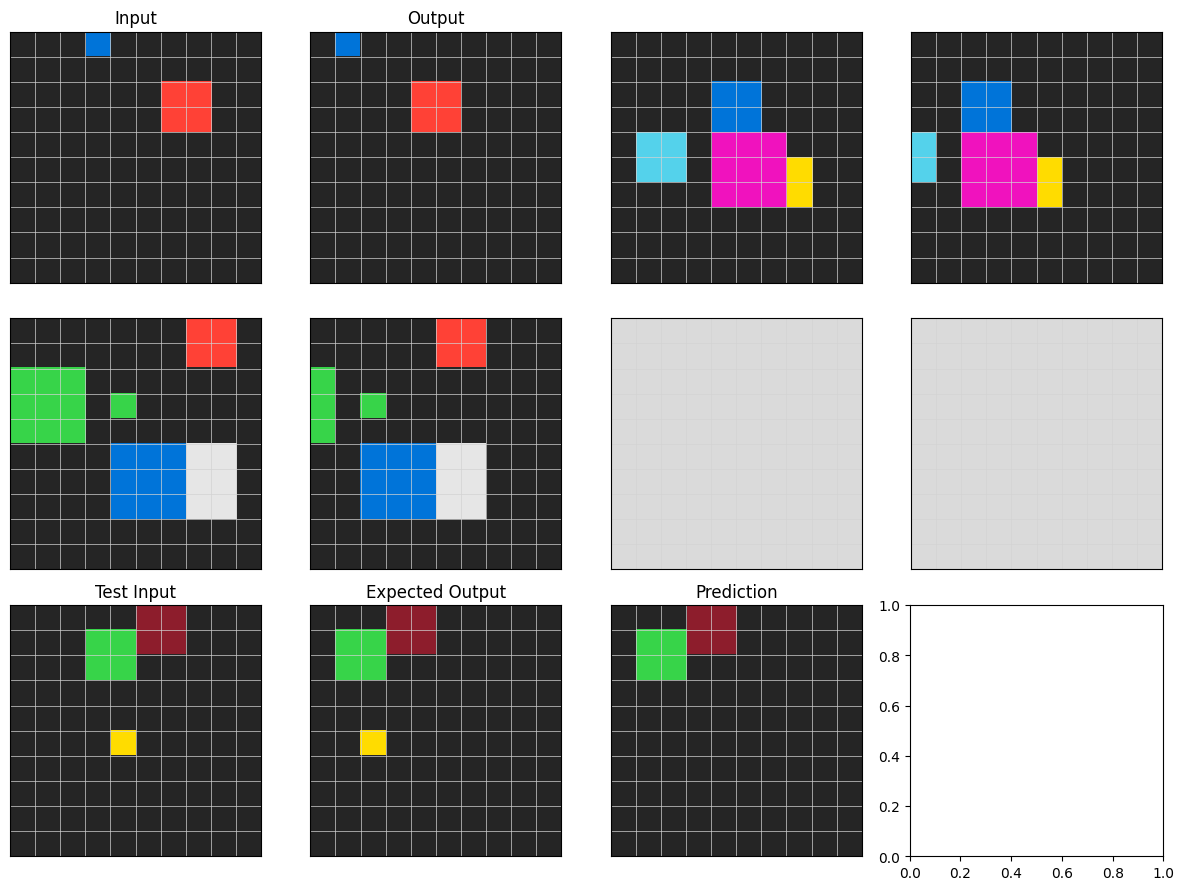

torch.Size([1, 10, 10])


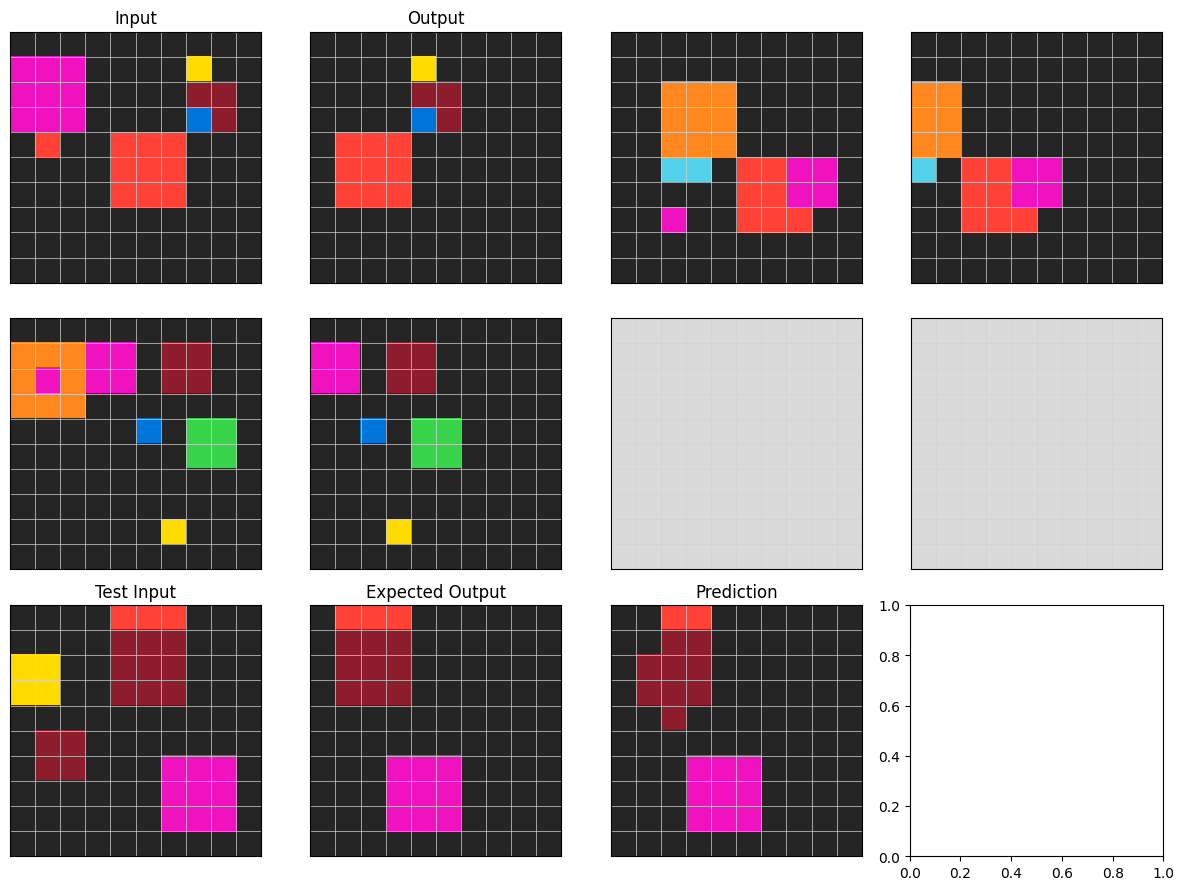

torch.Size([1, 10, 10])


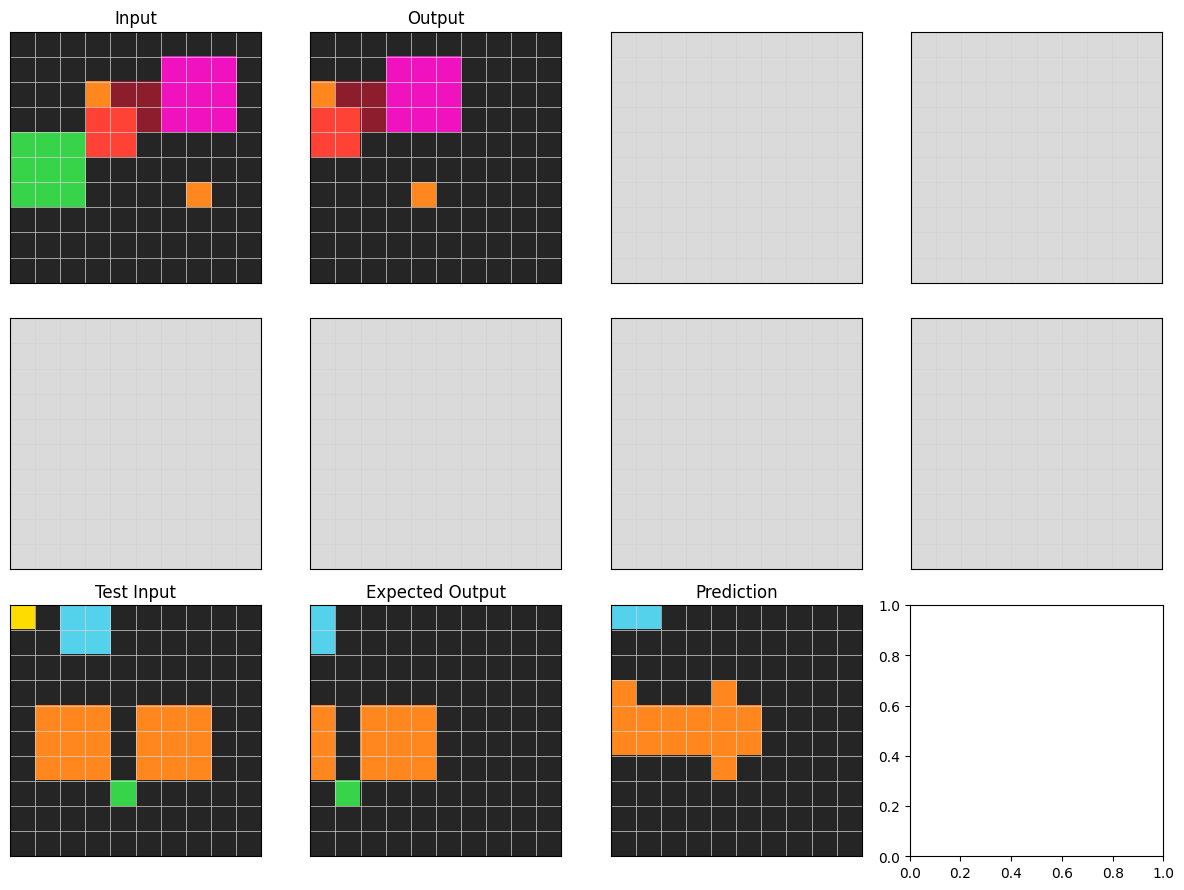

torch.Size([1, 10, 10])


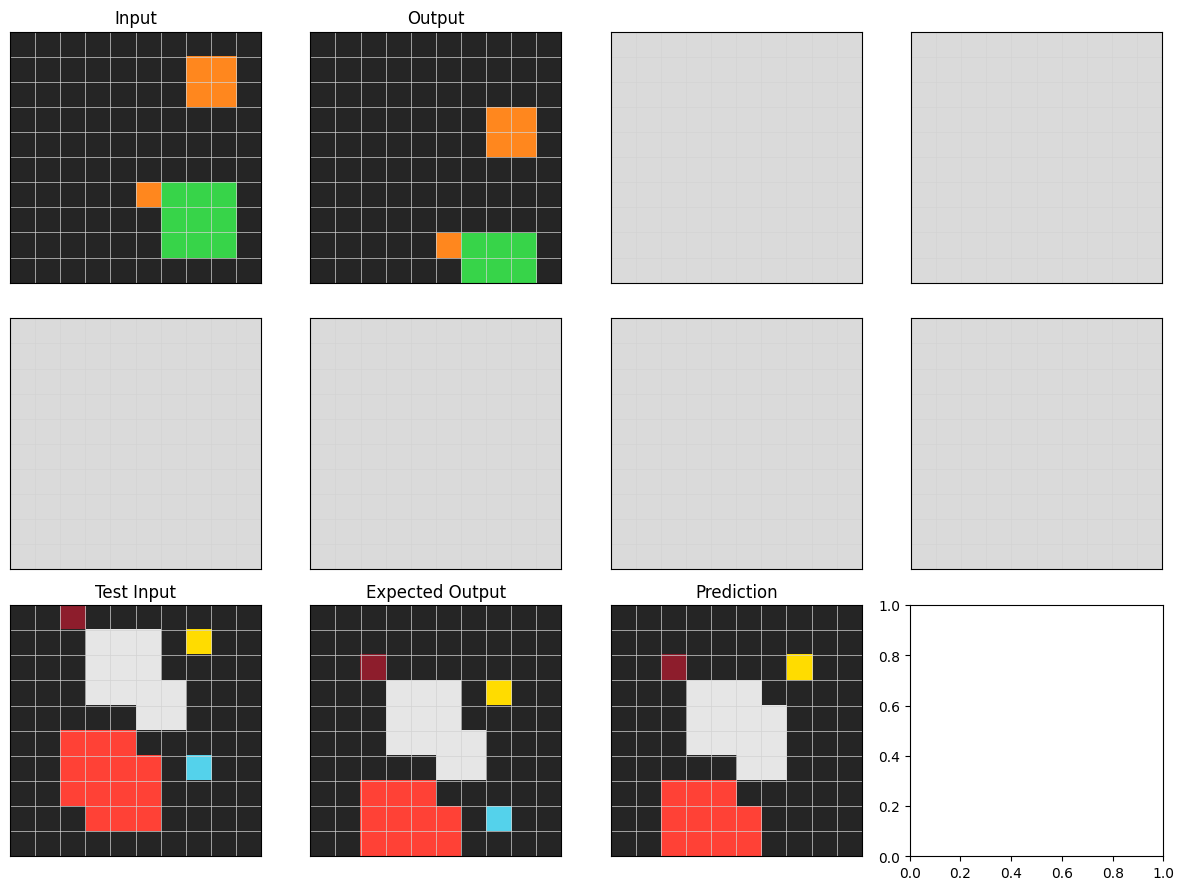

torch.Size([1, 10, 10])


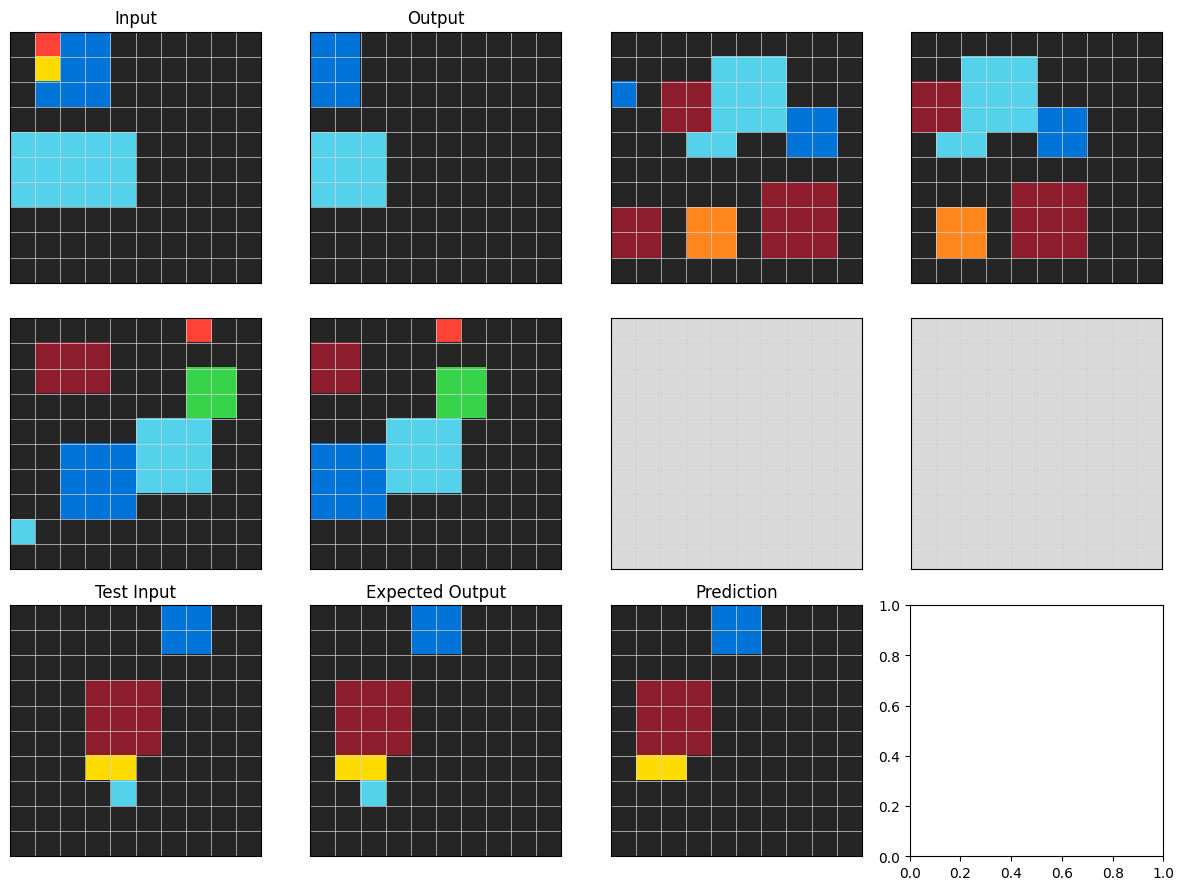

torch.Size([1, 10, 10])


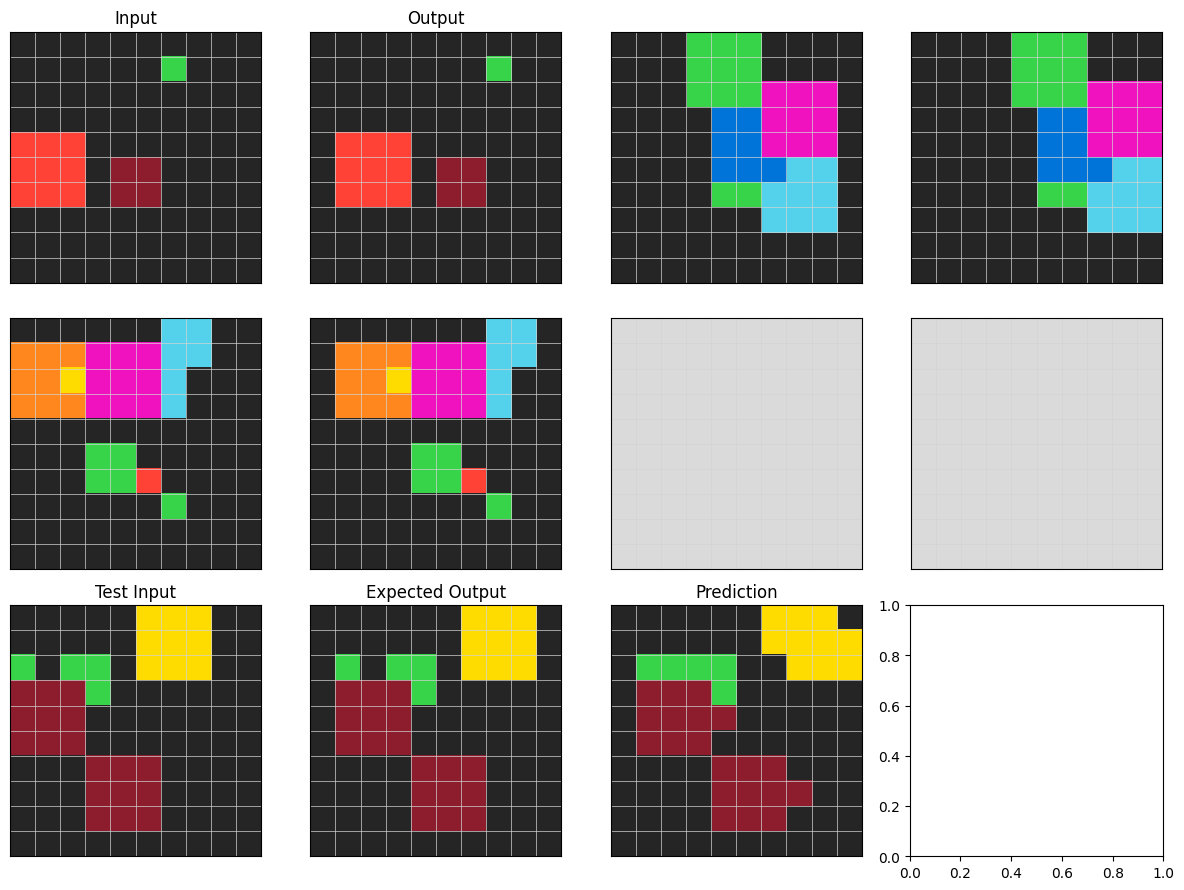

torch.Size([1, 10, 10])


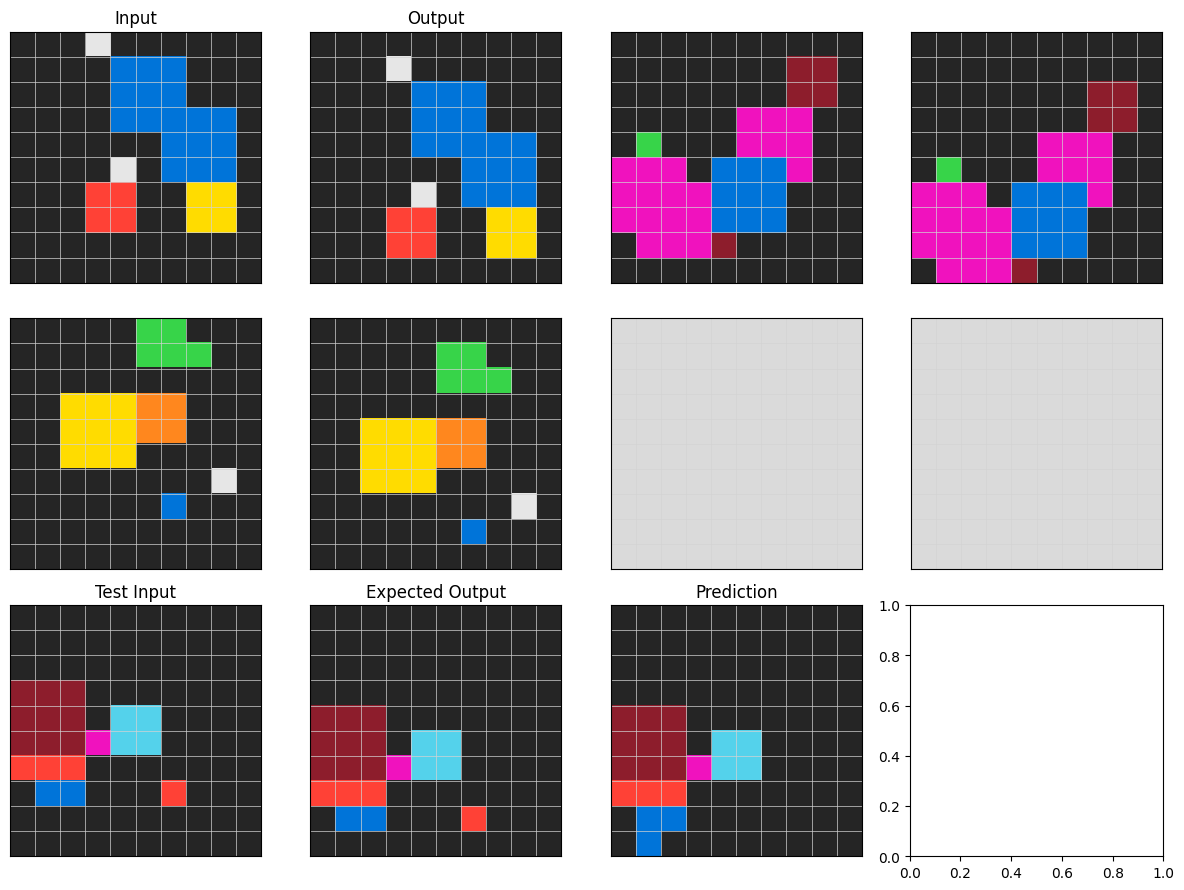

torch.Size([1, 10, 10])


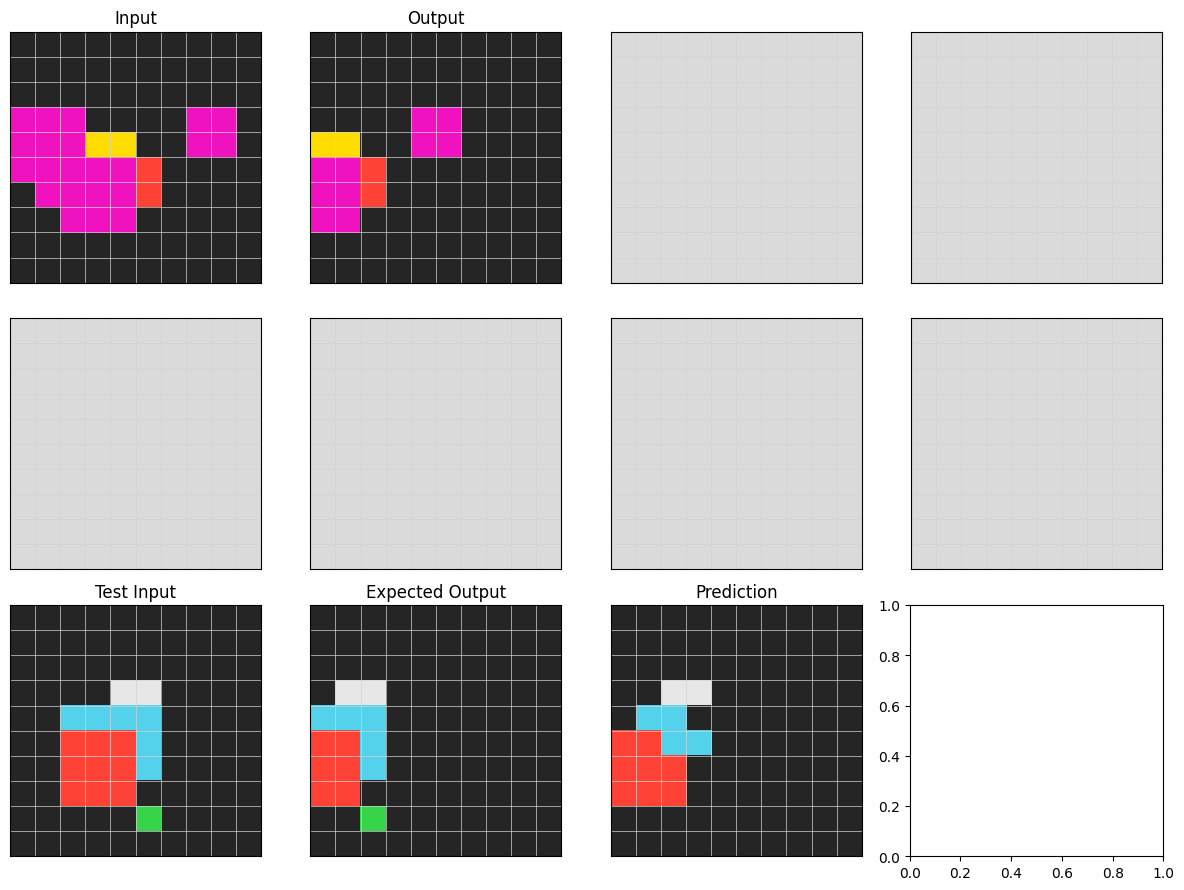

torch.Size([1, 10, 10])


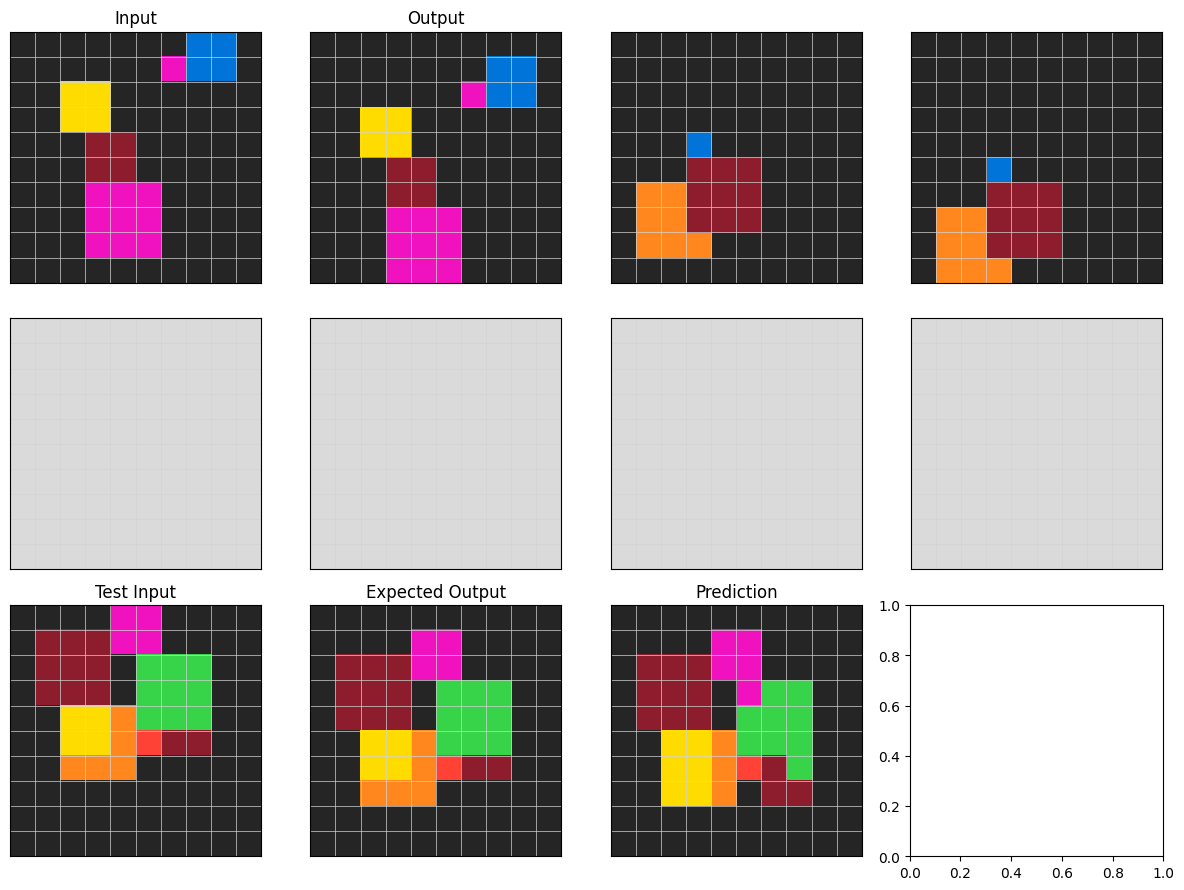

torch.Size([1, 10, 10])


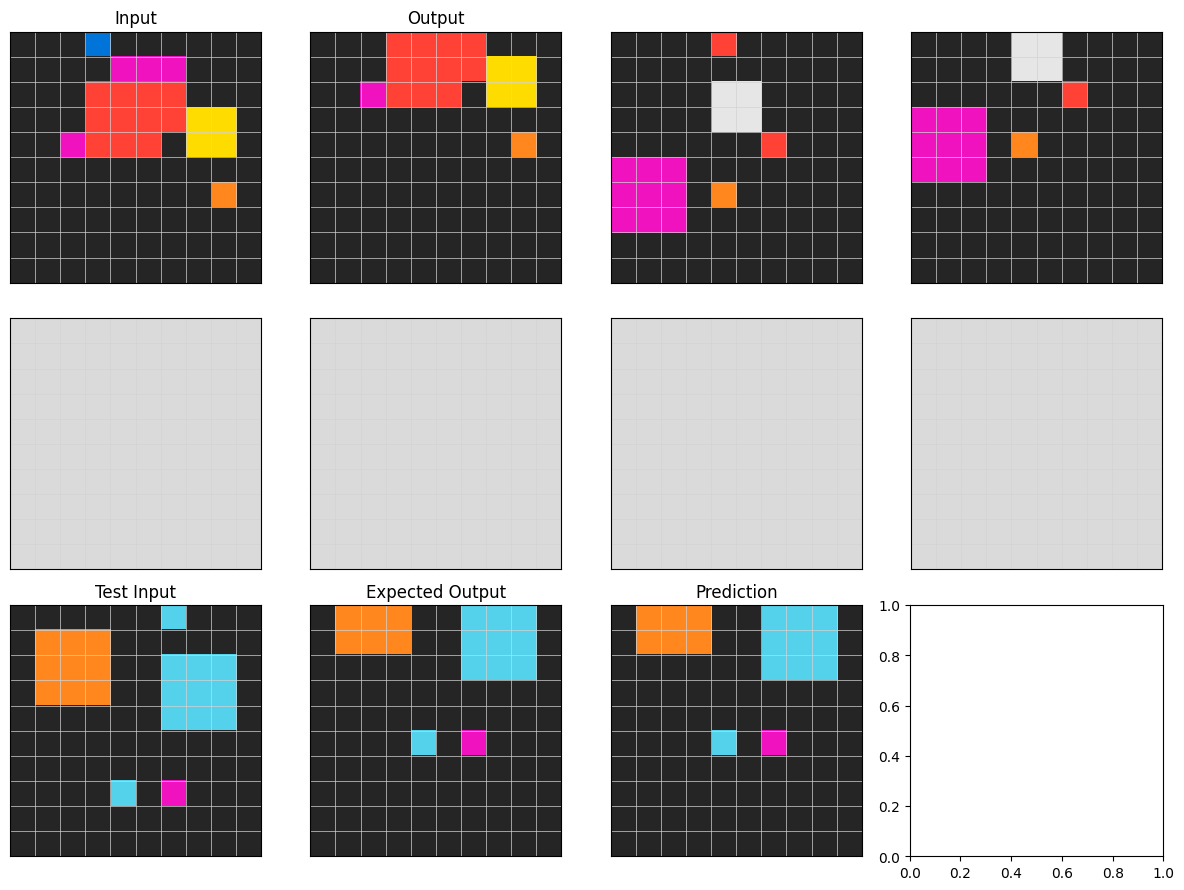

torch.Size([1, 10, 10])


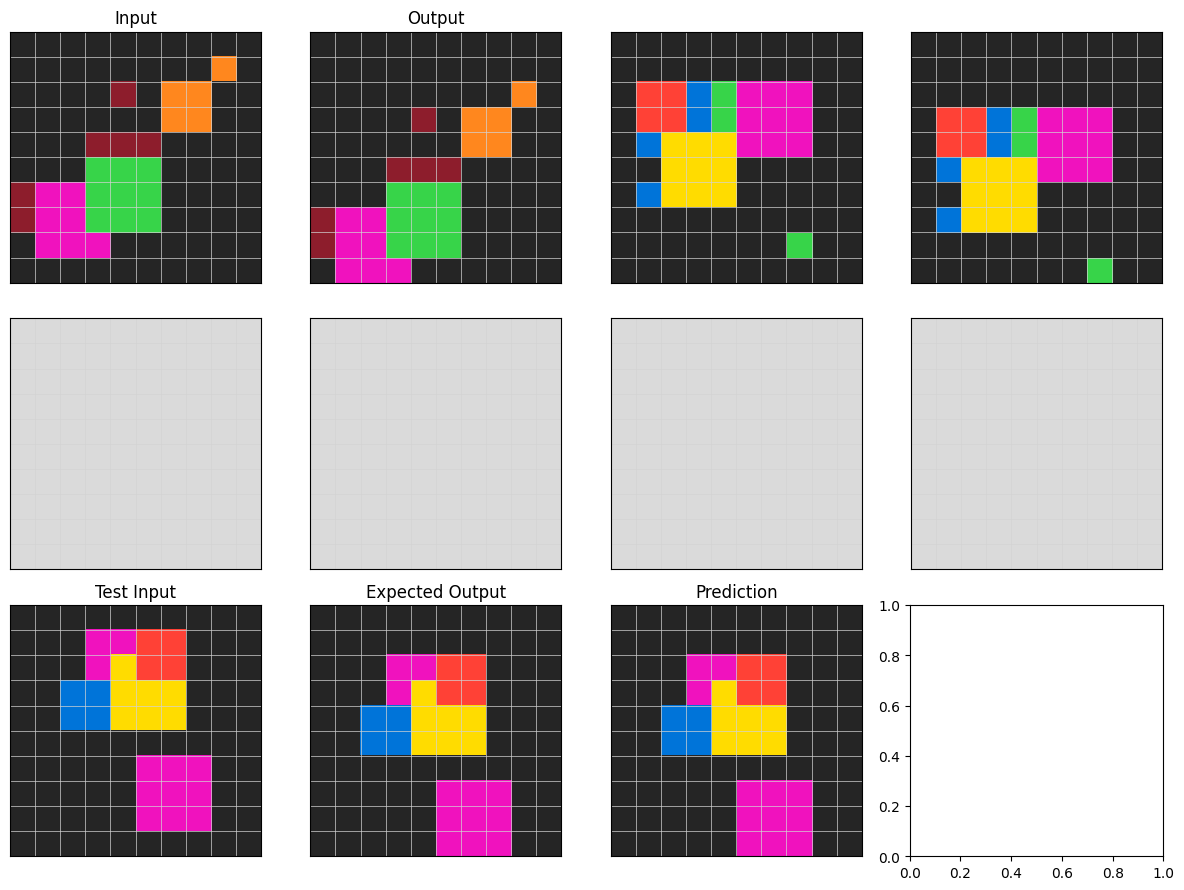

torch.Size([1, 10, 10])


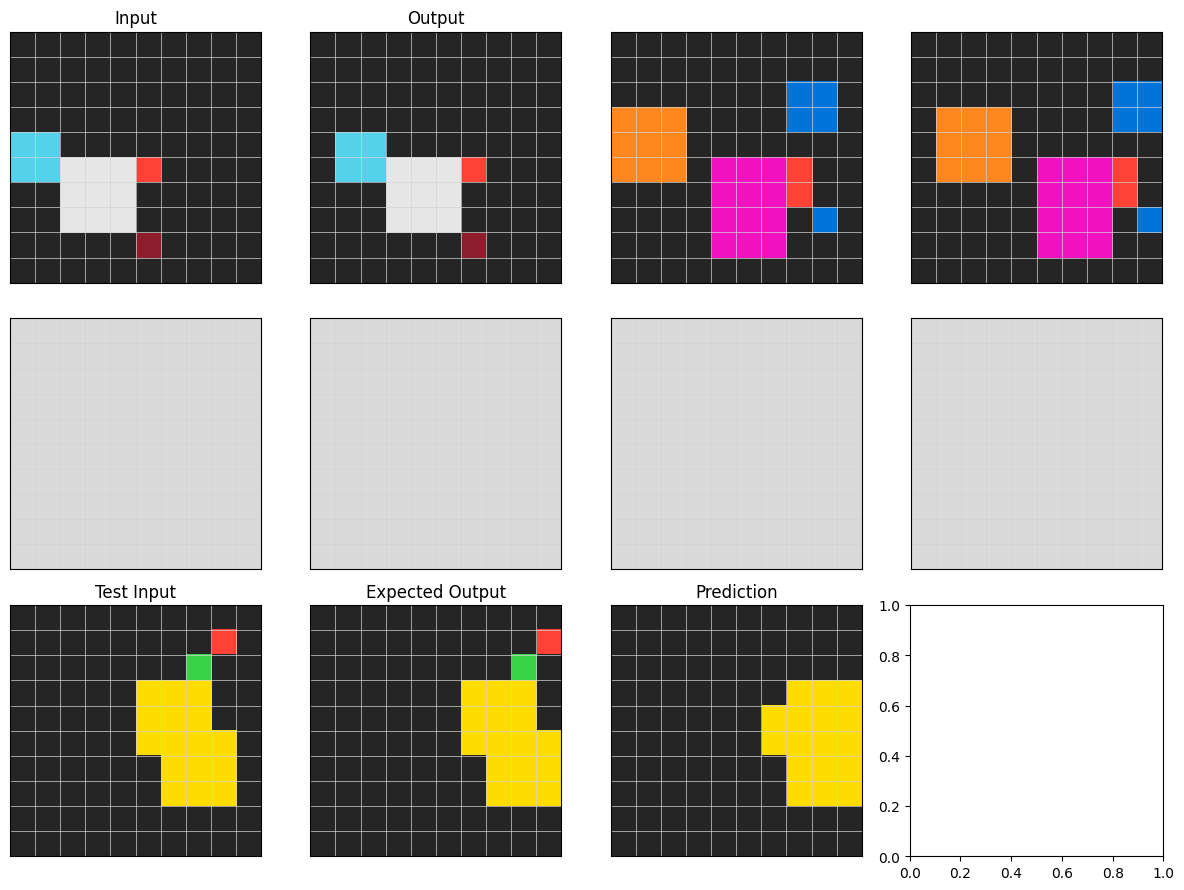

torch.Size([1, 10, 10])


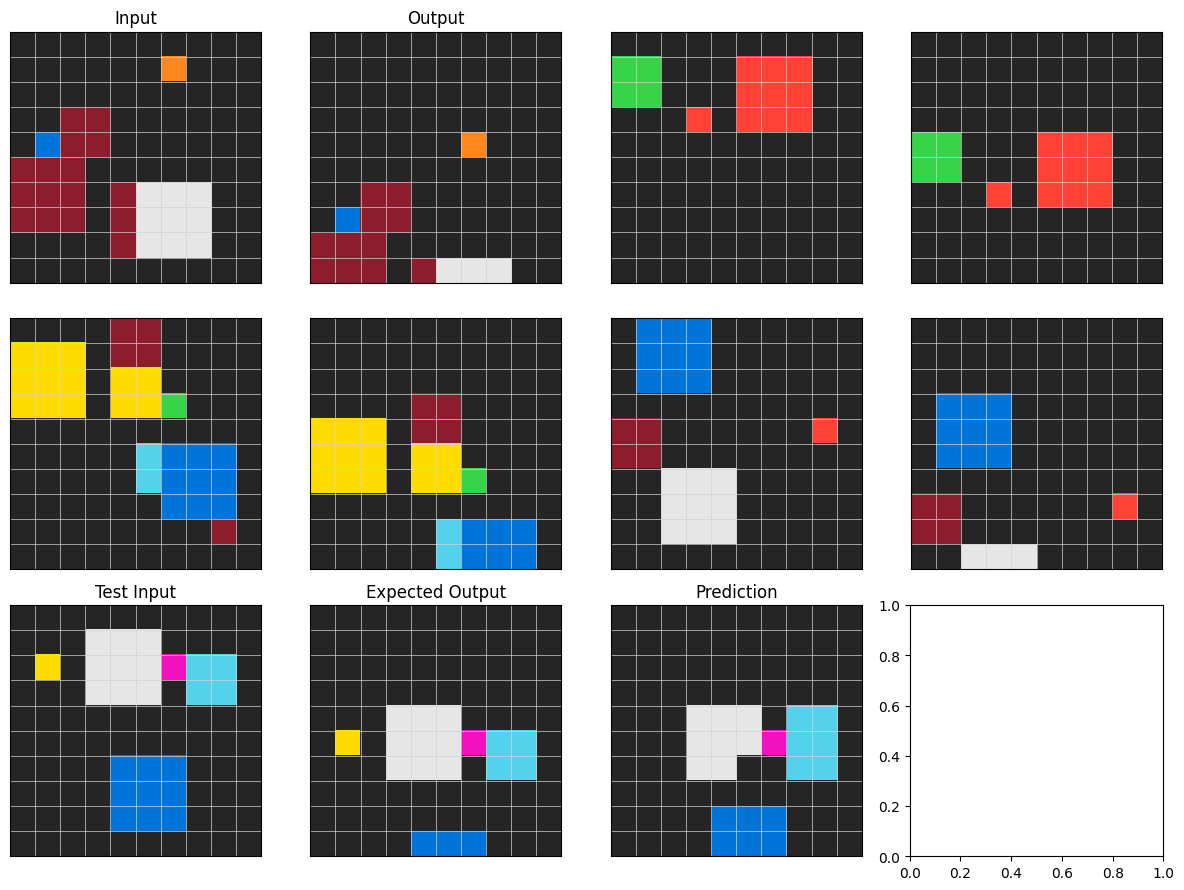

torch.Size([1, 10, 10])


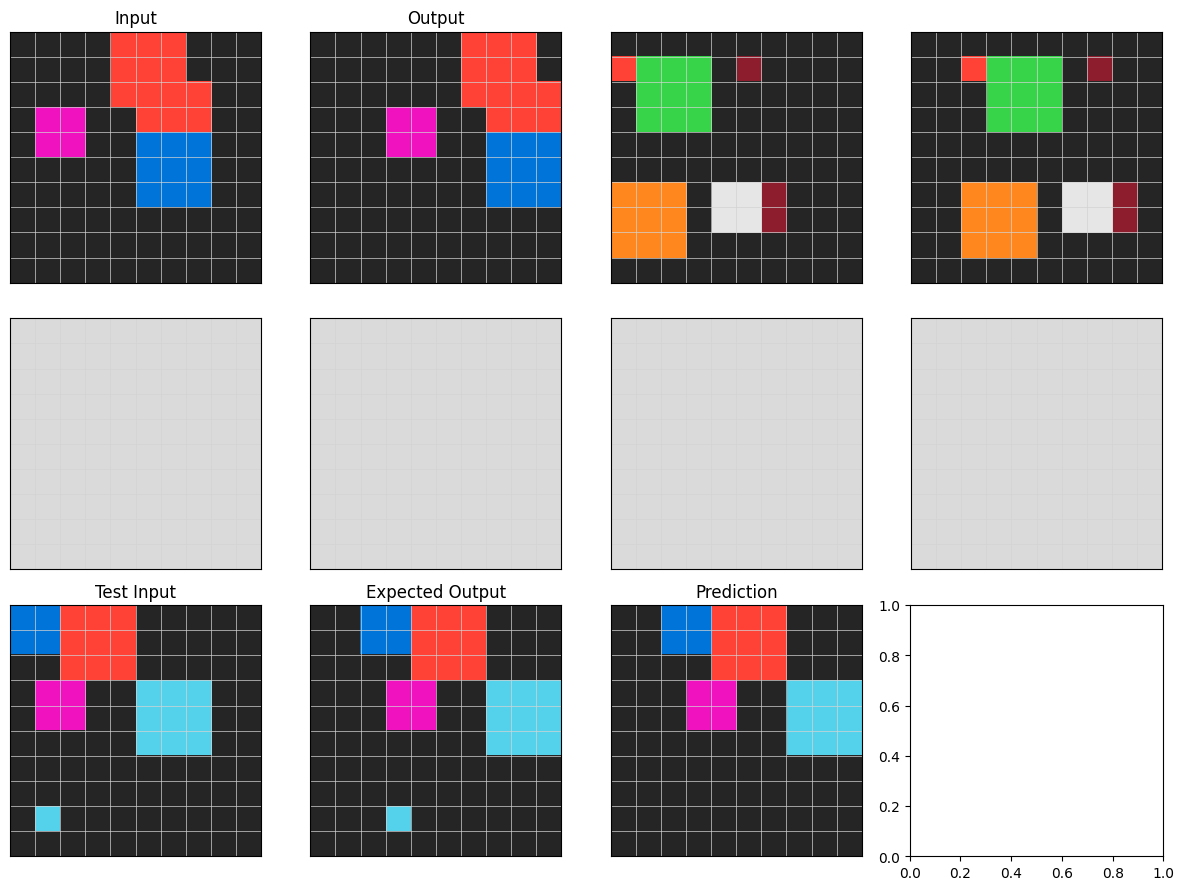

torch.Size([1, 10, 10])


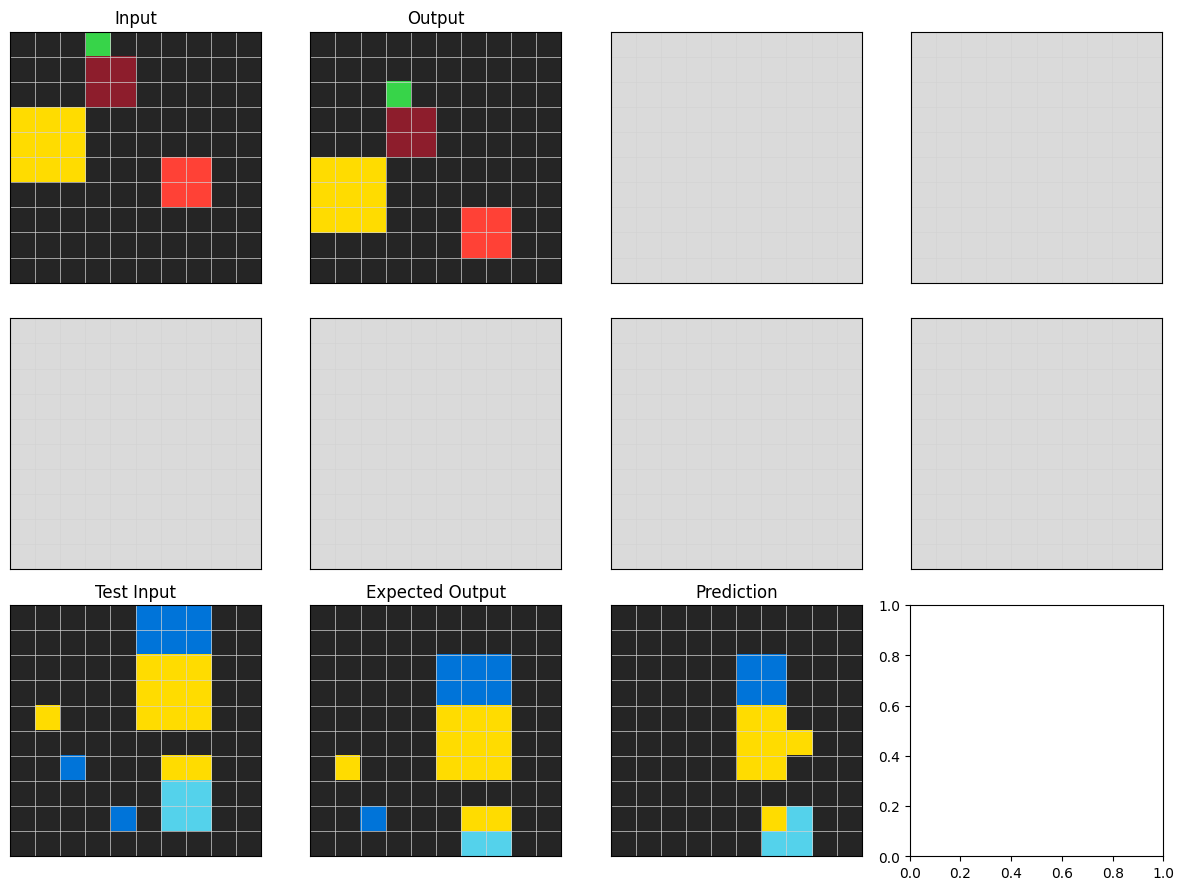

torch.Size([1, 10, 10])


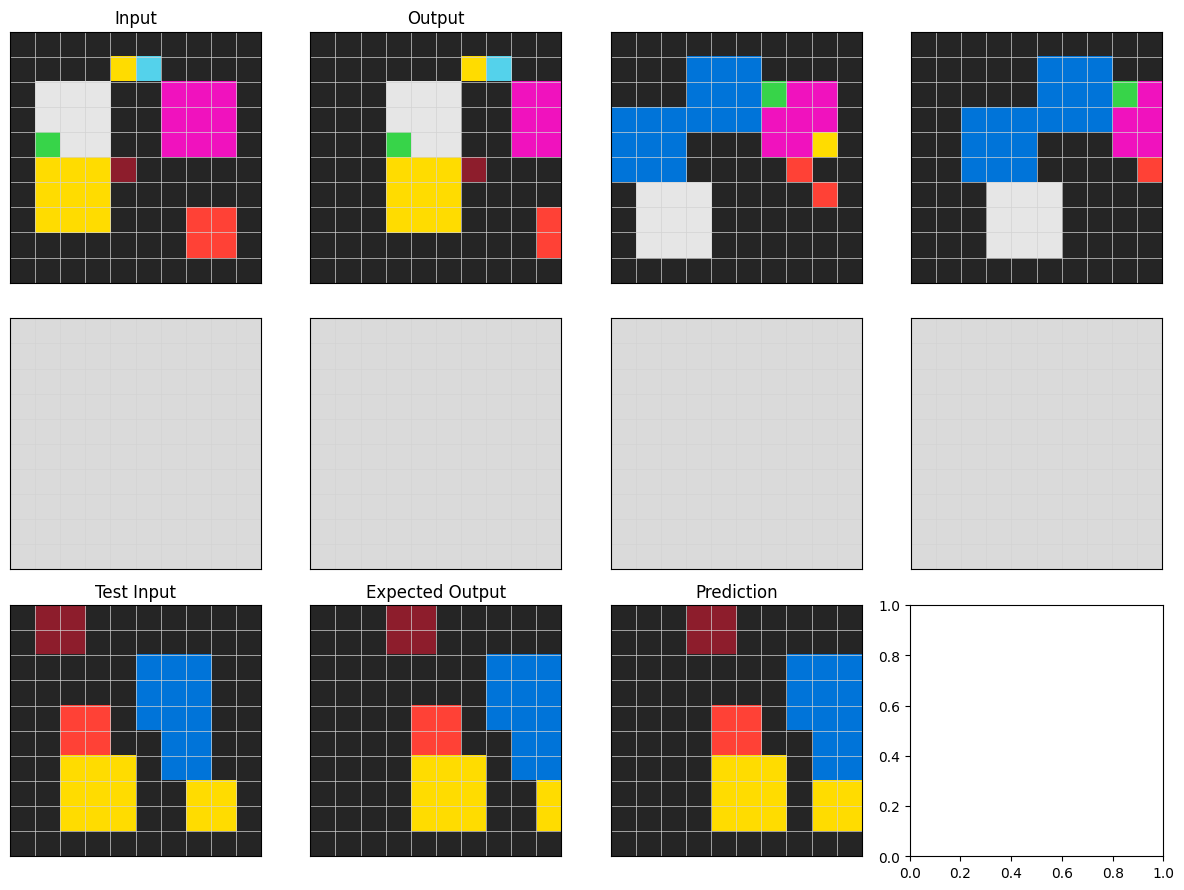

torch.Size([1, 10, 10])


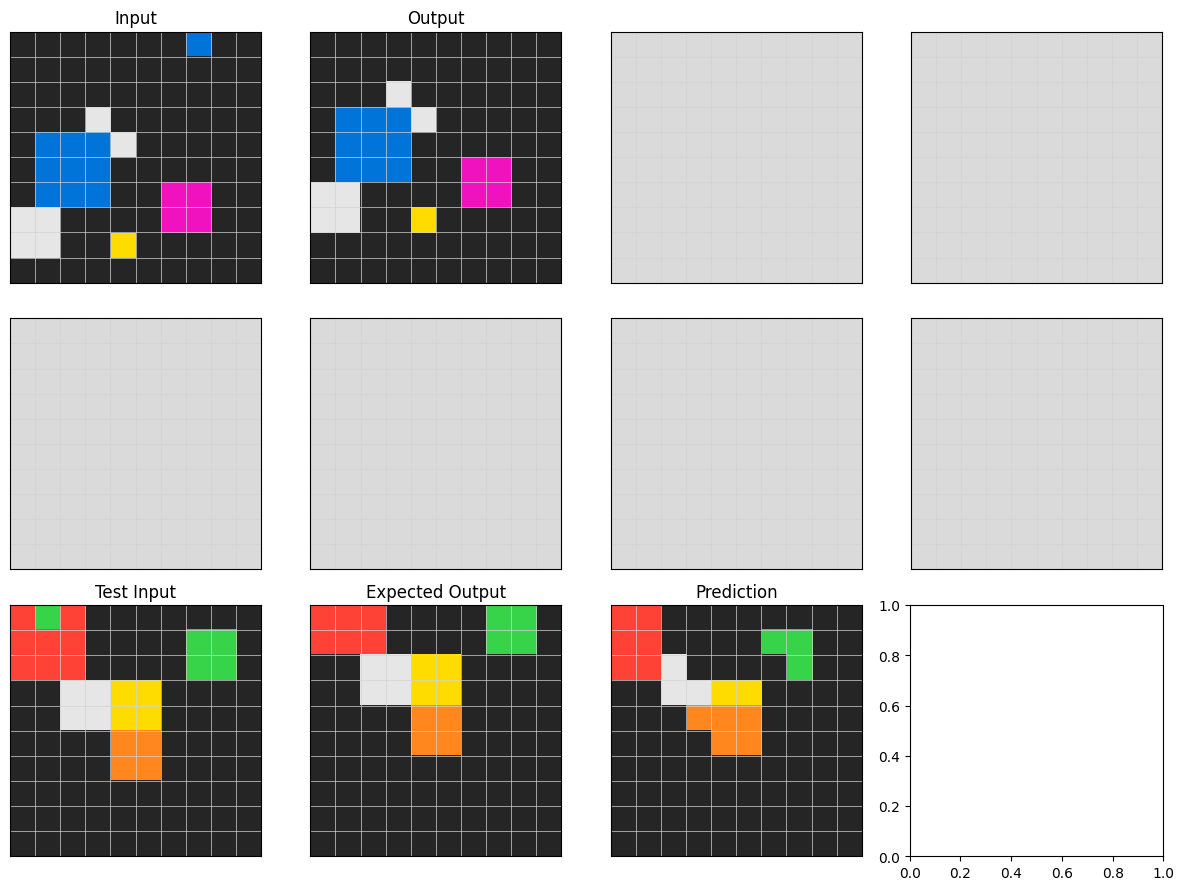

torch.Size([1, 10, 10])


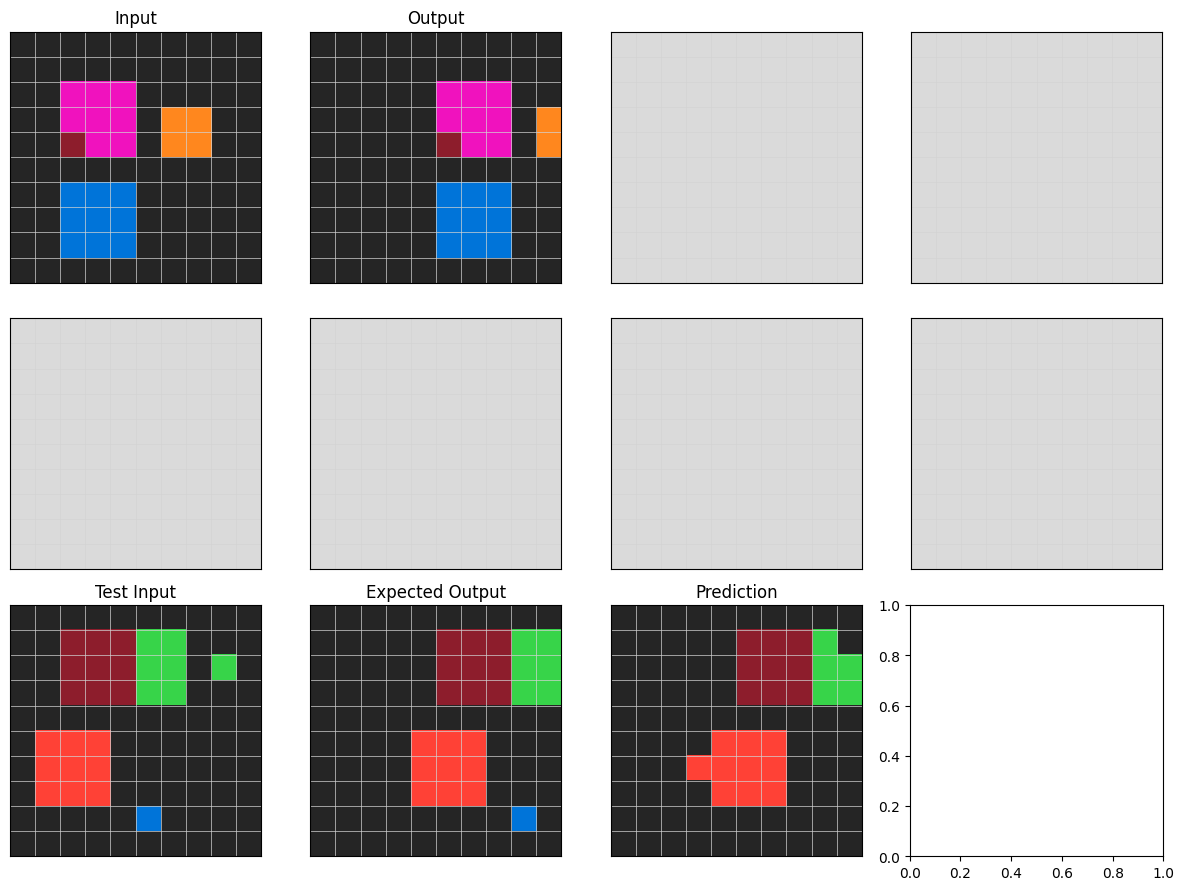

torch.Size([1, 10, 10])


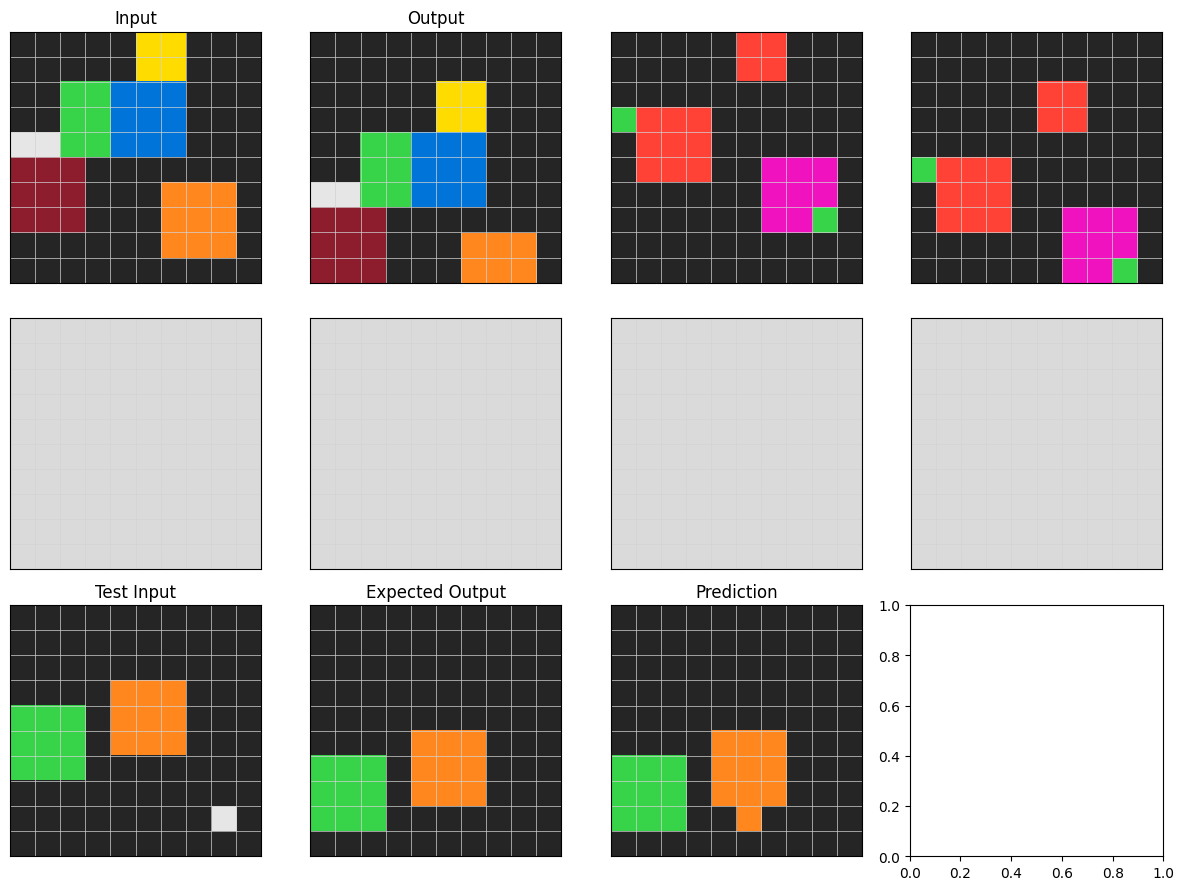

torch.Size([1, 10, 10])


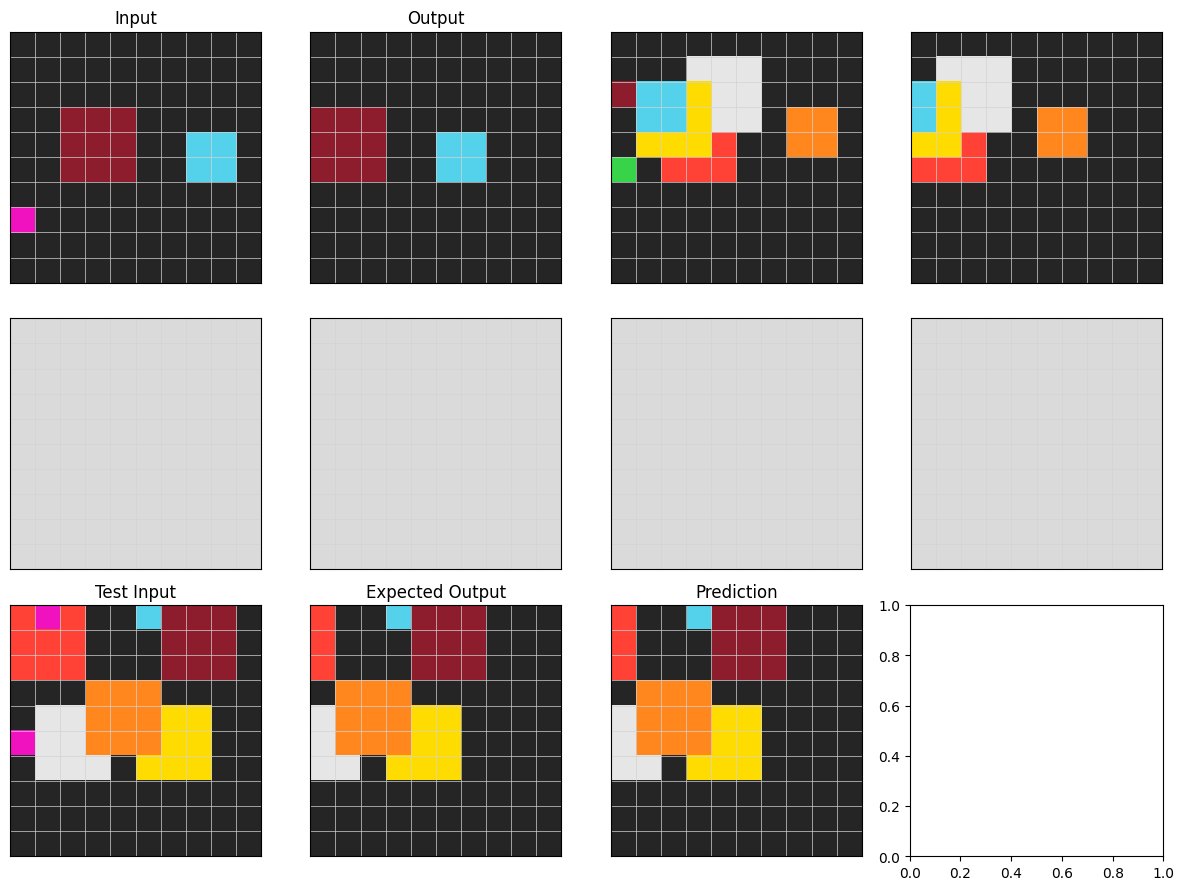

torch.Size([1, 10, 10])


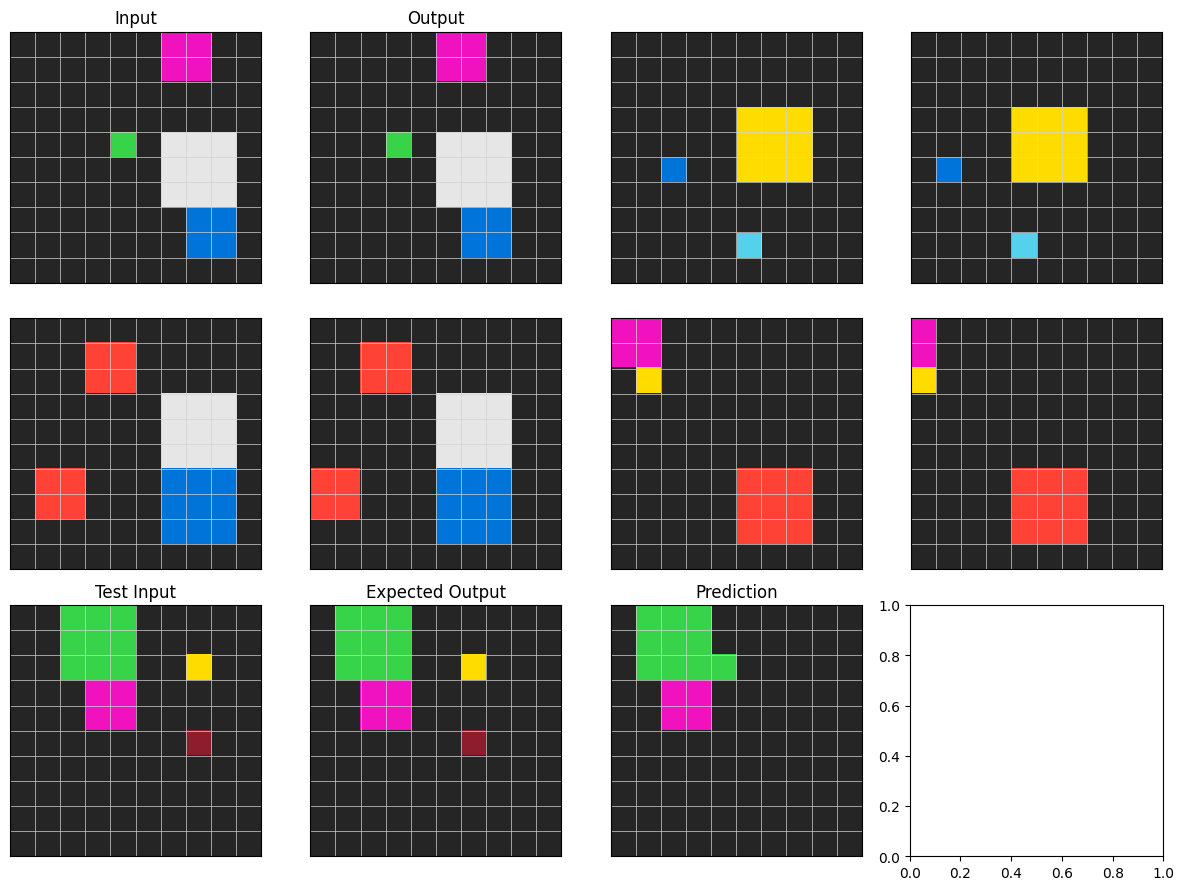

torch.Size([1, 10, 10])


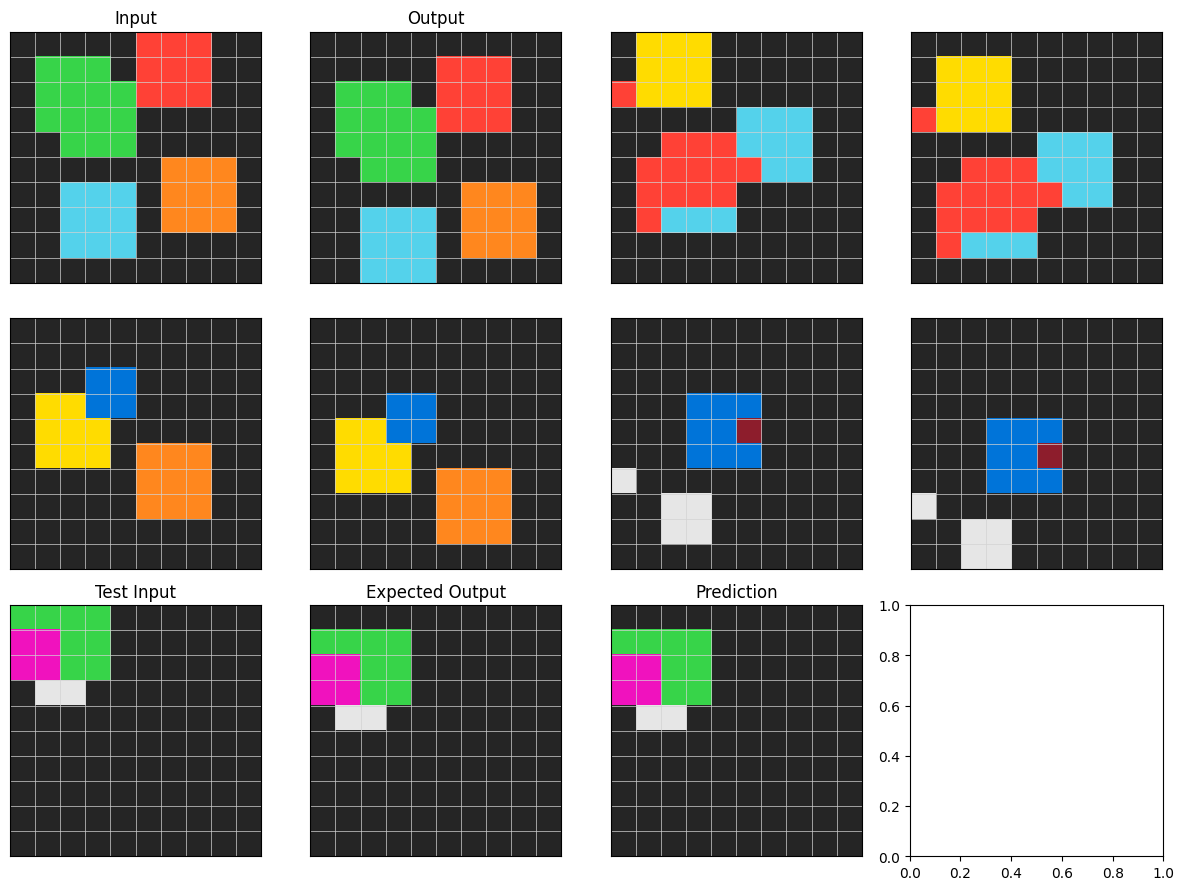

torch.Size([1, 10, 10])


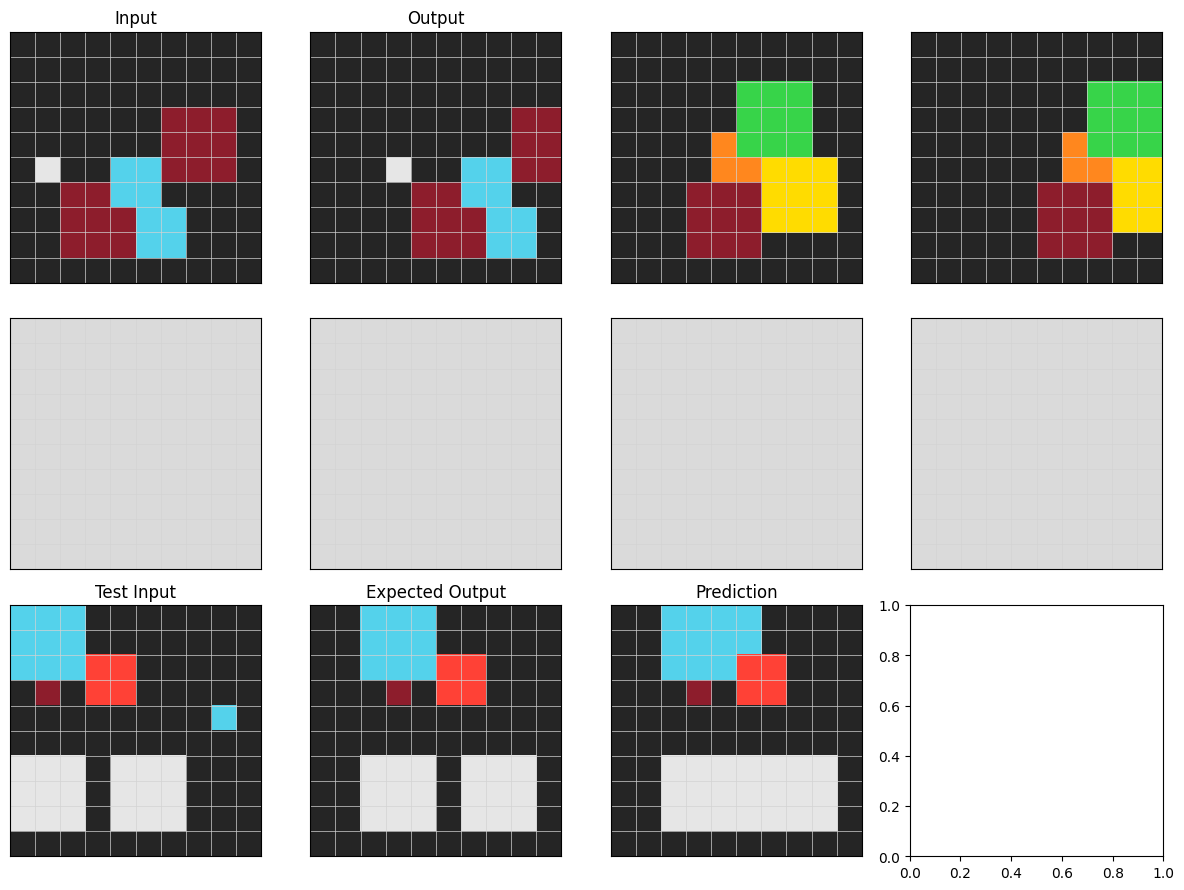

torch.Size([1, 10, 10])


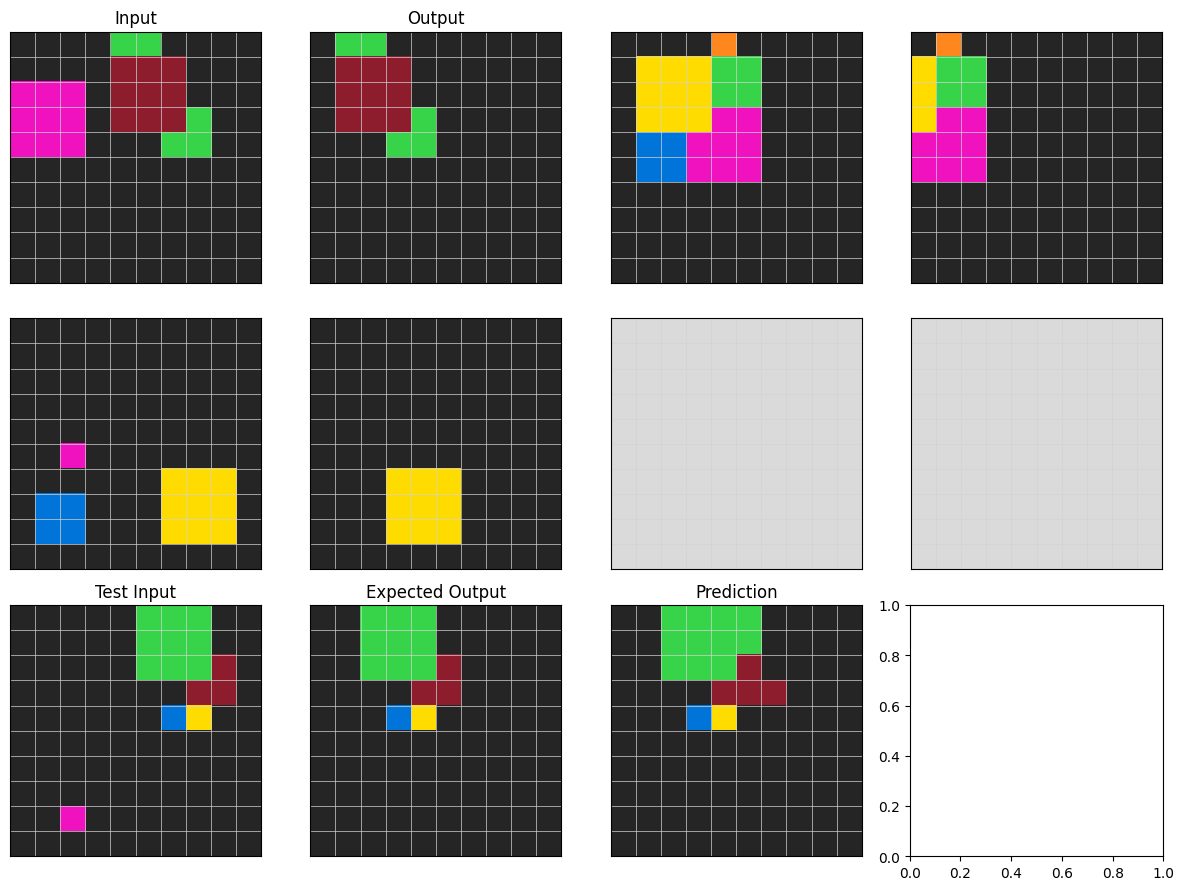

torch.Size([1, 10, 10])


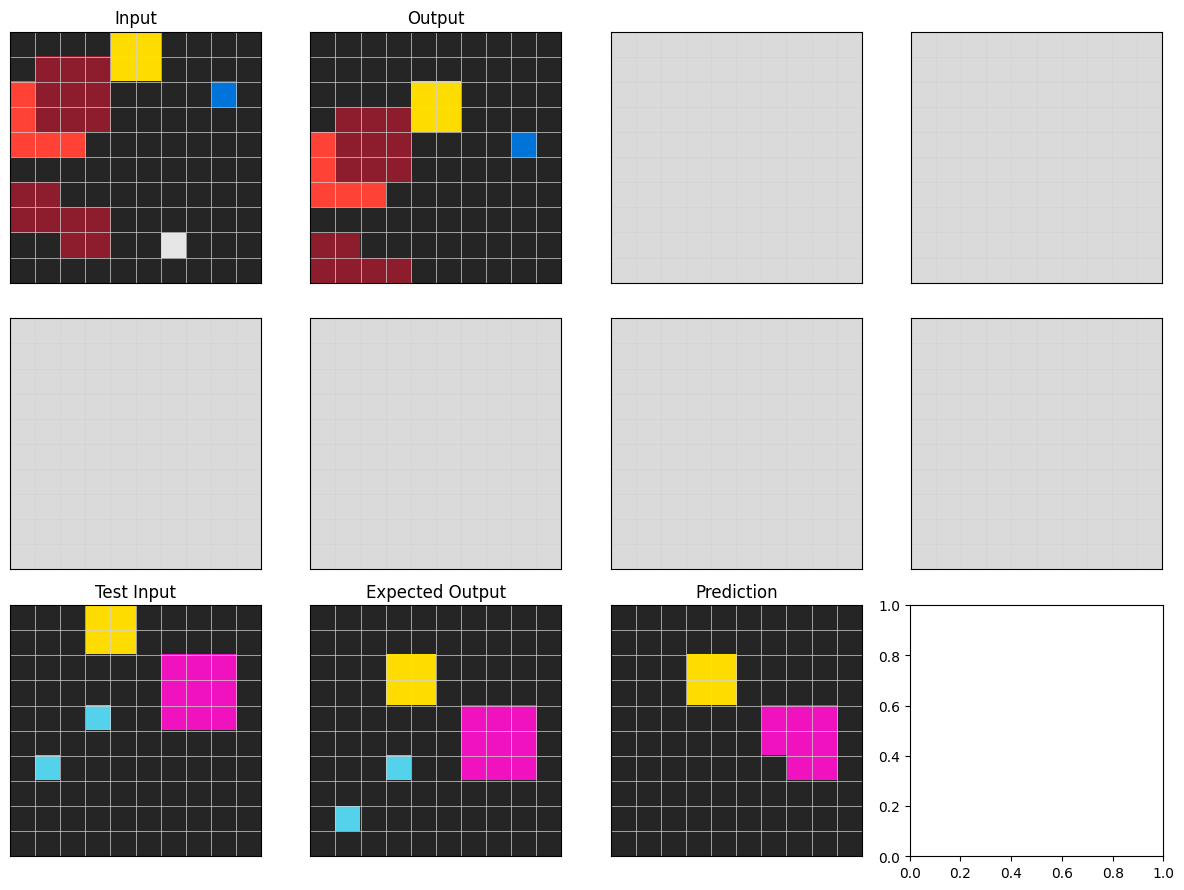

torch.Size([1, 10, 10])


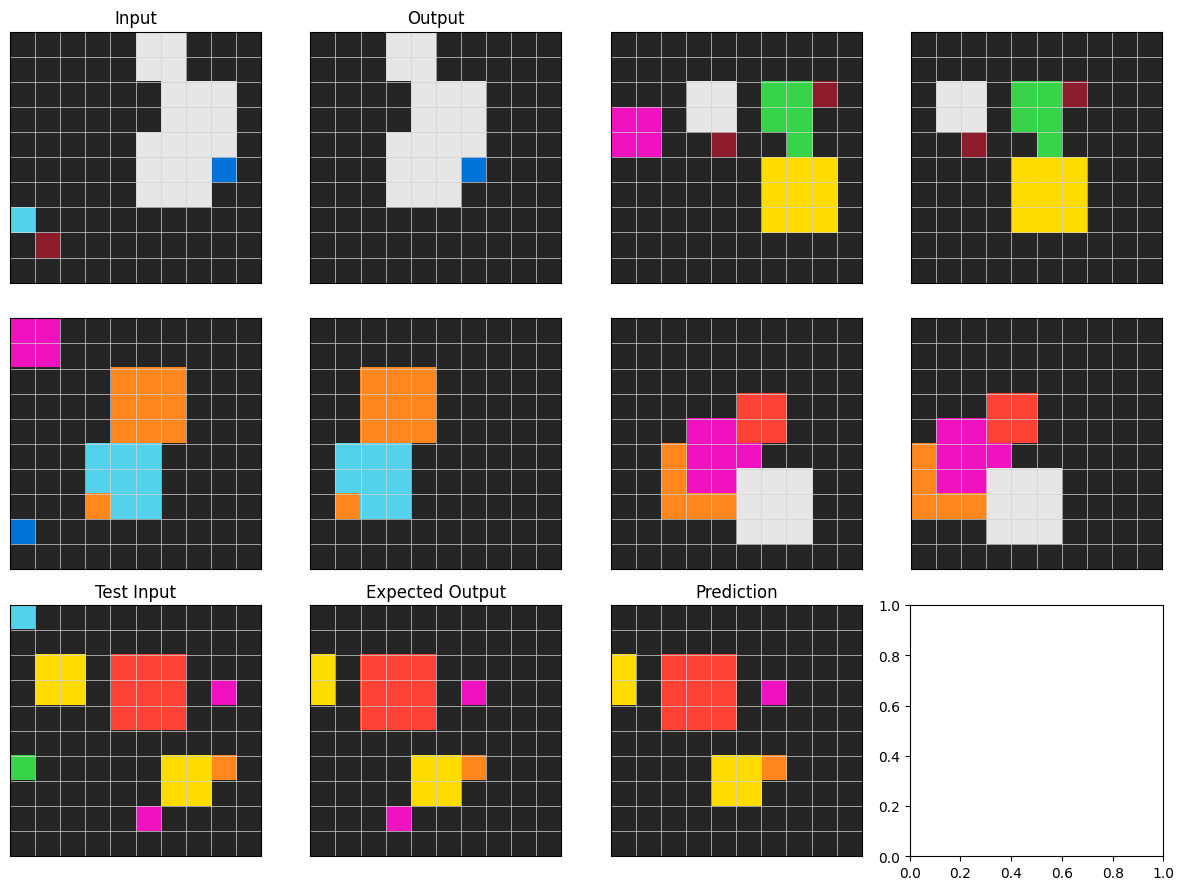

torch.Size([1, 10, 10])


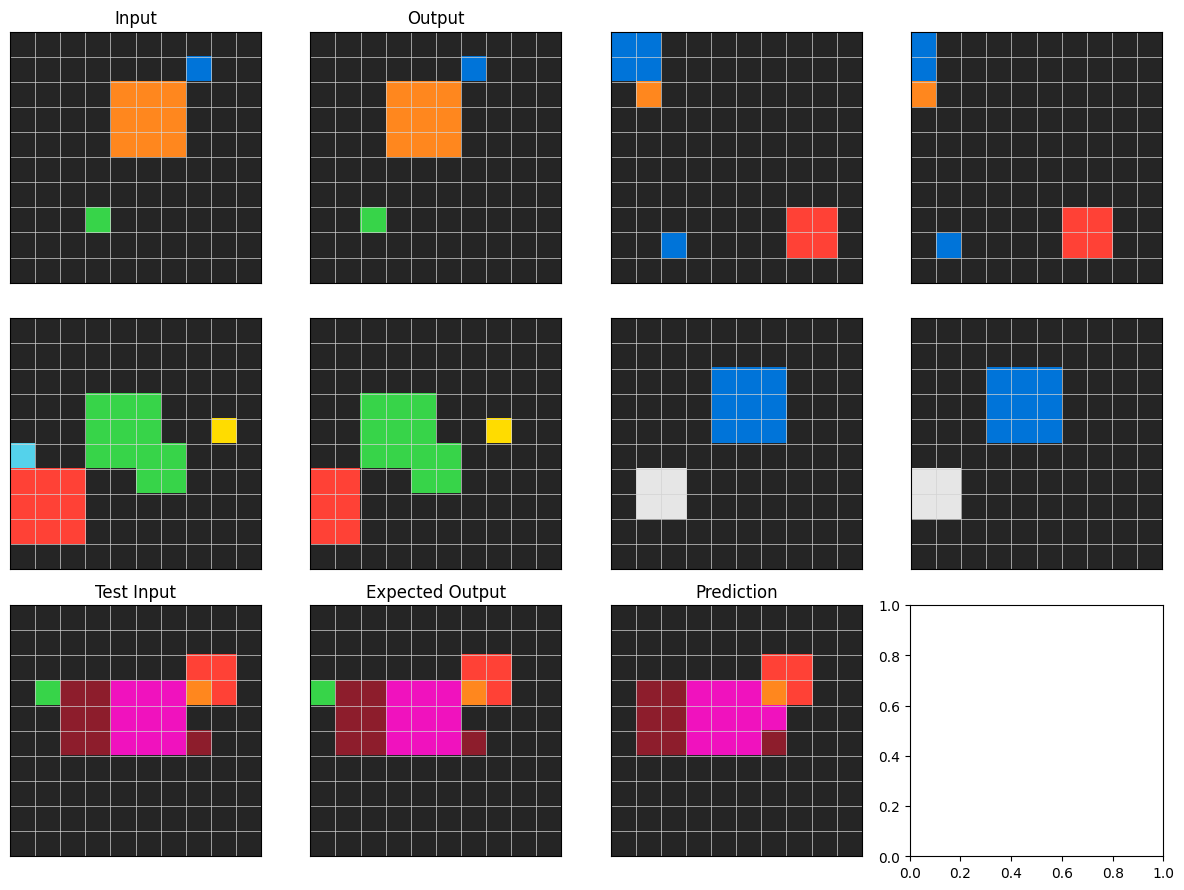

torch.Size([1, 10, 10])


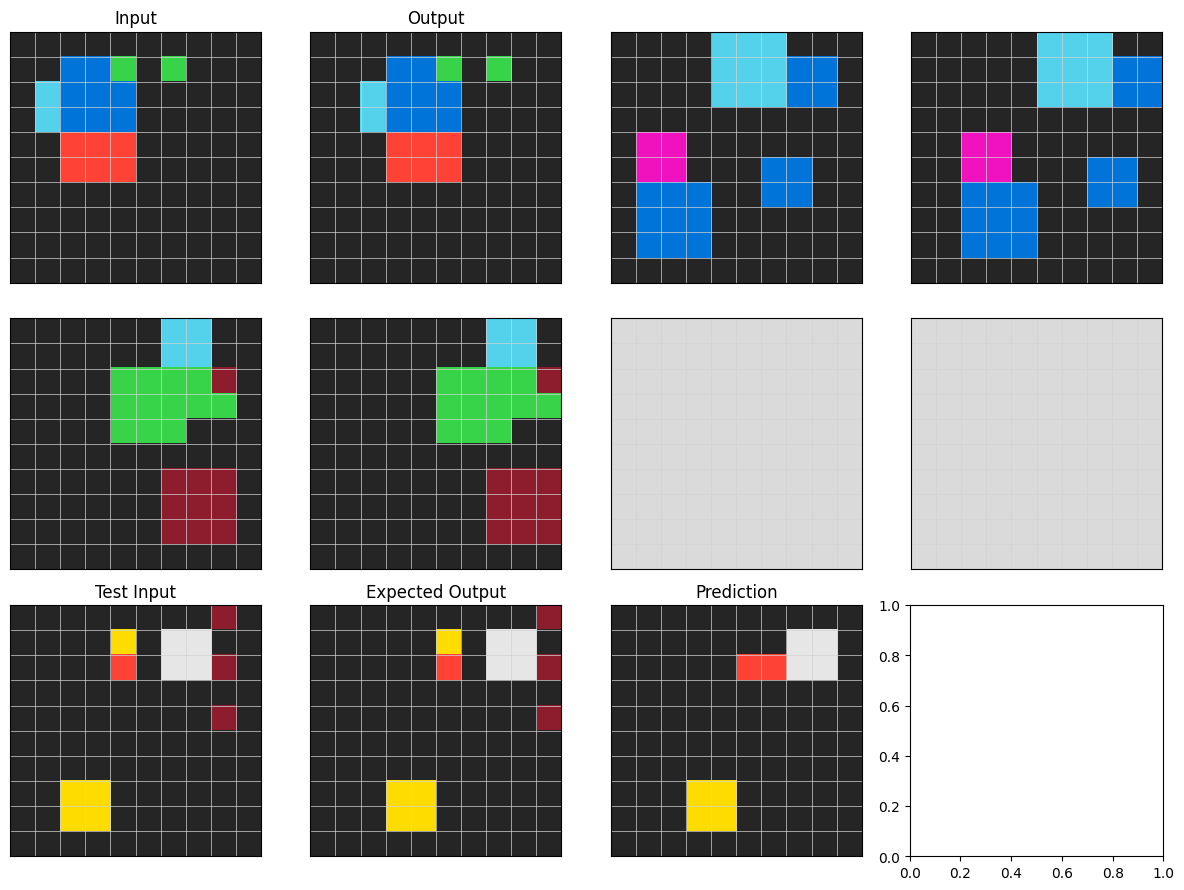

torch.Size([1, 10, 10])


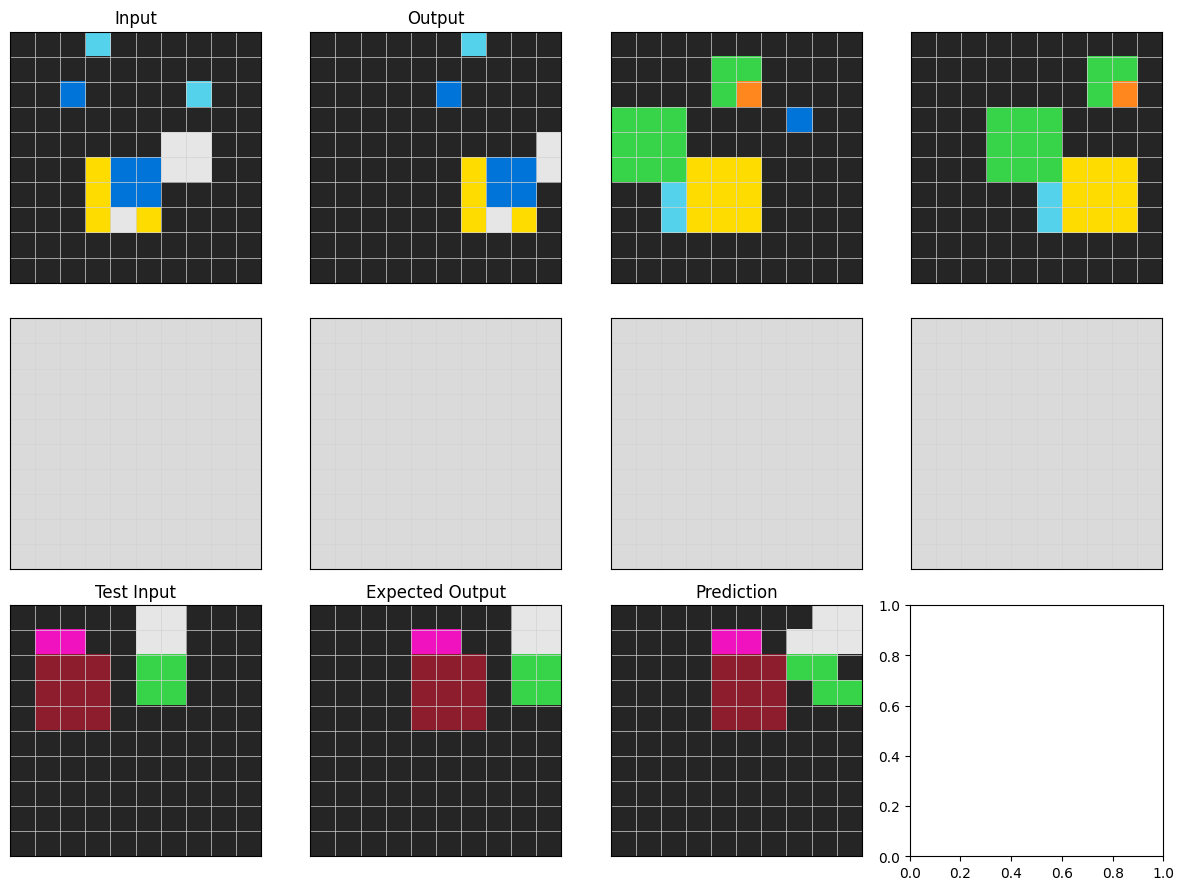

torch.Size([1, 10, 10])


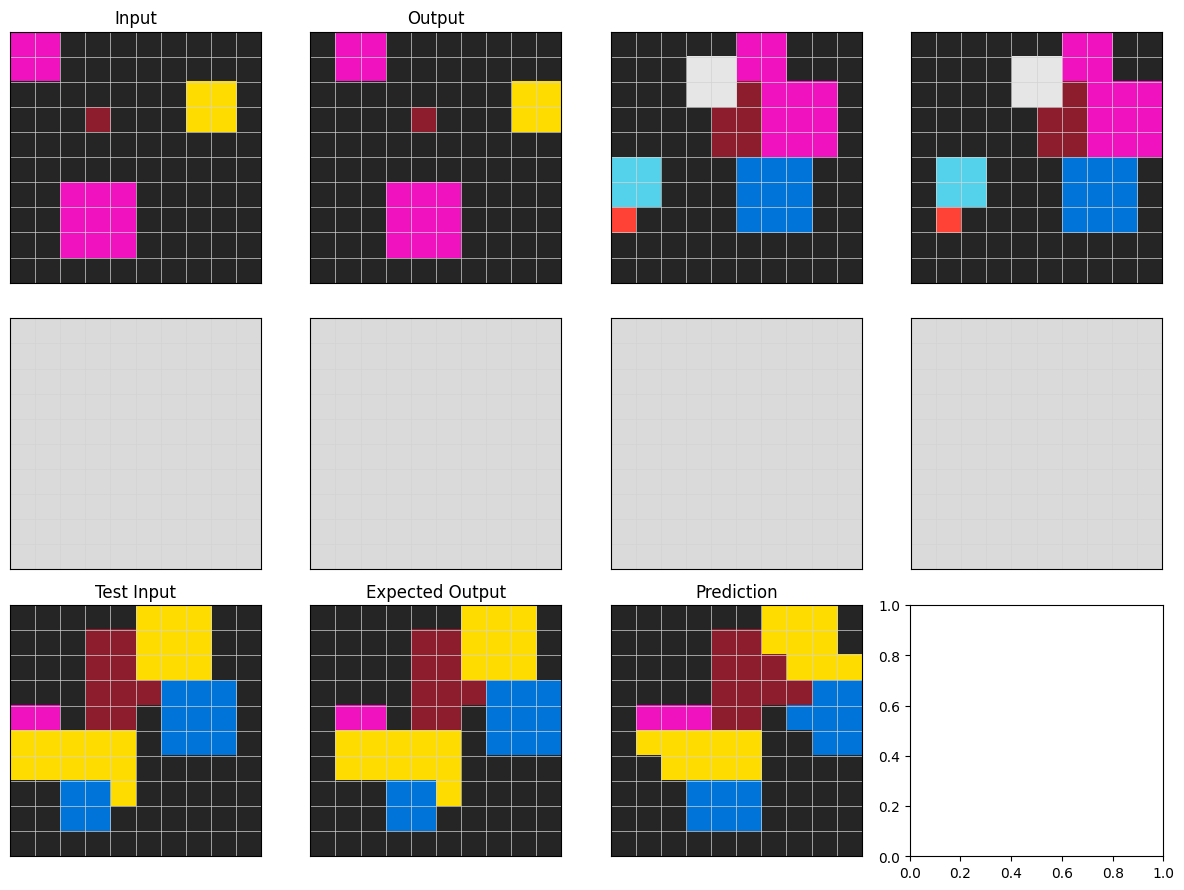

torch.Size([1, 10, 10])


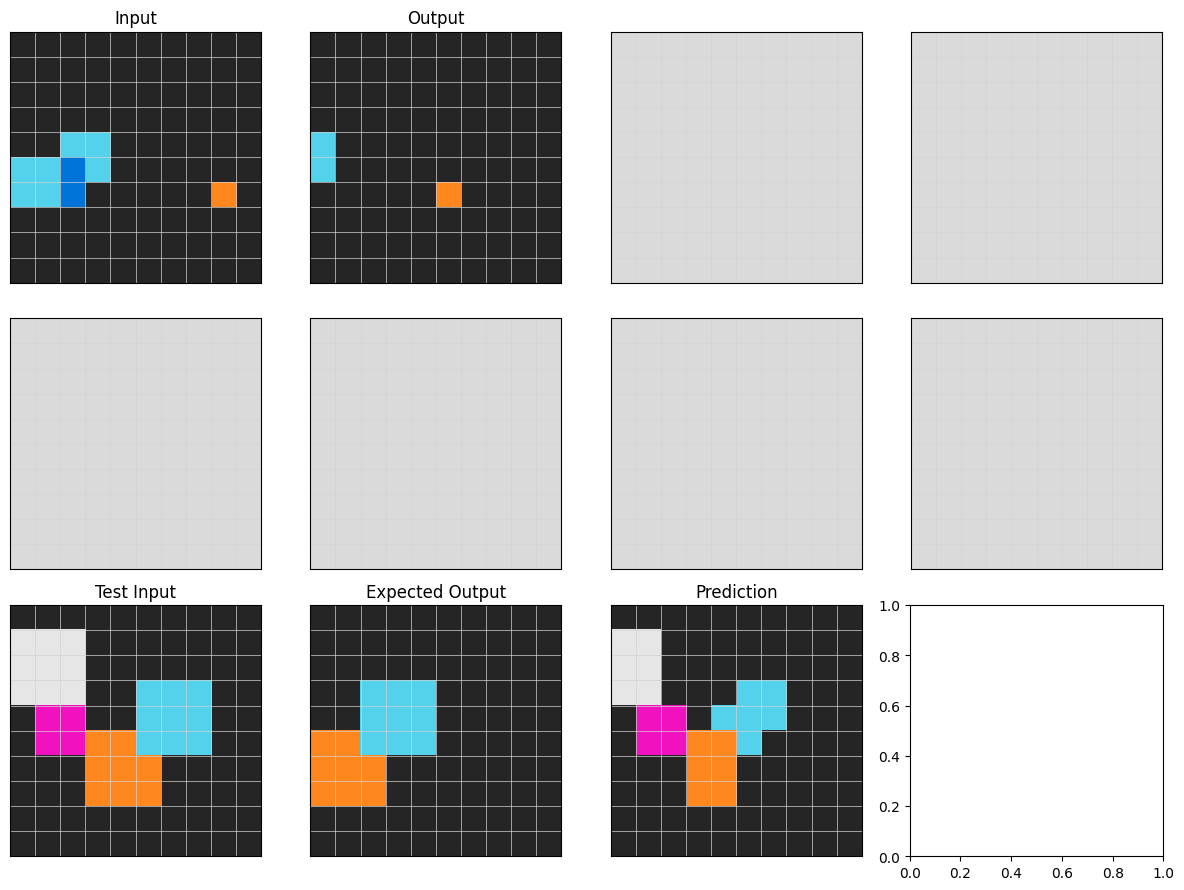

torch.Size([1, 10, 10])


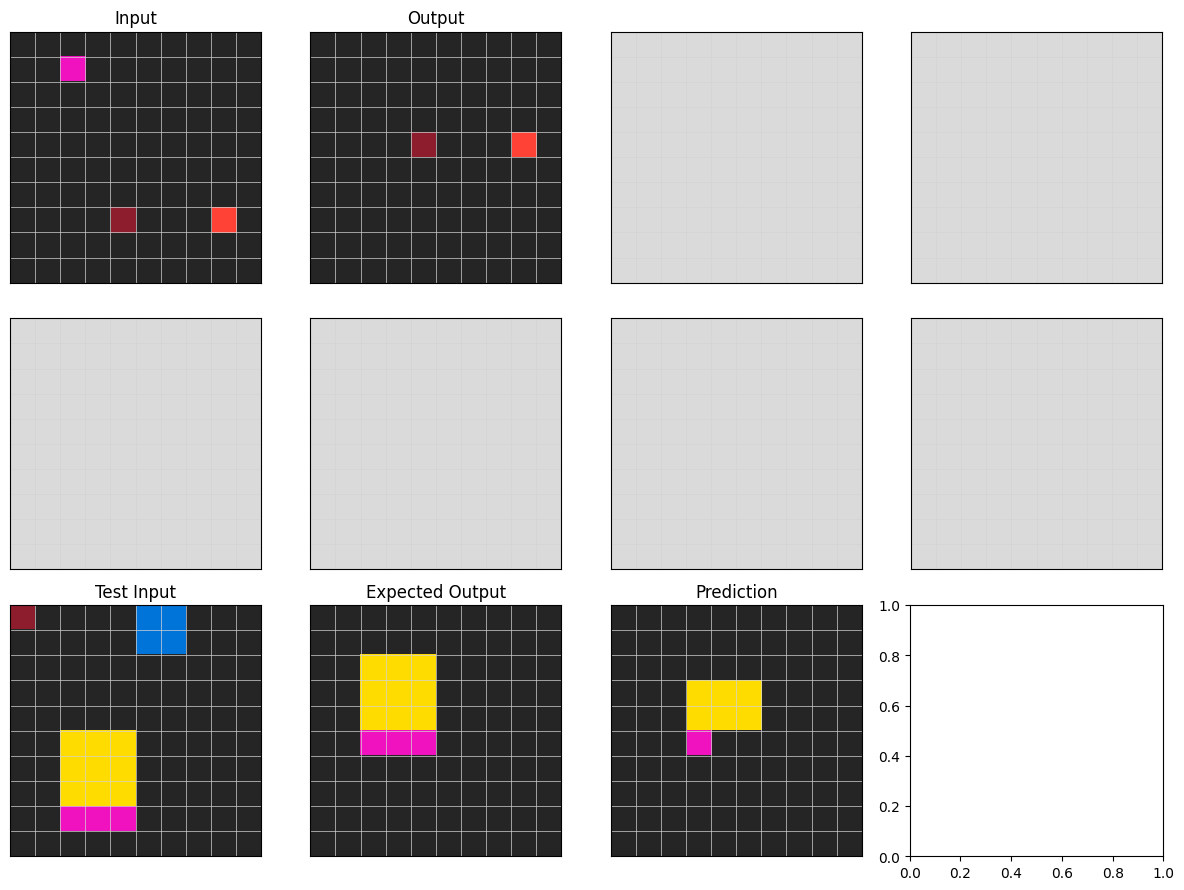

torch.Size([1, 10, 10])


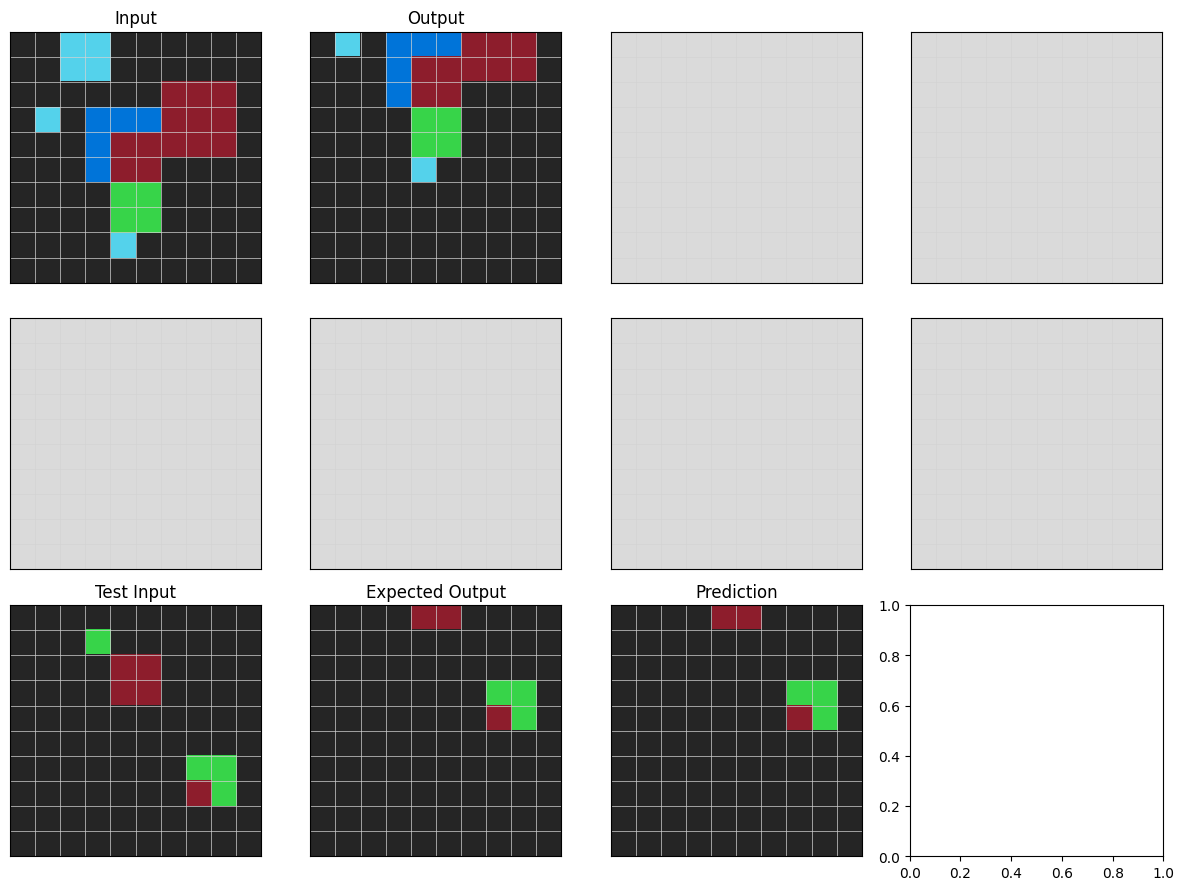

torch.Size([1, 10, 10])


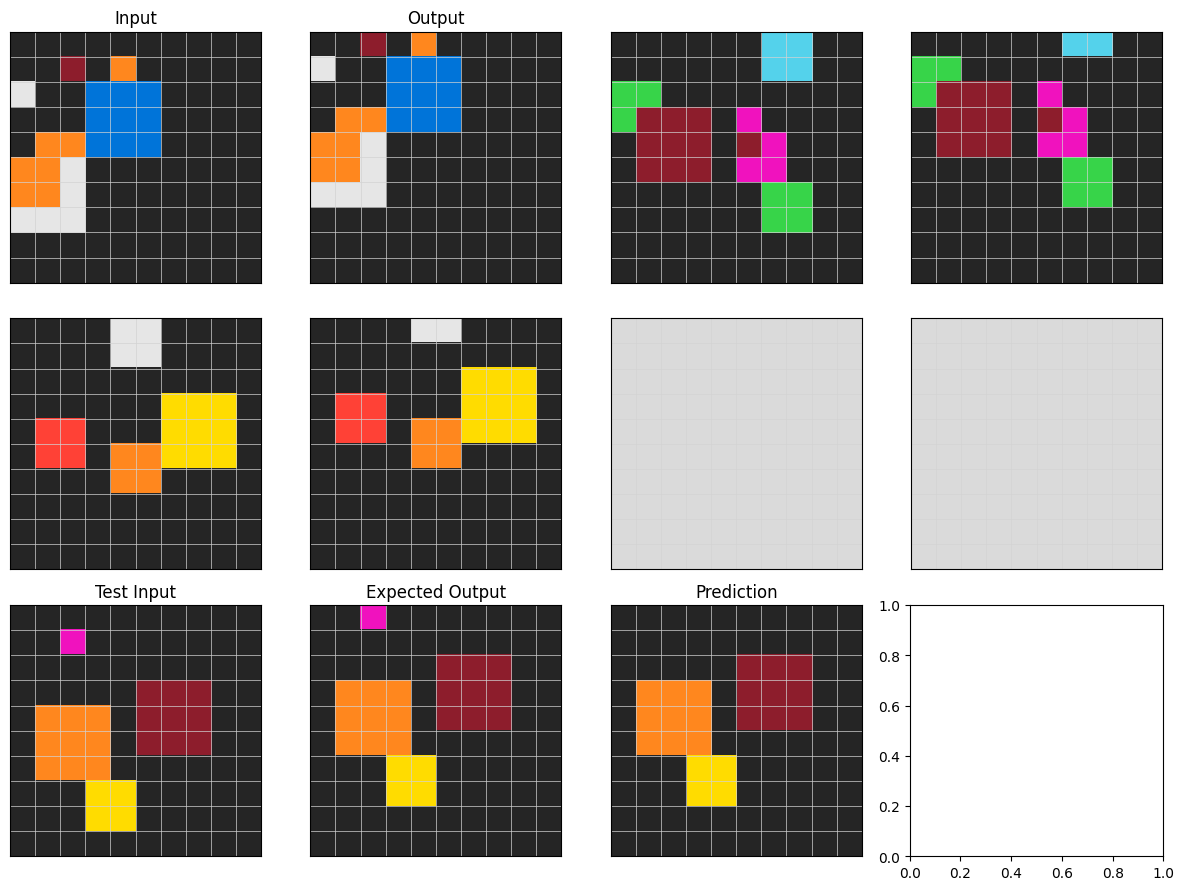

torch.Size([1, 10, 10])


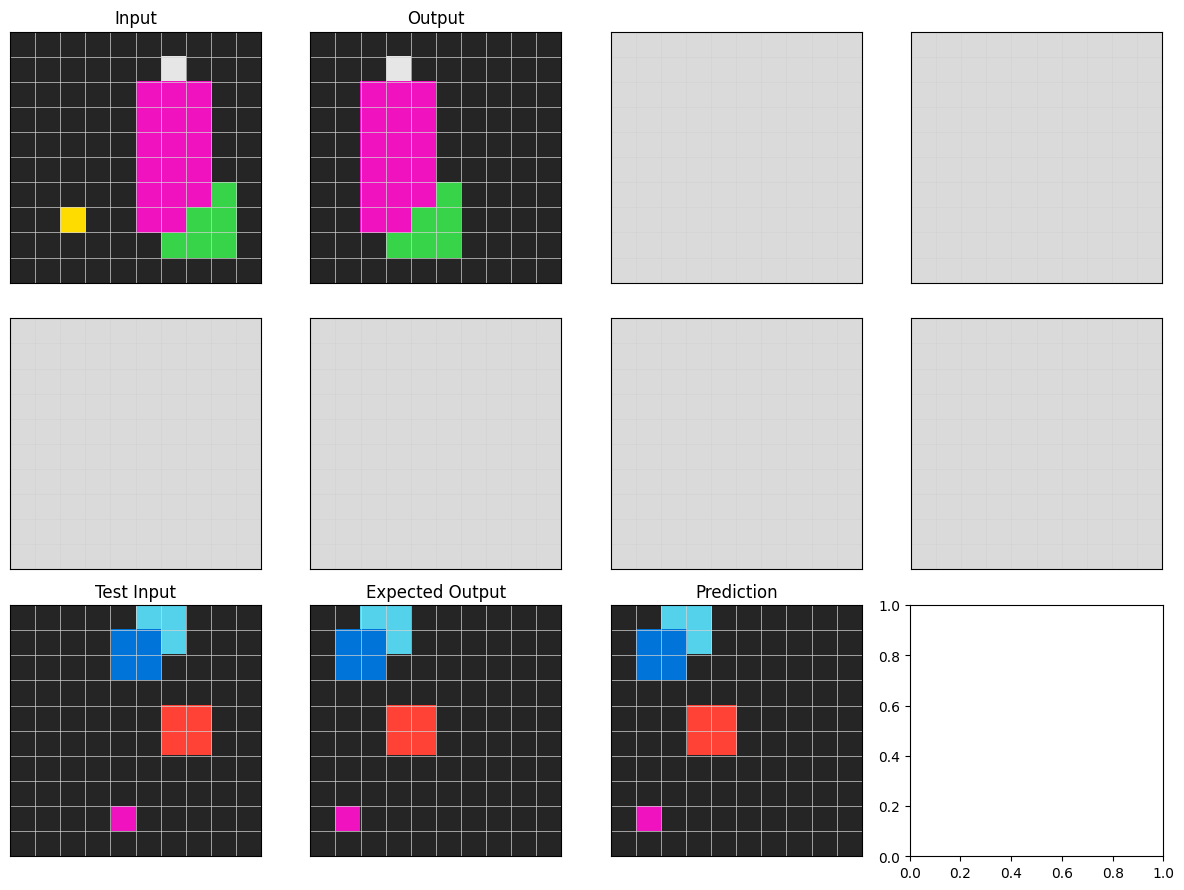

torch.Size([1, 10, 10])


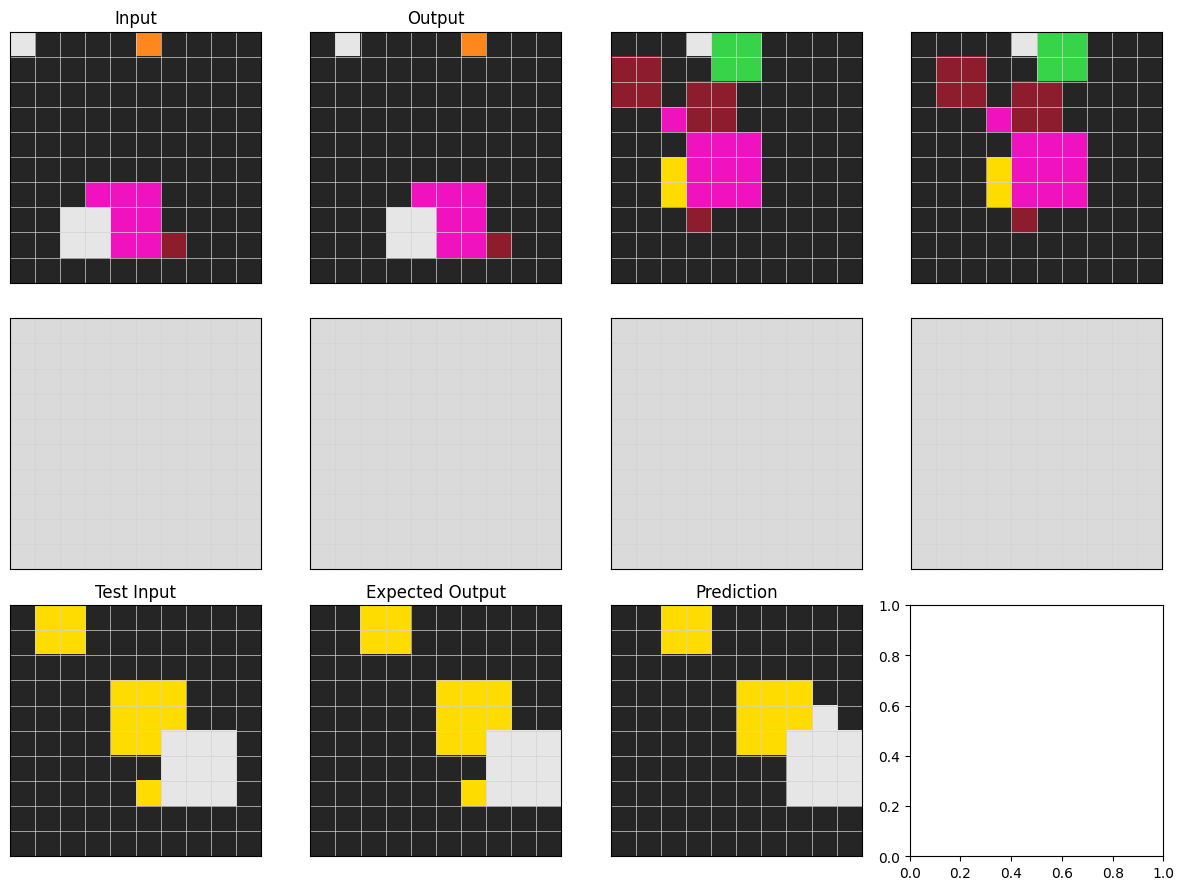

torch.Size([1, 10, 10])


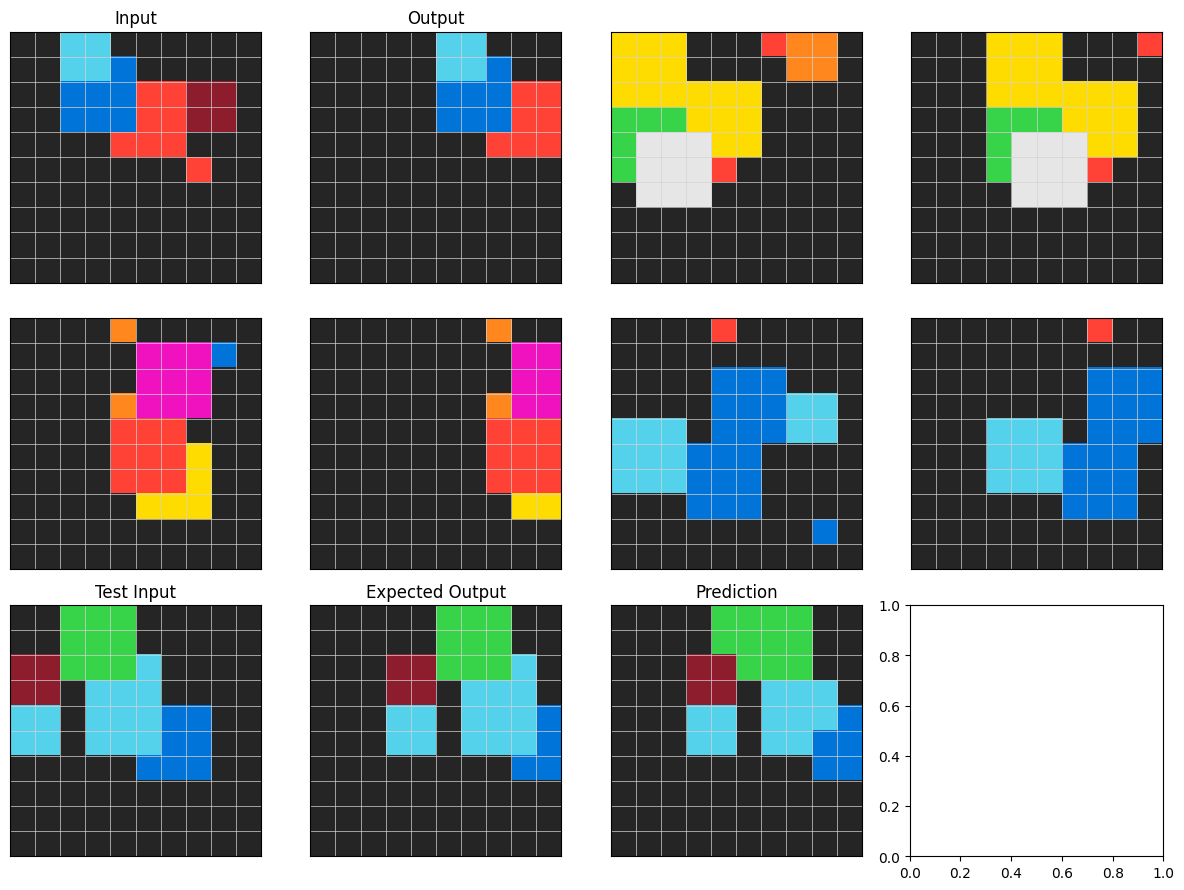

torch.Size([1, 10, 10])


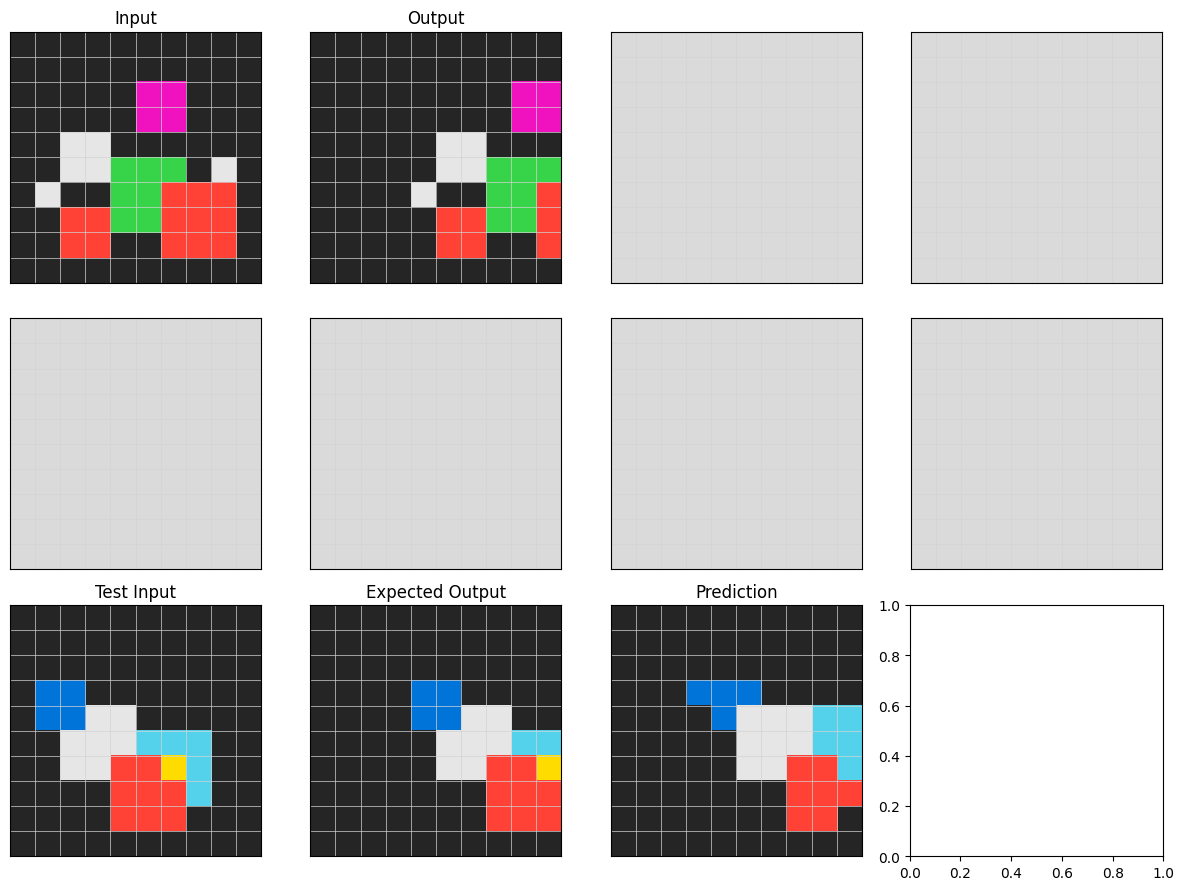

torch.Size([1, 10, 10])


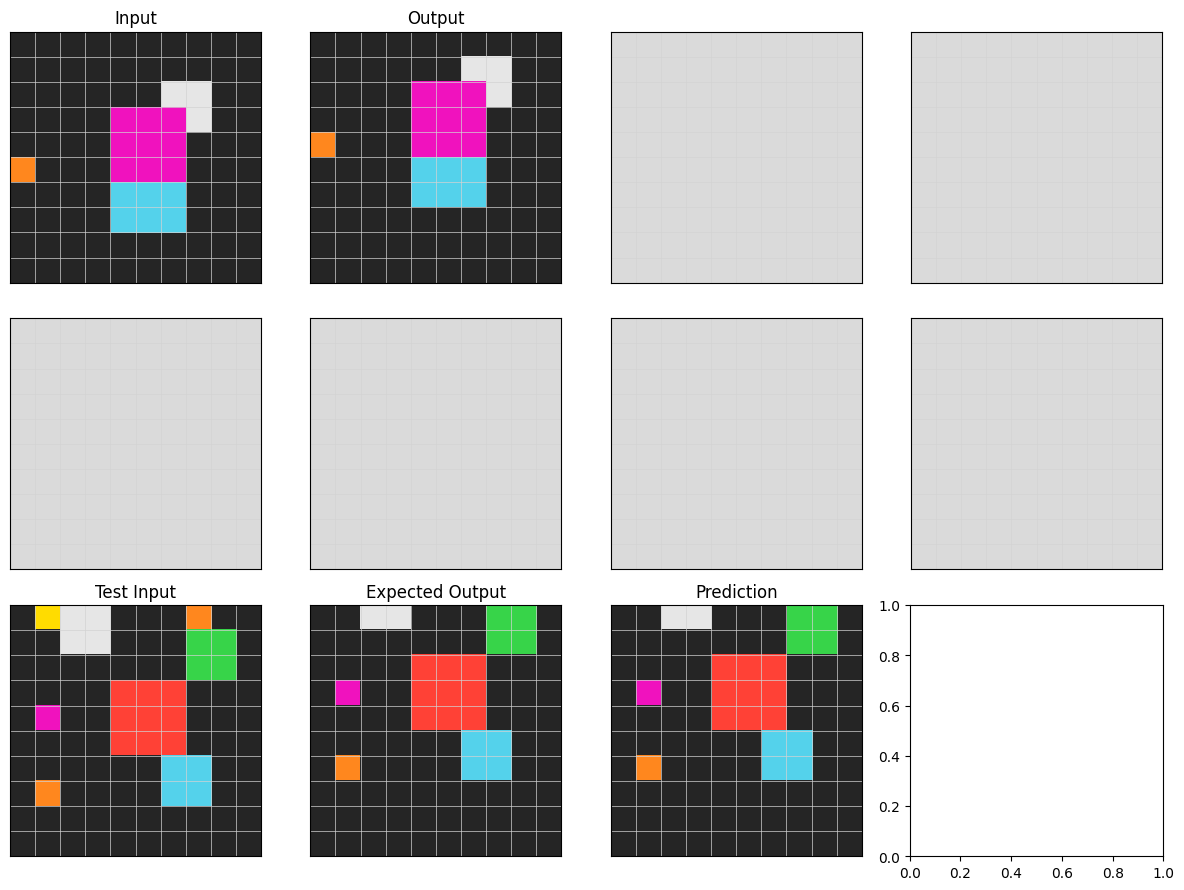

torch.Size([1, 10, 10])


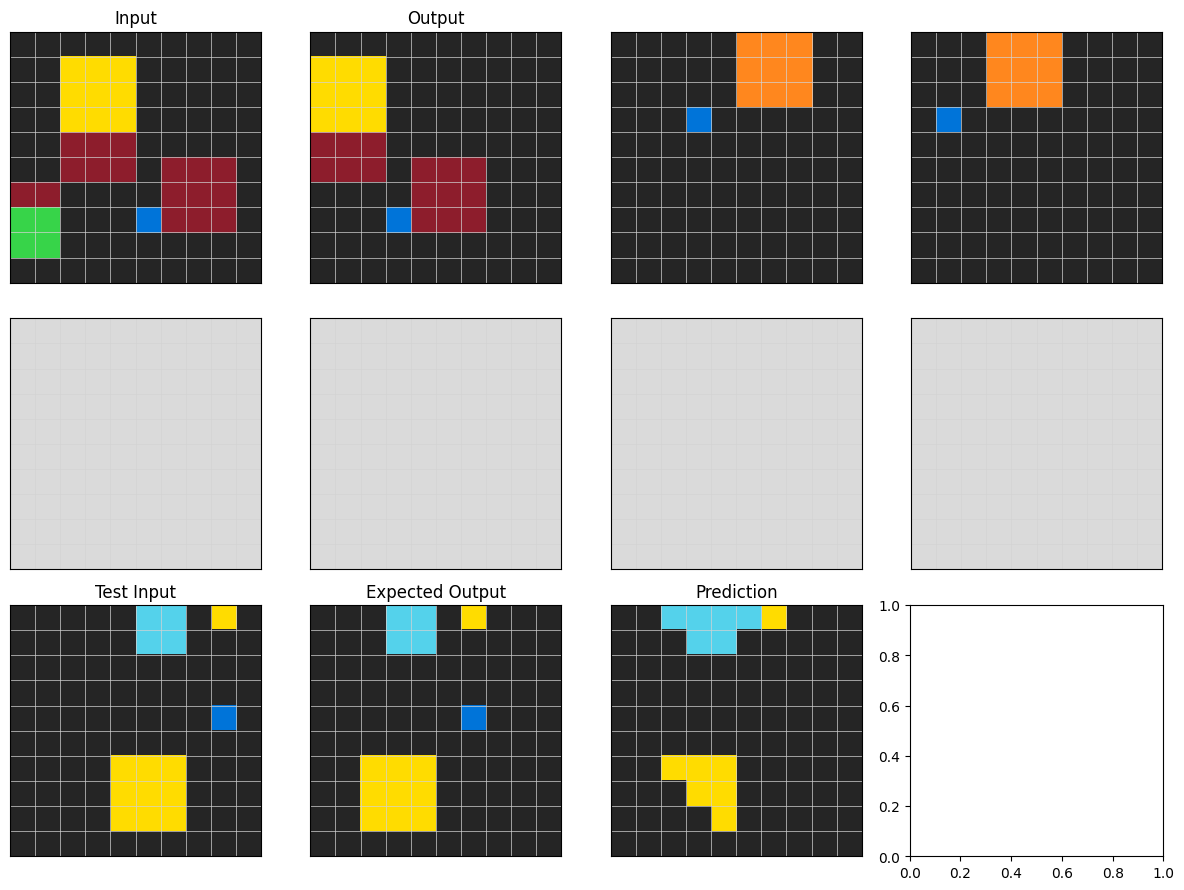

torch.Size([1, 10, 10])


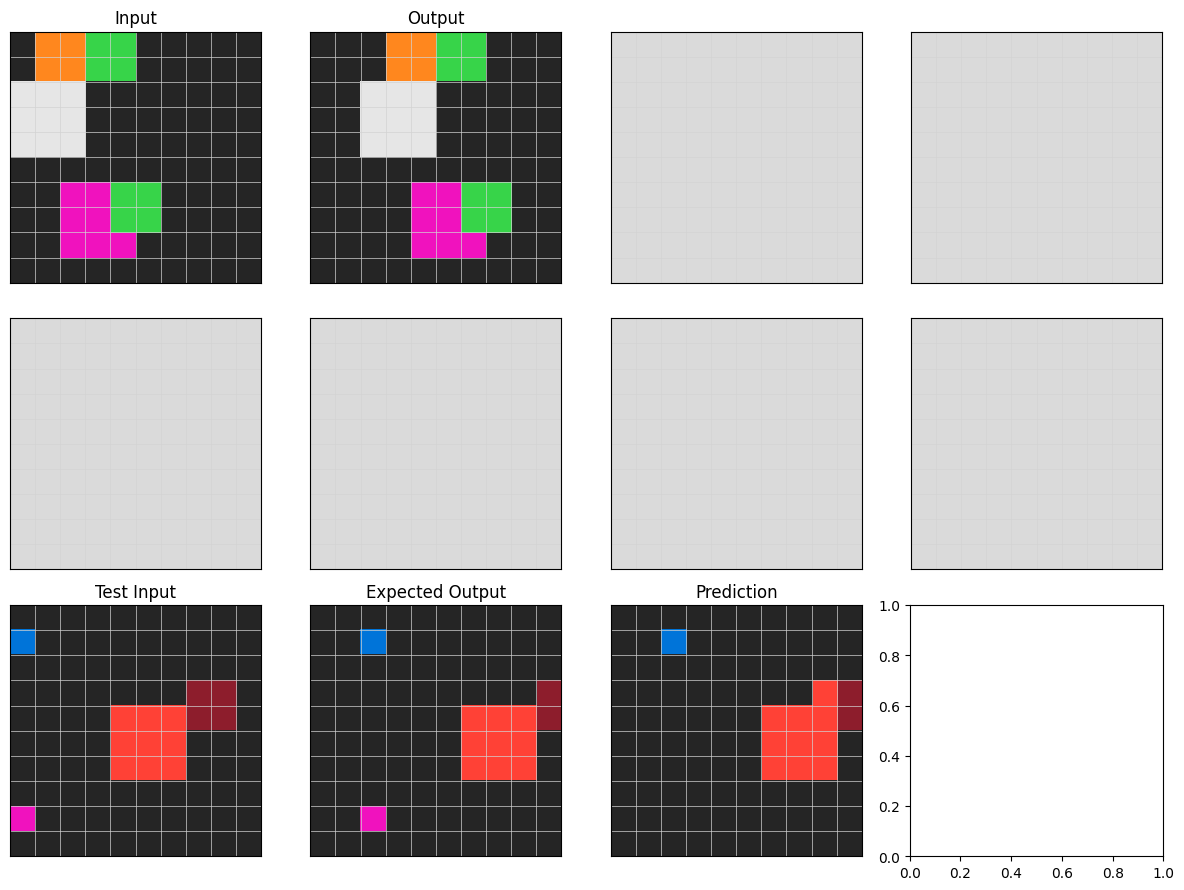

torch.Size([1, 10, 10])


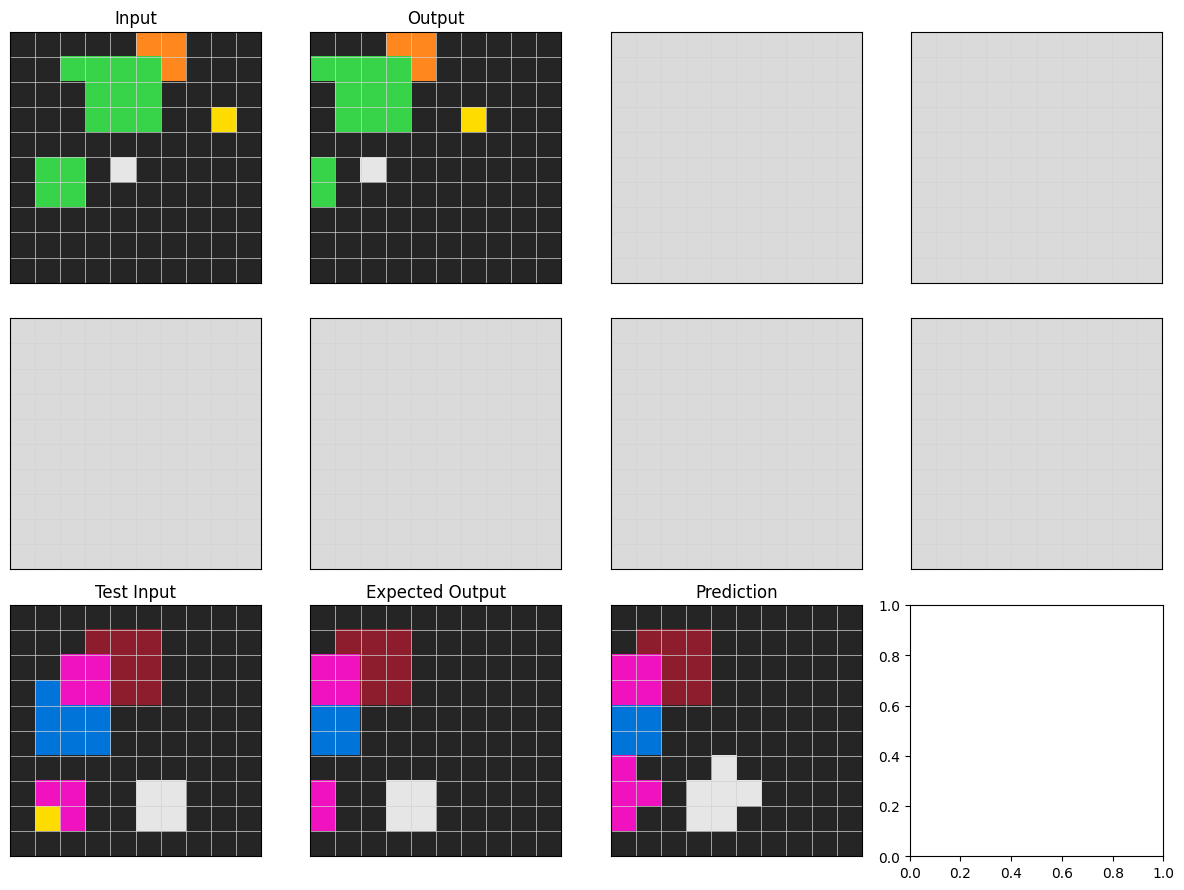

torch.Size([1, 10, 10])


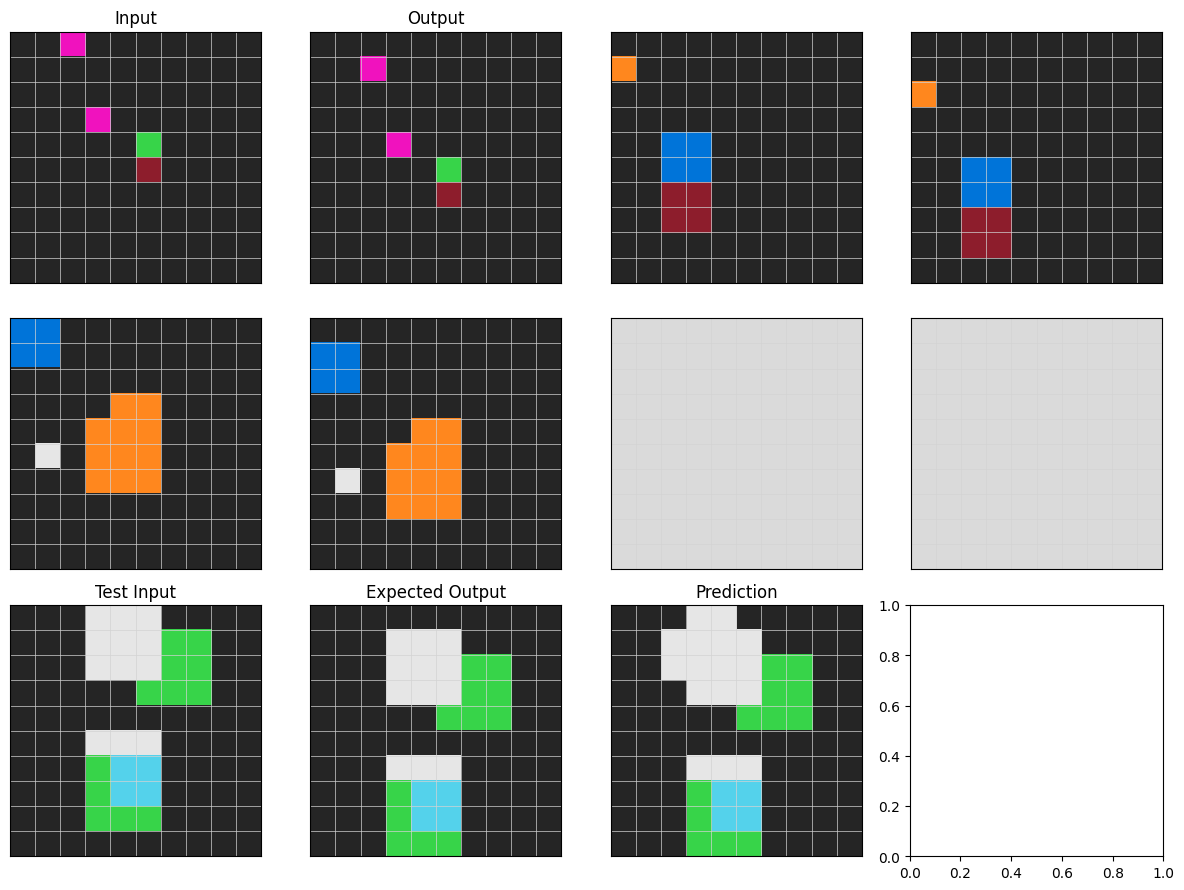

torch.Size([1, 10, 10])


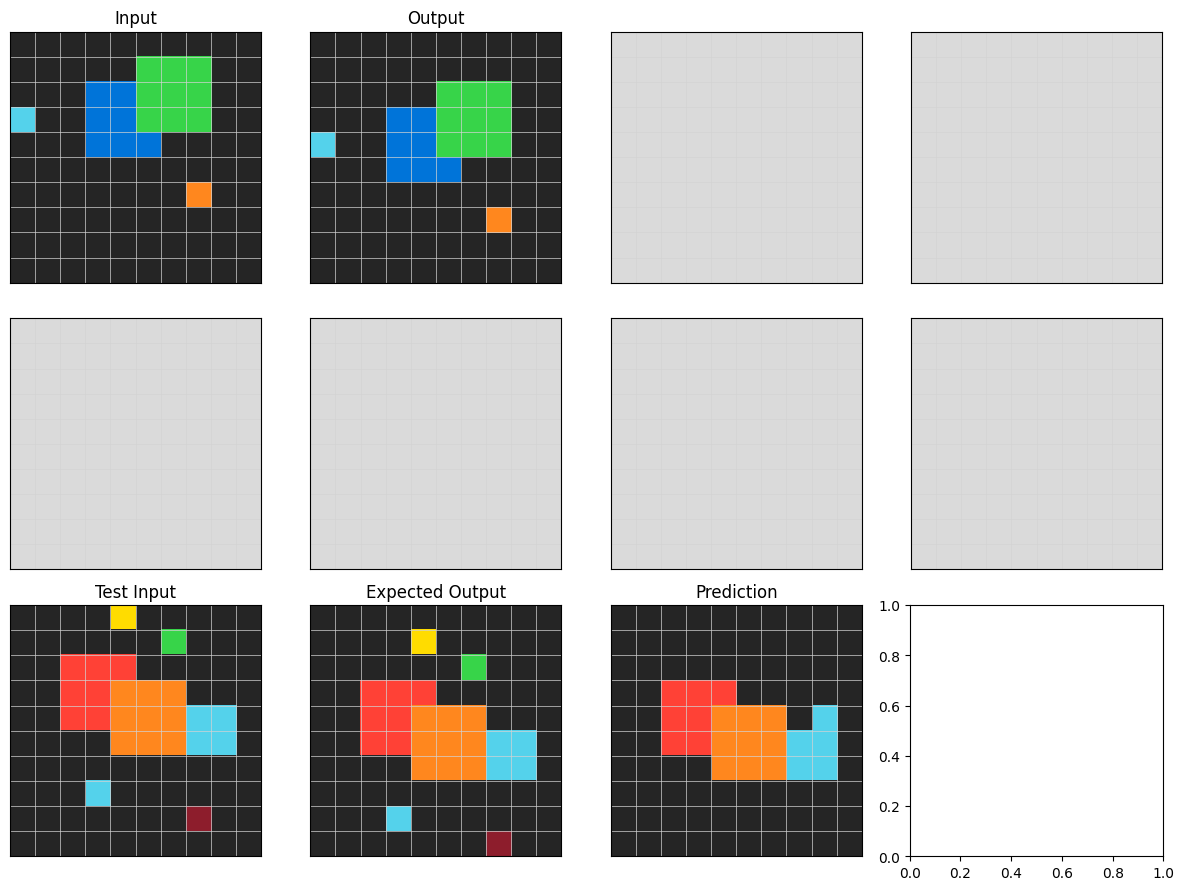

torch.Size([1, 10, 10])


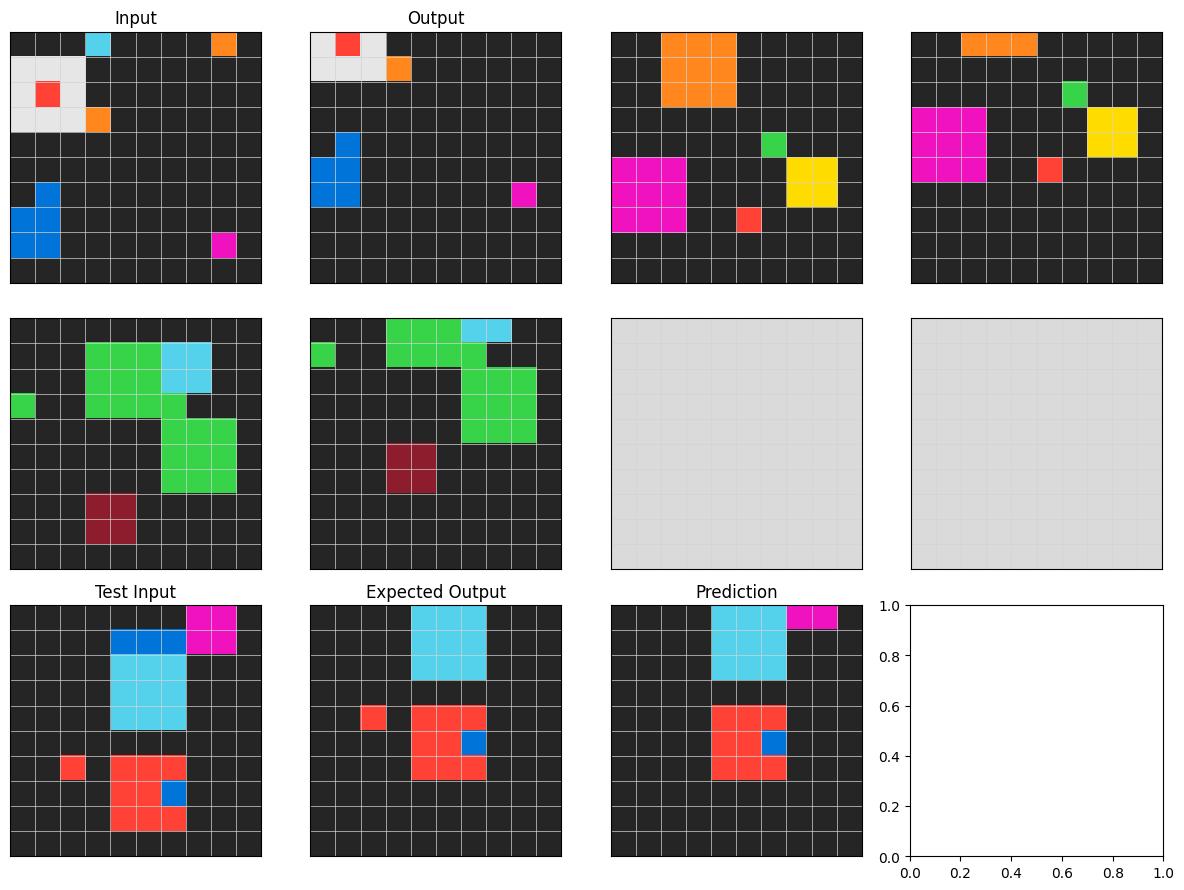

torch.Size([1, 10, 10])


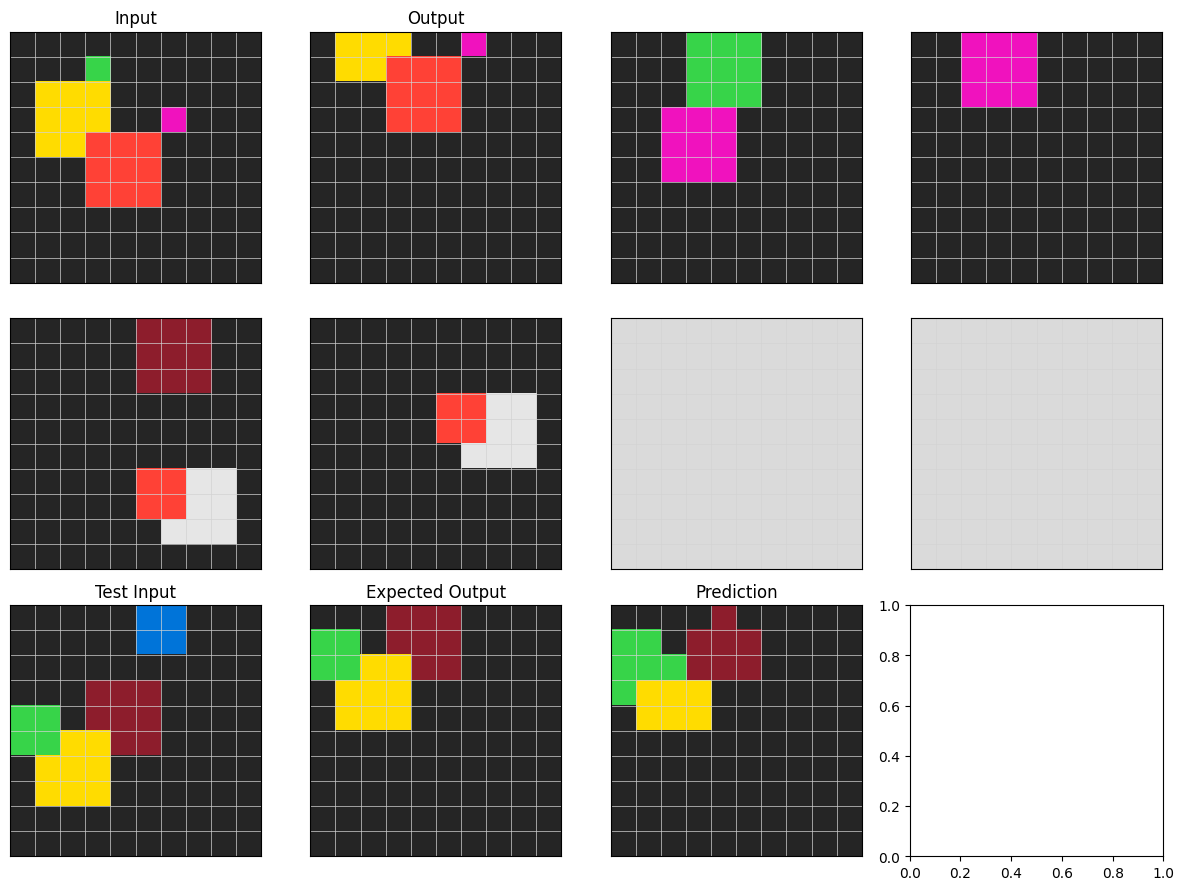

torch.Size([1, 10, 10])


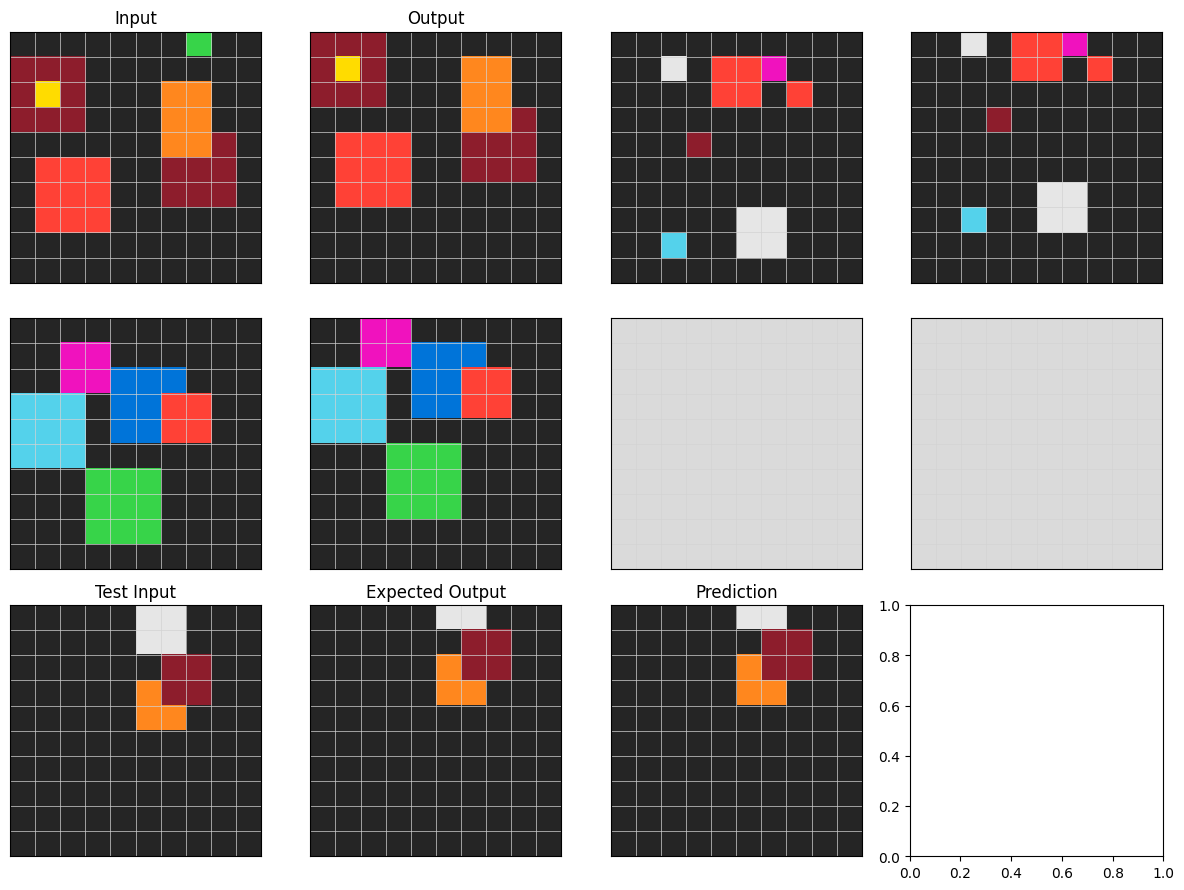

torch.Size([1, 10, 10])


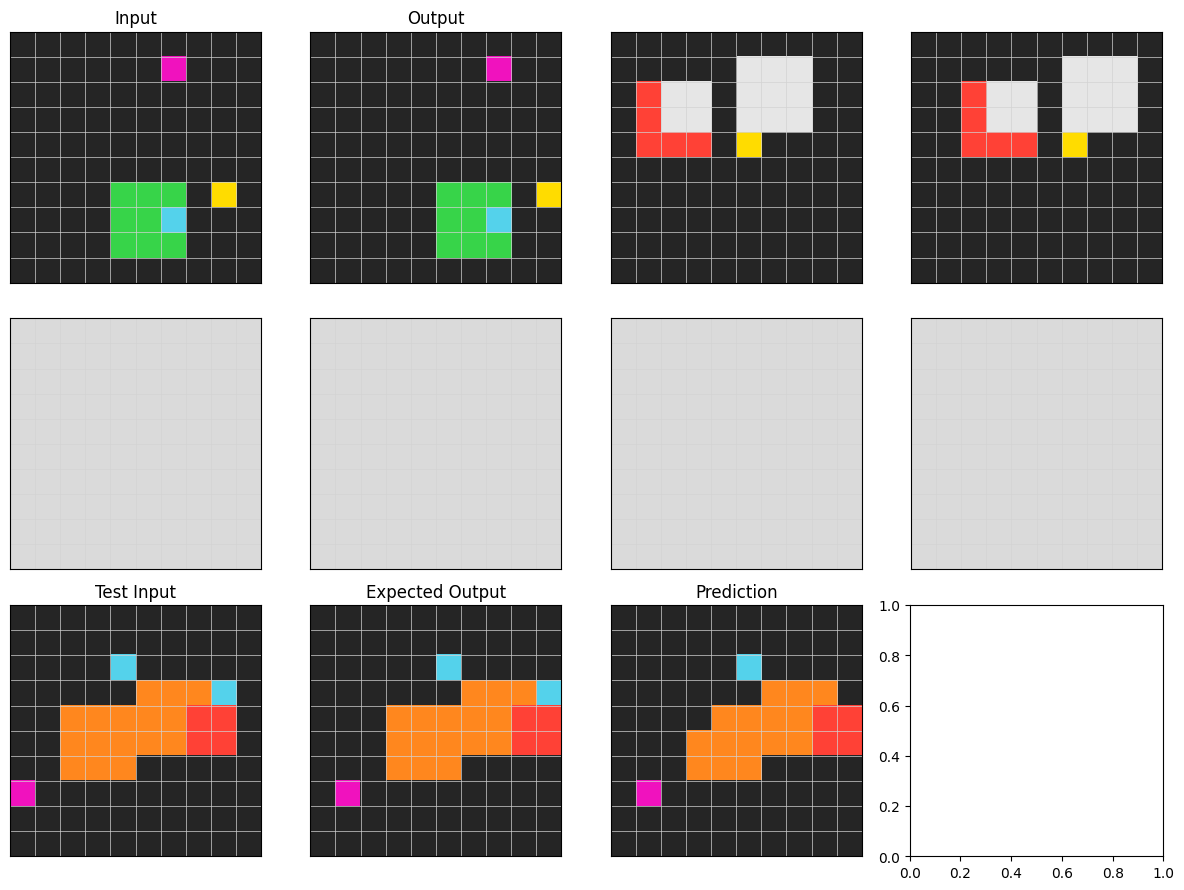

torch.Size([1, 10, 10])


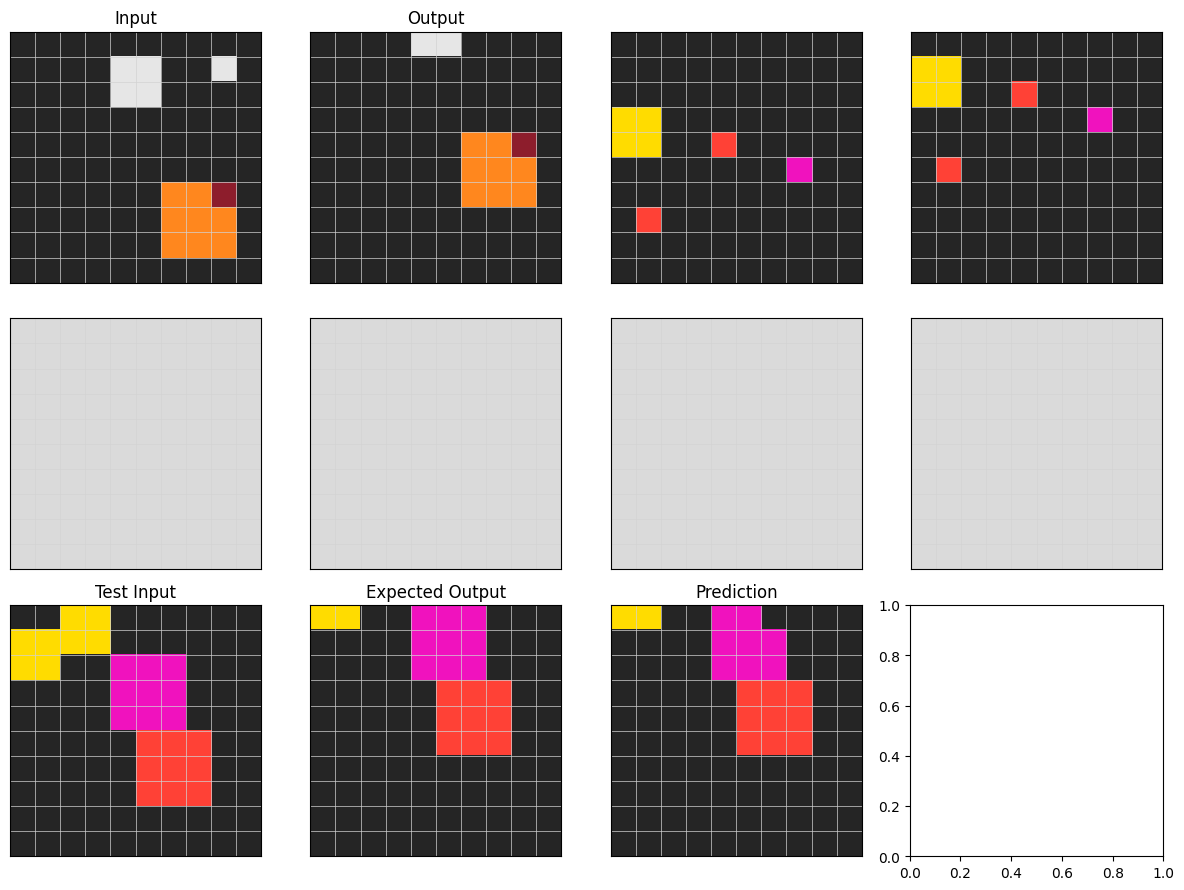

torch.Size([1, 10, 10])


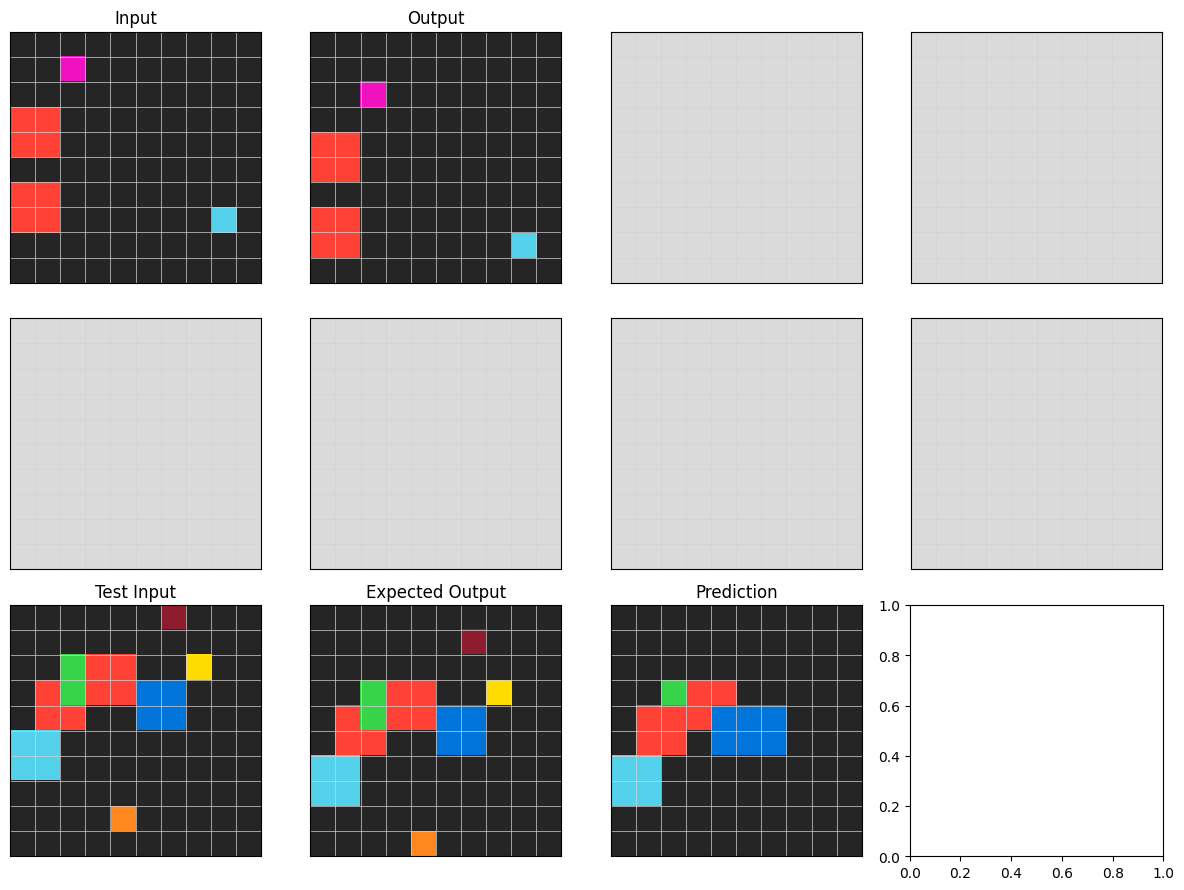

torch.Size([1, 10, 10])


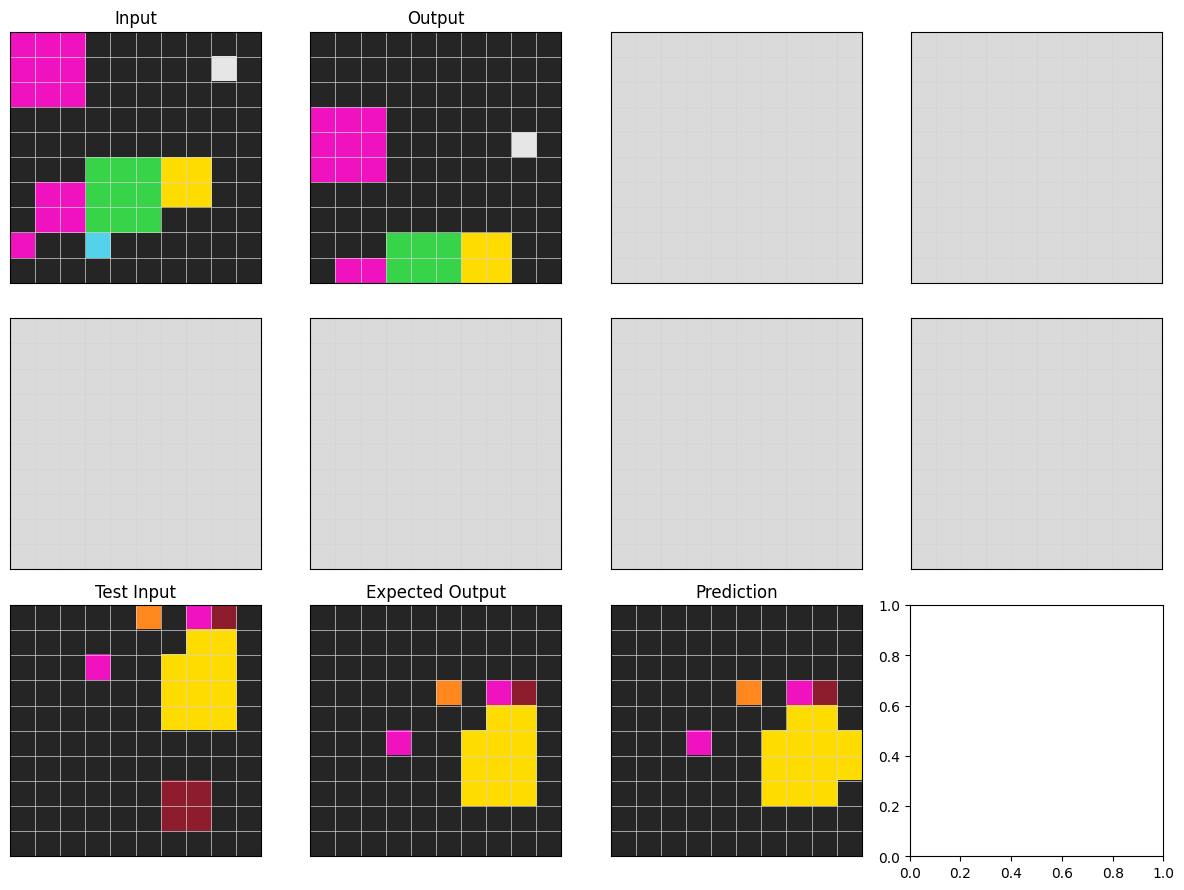

torch.Size([1, 10, 10])


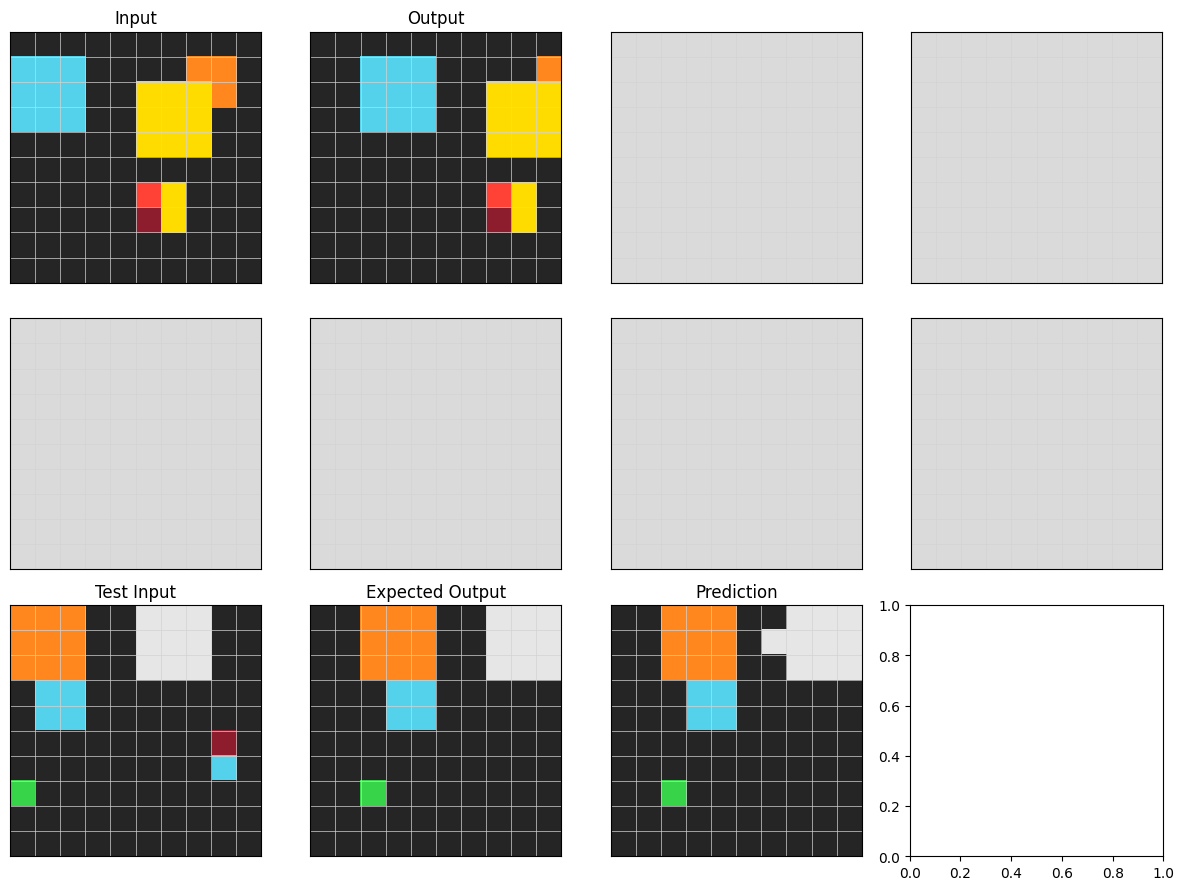

torch.Size([1, 10, 10])


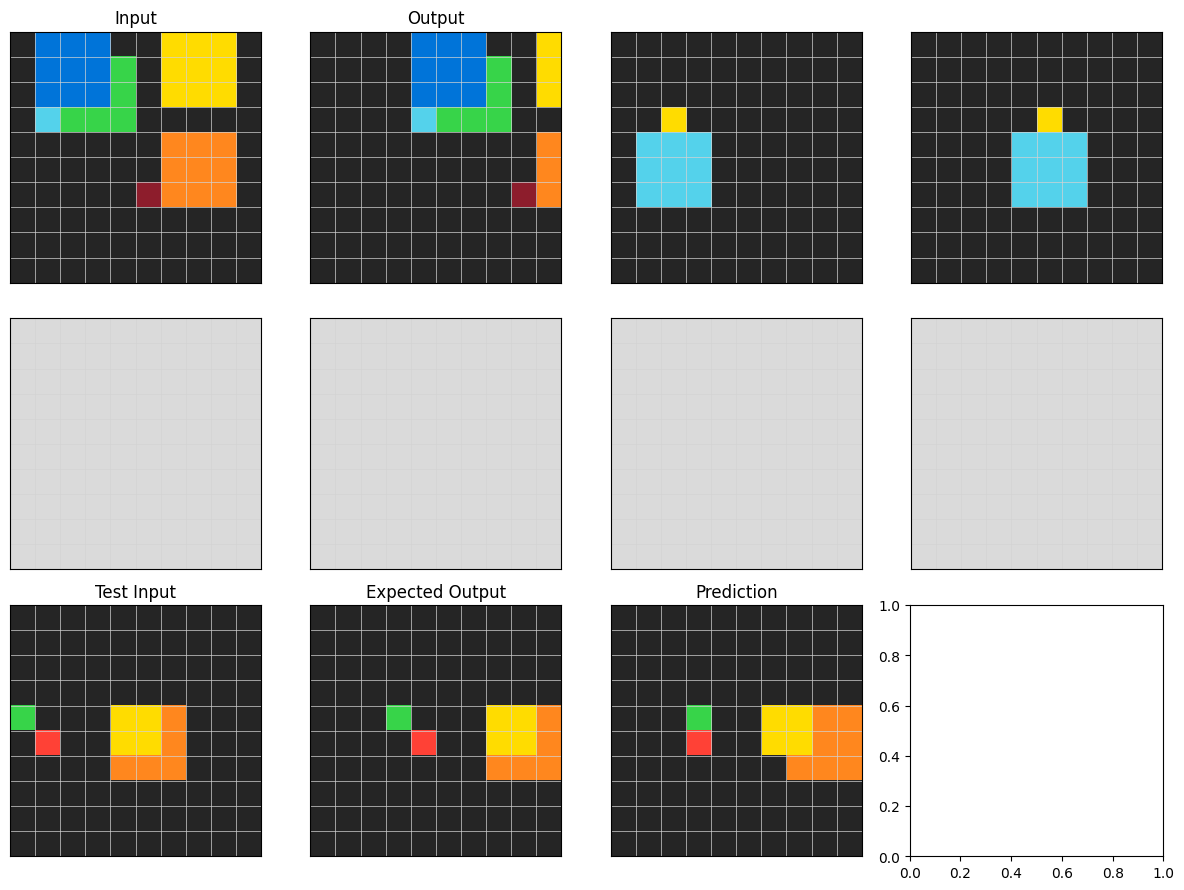

torch.Size([1, 10, 10])


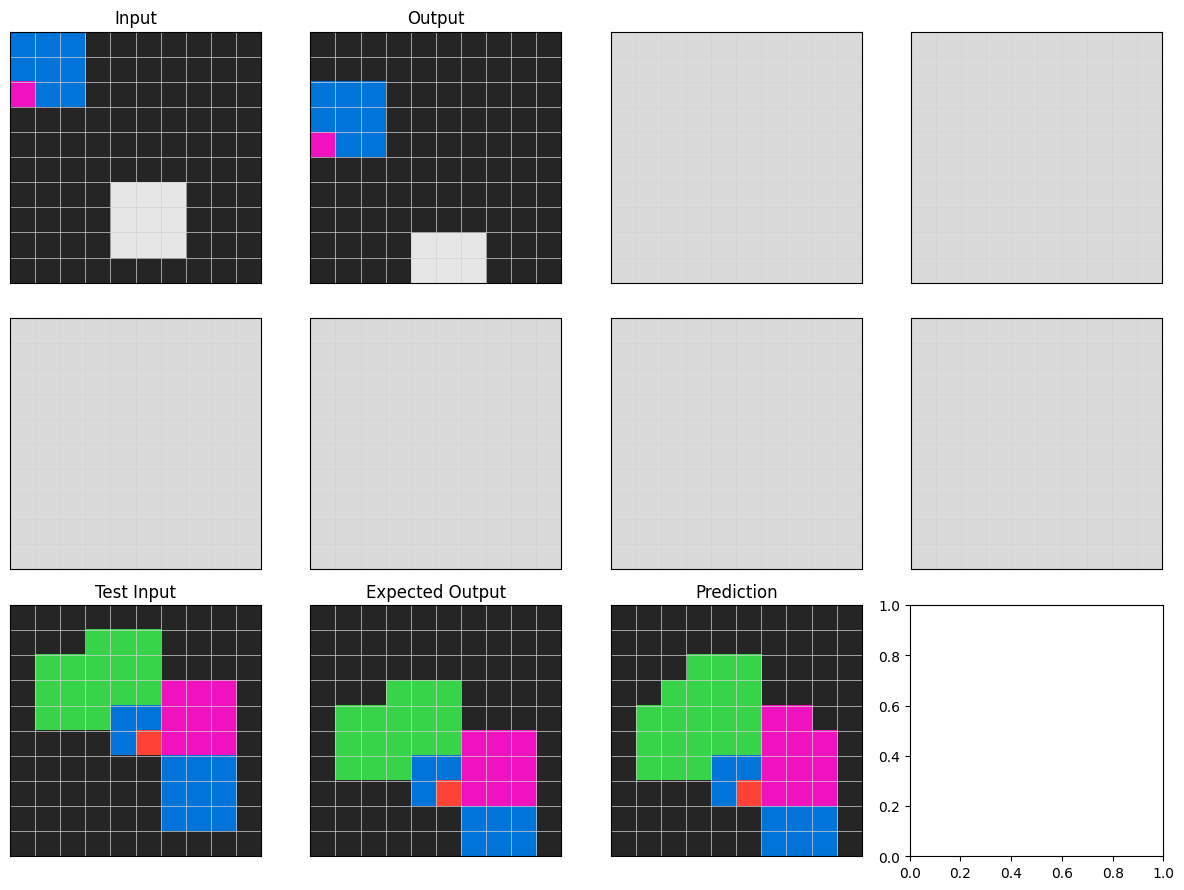

torch.Size([1, 10, 10])


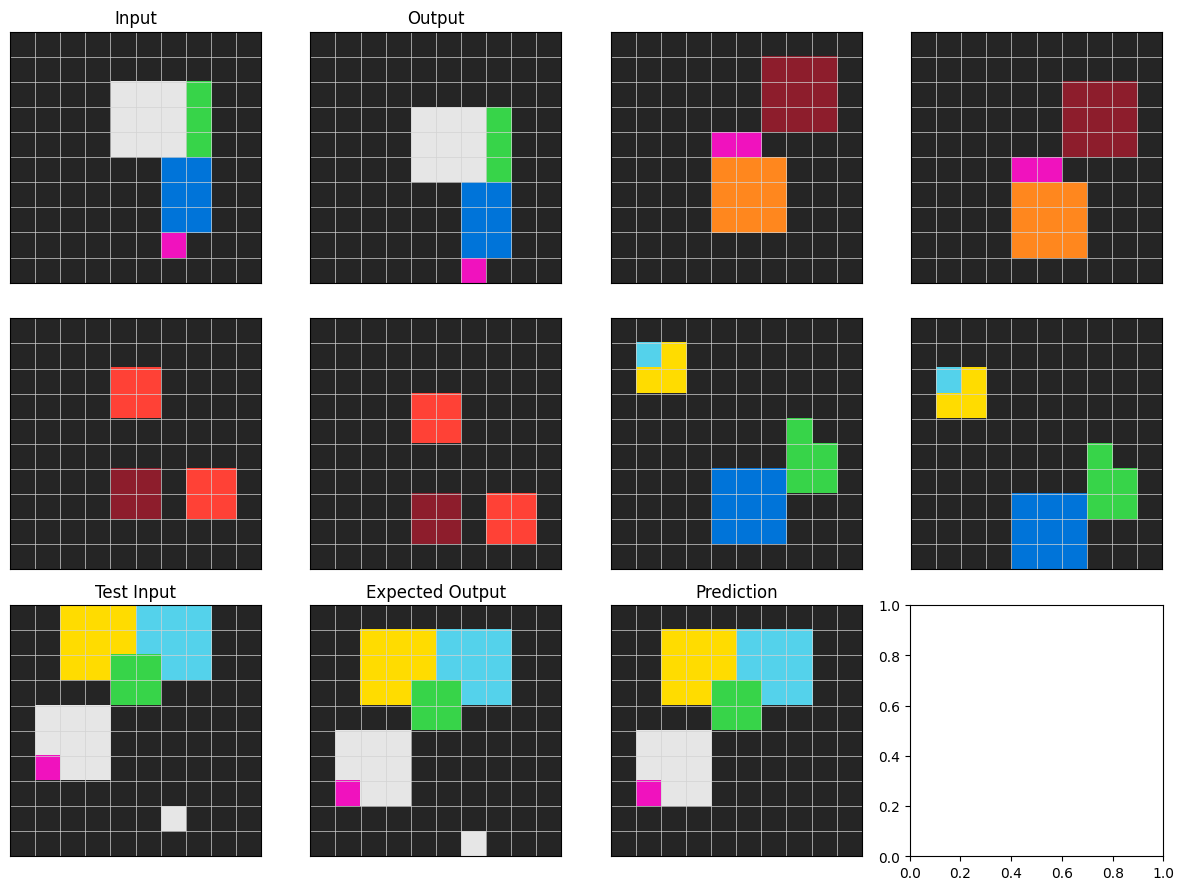

torch.Size([1, 10, 10])


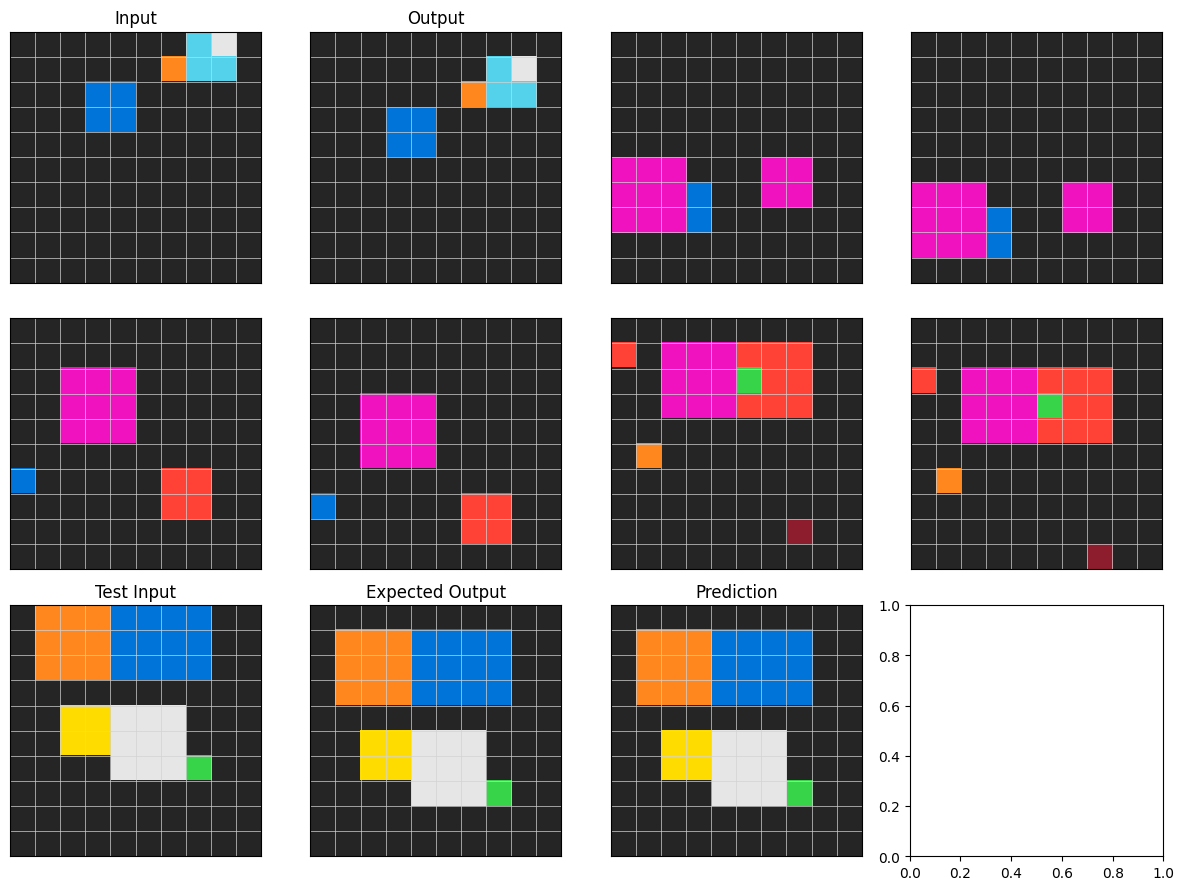

torch.Size([1, 10, 10])


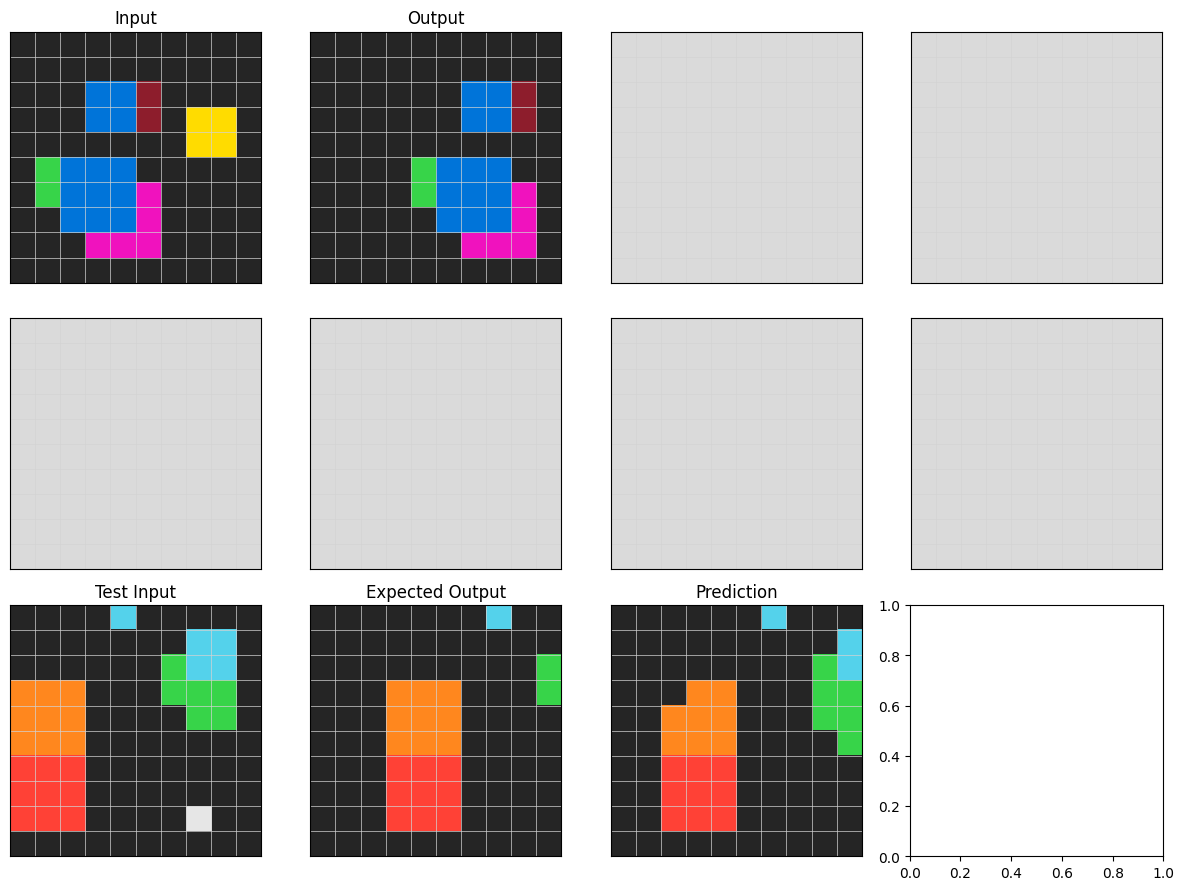

torch.Size([1, 10, 10])


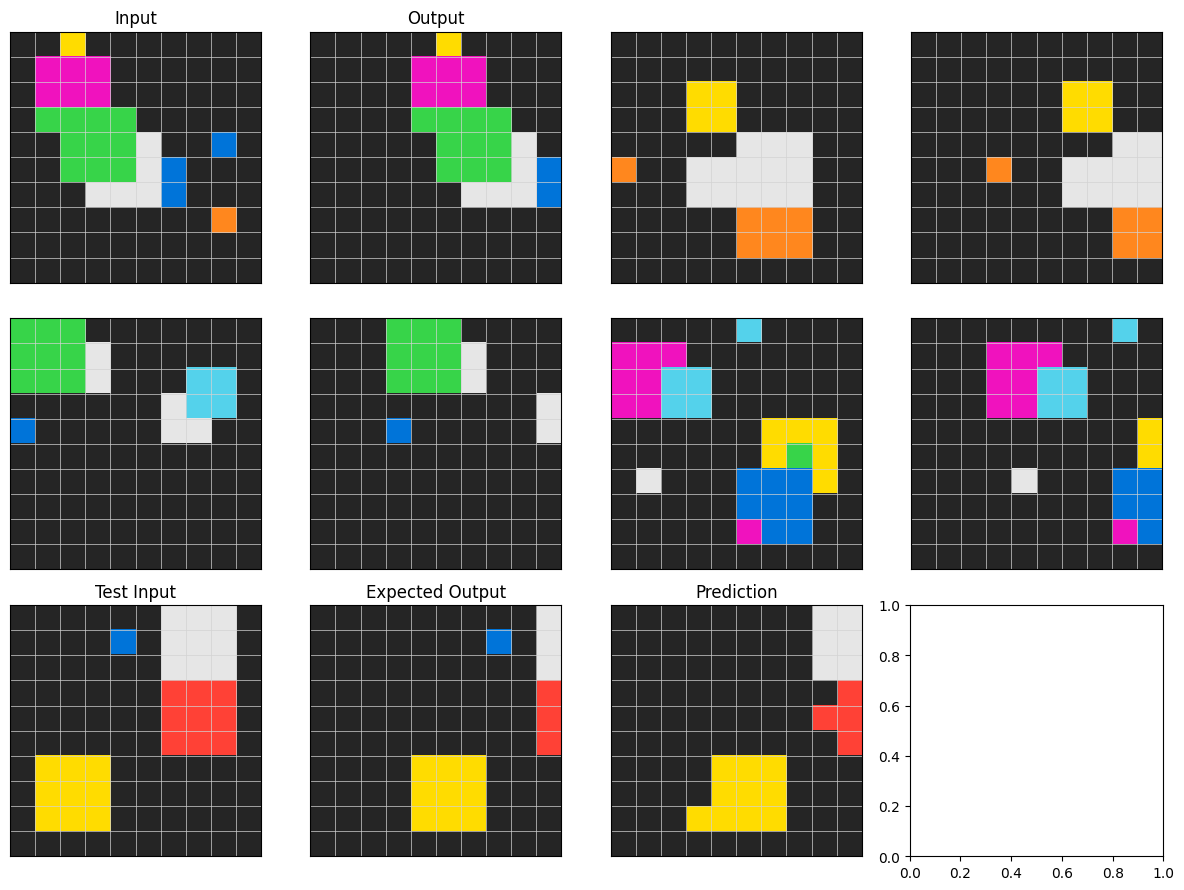

torch.Size([1, 10, 10])


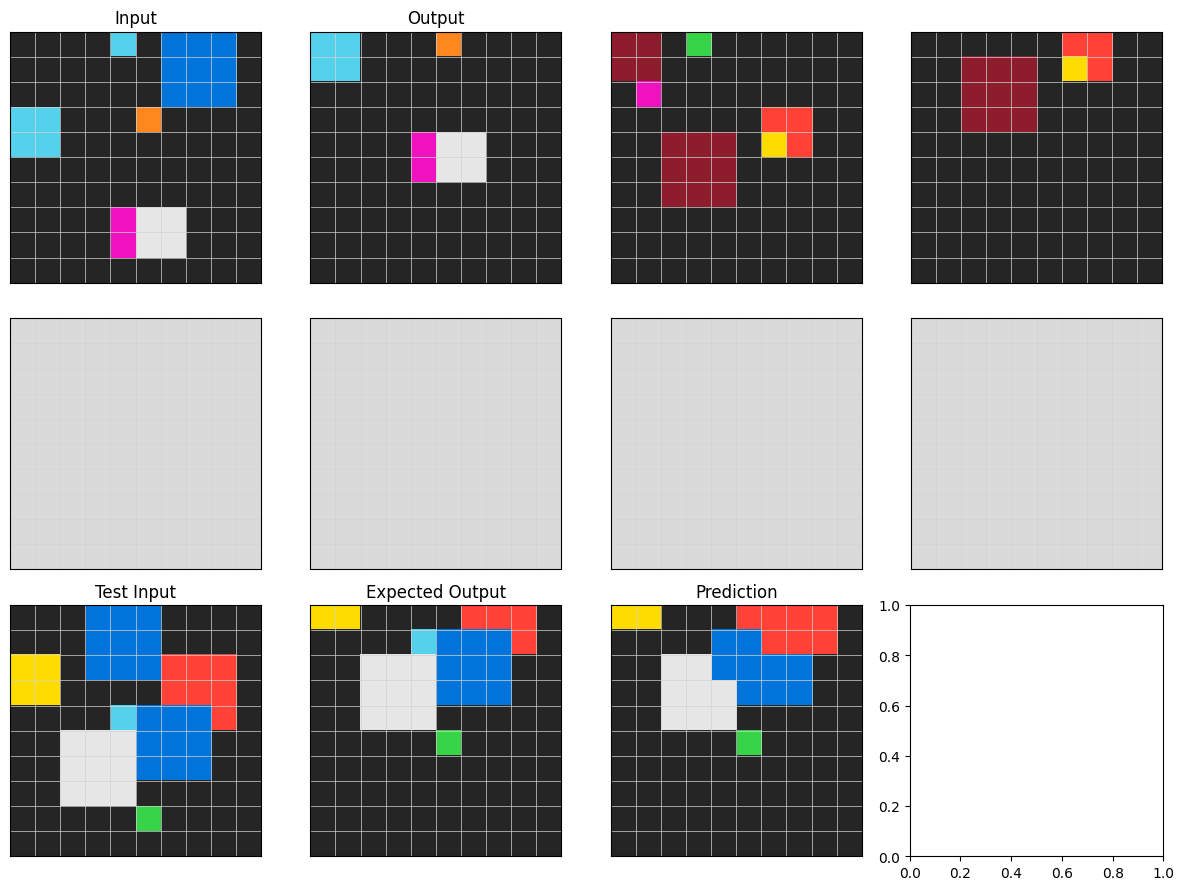

torch.Size([1, 10, 10])


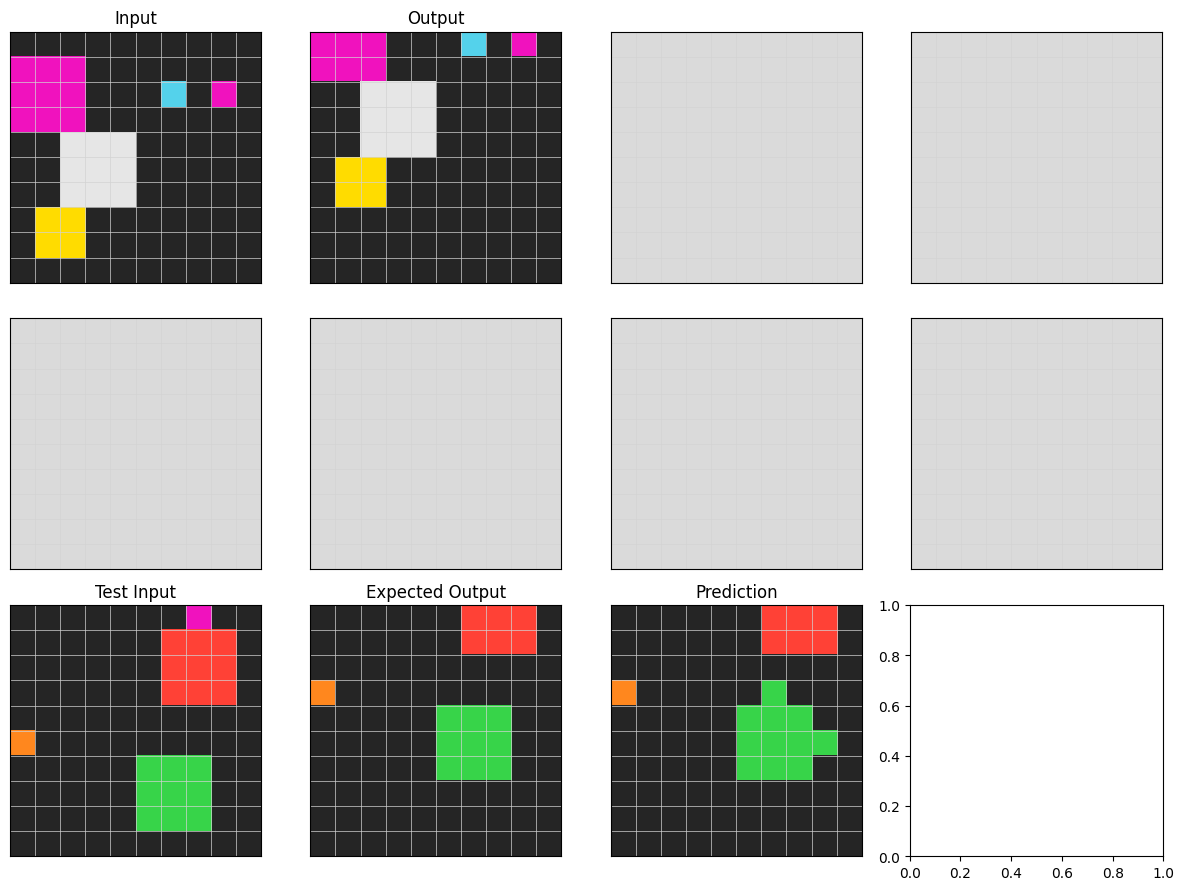

torch.Size([1, 10, 10])


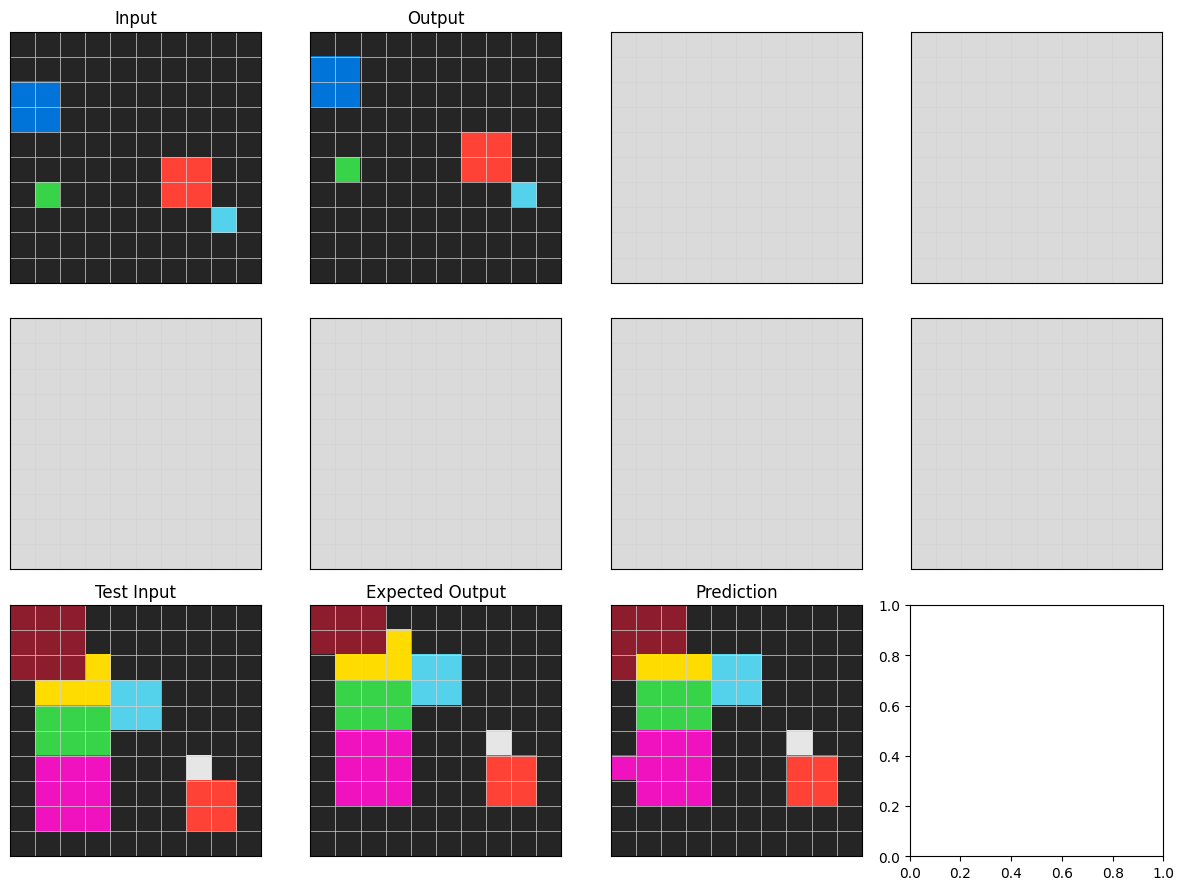

torch.Size([1, 10, 10])


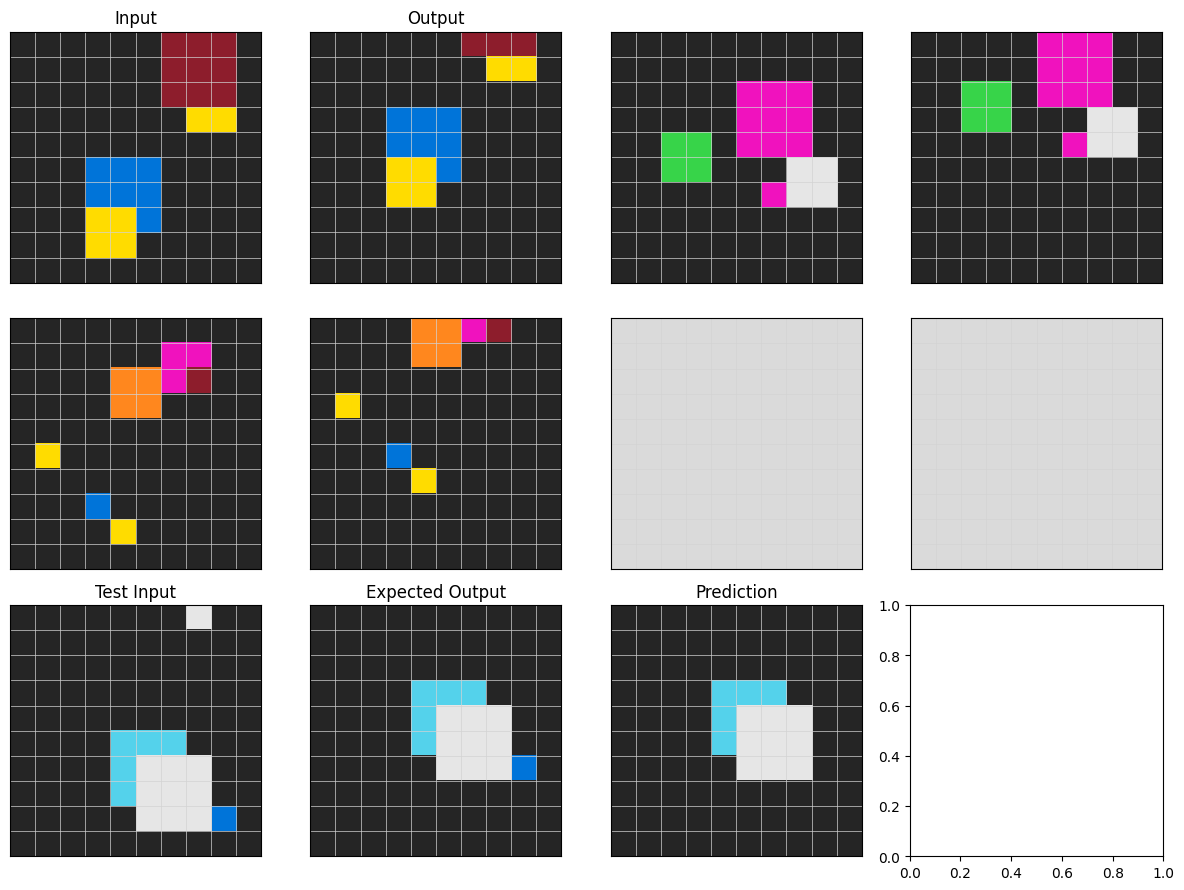

torch.Size([1, 10, 10])


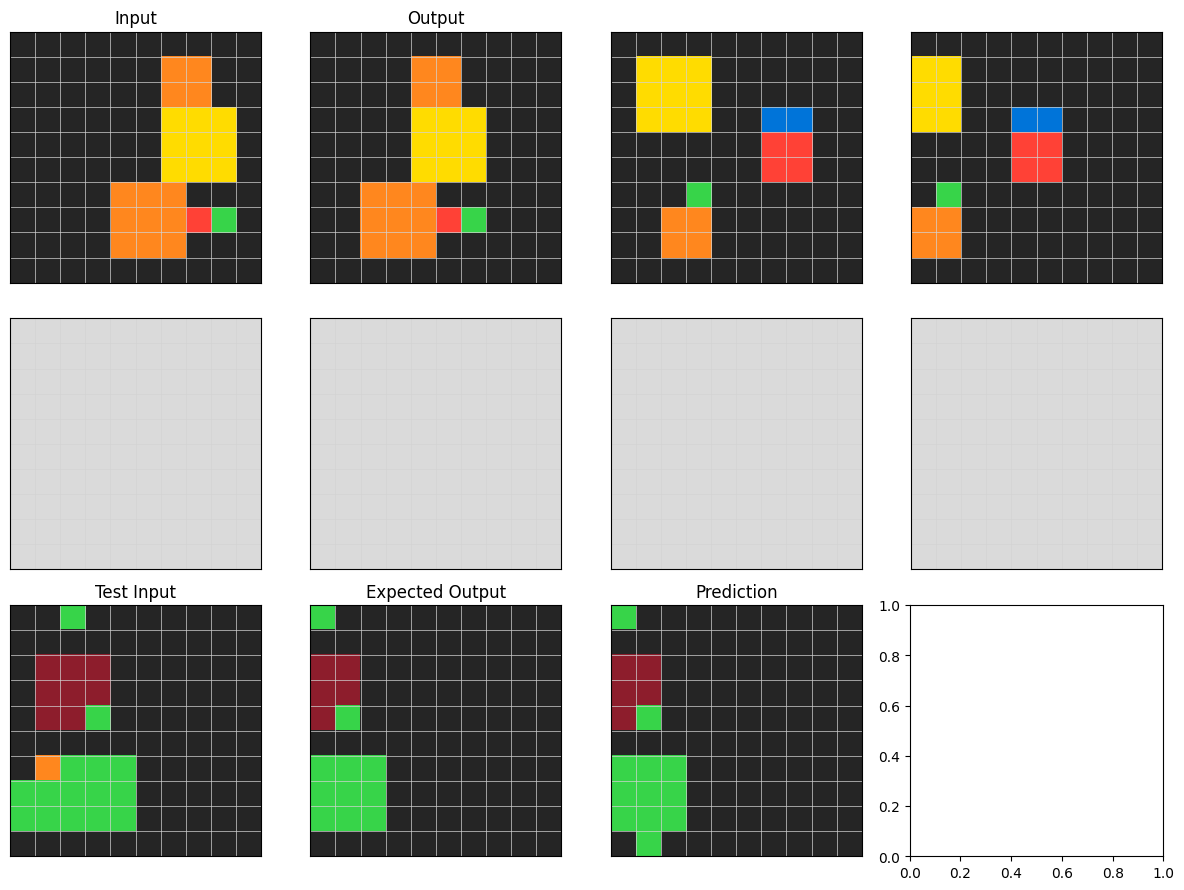

torch.Size([1, 10, 10])


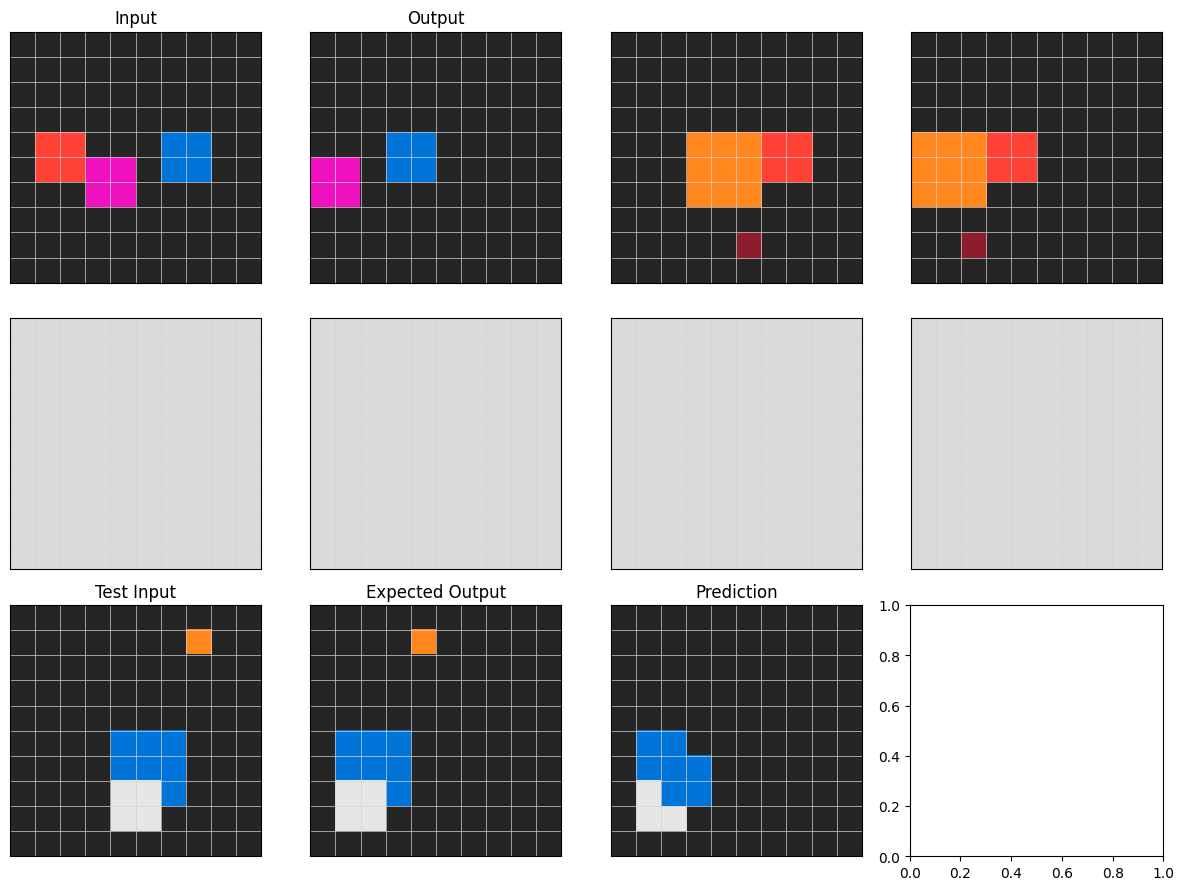

torch.Size([1, 10, 10])


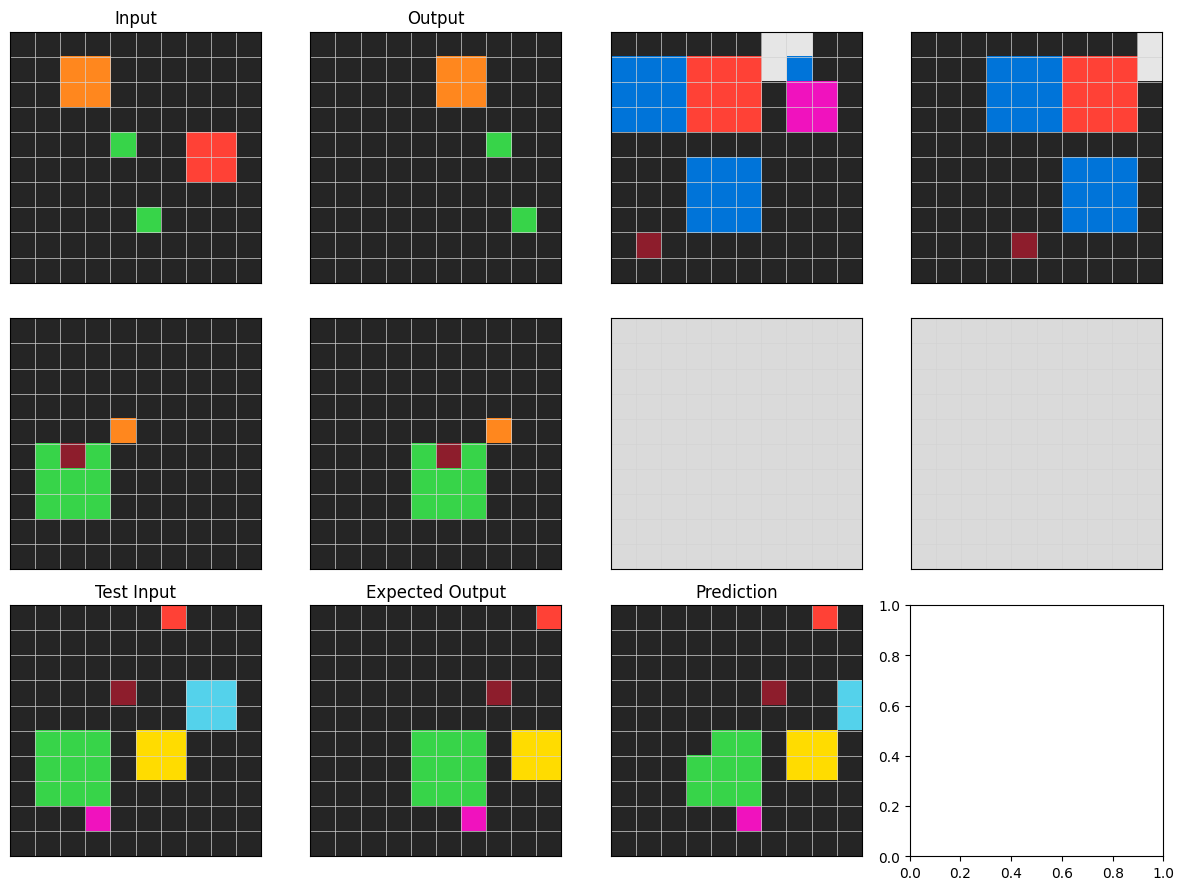

torch.Size([1, 10, 10])


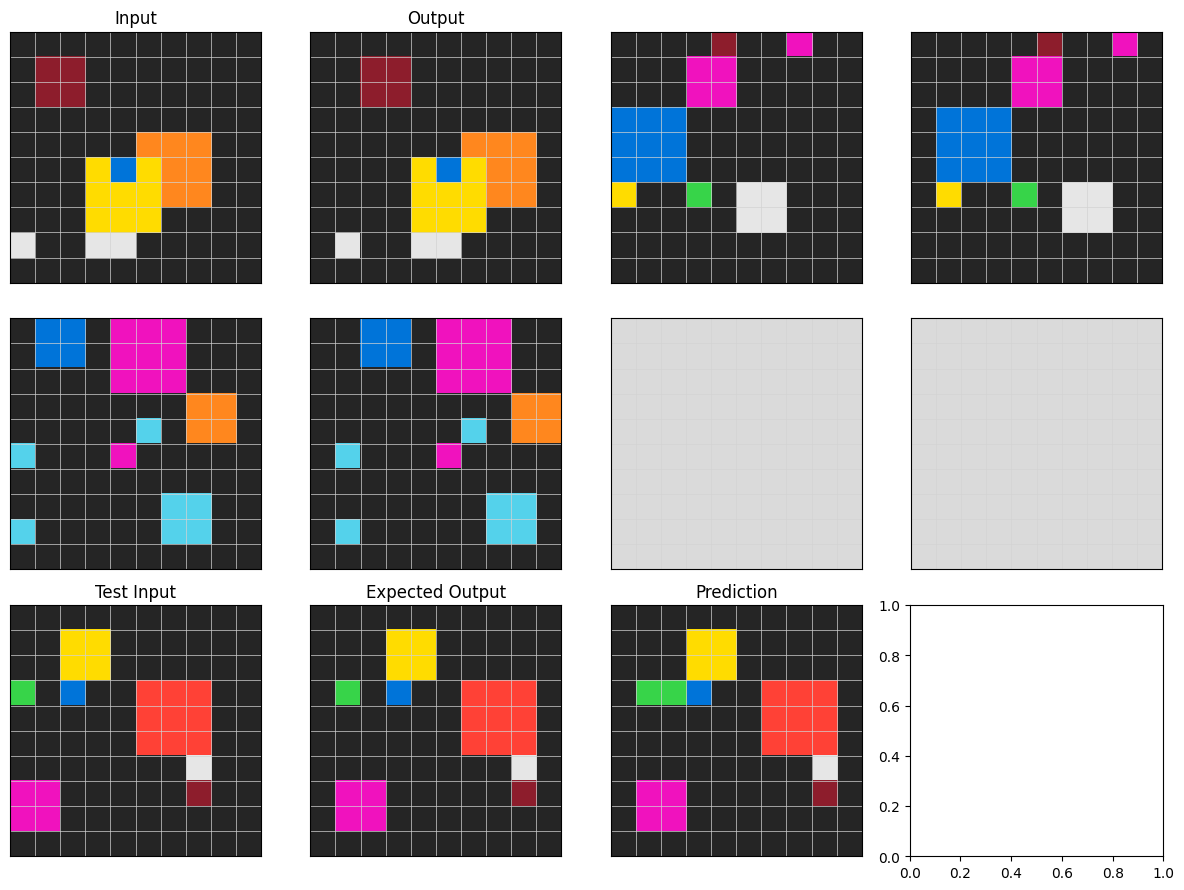

torch.Size([1, 10, 10])


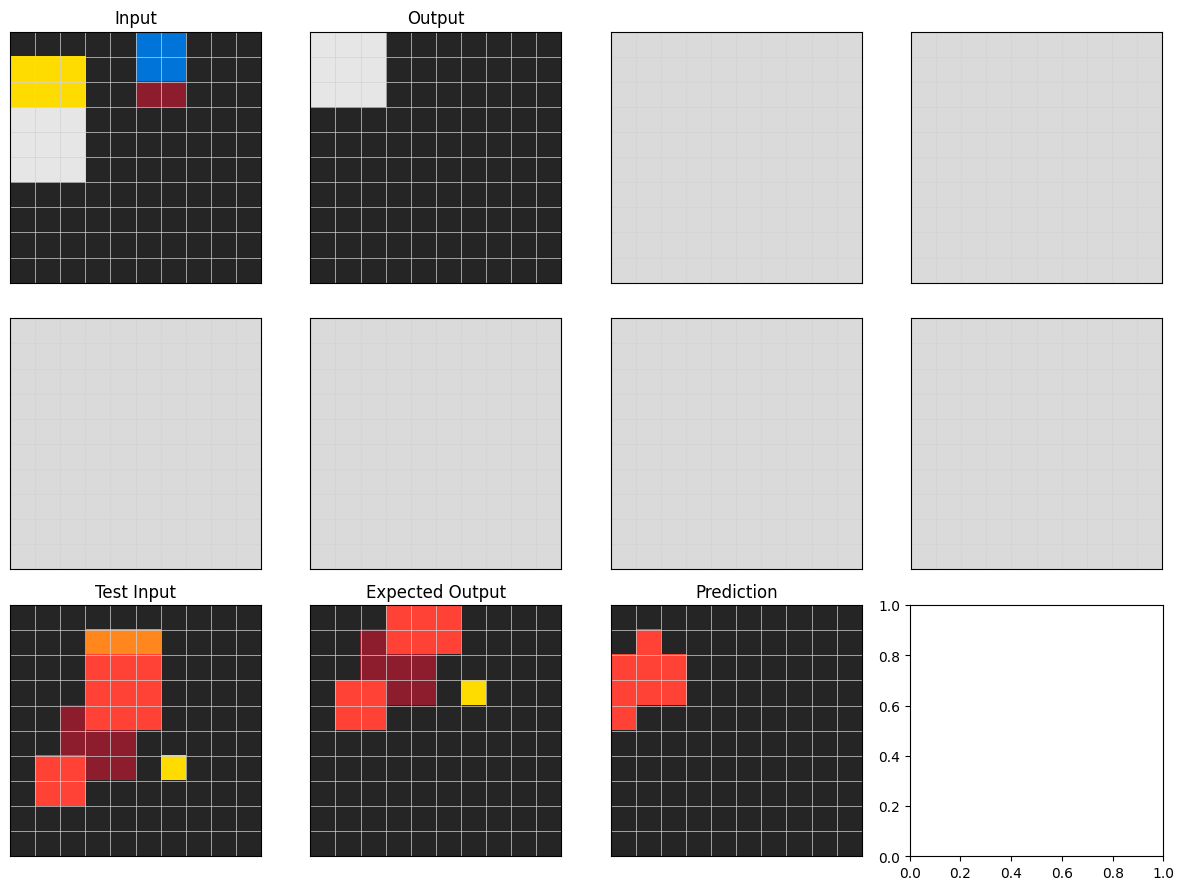

torch.Size([1, 10, 10])


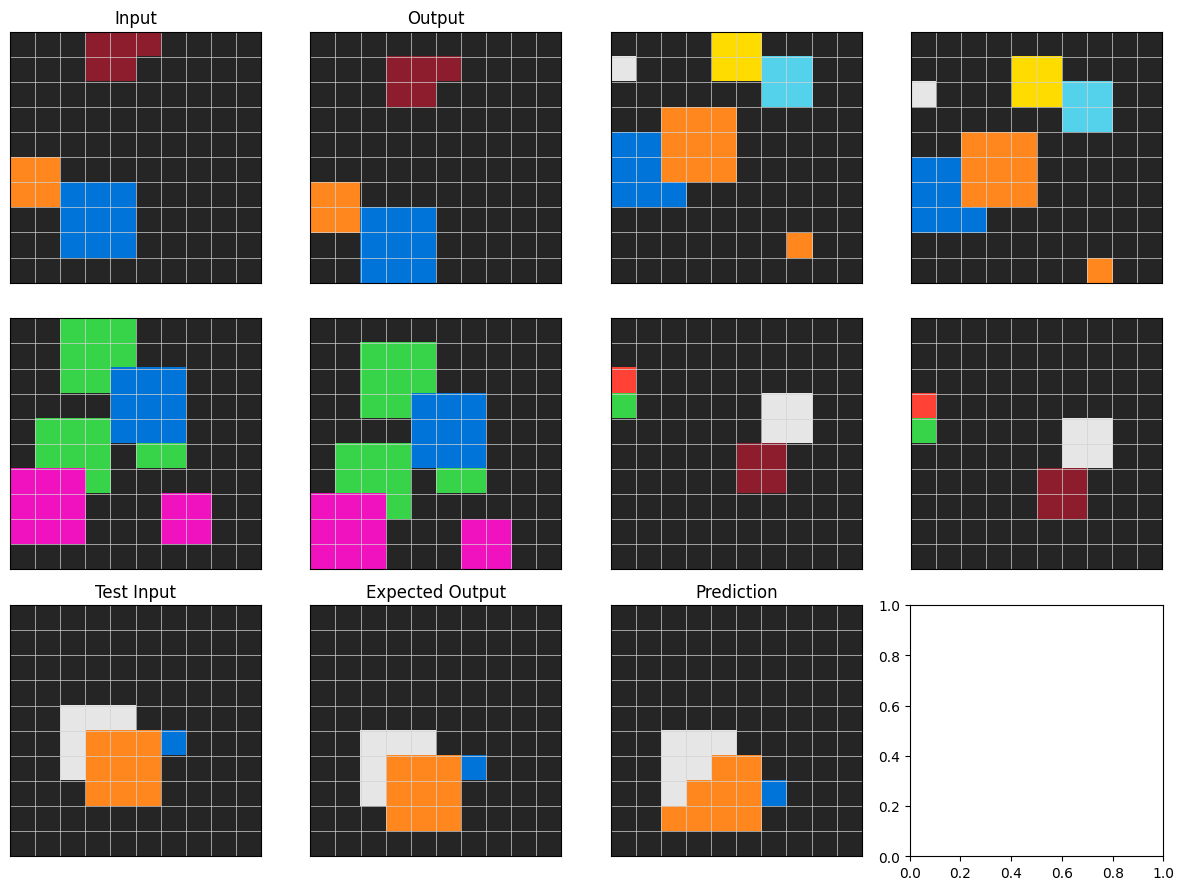

torch.Size([1, 10, 10])


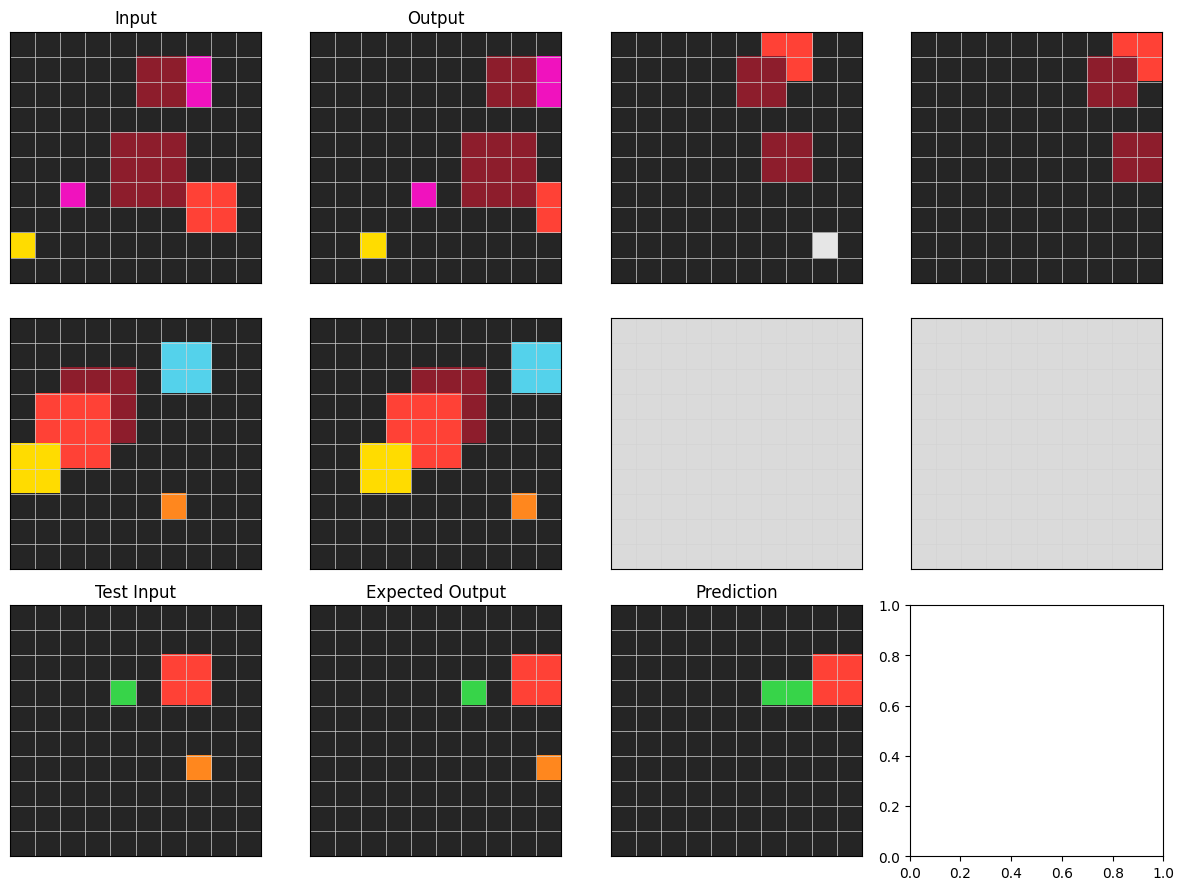

torch.Size([1, 10, 10])


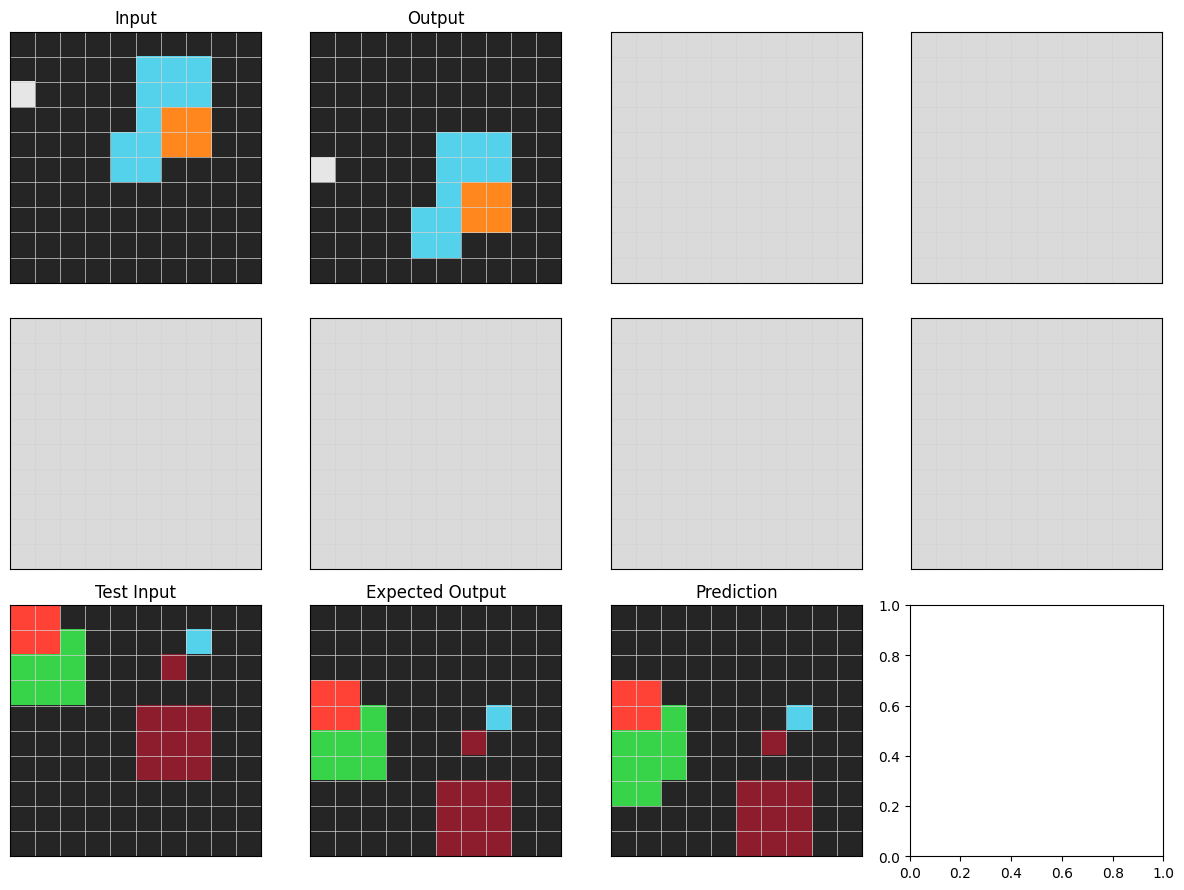

torch.Size([1, 10, 10])


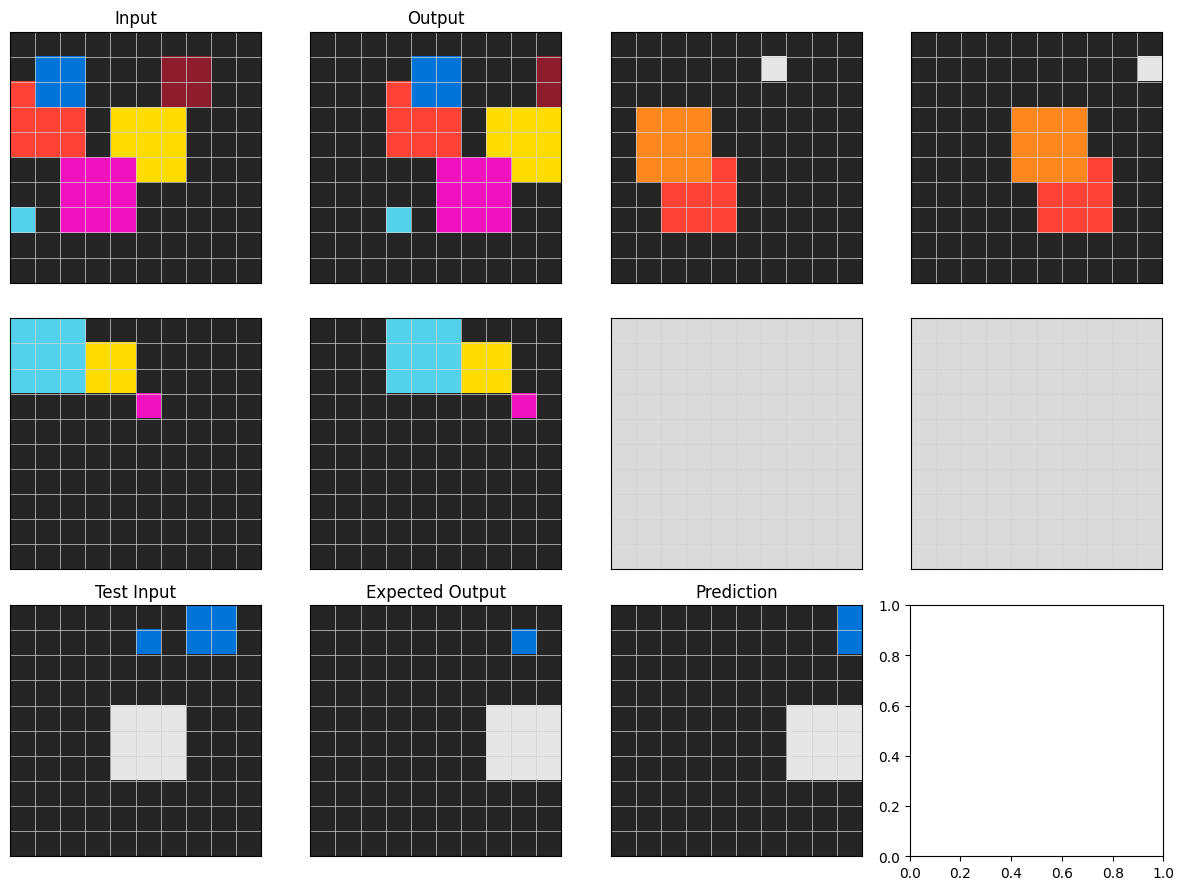

torch.Size([1, 10, 10])


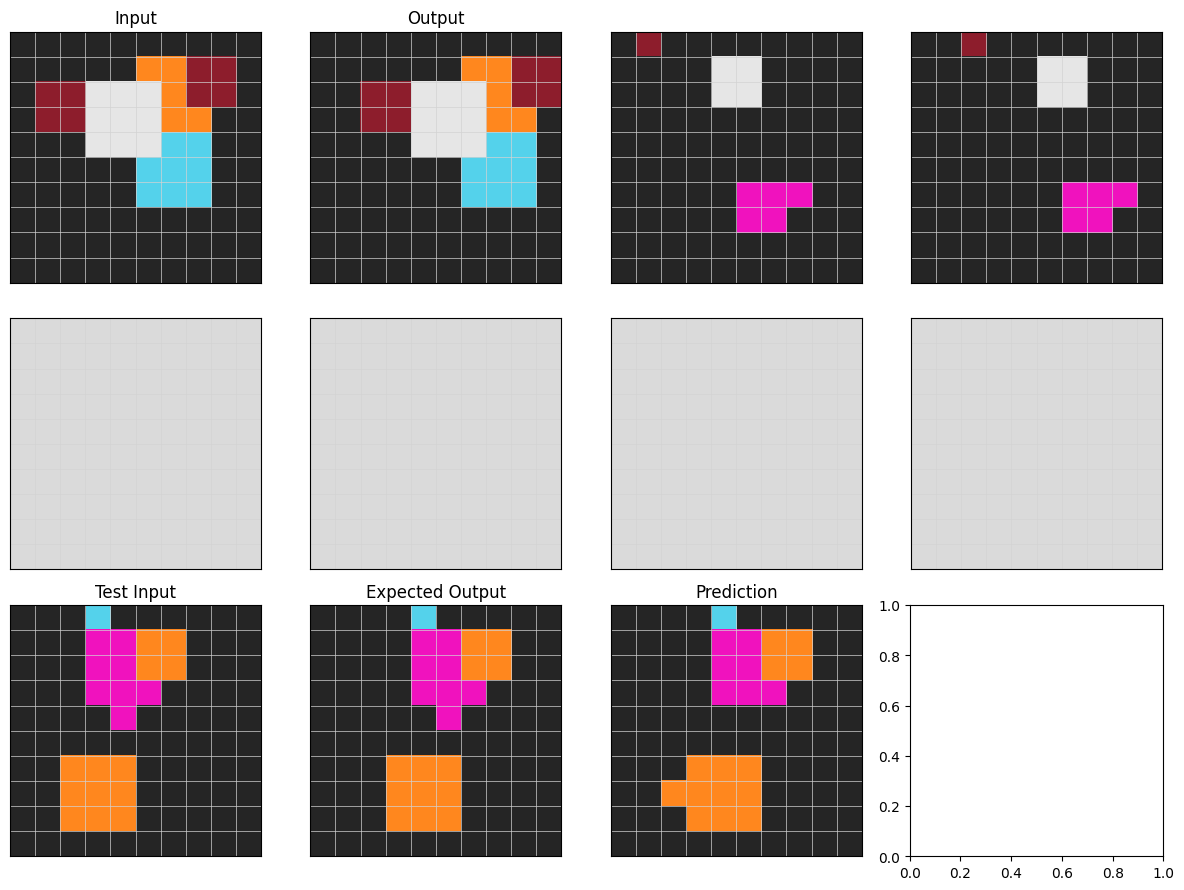

torch.Size([1, 10, 10])


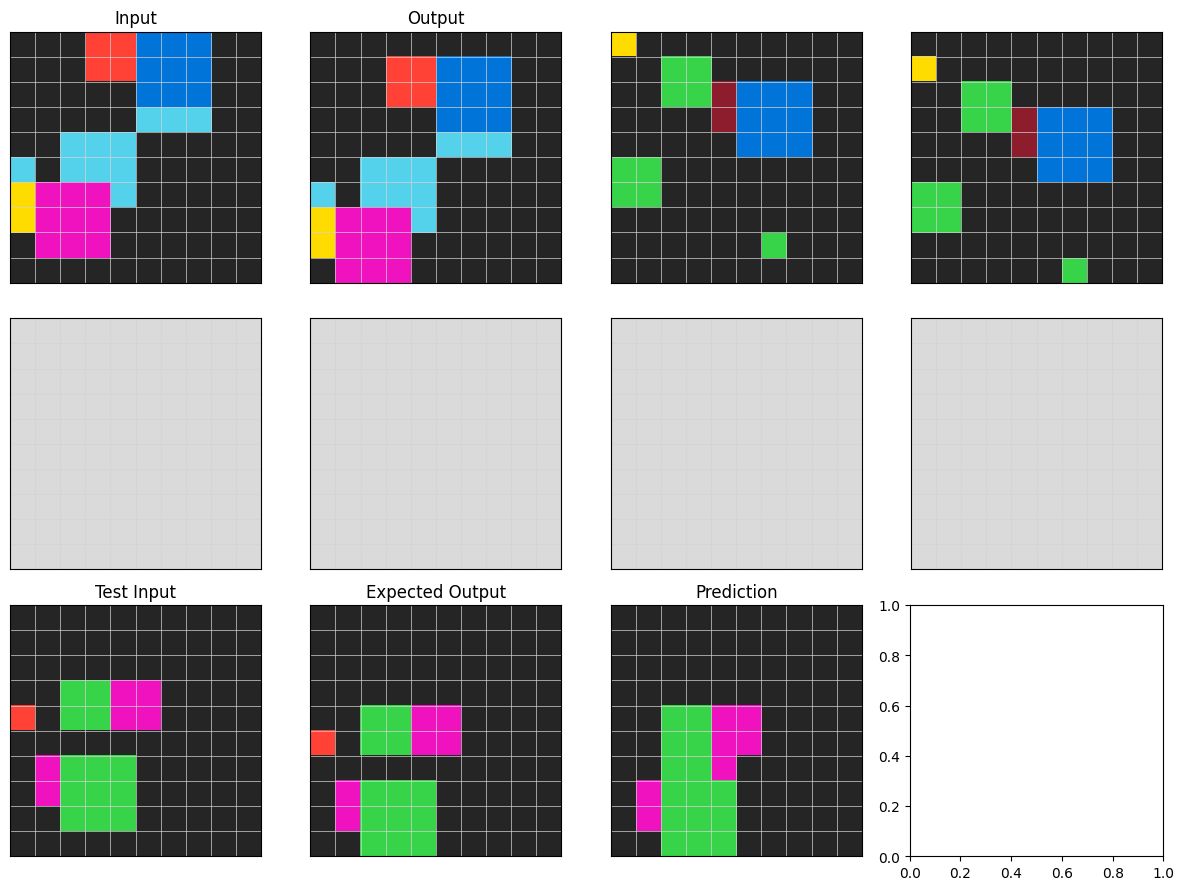

In [10]:
from arc_prize.vis import visualize_output_query, visualize_tensors


# model = ARCTransformer(d_model=d_model, num_heads=num_heads, num_layers=num_layers, d_ff=dim_feedforward, grid_dim=max_grid_size, num_colors=num_colors, num_train_pairs=max_context_pairs, dropout=dropout).to(device)

model_file_name = "models/model_uneuyd84.pth"
if model_file_name is not None:
    state_dict = torch.load(model_file_name, map_location=device)
    model.load_state_dict(state_dict)

model.eval()
eval_loader = DataLoader(val_dataset, batch_size=1, shuffle=True, collate_fn=collate_arc_fn, num_workers=0)
# batch = next(iter(eval_loader))

# visualize_output_query(model.output_query)


for i, batch in enumerate(eval_loader):
    grids, grid_masks, output_grid = [item.to(device) for item in batch]

    predictions = model.generate(grids, grid_masks)
    print(predictions.shape)

    visualize_tensors(grids.squeeze(0), output_grid.squeeze(0), predictions.squeeze(0))

